# Analysis of Ambulance Victoria response times for 2018 & 2019
The following report is an analysis of Ambulance Victoria's performance over the years 2018 and 2019. We aimed to investigate whether Ambulance Victoria is meeting their self-stated goals and if they aren't, what factors may be contributing to this. We have identified 2 major factors which we have investigated, which are traffic density and local population. Ambulance Victoria data is divided up into both Local Government Area (LGA) and Urban Centres and Localities (UCL). We have chosen to focus on UCLs because it allowed us to line up the Ambulance data from Ambulance Victoria, census data from the Australian Bureau of Statistics, and traffic data from VicRoads.
We have raised the following questions regarding these datasets:
*  What is the comparison between Code 1 and Code 2 incidents in terms of average response time and number of incidents?
*  Which UCLs consistently meet or fail to meet the 85% or 90% response time targets for Code 1 incidents?
*  Does population density of a UCL affect Ambulance response time?
*  Does traffic density affect the response time?
# What is the comparison between Code 1 and Code 2 incidents in terms of average response time and number of incidents?
-Analysis goes here
# Which UCLs consistently meet or fail to meet the 85% or 90% response time targets for Code 1 incidents?
-Analysis goes here
# Does population density of a UCL affect Ambulance response time?
One of the factors we think could affect the response time of any given area is the population of that area. Our assumption is that with a higher population density there will be an increase in ambulance response times due to a number of reasons such as higher incident rates, higher number of calls, and ambulance staffing limitations. In order to investigate the above, data was sourced from Ambulance Victoria and merged with Census data from the Australian Bureau of Statistics. UCLs that appeared in both datasets were then matched and used for this analysis. As seen in “Total Persons vs Average Response Time (s) - 2018 & 2019”, the total population per UCL (“Total Persons”) was measured against the average response times (“AVG RT – Seconds”) for both 2018 in blue and 2019 in red as a scatter plot with added linear regression. The linear regression shows a slight negative correlation, especially for 2019. This indicates that contrary to the assumption, an increase in population does not exactly impact the response time in any particular area. The statistical analysis may in fact indicate that response times increase in areas with a lower population.

In addition to higher population in a densely populated area, we can assume that this will cause an increase in the number of calls to Ambulance Victoria services. As seen in “Total Number of Calls vs Average Response Time (s) - 2018 & 2019”, the total number of calls was measured against the average response times for again, both 2018 in blue and 2019 in red as a scatter plot with added linear regression. Additionally for the purposes of linear regression, the outlier of Melbourne for 2018 was removed as the total calls for Melbourne significantly altered the statistical analysis due to being so far out of the range of the rest of the UCLs. The linear regression still shows a slight negative correlation, however it is a stronger correlation than the previous plot. This could indicate that a greater number of calls will have a strong chance of increasing the average response time. The stronger correlation suggests that an increase in the number of calls may impact response times more significantly than a larger population does.

Based on these visualisations, population does not seem to have a significant impact on the response times of Ambulance Victoria and almost indicates that lower populated areas have higher response times. As previously mentioned, Ambulance Victoria’s staffing limitations could still be a factor causing increased response times as there may be larger staffing issues in lower populated areas. Additionally lower populated areas can often be more spread out, leading to greater travel distances. Based on this data, we can safely assume that Ambulance Victoria is still improving their response times from 2018 to 2019. 
# Does traffic density affect the response time?
-Analysis goes here
# Conclusion:
Some limitations to consider: UCL name etc

In [529]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [531]:
# Set inline figure size
plt.rcParams['figure.figsize'] = (25, 15)

In [533]:
# Data files
census_2018 = Path("Data/censusdata2018.csv")
census_2019 = Path("Data/censusdata2019.csv")
ambulance_2018 = Path("Data/ambulance2018.csv")
ambulance_2019 = Path("Data/ambulance2019.csv")

In [535]:
# Convert to dataframes
census_data_2018 = pd.read_csv(census_2018)
ambulance_data_2018 = pd.read_csv(ambulance_2018)
census_data_2019 = pd.read_csv(census_2019)
ambulance_data_2019 = pd.read_csv(ambulance_2019)

In [537]:
# Clean data to filter and remove all states except Victoria for 2018
census_data_2018_vic = census_data_2018[census_data_2018["S/T name"] == "Victoria"]
# Remove all unnecessary columns to find total persons per UCL for 2018
census_data_2018_vic = census_data_2018_vic.iloc[:,[9,28]]
# Clean data to filter and remove all states except Victoria for 2019
census_data_2019_vic = census_data_2019[census_data_2019["S/T name"] == "Victoria"]
# Remove all unnecessary columns to find total persons per UCL for 2019
census_data_2019_vic = census_data_2019_vic.iloc[:,[9,28]]

In [539]:
# Display the 2018 census data
census_data_2018_vic.head()

,SA2 name,Total Persons
579,Alfredton,13291.0
580,Ballarat,12175.0
581,Ballarat - North,24147.0
582,Ballarat - South,25389.0
583,Buninyong,7583.0


In [541]:
# Display the 2019 census data
census_data_2019_vic.head()

,SA2 name,Total Persons
579,Alfredton,14069.0
580,Ballarat,12225.0
581,Ballarat - North,24457.0
582,Ballarat - South,25594.0
583,Buninyong,7712.0


In [543]:
# Merge 2018 dataframes
merged_df_2018 = pd.merge(ambulance_data_2018, census_data_2018_vic, left_on="UCL Name", right_on="SA2 name", how="left")
# Identify mistmatched UCLs between the dataframes
missing_ucls_2018 = merged_df_2018[pd.isnull(merged_df_2018["SA2 name"])][merged_df_2018.columns]
# Display the 2018 merged data
merged_df_2018

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
0,Albury - Wodonga (Wodonga Part),Code 1,91.35%,602,1735,NaN,NaN
1,Bacchus Marsh,Code 1,79.85%,693,784,Bacchus Marsh,22223.0
2,Bairnsdale,Code 1,85.61%,668,966,Bairnsdale,15411.0
3,Ballarat,Code 1,89.32%,627,5272,Ballarat,12175.0
4,Benalla,Code 1,84.08%,682,534,Benalla,10436.0
...,...,...,...,...,...,...,...
74,Wallan,Code 2,NaN,1129,338,Wallan,18446.0
75,Wangaratta,Code 2,NaN,1475,1022,Wangaratta,19318.0
76,Warragul,Code 2,NaN,1514,890,Warragul,20149.0
77,Warrnambool,Code 2,NaN,1388,1248,NaN,NaN


In [545]:
# Merge 2019 dataframes
merged_df_2019 = pd.merge(ambulance_data_2019, census_data_2019_vic, left_on="UCL Name", right_on="SA2 name", how="left")
# Identify mistmatched UCLs between the dataframes
missing_ucls_2019 = merged_df_2019[pd.isnull(merged_df_2019["SA2 name"])][merged_df_2019.columns]
# Display the 2019 merged data
merged_df_2019

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
0,Albury - Wodonga (Wodonga Part),Code 1,90.90%,604,2050,NaN,NaN
1,Bacchus Marsh,Code 1,83.40%,643,835,Bacchus Marsh,22964.0
2,Bairnsdale,Code 1,84.10%,654,1021,Bairnsdale,15565.0
3,Ballarat,Code 1,91.20%,604,5785,Ballarat,12225.0
4,Benalla,Code 1,76.40%,752,592,Benalla,10450.0
...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NOTE,NaN,NaN,NaN,NaN,NaN,NaN
89,"1. The Maryborough (Vic.), Wonthaggi and Yarra...",NaN,NaN,NaN,NaN,NaN,NaN


In [547]:
# Display the 2018 missing UCL data
missing_ucls_2018

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
0,Albury - Wodonga (Wodonga Part),Code 1,91.35%,602,1735,NaN,NaN
9,Drysdale - Clifton Springs,Code 1,82.38%,707,505,NaN,NaN
10,Echuca - Moama (Echuca Part),Code 1,86.65%,657,854,NaN,NaN
13,Hamilton,Code 1,94.20%,543,379,NaN,NaN
14,Healesville,Code 1,74.34%,722,565,NaN,NaN
20,Mildura - Buronga (Mildura Part),Code 1,92.04%,558,2123,NaN,NaN
24,Pakenham,Code 1,81.43%,693,2213,NaN,NaN
25,Portland (Vic.),Code 1,88.77%,596,561,NaN,NaN
27,Shepparton - Mooroopna,Code 1,91.34%,593,2979,NaN,NaN
30,Torquay - Jan Juc,Code 1,79.14%,707,561,NaN,NaN


In [549]:
# Display the 2019 missing UCL data
missing_ucls_2019

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
0,Albury - Wodonga (Wodonga Part),Code 1,90.90%,604,2050,NaN,NaN
9,Drysdale - Clifton Springs,Code 1,84.70%,698,667,NaN,NaN
10,Echuca - Moama (Echuca Part),Code 1,87.70%,606,826,NaN,NaN
13,Hamilton,Code 1,92.30%,560,418,NaN,NaN
14,Healesville,Code 1,85.60%,610,555,NaN,NaN
18,Maryborough (Vic) (1),Code 1,82.00%,683,607,NaN,NaN
19,Melbourne (2),Code 1,89.60%,608,192915,NaN,NaN
21,Mildura - Buronga (Mildura Part),Code 1,94.60%,530,2242,NaN,NaN
25,Portland (Vic.),Code 1,87.90%,606,539,NaN,NaN
27,Shepparton - Mooroopna,Code 1,91.60%,578,3232,NaN,NaN


In [592]:
# Identify mistmatched UCLs between the dataframes and clean the data to display only code 1 for 2018
merged_df_clean_2018 = merged_df_2018[~pd.isnull(merged_df_2018["SA2 name"])][merged_df_2018.columns]
merged_df_sorted_2018 = merged_df_clean_2018.sort_values("Total Persons",ascending=False)
merged_df_sorted_2018 = merged_df_sorted_2018[merged_df_sorted_2018["Final Dispatch Code"] == "Code 1"]
merged_df_sorted_2018["AVG RT - Seconds"] = merged_df_sorted_2018["AVG RT - Seconds"].astype(int)
merged_df_sorted_2018["Total Number"] = merged_df_sorted_2018["Total Number"].astype(int)
# Display the 2018 sorted data
merged_df_sorted_2018

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
18,Melbourne,Code 1,87.29%,640,182520,Melbourne,49097.0
31,Traralgon,Code 1,82.01%,686,1562,Traralgon,27958.0
23,Ocean Grove - Barwon Heads,Code 1,84.17%,676,638,Ocean Grove - Barwon Heads,26648.0
1,Bacchus Marsh,Code 1,79.85%,693,784,Bacchus Marsh,22223.0
19,Melton,Code 1,81.37%,667,3436,Melton,20188.0
34,Warragul,Code 1,83.45%,685,864,Warragul,20149.0
16,Lara,Code 1,85.98%,646,535,Lara,19978.0
33,Wangaratta,Code 1,90.80%,596,1109,Wangaratta,19318.0
32,Wallan,Code 1,89.84%,600,433,Wallan,18446.0
8,Drouin,Code 1,75.00%,792,624,Drouin,17779.0


In [594]:
# Identify mistmatched UCLs between the dataframes and clean the data to display only code 1 for 2019
merged_df_clean_2019 = merged_df_2019[~pd.isnull(merged_df_2019["SA2 name"])][merged_df_2019.columns]
merged_df_sorted_2019 = merged_df_clean_2019.sort_values("Total Persons",ascending=False)
merged_df_sorted_2019 = merged_df_sorted_2019[merged_df_sorted_2019["Final Dispatch Code"] == "Code 1"]
merged_df_sorted_2019["AVG RT - Seconds"] = merged_df_sorted_2019["AVG RT - Seconds"].astype(int)
# Cleaning up number formatting issue in CSV
merged_df_sorted_2019 = merged_df_sorted_2019.replace(',','', regex=True)
merged_df_sorted_2019["Total Number"] = merged_df_sorted_2019["Total Number"].apply(lambda x: x.strip())
merged_df_sorted_2019["Total Number"] = merged_df_sorted_2019["Total Number"].astype(int)
# Display the 2019 sorted data
merged_df_sorted_2019

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number,SA2 name,Total Persons
31,Traralgon,Code 1,84.20%,667,1611,Traralgon,28207.0
24,Ocean Grove - Barwon Heads,Code 1,84.90%,640,780,Ocean Grove - Barwon Heads,28053.0
1,Bacchus Marsh,Code 1,83.40%,643,835,Bacchus Marsh,22964.0
34,Warragul,Code 1,83.00%,659,816,Warragul,20764.0
20,Melton,Code 1,86.30%,602,3727,Melton,20596.0
16,Lara,Code 1,84.40%,667,636,Lara,20579.0
32,Wallan,Code 1,86.00%,608,457,Wallan,19654.0
33,Wangaratta,Code 1,90.70%,597,1164,Wangaratta,19411.0
8,Drouin,Code 1,84.90%,702,656,Drouin,18453.0
22,Moe - Newborough,Code 1,83.90%,614,1757,Moe - Newborough,16821.0


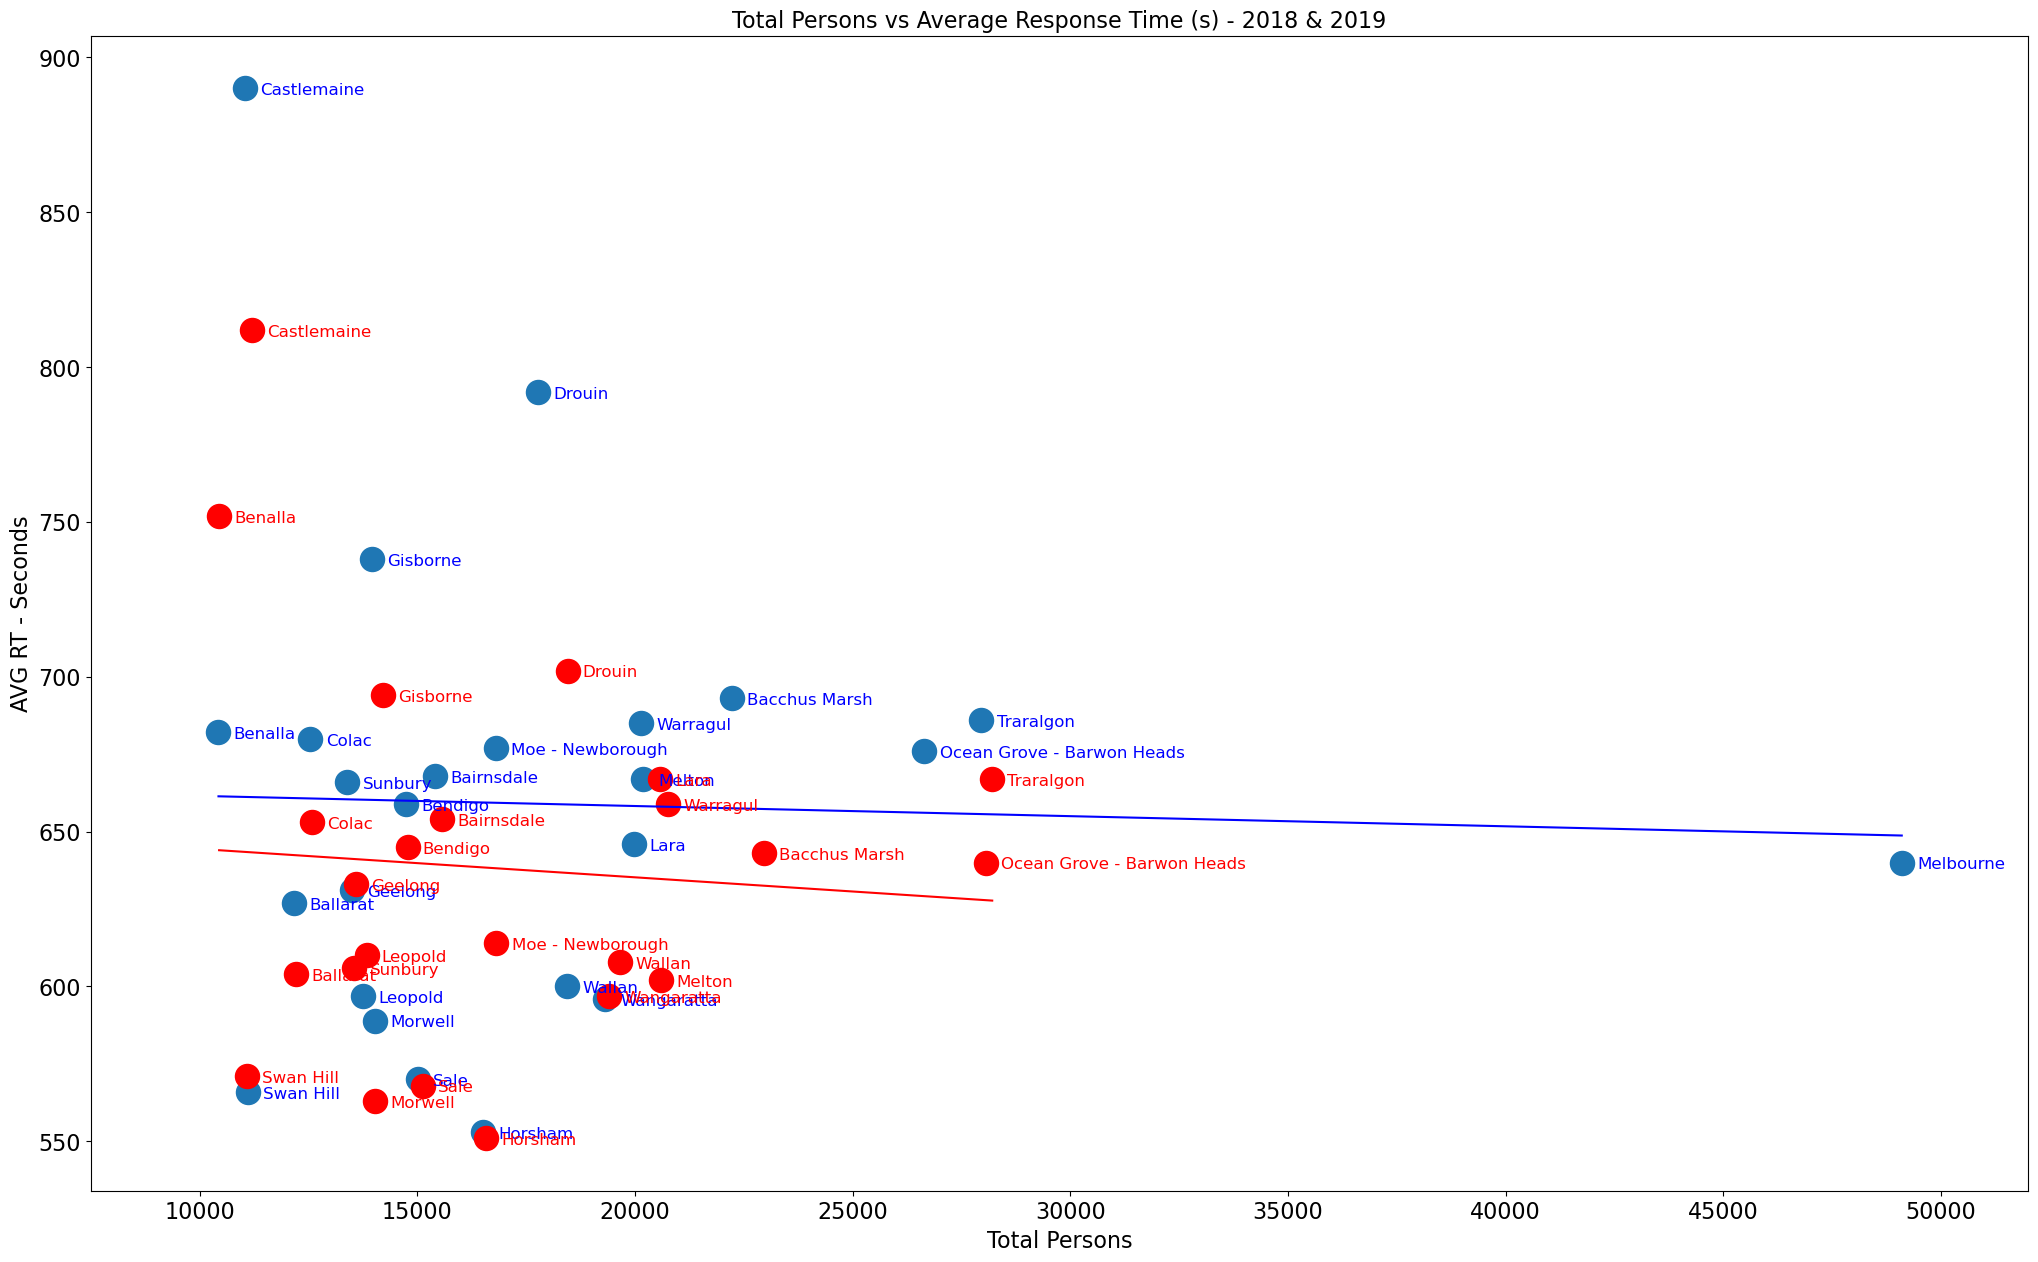

In [650]:
# Calculate the linear regression and generate a scatter plot 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_df_sorted_2018["Total Persons"], merged_df_sorted_2018["AVG RT - Seconds"])
regress_values = merged_df_sorted_2018["Total Persons"] * slope + intercept
plt.plot(merged_df_sorted_2018["Total Persons"],regress_values, color="b")
plt.scatter(merged_df_sorted_2018["Total Persons"],merged_df_sorted_2018["AVG RT - Seconds"], s=300)
for i, row in merged_df_sorted_2018.iterrows():
    plt.text(row["Total Persons"]+350, row["AVG RT - Seconds"]-3, data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB/YAAATuCAYAAADX48uuAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdebhd08E/8O9NbuZZRiKDEMQsRBRFjKVKDa2pNWtpVVVpFa25LV68vGpum1JjW0NblCKoocQ8JSQiEmMImWRO9u+P87snue7N6EZO+Hye5zy5d629hr3vOTd58t1r7aqiKIoAAAAAAAAAABWp0fKeAAAAAAAAAACwYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAYIF69+6dqqqqjB49enlPBYCFqKqqSlVV1fKeRoP49re/naZNm2bMmDFL3cfDDz+cqqqqnHrqqQ04MwAAgOVHsA8AAMtQTdCyJK9tt912icYYPXp0Tj/99AwePHiZnMOSOv300+ucU+PGjdO5c+fsuOOOueGGG5b3FFnGnn766fLP/sADD1ze0/lS2Xbbbet8/po2bZpVV101e+21V+67777lPUUW4MEHH1yqvzNOP/305T31BjV06ND85S9/ySGHHJKePXsudT9bb711tt5661x00UV55513GnCGizZ9+vTceuutOeKII7LeeuulVatWad68edZYY40cffTRGTly5CL7+POf/5wtttgi7dq1S9u2bbPFFlvk+uuvX+Dxb7zxRq6++uoceeSR2XDDDVNdXZ2qqqqcffbZixxr8uTJOfPMM7PxxhundevWadq0aXr27JkDDzwwzzzzzBKd+/yKosjll1+e/v37p0WLFmnfvn022GCDHHfccXnuueeWut8V7fpOnDgxv/rVr7LeeuulZcuWad++fbbeeuvceOONS3TeAABQvbwnAAAAX2RbbrllnbKJEyfmpZdeWmD9+uuvv0RjjB49OmeccUa22WabHHLIIUs1z2Whbdu25XOZNWtWRowYkfvuuy/33Xdf7rrrrlx33XVfmNWl1HbdddeVv7799tszefLktGnTZjnO6MunR48e5VD0k08+yciRI3PbbbfltttuyznnnJOTTz55Oc+QT2vXrl29fyeMGTMmY8eOrfU7dX41P+e11lprmc/x83DSSSelqqoqv/jFLz5zXyeffHK+9rWv5ayzzsrll1/eALNbPOecc0458G3evHn69u2bOXPmZMSIEbniiity7bXX5uabb85uu+1Wb/ujjjoqV155ZZJk7bXXTlVVVR5//PHy69JLL63T5uKLL87FF1+8xHMdN25cvvrVr+a1115Lo0aNstpqq6V169Z5/fXXc8MNN+Tmm2/Oddddl/3333+J+z7yyCPz+9//PknSq1evdO7cOa+++mouvvjiTJgwYalvSFyRru/bb7+dQYMGZcSIEWncuHHWW2+9zJo1K4888kj+85//5OGHH/5c35sAAKzgCgAA4HM1ZMiQIknRUP8cr+lvm222aZD+5terV68iSfHGG28sdpvTTjut3vnMmTOnuOiii8rnfuONNzbsZKkIs2bNKrp06VIkKdq3b18kKQYPHry8p/Wlsc022xRJitNOO61W+dSpU4tjjjmmSFI0atSoGD58+PKZIEtsQb9Tv4heeeWVBj3XOXPmFKusskrRqlWrYuLEiQ3S5+I45ZRTikGDBhW33357MX369HL5e++9V+y6665FkqJ169bFu+++W6ftjTfeWCQpWrVqVdx///3l8vvuu69o1apVkaT4y1/+UqfdWWedVey2227FmWeeWdx9993F3nvvXSQpzjrrrIXO9fDDDy+SFGuttVYxbNiwcvmUKVOK733ve0WSom3btkt8/YYOHVokKRo3blzccsst5fLZs2cX//jHP4pLL710ifqb34p0fQcNGlQkKdZdd91a/5Z67rnnilVWWaVIUlx77bVLcRUAAPgyshU/AADwuWjUqFGOO+647L777kliC9ovqHvvvTfjxo1Ljx49yitu51/Bz/LRokWLXHTRRendu3fmzp2b22+/fXlPCeq46qqrkmSpVofXp1GjRvnWt76VTz755HP9O+cnP/lJHnjggeyxxx5p1qxZubxr16656aab0qVLl0yZMqXeOdWsRD/llFOy3Xbblcu333778k4bZ511Vp12p556av7xj3/kl7/8Zb72ta+ldevWizXXO++8M0ly/vnnZ+211y6Xt2rVKr/73e/SqVOnTJo0KY8++uhi9VfjkUceSZLssMMO+da3vlUub9y4cXbbbbf88Ic/XKL+5reiXN/nn38+Q4YMSZJcc8016d27d7luww03zIUXXpgkX7jHaQAAsOwI9gEAoMKMHz8+P/vZz7LWWmulRYsW6dChQ7bddttcf/31KYqi1rHbbrttBg0alCR56KGHaj13ef7/QJ4wYUJ+//vfZ4899sgaa6yRFi1apF27dhk4cGAuueSSzJ49+3M7v6233jpJMmLEiFrlU6dOzbnnnptNN900bdu2TcuWLbPRRhvl/PPPz4wZM+r0c/rpp5efL/3BBx/kmGOOSe/evdOkSZNajyR45JFHsueee6Zbt25p0qRJVlpppfTr1y9HHHFE/vvf/9bptyiK/PnPf84222yT9u3bp0WLFll77bXz85//PB999FG951RzzZPk7rvvztZbb502bdqkXbt22WWXXfLss8/W2+7NN9/M97///fTp0yfNmjVLmzZt0qdPn+y555656aabFut6XnrppamqqlrglsNJ8tFHH6Vp06Zp0qRJxo8fXy5/6aWXcuCBB6ZHjx5p2rRp2rdvn759++aAAw7Iv/71r8Ua/9NqQvz99tsvBxxwQBo1apQhQ4bkrbfeqnXcCSeckKqqqhxzzDEL7Oull15KVVVVunTpUuc9+tFHH+WUU04pP1+5TZs22XzzzXP11Vdn7ty5dfo65JBDUlVVlcGDB+eNN97IIYccku7du6e6urocqsyZMyd33HFHDjvssKy77rpp165dWrZsmX79+uVnP/tZPvzwwwXOdfLkyfnZz36W3r17p3nz5llttdXy85//PJ988kmtsevz5JNPZr/99kv37t3TtGnTdO3aNd/61rcW+L5ZWtXV1dl4442TlB7h0RBzWZL38ODBg1NVVZVDDjkkkydPzvHHH1++Xn369Mkpp5ySqVOnLnD+L7/8cr773e9m1VVXLc9t7733rvdznNT+mb/zzjs57LDDsvLKK6d58+ZZd91187vf/a7edrNnz87FF1+czTbbLG3atEmzZs2yyiqrZIsttshpp52WCRMm1NvmiiuuyFZbbZX27dunefPmWXvttXPqqadm0qRJCzynhjT/76H59e7dO1VVVRk9enQeeuih7LDDDmnfvn1WWmml7LnnnrV+F//973/PV7/61bRt2zYdOnTI/vvvv9Dn0y/p53BRbrnlliTJ17/+9Xrrx48fnxNOOCFrr712mjdvnlatWqV379752te+lssuu6zeNjW/G2+++eYlns/S6tix4wLraq5Rkrz22mu16l599dW8/PLLSZLDDjusTtuashdeeKFO26U1bdq0JEmfPn3q1FVXV6dXr15JssT/TmjSpEmS0u/VhraiXN+amyFWXXXV8pzmt+eee6ZRo0YZNWpUnn766c88HgAAXwLLe8sAAAD4slnYVvwjRowoevToUSQpmjZtWvTv37/o06dP+fiDDjqomDt3bvn4Y445plhvvfXKW+VuueWW5dc+++xTPu66664r99mrV69iwIABRZ8+fYpGjRoVSYqvf/3rxZw5c+rMpyG34q9x/vnnF0mKfv36lcveeuutYp111imSFNXV1cUaa6xR9OvXr6iuri6SFFtttVUxderUesf5wQ9+UPTs2bNo3LhxscEGGxQbbLBBcdhhhxVFURS33357+Rw7duxY9O/fv1h77bXL2+3++Mc/rtXn3LlziwMOOKB8vfv06VP079+/aNq0aZGk6NWrV/H666/XOaea4y+//PKiqqqqWHnllYv+/fuXx2ndunWtLY6LoijeeOONolOnTkWSomXLlsX6669fbLTRRsVKK61UJCk23HDDxbre48aNK6qrq4smTZoU48ePr/eYK6+8skhS7LrrruWyJ554omjRokWRpGjXrl2x4YYbFuutt17Rrl27Ikmxxx57LNb485s4cWK5z2effbYoiqLYdtttiyTFueeeW+vYp59+ukhSdOnSpZg9e3a9/f3iF78o/4zn99JLLxXdu3cvv6fXWWedYvXVVy+qqqqKJMU+++xT63NSFEVx8MEHF0mKk046qWjfvn3RrFmz8vvh9NNPL4qiKMaOHVveqr7mZ7j22msXzZs3L5IUvXv3Lt577716z3vjjTcut11//fWLddddt6iqqioGDBhQ7L///kWS4o9//GOdthdeeGF53iuttFKx8cYbFx07diySFE2aNCn+9re/Le7lL4piwVvx19h5552LJMXxxx//meeypO/hP/7xj0WSYr/99is23njjoqqqqlh33XWL9dZbrzzu5ptvXnzyySd15nbHHXcUzZo1Kz/iYdNNNy06d+5cvuZXXXVVnTY1P/PTTz+96NatW9G8efOif//+5e2vkxRnn312nXY1W2wnKVZfffViwIABRY8ePYrGjRvXem/XmDhxYrH11luX59KrV69ivfXWK//e6NevX/H+++/X+/NYHIu7Ff+C/l6p+T1+4YUXFo0bNy66dOlS6/fTyiuvXLz77rvFhRdeWCQpVl111WLDDTcsX++11lqrmDZtWp1+l+ZzuDAjRowoz6c+EyZMKFZfffVa4/Xv37/o0qVLUVVVVbRr126B7aqqqooWLVoUM2bMWOz5LEs77bRTkaT4yU9+Uqt88ODBRZJijTXWWGDbmmuwqO3ba97/i9oq/qtf/WqRpN7P0Pjx44tWrVoV1dXVxZgxYxbaz6eNGjWqqK6uLho1alRry/vPQ6Vc37PPPrtIUgwcOHCBx9Q8uuazPJoAAIAvD8E+AAB8zhYU7M+dO7fYdNNNywHO/AHi3XffXQ5hLrvssnr7W1jo8/zzzxf//Oc/az2LtiiK4vXXXy8HUvU9B31ZBPu77757kaT4xje+URRF6RnIW2yxRTnwm/+8x44dWw4dTjjhhHrHady4cfGVr3ylGDt2bLmuJoSquenhsssuqxUez507txgyZEjx97//vVaf//d//1ckKdq0aVPce++95fJ333232HLLLRf4H/Q1P8+WLVvWCm8nTZpUbL/99kWSYt99963VpuZ55wcffHAxefLkWnXDhg0rrrzyynqvX31qwtoFtakJ1//85z+Xy3bbbbciSXHyySfXCbuGDh1aXH/99Ys9fo3f//73RZJinXXWKZddffXVRZJivfXWq3P82muvXSQp7rnnnnr7W2211YokxSOPPFIumzJlSjl4OfbYY2s99/nll18u1l133XpDkpoQpnHjxsXuu+9e6yaImvfLhAkTisGDB9e5QeLjjz8u/7wOOeSQOvP84Q9/WL4R5JVXXimXv/TSS0WvXr2KJk2a1Bvs33333UVVVVXRqVOnOqH5NddcU1RXVxdt2rQp3nnnnXqvT30WFuyPHz++6NChQ72h1dLMZUnfwzXBfnV1ddG9e/fiueeeK9e9+OKL5ZuaPv1Zf/vtt4u2bduWb8apeb/OmTOnOOecc8o3Hjz//PO12tX8zJs0aVLss88+xccff1yuu+yyy4okRfPmzWuVP/XUU0WSokePHrV+lkVRCvCvvvrqOgHnfvvtVyQptt9++1o3/nz00UfFXnvtVQ65l1ZDBftNmjQpLrjggvJNXB9//HGx+eabl2/uatmyZa3P/ZgxY8o3ln36752l/RwuzJ/+9KciSbHbbrvVW/8///M/RZJip512qvMZffPNN4uLLrpogX2vueaaRZLi8ccfX+z5LCvvvfde+aaJv/71r7XqTjnllPI5LsiOO+5YJCl++ctfLnScxQ3277///qJJkyZFu3btij/84Q/Fe++9V0yZMqV45JFHiq985StFkuLUU09d/BOcT83vxg4dOhQvvPDCUvWxpCrp+tb8m2LVVVett37GjBnlmw9/9KMfLXQ8AAAoCsE+AAB87hYU7P/73/8ukhTNmjUr3n333TrtzjvvvCIprRqffxXk4gT7CzNy5MgiSbHjjjvWqWvIYH/u3LnFRRddVD736667riiKovj73/9eJCkGDBhQzJo1q05/77zzTtG6deuidevWtVbt14zTrFmz4u233653Ls2aNSs6dOiwWPOeO3duOVisLyB66623yitwP736sOac6vuP+RdeeKFIUmc1aU0Y/+kwcmnUBGLbbrttnbq33367aNSoUdGyZcta4etaa61VJKkVyH1WNTcQzL8K+uOPPy5ft0+vdD7jjDMWGJY//vjj9b7fL7nkkiJJseeee9Y7h+eff76oqqoq+vTpU6u8JoTp1q1bMWXKlKU6vx49ehQtW7as9T6dMGFCeUX//Dcg1Jj/8/7pYL9///5FkuKOO+6od7yf/vSnRZLizDPPXOw51hfsT5kypXjsscfKN6f06dOnzk0+SzOXJX0P1wT7SYpbb721Tn3N74JWrVoVkyZNKpfXhHEbbbRRvf3uuuuuRZLiu9/9bq3yRf3Ma855/rnceOON9a70XZDnn3++/D6df841Pvnkk6JHjx5FVVVVMXr06MXq89MaKtivbxeOe+65p9zu0zuYFEVRXHHFFUWSYvfdd69VvrSfw4U588wziyTFkUceWW/997///YW+Rxem5nNx0003LXHbhlazK8yaa65Z5++8H/zgB/XeCDa/b3/720WS4phjjlnoOIsb7BdFUTz44IPlm+jmf/Xu3bvWDWFL4oEHHijatWtX3tWja9euxfDhw5eqryVRSdf3v//9b/laPvHEE3Xqb7755nL9d77znUWcGQAAFEWjAAAAFeHee+9NknzrW99Kt27d6tQfddRRadasWd588828+uqrS9z/jBkzcsMNN+TII4/MzjvvnK9+9avZaqutcvDBBydJnn/++c92Ap/y7LPPZquttspWW22VgQMHplOnTvnJT36SJNl7771zwAEHJEluvfXWJKXnYVdXV9fpZ+WVV86AAQMyZcqUep9Bu8MOO2SVVVapdw49evTIhAkT8u9//3uR8x02bFjGjh2b5s2b58gjj6xT37179+y9995J5v2sPu2II46oU7b++uunefPmmThxYq3n2/fo0SNJ8te//jVFUSxyfguz5557pkWLFnn44YfrPA/75ptvzty5c/ONb3wjrVu3rjN+zTOtP6uxY8fmoYceSpLsv//+5fL27dtn1113TZJcd911tdrUvAduu+22zJgxo1bdjTfemCTZb7/9aj03vOb9Ut+1TpINNtggvXv3zqhRo/LWW2/Vqd97773TqlWrhZ7LAw88kJ/85Cf5+te/nq233rr8Pp44cWKmTp1a65nk//nPfzJ9+vT07ds3W265ZZ2+tt1226y22mp1yt98880888wz6dKlS3bfffd651FTXnNdl8QZZ5xRfuZ669ats8UWW+TRRx/NTjvtlAceeCDNmjX7zHNZ2vdw9+7ds8cee9Qp32233dKzZ8988skn5WdTJ/M+b8ccc0y9/f34xz+uddyn7b///vX+zAcMGJAkGTVqVLms5pzuv//+fPTRR4s8l9tuuy1J8u1vfztt2rSpU9+yZcvssMMOKYoi//nPfxbZ37J0+OGH1ynbaKONFlq/8cYbJ6l9jZLP/jmsz4cffpgkWWmlleqtr/nZ3HbbbUv8vPeaPj/44IMlatfQLr/88txwww1p3LhxBg8eXOfvvOnTpydJmjZtusA+aj6706ZNa7B5vfHGGxk3blyqqqrSq1evrL/++mnRokVGjx6da665JqNHj16i/l577bXsscceadq0aZ588smcccYZef/997P99tvn9ddfr3N83759U1VV9Zmfa19p13fgwIHZZJNNkpT+jTP/+T3xxBPlfxM11HgAAHzx1f1fMwAAYLmo+Q/fddZZp976Nm3apEePHhk5cmRee+21rL322ovd95gxY7LTTjst9IaAxQmxlsSkSZPK4VyjRo3Svn37bLvttjnooINyyCGHlMPaF198Mcm8/5CvT821efvtt+vU9evXb4Fz+MlPfpIf/vCH2WmnnbLJJptkhx12yFZbbZVtttmmTghXM0bPnj0XGPyuu+66tY79tNVXX73e8s6dO2fs2LGZMmVKOnbsmCT54Q9/mD/96U8566yzcu211+ZrX/tavvrVr2bQoEELvFFhQdq0aZPddtstf/nLX3LzzTfXCgtqAvL5w/YkOe6443LfffflyCOPzAUXXJCdd945W221VQYNGlSe45L485//nKIosvnmm6dPnz616g488MDcfvvtueGGG3LeeeelcePGSZI11lgjAwYMyNChQ3PXXXdlzz33TJLMnTu3fMPBp+dd83751a9+lV//+tf1zqUmIHz77bez6qqr1qpb2Ptl5syZ2XfffXP77bcv9Fzn/6zUhPwbbLDBAo9ff/3188Ybb9QqqzmP6dOnZ6uttqq3XU0IVd/7flF69OiRnj17Jildj9deey1VVVVZf/31y+WfdS5L+x5ea6210qhR3XUGVVVVWWuttTJmzJi89tpr+drXvpZk0b8baz6X77//fiZNmpS2bdvWql/Q57JLly5JkilTppTLvvKVr2TgwIF54okn0qNHj+y4447Zeuuts80226R///61bjJJ5l272267LY899li947z55ptJlu7n2JDquw6dO3derPr5r1Hy2T+H9al5j81/08n8Dj300Jx//vkZPHhw7r777lrvt0//zvm0Fi1aJFm+4ek///nPHHvssUmS3/3ud/nKV75S55jmzZsnKf0uWpCam6Bqzumz+s1vfpOTTz45a6+9dp577rny77IpU6bkuOOOy+9///tsueWWeeWVV9KuXbvF6vPHP/5xJk+enEsvvTSrrbZafvWrX2XChAm56KKLst122+Xhhx9Or169kiSzZs3K22+/nTZt2izws7o4KvX6Xn/99dl2220zbNiw9OvXL2ussUZmzpyZ0aNHp3379vnGN76Rf/zjH7VuvAMAgAUR7AMAQIWoCU5qwqb6dO3aNSNHjszkyZOXqO9DDjkkr776agYOHJgzzjgjG220UVZaaaU0adIks2fPLv/ZkLbZZps8+OCDizxu4sSJSZKXXnppkcfWF8osbPX1D37wg7Rp0yYXXHBBnn766Tz99NM599xz07x583z3u9/N+eefXw4qFvf6J1ng9V/QXGpCzPlXNW+00UZ5+OGHc9ppp+WBBx7IlVdemSuvvDJVVVXZcccd87//+78LDaE/7YADDshf/vKX3HjjjeVg//XXX8/QoUPTvn377LLLLrWO//rXv54777wz55xzTv773/9m+PDhufjii1NdXZ0999wzF110Ubp3777Y49esxq9ZhT+/3XbbLW3bts17772X++67LzvvvHOteQ8dOjQ33nhjOdgfMmRI3nvvvayzzjrZcMMNa/VV836pb/eGT1vS98tvf/vb3H777enWrVvOO++8bL311unWrVs5aNxqq63y6KOPZtasWeU2n3zySZLUu1q7Rn11Necx/w0wS3Iei3LYYYfl9NNPL3//yiuvZPfdd88FF1yQ9u3b59RTT/3Mc1na9/CSfsYW9dmsaVPT7tPB/pJ8Lhs1apS77747Z5xxRv785z/njjvuyB133JEk6dWrV04//fQccsgh5eNrrt3IkSMzcuTIBZ5XsvxX5LZs2bJO2fw3Kiys/tM7MnzWz2F9albVT5gwod76VVZZJY8//nh++ctf5s4778yf/vSn/OlPf0qSbL755rnwwgvrDXOTeTfjdOrUabHmcvfdd+ecc86pU37YYYflsMMOW6w+5vfwww/n29/+dmbPnp1f//rX+f73v1/vcR06dEiSfPzxxwvsq6au5tjPYty4cTnzzDOTJIMHD651g1Lr1q1zxRVX5PHHH88rr7ySyy67LL/4xS8W2ecHH3yQe+65J82bN8++++5bLr/gggsyYcKE/PGPf8z222+fhx9+OKusskoeeuihTJs2Lfvvv3/5pq8lVanXNyndyPTss8/mt7/9bf7xj39k9OjRadeuXQ488MCcddZZ+eUvf5kk9e7UBAAAn2YrfgAAqBA1q7XGjRu3wGPef//9JAsPET/tnXfeyZAhQ9KyZcvcdddd2XnnndO1a9c0adIkSWkL9eWp5rz//e9/pyiKhb7mD9QW13e/+90899xzeffdd3PTTTfl8MMPT3V1da6++up85zvfqTOPhr7+C7P55pvnnnvuyccff5x//etf+fnPf55VV1019957b3bccccFBlz12WWXXdK+ffsMHTq0HDDWrNbfe++96916eNddd82jjz6aDz74ILfffnt+9KMfpX379vnLX/6Sb3zjG7UC7IV56qmnMmzYsCTJscceW94CvubVokWLTJo0KUnd7fj33XffNGrUKP/85z/LYe6CdhlI5v2cRowYscj3y7bbbrtY869x/fXXJykFXN/97nfTq1evWquH6/us1ITGn17RPL/6bgSpOY8tt9xykeexpNtg12edddbJzTffnEaNGuXMM8+stYPAZ5nL0ryHF7Ydes3nb/7P2KI+mzWfy0+3W1odOnTI//7v/+aDDz7Is88+m4svvjiDBg3Km2++mUMPPTR//etf68zt6quvXuS1m/9GixXdsvgc1ty4sbDdY/r165e//vWvmTBhQoYMGZLTTz89a6+9dv773/9mp512WuBnpabP+XcoWJj3338/jz76aJ3XmDFjFqv9/J5++ul84xvfyLRp0/Kzn/1soeF43759k9R99MH8aupqjv0snnrqqUyfPj2tW7fOZpttVqe+urq6/PN76qmnFqvPUaNGpSiKdO7cudbvz6qqqlx99dXZa6+98vrrr2f77bfPuHHjcskllyRJebX9kqrk61ujW7du+d///d+8/vrrmTFjRsaNG5c///nPWW211crXtWbLfgAAWBjBPgAAVIg111wzSWllbX0mT55cDhZrjk1SZ2voT6vZBnrttdeu99nFzz///FLNt6HUbK+9OCv2P4tu3bpl3333zTXXXJMnnniiHCa/++67SeZd0zFjxiwwpH355ZdrHdtQWrdunZ133jm//e1vM3z48Ky++up5++23c/fddy92H82aNctee+2VZF4wXvNnfavo57fSSitljz32yCWXXJKXXnop7dq1y7PPPrvYQU5NWN+yZct07dq13ldNoHbbbbfVur4rr7xytt1220ybNi233357Zs6cWX5+d33B/rJ8v9SEgltssUWduvHjx9e7lXrNe+GFF15YYL8125bPr+Y8hg0blrlz5y7NdJfYJptskm9/+9uZNWtWzjjjjAady5K8h1999dV6xymKovy4kPk/Y4v63VjzuezatWud1fqfRVVVVTbaaKMce+yxeeCBB3LSSSclKYX4NT6v31+VZlmc90YbbZQk5ZuEFqZZs2bZdtttc9ppp+Wll17KlltumSlTppR/581v/vdV//79F2suhxxySIPcnDFs2LB87Wtfy6RJk/L9738/55577kKPHzhwYJLSDhDz37BS47333is/o77m2M9icXb/qdmtoeZRCYsy/404U6dOrVXXuHHj3Hjjjdlxxx0zfPjwDBgwIP/4xz/yzW9+M5tvvvkSzr7yr++ivPzyy3n11VfTvHnz7LDDDst8PAAAVnyCfQAAqBA125P/5S9/yXvvvVen/sorr8yMGTPSq1evrLXWWuXyRT07uKZ+3LhxdbZTTpLzzjvvM8/9s6gJo6+88srFDg4+q3XWWae8Bf8777yTpLQStGfPnpk+fXquueaaOm3eeeed/O1vf0uSWlvJN7SWLVtm/fXXrzW3xVUT4N944415/vnn88orr5SD88XVtWvXrLbaaos9/uzZs3PTTTclKT3X+L333lvga9VVV83UqVPLwX1987777rvz8ccfZ7PNNqv3ecs175dLLrmk3vfzZ1HzWakv8LngggsyZ86cOuVbbbVVmjdvntdeey2PP/54nfqHH3641ur4Gn379s16662Xjz76KNdee20DzH7x1ITT119/ffmmn4aey6Lew2+99Vb+8Y9/1Cm/88478+abb6ZVq1bZcssty+U1n7dLL7203vFqVvwuy89lknLwOP851Tw+4s9//nPGjx+/TMevJMviczhw4MA0adIkL774Yvk554ujcePGGTBgQJL632/Dhw/PxIkT06dPn6yyyioNMtfFMXr06Oy444758MMPc8ABB+Syyy5bZJu11167/PiKP/zhD3Xqa8rWX3/9BrnBrGZV+pQpU/Lkk0/WqZ89e3YeeuihJIt/Q1u/fv3SpUuXzJgxI//3f/9Xp75p06a57bbbsskmm5R3QPjNb36zxHNfEa7vwhRFUd5d4MADD2ywrf8BAPhiE+wDAECF2G677TJgwIDMmDEj+++/f61tp++9997yCtuTTjqp1ir9mhD2lVdeqXeL63XXXTcdOnTIW2+9lXPOOafW6rsf//jHefbZZ5flaS3Snnvumc033zzDhw/PN77xjTrPqZ4xY0buvPPOJX6u8aRJk7LffvvlwQcfrLU6eM6cObnkkkvy8ccfp1WrVuWbJKqqqnLiiScmSU477bTcf//95Tbvv/9+9ttvv8ycOTObb755Bg0atLSnW3b00Ufn5ptvrrOi8eGHHy6PvbirS2sMGjQoK6+8coYNG1YOcGu2uv+0/fbbL3feeWdmzpxZq/yvf/1rXnzxxVRVVWXjjTde5Jj33HNPxo0blxYtWmTvvfde4HGNGjUqr8D/9Hb8e++9d5o1a5Z///vf5fB2QbsMfP/730+fPn0yZMiQHHjggeUdF2pMmTIlt9xyS44//vhFzv3TttpqqyTJT3/60/KuAkVR5Nprr83//M//pHnz5nXatGvXLocffniS0mMfalYGJ6XP5MEHH1x+7MWnnXvuuamqqsoPf/jDXHPNNZk9e3at+lGjRuWcc86pcyPEZ7Hhhhtm5513zuzZs2vd1LM0c1na93B1dXV+9KMf1drJ4JVXXskxxxyTJDnqqKNqbal/9NFHp23btnnuuefyk5/8pPyenTt3bs4777zceeedadKkSX76058u7WUpu/7663PWWWfV2dJ9/Pjx5RsI5j+nTTfdNN/+9rczfvz47LjjjnV+n86ZMycPPvhgDjzwwCUKqyvdsvgctmzZMltuuWVmzpyZoUOH1qk/5ZRT8vvf/77O4x1eeuml3HLLLUnqf789+uijSZKddtppsefyWb3//vvZcccd8/bbb2f33XfPn/70p3p/D9fn1FNPTZKcc845eeCBB8rlDzzwQH7961/XOuaz2njjjcu7LxxyyCG1dh6ZPHlyjjrqqPJOGfM/umZhGjVqlF/96ldJSj+z3/72t7Vu2ps6dWquuuqqWjszHH300XX+LlqYFeX6JskjjzyS+++/v9YNMOPHj8+hhx6af/zjH+natWt++9vfNth4AAB8wRUAAMDnasiQIUWSor5/jo8YMaJYddVViyRFs2bNiv79+xdrrLFG+fjvfve7xdy5c+u022677YokRZs2bYqBAwcW22yzTbHvvvuW6y+99NJyH926dSs23XTTom3btkVVVVVx9dVXL3A+vXr1KpIUb7zxxmKf32mnnVYkKbbZZpvFbvPOO+8UG2+8cXkea6yxRjFw4MBinXXWKZo2bVokKbp27VrvOKeddlq9fX788cfl/lq1alVsuOGGxaabblp06tSpSFI+9/nNnTu3OOCAA2rNo3///uU59OzZs3j99dfrjLWg61ejvuu44YYbFkmK6urqol+/fsVmm21WPi5J8Z3vfGexr9/8jjvuuHIfSYonnnii3uPatWtXfp+tt956xYABA4qVV1653O6Xv/zlYo237777FkmK/ffff5HHPv/880WSolGjRsVbb71Vq+6b3/xmeexGjRoV77zzzgL7GTZsWLHaaquVj+3Xr18xcODAYs011ywaN25cJCkGDhxYq83BBx9cJCn++Mc/LrDfp556qmjWrFmRpGjbtm2xySabFKusskr5s7fNNtsUSYohQ4bUajdx4sRio402Ks9ngw02KNZff/2iqqqq2HTTTYv99tuvSFJce+21dca89NJLy3Nu06ZNsckmmxSbbrpp0bVr1/L1uPzyyxd5bWvUzHFBn4uiKIr777+/SFI0b968ePfdd5d6Lkv6Hv7jH/9YJCn222+/YuONNy6qqqqK9dZbr3ytkhQDBgwopkyZUmfOd9xxR/lz2KFDh2LAgAFFly5dytf8yiuvrNNmUT/z+n6HXHTRReX5d+/evRgwYECx3nrrlcfu3r178eabb9bqZ/LkycWOO+5YbtezZ89i4MCBxfrrr1+0aNGiXD5t2rQF/kwWZnF/py7t7/GF/f564403iiRFr1696tQtzedwUa677roiSXHMMcfUqdtjjz3KY62xxhrFZpttVuvvx0GDBhWzZs2q026HHXYokhRPPvnkEs3ls/je975Xntemm25abLnllvW+zjnnnHrbH3nkkeX2/fr1K/r161f+/qijjqq3zSOPPFJ07Nix/Kr5XdayZcta5WPGjKnV7umnny46dOhQ/nuxd+/exQYbbFDrvXv22Wcv8TU48cQTa/0dvMkmmxQbbrhheV7du3cvbr311vJ7aN9996333zf1WZGub83vlDZt2pT/bqiuri5fgxdffHHJLiwAAF9qgn0AAPicLSzYL4qi+OCDD4oTTjih6Nu3b9GsWbOibdu2xdZbb11cd911C/xP7/fee6845JBDiu7du5f/w/jTQcyf//znYqONNiqaNm1atG/fvthuu+2Ku+++uyiKpQ+E6rM0wX5RFMX06dOLyy67rNh6662LDh06FE2bNi169OhRbLXVVsUZZ5xRvPLKK/WOs6AAc/bs2cV1111XfPe73y3WXnvtol27dkWLFi2KNddcs/jOd75TPPfcc/W2mzt3bnHttdcWX/3qV4u2bdsWzZo1K/r27VuceOKJxYcfflhvm6UJ9h944IHixz/+cdG/f/+ic+fORdOmTYtevXoVO++8c/H3v/99sQOOT3vyySfL81l99dUXeNztt99efO973yvWW2+9YqWVViqaNWtWrL766sWee+5ZPPTQQ4s11sSJE8vhz5133rlYbdZff/0iSXHeeefVKr/lllvK895+++0X2c+kSZOK3/72t8XAgQPLP6fevXsX2223XfE///M/dd6zixPsF0VRPPHEE8WOO+5YtG7dumjVqlWx0UYbFZdcckkxd+7cBQb7NfM54YQTip49e5Z/lscff3wxefLkYp999imSFLfddlu9Y7744ovFEUccUfTp06do3rx50a5du2Ldddct9t9//+Ivf/lL8cknnyzyetRYnGC/KIpi0003LZIUJ5544lLPZUnfwzXB/sEHH1xMmjSpOO6442pdr5NOOqneUH/+uR144IHFyiuvXDRp0qTo3LlzseeeexaPPfZYvccvTbA/ZsyY4txzzy123HHHomfPnkXz5s2Ljh07Fv379y/OPvvs4uOPP663rzlz5hTXX399sfPOOxedOnUqmjRpUqy88srFwIEDi5///OefKVSu1GC/KJb8c7go06ZNKzp06FB06dKlTkg/dOjQ4qSTTioGDhxYdOvWrWjatGnRvXv3YptttimuvfbaekP99957r2jcuHGxwQYbLNE8Pqua996iXgcffPAC+/jTn/5UbL755kXr1q2L1q1bF5tvvnm9NwfVmP/fFgt71fczefvtt4vjjz++WGeddYoWLVoUTZo0KVZZZZVi7733Lh544IGlvg4PP/xw8e1vf7vo3r170aRJk6J9+/bFVlttVVx44YXl3yXPP/980apVqyJJ8ZOf/GSx+l2Rru+zzz5bHHTQQUXfvn2LVq1aFa1bty422GCD4vTTTy8mTpy4WOcLAAA1qoqigR9KCAAAAJStv/76eemll/Lss89mo402Wt7TWW4GDx6cQw89NAcffHAGDx68vKdDhfr1r3+dU045Jdddd91ib/++IKeddlrOPPPM3HLLLfnWt77VQDMEAABYPhbvAVQAAADAEhs6dGheeumltG/fPuuuu+7yng5UvOOOOy6rrLJKzjnnnMydO3ep+5k4cWIuueSSbLbZZkJ9AADgC0GwDwAAAJ/RySefnLfffrtW2ZNPPplvf/vbSZLDDjssTZo0WR5TgxVKy5Ytc+2112bffffNO++8s9T9vPnmm/nxj3+cK664ogFnBwAAsPzYih8AAAA+o6qqqiRJt27d0qNHj4wbNy5vvvlmkmTTTTfNkCFD0rp16+U5xeXOVvwAAACw9KzYBwAAgM/o3HPPzTbbbJMkef755zN+/PhssskmOffcc/PQQw996UN9AAAA4LOxYh8AAAAAAAAAKpgV+wAAAAAAAABQwaqX9wS+LObOnZt33nknbdq0KT97EQAAAAAAAIAvp6IoMnny5Kyyyipp1Gjha/IF+5+Td955Jz169Fje0wAAAAAAAACggowdOzarrrrqQo8R7H9O2rRpk6T0Q2nbtu1yng0AAAAAAAAAy9OkSZPSo0ePcpa8MIL9z0nN9vtt27YV7AMAAAAAAACQJIv1KPeFb9QPAAAAAAAAACxXgn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGArTLD/3nvv5Sc/+Un69u2b5s2bp1OnTvna176We+65Z6HtHn/88eyxxx7p3LlzWrRokXXWWSdnnXVWpk+fvtB2w4YNy4EHHpiVV145zZs3z+qrr54TTjghEyZMaMCzAgAAAAAAAICFqyqKoljek1iUF198MTvuuGPef//9NGvWLOutt14mTpyYkSNHJkl+85vf5KSTTqrT7vrrr8/BBx+cOXPmpHv37unSpUteeumlzJo1KwMGDMiDDz6Yli1b1mk3ZMiQfP3rX8+0adPSuXPn9OjRI8OHD8/UqVPTp0+fPPbYY+natesSncOkSZPSrl27TJw4MW3btl26CwEAAAAAAADAF8KSZMgVv2J/9uzZ2WefffL+++9n2223zdixY/PUU09lxIgRuf/++9OmTZucfPLJefjhh2u1Gz16dA4//PDMmTMn5513XsaOHZtnnnkmI0aMyFprrZWhQ4fmZz/7WZ3xJk+enH333TfTpk3Lsccem7fffjtPP/10xowZky233DKjRo3K4Ycf/nmdPgAAAAAAAABfchUf7N9555157bXX0qxZswwePDidO3cu12233XY55ZRTUhRFzjjjjFrtzj///MyYMSM77bRTTjzxxFRVVSVJevXqlT/84Q9Jkquuuirvv/9+rXZXXHFFPvjgg/Tr1y8XXnhhmjRpkiTp2LFjbrjhhlRXV+fOO+/MM888syxPGwAAAAAAAACSrADB/qOPPpokGTBgQHr16lWnfu+9906SPPjggxk3blySpCiK3HbbbUlS7+r6LbbYImuvvXZmzZqVO+64o1bdrbfemiQ55JBD0rhx41p1PXv2zA477JAk+etf//pZTgsAAAAAAAAAFkvFB/sff/xxkqR79+711teUz507N0OHDk2SjBkzJu+++26SZMstt6y3XU35E088US6bPXt2nn766SVuBwAAAAAAAADLSsUH++3atUuSvP322/XWz1/+6quvJklGjBiRJGnWrFlWWWWVetv16dOn1rFJMnr06MyaNatW/eK0q8+MGTMyadKkWi8AAAAAAAAAWFIVH+wPGDAgSfLUU09l7Nixdeprts5P5q3ur/mzffv2qaqqqrffDh061Dr201/X1C9Ou/r85je/Sbt27cqvHj16LPR4AAAAAAAAAKhPxQf7e+yxR1ZZZZVMnz49BxxwQHmL/SS58847c84555S/nzZtWpJk+vTpSZKmTZsusN9mzZrVajN/u4W1ra9dfX7xi19k4sSJ5Vd9NyUAAAAAAAAAwKJUfLDfvHnz3HzzzWnTpk0eeeSR9OzZM+utt166d++e3XbbLe3bt8/WW2+dJGndunW5TZLMnDlzgf3OmDEjSdKiRYtaY9VYUNv62tWnWbNmadu2ba0XAAAAAAAAACypig/2k2SrrbbKM888k8MOOyzdunXLa6+9liQ56qij8tRTT2XOnDlJkm7duiWZt13+hAkTUhRFvX3WbKU//5b783+9oK3262sHAAAAAAAAAMtK9fKewOJaY4018vvf/75O+ezZs/P8888nSTbZZJMkSd++fZOUVte/88476d69e512o0aNqnVskvTu3TtNmjTJrFmzMmrUqKy88sqL1Q4AAAAAAAAAlpUVYsX+wtxzzz2ZMmVKVllllfTv3z9J0rNnz/Lq/UcffbTedjXlAwcOLJdVV1eX+1iSdgAAAAAAAACwrKzQwf7MmTPzq1/9Kkly9NFHp3HjxkmSqqqq7LnnnklS7yr/xx57LMOHD0+TJk2y++6716rba6+9kiSDBw8ub/FfY8yYMbnvvvuSJHvvvXfDngwAAAAAAAAA1GOFCPbvuuuuPPHEE7XKxo4dm29+85t55plnss466+TEE0+sVX/iiSemadOmuffee3P++eenKIokyZtvvpnDDjssSXLEEUeUV/bXOOqoo9KpU6cMGzYsxx9/fGbNmpUkGT9+fA444IDMnj07u+yyS3nbfwAAAAAAAABYlqqKmsS7gh133HG5+OKL06FDh/Tu3TvTp0/P8OHDUxRF1llnndx7773p3r17nXbXXnttDj300MydOzfdu3dPly5d8tJLL2XWrFnZZJNN8tBDD6VVq1Z12t1///3ZbbfdMn369HTu3Dk9e/bMsGHDMnXq1PTu3TuPP/54nRsCFmXSpElp165dJk6cmLZt2y71tQAAAAAAAABgxbckGfIKsWL/m9/8Zr797W+nXbt2GTZsWN55550MGDAgF1xwQZ555pl6Q/0kOeigg/Kf//wnu+22W6ZNm5ZXXnklffr0yemnn55HHnmk3lA/Sbbffvs89dRT2W+//VJVVZUXX3wxXbt2zfHHH59nnnlmiUN9AAAAAAAAAFhaK8SK/S8CK/YBAAAAAAAAqPGFW7EPAAAAAAAAAF9Wgn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhg1ct7AkDD+GTG7Iwe/0lmzp6bptWN0rtjq7Rq5iMOAAAAAAAAKzqpH6zARrw/Odc/MSZDho/LmI+mppivripJz5VaZtDaXXLgwJ7p27XN8pomAAAAAAAA8BlUFUVRLPowPqtJkyalXbt2mThxYtq2bbu8p8MKbuxHU3PyrS/mPyM/TONGVZkzd8Ef45r6r67RKb/ea/30WKnl5zhTAAAAAAAAoD5LkiE3+pzmBDSQm54ckx0ufCiPjRqfJAsN9eevf2zU+Oxw4UO56ckxy3yOAAAAAAAAQMOxFT+sQC59YET+597XlqrtnLlF5swtctKtL+bDKTNyzHZ9G3h2AAAAAAAAwLJgxT6sIG56csxSh/qf9j/3vpabh1q5DwAAAAAAACsCwT6sAMZ+NDWn/f3lBu3zV3e8nLEfTW3QPgEAAAAAAICGJ9iHFcDJt76Y2XOLBu1z9twiJ9/6YoP2CQAAAAAAADQ8wT5UuBHvT85/Rn6YOQ0c7M+ZW+Q/Iz/MyHGTF3jMCy8khx6arLZa0rx50rp10r9/ct55yUcfNeh0kiSXXZYMHly3fPTopKqq/rpKcsghSe/ey3sWAAAAAAAAfNEI9qHCXf/EmDRuVLVM+m7cqCp//u+YeuuuvjrZZJNk6NDkxBOTf/0rue225FvfSq64Ijn88Iafz4KC/RXFL39ZukYAAAAAAADQkKqX9wSAhRsyfFyDr9avMWdukSGvjsvpWbdW+eOPJ0cfney4Y3L77UmzZvPqdtwx+elPS0E/ta2++vKeAQAAAAAAAF9EVuxDBZsyY3bGfDR1mY4xZvzUfDJjdq2yX/+6tPX9VVfVDvVrNG2a7L576eubb0522ilZeeWkRYukX7/kpJOSTz6p3WbUqGS//ZJVVin12bVrsv32yXPPlep7905efjl56KHS2FVVi97WfsSI5IADki5dSn3265f87ne1j3nwwVJfN9yQ/PznpXm2bp184xvJ++8nkycn3/te0qlT6XXoocmUKbX7+N3vkq23Lo3TqlWy/vqlxxHMmlX7uPq24q+qSo45JrnuutL8WrZMNtww+ec/l+58AAAAAAAA+PKxYh8q2JvjP8myWas/T5Fk9PhPsu4q7ZIkc+YkDzxQ2oa/R49Ftx8xItl11+S440qh9/DhybnnJk8+Weqnxq67lvo+77ykZ8/kww+Txx5LJkwo1d92W7LPPkm7dqUt+ZP6byqo8coryRZblPq64IKkW7fknnuSY48t9X3aabWPP/nkZNCg0lb/o0cnJ5yQ7L9/Ul1dCtpvvDF59tnScW3aJJdcMq/t66+XAvfVVivd1PD888k555TO9Q9/WPQ1uvPO0iMNzjyzdFPBeecle+6ZvPpq0qfP0p0PAAAAAAAAXx6CfahgM2fP/dzH+fDDZOrUUoi9OE49dd7XRZFsuWVppfk22yQvvJBssEEyfnwpxP7f/02+8515x++117yvN964tOK/bdtk880XPe7xx5cC+EceKbVJSo8JmDEj+e1vS4F4hw7zjt9gg+SPf5z3/fDhpfkce2xy/vnz2j/+eHL99bWD/QsvnPf13LnJV7+adOxYWt1/wQW1x6nPtGnJffeV5psk/fuXdi645ZbS7gZLcz4AAAAAAAB8ediKHypY0+rP5yP6WcYZNaq0mr1bt6Rx46RJk1KonyTDhpX+XGml0vPnzz+/FJI/+2wpIF9a06cn999fWvXesmUye/a81667lur/+9/abXbbrfb3/fqV/vz61+uWf/RR7e34n3229OiBjh3nneNBB5V2IHjttUXPd9CgeaF+UnoMQZcuyZtvLv35AAAAAAAA8OUh2IcK1rtjq1Qt4zGq/v84NTp1KoXLb7yx6LZTppRWrz/xRHL22aXn2Q8dmtx6a6l+2rT/P0ZVKbjeeefSNvT9+yedO5dWoU+evORzHj++FHr/3/+VQvb5X7vuWjrmww9rt1lppdrfN2268PLp00t/jhlTOse3304uvjj5z39K5/i739U+x4Xp2LFuWbNm89ouzfkAAAAAAADw5WErfqhgrZpVp+dKLfPmR1OX2Rg9O7ZMq2bzfhU0bpxsv31y993JW28lq6664LYPPJC8804p0K9ZpZ8kEybUPbZXr+T3vy99/dprpW3oTz89mTkzueKKJZtzhw6leX73u8kPf1j/MYv7KIFFuf325JNPSjcr9Oo1r/y55xqm/+TzPR8AAAAAAABWPIJ9qHCD1u6S6/77ZubMLRq878aNqjJorS51yn/xi+Suu5Ijj0zuuGPeKvYas2Yl//pXaSV+Ulp9Pr8rr1z4uGuumZx6avK3vyXPPDOvfP5V7AvTsmVpe/tnn0022KDu/BpSfedYFMnVVzfcGJ/n+QAAAAAAALDiEexDhTtwYM8Mfmz0Mul7ztwi39m8Z53yr3wlufzy5Ac/SDbZJDn66GTddUuB/rPPJlddlay3XnLNNaXV5kcdlZx2Wmnr+OuvT55/vnZ/L7yQHHNM8q1vJX37loLrBx4olZ900rzj1l8/uemm5Oabkz59kubNS2X1ufjiZKutStvkH3100rt3aVv/kSOTf/yj1H9D2HHH0nz33z/52c9KW/Rffnny8ccN03+Nz+t8AAAAAAAAWPEI9qHC9e3aJl9do1MeGzW+QVftN25UlS36dMwaXdrUW3/kkclmmyUXXZSce27y3nul4H7NNZMDDigF9R07Jnfemfz0p8l3vpO0apXssUcpmO/ff15f3bolq6+eXHZZMnZsaRV8nz7JBRckP/rRvOPOOCN5993S2JMnl7a+Hz26/vmvs05ptf9ZZ5VW/48bl7RvX7pxoOa59A1h7bVLOwucemqy116lcz7ggOT445Nddmm4cT6v8wEAAAAAAGDFU1UURcPv700dkyZNSrt27TJx4sS0bdt2eU+HFczYj6ZmhwsfyozZcxusz2bVjXLf8dukx0otG6xPAAAAAAAAYPEsSYbc6HOaE/AZ9FipZc7Yfd0G7fPMPdYV6gMAAAAAAMAKQLAPK4j9NuuZE3Zas0H6OnHntbLvgJ4N0hcAAAAAAACwbFUv7wkAi++Y7fqmU+tmOe3vL2f23CJz5i7+kzQaN6pKdaOqnLnHukJ9AAAAAAAAWIFYsQ8rmP0265n7jt8mW/TpmKQU2C9MTf0WfTrmvuO3EeoDAAAAAADACsaKfVgB9VipZa47YmBGvD851z8xJkNeHZcx46dm/vX7VUl6dmyZQWt1yXc275k1urRZXtMFAAAAAAAAPoOqoigWfy9vltqkSZPSrl27TJw4MW3btl3e0+EL6JMZszN6/CeZOXtumlY3Su+OrdKqmXt3AAAAAAAAoBItSYYs9YMviFbNqrPuKu2W9zQAAAAAAACABtZoeU8AAAAAAAAAAFgwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUMME+AAAAAAAAAFQwwT4AAAAAAAAAVDDBPgAAAAAAAABUsBUm2B83blxOOOGErLvuumnZsmWaN2+e1VdfPd/73vcycuTIOseffvrpqaqqWuhr+PDhCxxv2LBhOfDAA7PyyiuXxzrhhBMyYcKEZXiWAAAAAAAAAFBb9fKewOJ49dVXs/XWW2fcuHFp0qRJ+vTpkyZNmmTkyJG5+uqrc/311+euu+7KNttsU6dtjx490rNnz3r7bdmyZb3lQ4YMyde//vVMmzYtnTt3zrrrrpvhw4fnggsuyG233ZbHHnssXbt2bdBzBAAAAAAAAID6rBAr9n/4wx9m3Lhx2XLLLTNq1KgMHz48L774Yt56663svvvumTp1ag499NAURVGn7WGHHZZHHnmk3ld9gf/kyZOz7777Ztq0aTn22GPz9ttv5+mnn86YMWPK4x9++OGfx2kDAAAAAAAAQOUH+1OnTs2QIUOSJJdffnlWXXXVcl3Hjh0zePDgVFVV5Y033ljo1vqL64orrsgHH3yQfv365cILL0yTJk3KY91www2prq7OnXfemWeeeeYzjwUAAAAAAAAAi1Lxwf7MmTMzd+7cJEmfPn3q1Hfo0CErrbRSkmT27Nmfebxbb701SXLIIYekcePGtep69uyZHXbYIUny17/+9TOPBQAAAAAAAACLUvHBfvv27dOjR48kyWOPPVan/tVXX8348ePTvn379O3bt079kCFD8q1vfSvbbbdd9tlnn5x33nl577336h1r9uzZefrpp5MkW265Zb3H1JQ/8cQTS3U+AAAAAAAAALAkKj7YT5Kzzz47SXLYYYflb3/7W8aPH5+JEyfmnnvuyTe/+c1UVVXlvPPOS/Pmzeu0ffjhh/PXv/41Q4YMyd/+9rf8/Oc/T58+fTJ48OA6x44ePTqzZs1KUv/uAPOXjxgxYqFznjFjRiZNmlTrBQAAAAAAAABLaoUI9g866KD87W9/S6dOnbLPPvukU6dOad++fb72ta+ladOmueuuu3LkkUfWarPyyivn5JNPztChQzN+/PhMnTo1jz76aHbZZZdMmzYthx12WP7xj3/UavPxxx+Xv+7QoUO9c6kpn//Y+vzmN79Ju3btyq+aXQcAAAAAAAAAYEmsEMF+URQZNWpUxo8fn8aNG2eNNdbIOuusk6ZNm+all17KVVddlY8++qhWm+9///s555xzsummm2allVZKixYtssUWW+TOO+/MnnvumaIo8pOf/CRFUZTbTJ8+vfx106ZN651Ls2bNkiTTpk1b6Jx/8YtfZOLEieXX2LFjl/b0AQAAAAAAAPgSWyGC/aOOOionnnhievTokZEjR2bEiBF5+eWXM3bs2Oy666657bbbMmjQoMyZM2eRfVVVVeW3v/1tkuT111/PCy+8UK6bfyv/mTNn1tt+xowZSZIWLVosdJxmzZqlbdu2tV4AAAAAAAAAsKQqPth//vnnc/XVV6dJkya56aab0rt373Jdly5dcv3116dTp0554YUXcssttyxWn2uuuWZWWmmlJMnIkSPL5fNvv7+grfZryhe0VT8AAAAAAAAANKSKD/YfffTRFEWRNddcs97n1Ldt2zabbbZZkuSpp55a7H6bNGmSJJk9e3a5rHfv3uXyUaNG1duuprxv376LPRYAAAAAAAAALK2KD/YnT568yGOKokiSTJ8+fbH6/PDDDzNu3Lgkyaqrrlour66uTv/+/ZOUbiioT035wIEDF2ssAAAAAAAAAPgsKj7Yr1kZ/9prr2Xs2LF16idNmpShQ4cmKW2xvzguvPDCFEWRdu3aZcCAAbXq9tprryTJ4MGDM2fOnFp1Y8aMyX333Zck2XvvvZfsRAAAAAAAAABgKVR8sL/TTjulU6dOmTVrVvbbb7+MHj26XDdu3LgceOCB+fDDD9O8efPss88+SZKXX345P/jBD/Lyyy/X6mv69On59a9/nXPPPTdJ8vOf/zxNmzatdcxRRx2VTp06ZdiwYTn++OMza9asJMn48eNzwAEHZPbs2dlll12yySabLMOzBgAAAAAAAICSqqJmH/sKdvfdd2evvfbK9OnT07hx4/Tp0ydNmjTJyJEjM3PmzFRXV+eaa67JwQcfnCR57rnnsvHGGydJOnfunJ49eyZJhg0blqlTpyZJDj/88Fx99dWpqqqqM97999+f3XbbLdOnTy+3r2nbu3fvPP744+nWrdsSncOkSZPSrl27TJw4MW3btv0slwMAAAAAAACAFdySZMgrRLCflLbiv+CCC/LAAw9k7NixKYoiK6+8crbeeuscd9xx6d+/f/nYCRMm5NJLL81jjz2W4cOH54MPPsjMmTPTpUuXbL755jniiCOy8847L3S8l19+OWeffXYeeOCBTJgwId27d8+ee+6ZU089NR06dFji+Qv2AQAAAAAAAKjxhQz2V3SCfQAAAAAAAABqLEmG3OhzmhMAAAAAAAAAsBQE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMEE+wAAAAAAAABQwQT7AAAAAAAAAFDBBPsAAAAAAAAAUMGql/cEgM/BlCnJyJHJjBlJs2bJGmskrVsv71kBAAAAAAAAi0GwD19Ur7ySXHFFctddyahRSVHMq6uqSvr0SXbdNTnqqGSddZbfPAEAAAAAAICFshU/fNG88Uay007Juusml1+evP567VA/KX3/+uul+nXXLR3/xhvLZ74AAAAAAADAQgn24YvkmmtKq++HDCl9P3v2wo+vqR8ypNTummuW7fwAAAAAAACAJSbYhy+Kc85JjjwymT590YH+p82eXWp35JGlfgAAAAAAAICKIdiHL4JrrklOPbVh+jr11OT3v2+YvgAAAAAAAIDPTLAPK7o33kh+9KOG7fOYY0r9AgAAAAAAAMudYB9WdN///pJvvb8os2eX+gUAAAAAAACWO8E+rMheeSX597+XTbD/738nw4Yt+JgXXkgOPTRZbbWkefOkdeukf//kvPOSjz5q2PkkyWWXJYMH1y0fPTqpqqq/rpIcckjSu/fyngUAAAAAAAArIME+rMiuuCKprl42fVdXJ5dfXn/d1Vcnm2ySDB2anHhi8q9/JbfdlnzrW6U5HX54w89nQcH+iuKXvyxdIwAAAAAAAFhCyygRBD4Xd93V8Kv1a8yendx9d93yxx9Pjj462XHH5Pbbk2bN5tXtuGPy05+Wgn5qW3315T0DAAAAAAAAVlBW7MOKavLkZNSoZTvG668nU6bULvv1r0tb3191Ve1Qv0bTpsnuu5e+vvnmZKedkpVXTlq0SPr1S046Kfnkk9ptRo1K9tsvWWWVUp9duybbb58891ypvnfv5OWXk4ceKo1dVbXobe1HjEgOOCDp0qXUZ79+ye9+V/uYBx8s9XXDDcnPf16aZ+vWyTe+kbz/fukaf+97SadOpdehh9a9Hr/7XbL11qVxWrVK1l+/9DiCWbNqH1ffVvxVVckxxyTXXVeaX8uWyYYbJv/859KdDwAAAAAAAF9IVuzDiur115OiWLZjFEUycmSy0Ual7+fMSR54oLQNf48ei24/YkSy667JcceVQu/hw5Nzz02efLLUT41ddy31fd55Sc+eyYcfJo89lkyYUKq/7bZkn32Sdu1KW/In9d9UUOOVV5Ittij1dcEFSbduyT33JMceW+r7tNNqH3/yycmgQaWt/kePTk44Idl//9LjCDbcMLnxxuTZZ0vHtWmTXHLJvLavv14K3FdbrXRTw/PPJ+ecUzrXP/xh0dfozjtLjzQ488zSTQXnnZfsuWfy6qtJnz5Ldz4AAAAAAAB8oQj2YUU1Y8bnP86HHyZTp5ZC7MVx6qnzvi6KZMstSyvNt9kmeeGFZIMNkvHjSyH2//5v8p3vzDt+r73mfb3xxqUV/23bJptvvuhxjz++FMA/8kipTVJ6TMCMGclvf1sKxDt0mHf8Bhskf/zjvO+HDy/N59hjk/PPn9f+8ceT66+vHexfeOG8r+fOTb761aRjx9Lq/gsuqD1OfaZNS+67rzTfJOnfv7RzwS23lHY3WJrzAQAAAAAA4AvFVvywolrYivVKGWfUqNJq9m7dksaNkyZNSqF+kgwbVvpzpZVKz58///xSSP7ss6WAfGlNn57cf39p1XvLlsns2fNeu+5aqv/vf2u32W232t/361f68+tfr1v+0Ue1t+N/9tnSowc6dpx3jgcdVNqB4LXXFj3fQYPmhfpJ6TEEXbokb7659OcDAAAAAADAF4pgH1ZUa6xRekb7slRVVRqnRqdOpXD5jTcW3XbKlNLq9SeeSM4+u/Q8+6FDk1tvLdVPmzZvjPvvT3beubQNff/+SefOpVXokycv+ZzHjy+F3v/3f6WQff7XrruWjvnww9ptVlqp9vdNmy68fPr00p9jxpTO8e23k4svTv7zn9I5/u53tc9xYTp2rFvWrNm8tktzPgAAAAAAAHyh2IofVlStW5eewf7668tujNVXL41To3HjZPvtk7vvTt56K1l11QW3feCB5J13SoF+zSr9JJkwoe6xvXolv/996evXXittQ3/66cnMmckVVyzZnDt0KM3zu99NfvjD+o9Z3EcJLMrttyeffFK6WaFXr3nlzz3XMP0nn+/5AAAAAAAAUJEE+7Ai23XX5PLLSyu6G1p1dbLLLnXLf/GL5K67kiOPTO64Y94q9hqzZiX/+te83QQ+vZX/lVcufNw110xOPTX529+SZ56ZVz7/KvaFadmytL39s88mG2xQd34Nqb5zLIrk6qsbbozP83wAAAAAAACoSIJ9WJEddVRpi/ZlYfbs5Oij65Z/5Sulmwl+8INkk01Kx6y7binQf/bZ5KqrkvXWS665prTa/KijktNOK20df/31yfPP1+7vhReSY45JvvWtpG/fUnD9wAOl8pNOmnfc+usnN92U3HxzaaeC5s1LZfW5+OJkq61K2+QffXTSu3dpW/+RI5N//KPUf0PYccfSfPffP/nZz0pb9F9+efLxxw3Tf43P63wAAAAAAACoSIJ9WJGts04pXB4ypGFX7VdXl1aJ9+tXf/2RRyabbZZcdFFy7rnJe++Vgvs110wOOKAU1HfsmNx5Z/LTnybf+U7SqlWyxx6lYL5//3l9detW2vL/ssuSsWNLq+D79EkuuCD50Y/mHXfGGcm775bGnjy5tPX96NH1z2+ddUqr/c86q7T6f9y4pH370o0DNc+lbwhrr13aWeDUU5O99iqd8wEHJMcfX/9uB0vr8zofAAAAAAAAKlJVURTF8p7El8GkSZPSrl27TJw4MW3btl3e0+GL5I03SsHv9OkN12fz5skrr3h2OwAAAAAAACwjS5IhN/qc5gQsK6ut1vDb8V96qVAfAAAAAAAAKoRgH74IjjgiOfvshunrnHOSww9vmL4AAAAAAACAz0ywD18Up5ySXH11aRv96uola1tdXWp3zTXJyScvm/kBAAAAAAAAS0WwD18kRxyRvPJKMmhQ6ftFBfw19YMGldpZqQ8AAAAAAAAVR7APXzSrrZbce2/y8svJ0Ucna6yRVFXVPqaqqlR+9NGlQP/ee0vtAAAAAAAAgIqzhPt1AyuMddZJLrmk9PWUKcnIkcmMGUmzZqVQv3Xr5Ts/AAAAAAAAYLEI9uHLoHXrZKONlvcsAAAAAAAAgKVgK34AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhggn0AAAAAAAAAqGCCfQAAAAAAAACoYIJ9AAAAAAAAAKhgK0ywP27cuJxwwglZd91107JlyzRv3jyrr756vve972XkyJELbPf4449njz32SOfOndOiRYuss846OeusszJ9+vSFjjds2LAceOCBWXnllctjnXDCCZkwYUIDnxkAAAAAAAAALFhVURTF8p7Eorz66qvZeuutM27cuDRp0iR9+vRJkyZNMnLkyEyfPj0tW7bMXXfdlW222aZWu+uvvz4HH3xw5syZk+7du6dLly556aWXMmvWrAwYMCAPPvhgWrZsWWe8IUOG5Otf/3qmTZuWzp07p0ePHhk+fHimTp2aPn365LHHHkvXrl2X6BwmTZqUdu3aZeLEiWnbtu1nuh4AAAAAAAAArNiWJENeIVbs//CHP8y4ceOy5ZZbZtSoURk+fHhefPHFvPXWW9l9990zderUHHrooZn/HoXRo0fn8MMPz5w5c3Leeedl7NixeeaZZzJixIistdZaGTp0aH72s5/VGWvy5MnZd999M23atBx77LF5++238/TTT2fMmDHl8Q8//PDP8/QBAAAAAAAA+BKr+BX7U6dOTZs2bTJ37ty88MILWX/99WvVf/zxx+nYsWOKosgrr7ySfv36JSndDHDZZZdlp512yj333FOrzWOPPZYtt9wyTZo0ydixY2utvj///PPzs5/9LP369cuLL76Yxo0bl+vGjBmT1VdfPbNnz87TTz+d/v37L/Z5WLEPAAAAAAAAQI0v1Ir9mTNnZu7cuUmSPn361Knv0KFDVlpppSTJ7NmzkyRFUeS2225LknpX12+xxRZZe+21M2vWrNxxxx216m699dYkySGHHFIr1E+Snj17ZocddkiS/PWvf/0spwUAAAAAAAAAi6Xig/327dunR48eSUor7T/t1Vdfzfjx49O+ffv07ds3SWll/bvvvpsk2XLLLevtt6b8iSeeKJfVrMRf0nYAAAAAAAAAsKxUfLCfJGeffXaS5LDDDsvf/va3jB8/PhMnTsw999yTb37zm6mqqsp5552X5s2bJ0lGjBiRJGnWrFlWWWWVevusWf1fc2ySjB49OrNmzapVvzjt6jNjxoxMmjSp1gsAAAAAAAAAllT18p7A4jjooIPSunXrnHXWWdlnn31q1W2wwQa566678rWvfa1c9vHHHycprfavqqqqt88OHTrUOvbTX9fUL067+vzmN7/JGWecsdBjAAAAAAAAAGBRVogV+0VRZNSoURk/fnwaN26cNdZYI+uss06aNm2al156KVdddVU++uij8vHTp09PkjRt2nSBfTZr1ixJMm3atDrtFta2vnb1+cUvfpGJEyeWX2PHjl3EWQIAAAAAAABAXSvEiv2jjjoqV111VbbYYos8/PDD6d27d5Jk3LhxOfzww3Pbbbfl9ddfzzPPPJPGjRuXt+SfOXPmAvucMWNGkqRFixblspp2NW3n/35h7erTrFmz8k0AAAAAAAAAALC0Kn7F/vPPP5+rr746TZo0yU033VQO9ZOkS5cuuf7669OpU6e88MILueWWW5LM2y5/woQJKYqi3n5rttKff8v9+b9e0Fb79bUDAAAAAAAAgGWl4oP9Rx99NEVRZM0110yPHj3q1Ldt2zabbbZZkuSpp55KkvTt2zdJaXX9O++8U2+/o0aNqnVskvTu3TtNmjSpVb847QAAAAAAAABgWan4YH/y5MmLPKZmVf706dOTJD179ky3bt2SlG4MqE9N+cCBA8tl1dXV6d+//xK3AwAAAAAAAIBlpeKD/ZqV8a+99lrGjh1bp37SpEkZOnRokmTNNddMklRVVWXPPfdMkvz+97+v0+axxx7L8OHD06RJk+y+++616vbaa68kyeDBgzNnzpxadWPGjMl9992XJNl7770/y2kBAAAAAAAAwGKp+GB/p512SqdOnTJr1qzst99+GT16dLlu3LhxOfDAA/Phhx+mefPm2Weffcp1J554Ypo2bZp77703559/fnlV/5tvvpnDDjssSXLEEUeUV/bXOOqoo9KpU6cMGzYsxx9/fGbNmpUkGT9+fA444IDMnj07u+yySzbZZJNlfOYAAAAAAAAAkFQVNYl3Bbv77ruz1157Zfr06WncuHH69OmTJk2aZOTIkZk5c2aqq6tzzTXX5OCDD67V7tprr82hhx6auXPnpnv37unSpUteeumlzJo1K5tsskkeeuihtGrVqs54999/f3bbbbdMnz49nTt3Ts+ePTNs2LBMnTo1vXv3zuOPP17nhoBFmTRpUtq1a5eJEyembdu2n+l6AAAAAAAAALBiW5IMueJX7CfJLrvskueffz7f+973stpqq2XMmDEZOXJkVl555Xz3u9/NE088USfUT5KDDjoo//nPf7Lbbrtl2rRpeeWVV9KnT5+cfvrpeeSRR+oN9ZNk++23z1NPPZX99tsvVVVVefHFF9O1a9ccf/zxeeaZZ5Y41AcAAAAAAACApbVCrNj/IrBiHwAAAAAAAIAaX7gV+wAAAAAAAADwZVW9vCcAAHzxfDJjdkaP/yQzZ89N0+pG6d2xVVo1888OAAAAAABYGv6HHQBoECPen5zrnxiTIcPHZcxHUzP/s36qkvRcqWUGrd0lBw7smb5d2yyvaQIAAAAAwAqnqiiKYtGH8VktyfMRAGBFMvajqTn51hfzn5EfpnGjqsyZu+B/WtTUf3WNTvn1Xuunx0otP8eZAgAAAABA5ViSDLnR5zQnAOAL6KYnx2SHCx/KY6PGJ8lCQ/356x8bNT47XPhQbnpyzDKfIwAAAAAArOhsxQ8ALJVLHxiR/7n3taVqO2dukTlzi5x064v5cMqMHLNd3waeHQAAAAAAfHFYsQ8ALLGbnhyz1KH+p/3Pva/l5qFW7gMAAAAAwIII9gGAJTL2o6k57e8vN2ifv7rj5Yz9aGqD9gkAAAAAAF8Ugn0AYImcfOuLmT23aNA+Z88tcvKtLzZonwAAAAAA8EUh2AcAFtuI9yfnPyM/zJwGDvbnzC3yn5EfZuS4yXXqBg9OqqrmvZo3T7p1SwYNSn7zm2TcuAadyhKpmdvo0ctvDgAAAAAAfPEJ9gGAxXb9E2PSuFHVMum7caOq/Pm/YxZY/8c/Jo8/nvz738nvfpdstFFy7rlJv37Jffctkykt0te/XprTyisvn/EBAAAAAPhyEOwDAIttyPBxDb5av8acuUWGvLrg5ffrrZdsvnny1a8me++dXHRR8sILSatWyV57Je+/v+C+p05dBhNO0rlzaU7Nmi2b/gEAAAAAIBHsAwCLacqM2Rnz0TJKyP+/MeOn5pMZsxf7+J49kwsuSCZPTq68slR2yCFJ69bJiy8mO+2UtGmTbL99qe6jj5If/CDp3j1p2jTp0yc55ZRkxox5fY4eXdpef/DguuNVVSWnnz7v+/q24t9229JNCEOHlm5CaNmyNM5vf5vMnbvYpwYAAAAAAGWCfQBgsbw5/pMsm7X68xRJRo//ZIna7Lpr0rhx8vDD88pmzkx23z3ZbrvkjjuSM85Ipk9PBg1Krr02Of745M47k+98JznvvNKK/4b03nvJgQeW+v/735Nddkl+8Yvkz39u2HEAAAAAAPhyqF7eEwAAVgwzZ38+y82XdJxWrZJOnZJ33plXNmtW8qtfJYceOq/syitLW/ffckvyrW+VynbcsbS6/+c/T/7979L3DWH8+OSuu5LNNit9v8MOyYMPJjfckBx0UMOMAQAAAADAl4cV+wDAYmla/fn8s2Fpxinq2Upg771rf//AA6WbAPbZp3b5IYeU/rz//iUedoG6dZsX6tfYYIPkzTcbbgwAAAAAAL48BPsAwGLp3bFVqpbxGFX/f5wl8cknpRXyq6wyr6xly6Rt29rHjR9fCtyrPnUSXbok1dWl+obSsWPdsmbNkmnTGm4MAAAAAAC+PAT7AMBiadWsOj1XarlMx+jZsWVaNVuyJwXdeWcyZ06y7bbzyj4d3ielsP399+uu7h83Lpk9u7Sdf5I0b176c8aM2sc1ZPAPAAAAAABLQrAPACy2QWt3SeNGy2bdfuNGVRm0VpclajNmTHLCCUm7dsn3v7/wY7ffPpkyJbn99trl1147rz5JunYthfsvvFD7uDvuWKKpAQAAAABAg1myJXEAwJfagQN7ZvBjo5dJ33PmFvnO5j0XWP/SS6WV9bNnl1bZ/+c/yR//mDRunNx2W9K588L7P+ig5He/Sw4+OBk9Oll//eSRR5Jf/zrZdddkhx1Kx1VVJd/5TvKHPySrr55suGHy5JPJDTc03LkCAAAAAMCSEOwDAIutb9c2+eoanfLYqPGZM7dYdIPF1LhRVbbo0zFrdGmzwGMOPbT0Z9OmSfv2Sb9+yc9/nhxxxKJD/aS0Cn/IkOSUU5Lzz08++CDp3r204v+002ofe8EFpT/PO6+0yn+77ZJ//jPp3XupTg8AAAAAAD6TqqL49JNmWRYmTZqUdu3aZeLEiWnbtu3yng4ALLWxH03NDhc+lBmz5zZYn82qG+W+47dJj5VaNlifAAAAAABQyZYkQ270Oc0JAPiC6LFSy5yx+7oN2ueZe6wr1AcAAAAAgAUQ7AMAS2y/zXrmhJ3WbJC+Ttx5rew7oGeD9AUAAAAAAF9E1ct7AgDAiumY7fqmU+tmOe3vL2f23CJz5i7+030aN6pKdaOqnLnHukJ9AAAAAABYBCv2AYCltt9mPXPf8dtkiz4dk5QC+4Wpqd+iT8fcd/w2Qn0AAAAAAFgMVuwDAJ9Jj5Va5rojBmbE+5Nz/RNjMuTVcRkzfmrmX79flaRnx5YZtFaXfGfznlmjS5vlNV0AAAAAAFjhVBVFsfj75rLUJk2alHbt2mXixIlp27bt8p4OACxTn8yYndHjP8nM2XPTtLpRendslVbN3E8IAAAAAAA1liRD9j/sAECDa9WsOuuu0m55TwMAAAAAAL4QGi3vCQAAAAAAAAAACybYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAAAAgAom2AcAAAAAAACACibYBwAAAAAAAIAKJtgHAAAAAPh/7N15WJRV/8fxzwAKgoqKWy64p2YuLWZp7lsu2S+z9HEpS3sqW54y22xRW6ynzOrJ0srKwrVFy7TFDc0yNVvMNVdEc0dTBEWB+f3xbRwGBmRgEIT367q4cO773Oc+M9KM8TnnewAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACjGAfAAAAAAAAAAAAAIACLCi/BwAUeidOSNu2SUlJUnCwVLeuVLJkfo8KAAAAAAAAAAAAwAWCYB/ICxs3SpMmSV9/Le3YITmd7nMOh1S7ttS9u3T33dIll+TfOAEAAAAAAAAAAAAUeJTiB/xp506pSxepUSNp4kRp+3bPUF+yx9u32/lGjaz9zp35M14AAAAAAAAAAAAABR7BPuAvkyfb6vvoaHucnJx1e9f56Gi7bvLkvB0fAAAAAAAAAAAAgAsSwT7gDy+8IN15p3Tq1LkD/fSSk+26O++0fgAAAAAAAAAAAAAgDYJ9ILcmT5aeeso/fT31lPT++/7pCwAAAAAAAAAAAEChQLAP5MbOndL99/u3z/vus34BAAAAAAAAAAAAQAT7QO7cdZfvpffPJTnZ+gUAAAAAAAAAAAAAEewDObdxo7RwYd4E+wsXSps2ZTw3ZYrkcHh+VaggtWsnzZvn33HkhsMhjR7tfrx0qR1bujSfBgQAAAAAAAAAAABcuAj2gZyaNEkKCsqbvoOCpIkTMz//4YfSTz9JK1ZI774rBQZK118vffVV3owHAAAAAAAAAAAAQL7Jo1QSKAK+/tr/q/VdkpOlb77J/Pyll0pXXul+fN11Utmy0owZFvADAAAAAAAAAAAAKDQK/Ir9mJgYORyObH0tW7bs7HWjR48+Z/vNmzdnet9NmzZpwIABuuiiixQSEqI6depoxIgR+vvvv8/Ds0aBFx8v7diRt/fYvl06cSJ7bUNCpOLFpWLF3MdOn5aef15q0EAKDraS/bffLh065HltzZpSz57St99Kl18ulShh13zwgWe7Q4ekYcOkSy6RSpaUKlaUOnSQli/P2fNbs0bq18/uX6KEff/Xv6Rdu3LWHwAAAAAAAAAAAFBIFfgV+yEhIWrVqlWm5/ft26cdO3YoJCREzZo1y3C+evXqioyM9HptaGio1+PR0dHq0aOHTp48qQoVKqhRo0bavHmzXn31Vc2ZM0crVqxQpUqVcvR8UEhs3y45nXl7D6dT2rZN8vJzrZQUW9XvdEoHDkivvCIlJEj9+9v51FTphhssdH/0UallSwvMR42S2rWzUL1ECXd/a9dKDz8sPf64VKmSNHmyNGSIVLeu1KaNtTlyxL6PGiVVrmyTDubMsf4WL7bvvoiJkerXt3C/XDlp3z7bfqB5c2njRql8ed/6AwAAAAAAAAAAAAqpAh/sV65cWT/88EOm5wcOHKgdO3aoV69eCg8Pz3D+jjvu0OjRo7N9v/j4ePXt21cnT57UAw88oHHjxqlYsWKKi4vTDTfcoB9//FFDhgzRvHnzcvJ0UFgkJeXvfa6+2vNxcLA0YYLUtas9/uQTW4H/+edS797udk2bWnA+ZYp0zz3u44cPSz/+KLkmwbRpY2H99OnuYL9+fentt93XpKTY/WJipP/9z/dgv08f+0rbX8+eNrFg+nTpgQd86w8AAAAAAAAAAAAopPKkFP/x48c1a9Ysvfbaax7l8f3txIkT+uKLLyRJgwYN8kufkyZN0qFDh9SwYUONHz9exf4pbR4REaHp06crKChI8+fP16+//uqX++ECFRycv/f5+GPp55/t65tvpNtuk+6918J9SZo3TypTRrr+elvZ7/pq1sxW2y9d6tlfs2buUF+y0v4XX5yxLP6kSVauPyRECgqy0v+LF0ubNvn+3E6ckB57zKoCBAXZV8mSVnkgJ/0BAAAAAAAAAAAAhVSOg/1Zs2bp8ssv1+TJkz2Ob968WZdeeqn69++vESNGqEOHDho8eHBux+nV7NmzlZCQoAoVKui6667zW5+SNHjwYAUGBnqci4yMVKdOnSRJn332mV/uhwtU3bqSw5G393A47D7eNGwoXXmlfV13nfTOO1KXLlZ2/++/rTz/339LxYtb+J72a/9+W6GfVkRExnsEB0snT7ofjx9vq/xbtLBKACtX2sSC667zbJdd/fvbRIShQ6XvvpNWr7b+KlTIWX8AAAAAAAAAAABAIZXjUvyzZs3S2rVr1cZVpvsfDz74oPbs2aM6deqocePGWrx4saKionTLLbeoe/fuuR5wWlOnTpUk9evXT0FB3p9KdHS0NmzYoLi4OJUrV05XXXWVbr31VlWuXDlD2+TkZP3yyy+SpFatWnntr1WrVvr222+1atUqPz0LXJBKlpRq15a2b8+7e9SpY/fJriZNLCDfssX2p4+IsHL83pQq5ft4pk61cvsTJ3oej4/3va9jx6yqwKhR0uOPu48nJUlHjvjeHwAAAAAAAAAAAFCI5TjYX7t2rcqVK6eLL7747LF9+/Zp4cKFioyM1Lp16xQSEqLvv/9e7dq101tvveXXYH/fvn1avHixpKzL8H///fcejz///HONHj1ab7/9doZKAjExMTpz5owkqXbt2l77cx3funVrToeOwqJ7dwu5k5P933dQkNStm2/X/P67fa9QwfaqnznT9q1v0cI/Y3I4Mm4N8Mcf0k8/SdWr+96X05mxv8mTbcwAAAAAAAAAAAAAzspxsH/o0CHVq1fP41h0dLScTqf69++vkJAQSVKbNm1Uo0YNbfLzntnTpk1Tamqq6tevr+bNm2c4f9FFF2nkyJG68cYbVbt2bZUoUUK//fabnn/+eX3zzTe64447FBERoeuvv/7sNUePHj3757Jly3q9r+t42rbeJCUlKSkp6ezj48eP+/T8cAG4+27pzTfzpu/kZCt7n5n1690TCuLipNmzpYULpRtvlGrVkiIjpWnTbPLBf/4jXXWVleHfs0eKjpZuuMHa+qJnT+m552yVfdu20p9/Ss8+a/fzdXJD6dJSmzbSK69YdYGaNaVly6T335fKlPGtLwAAAAAAAAAAAKCQy3Gwf/r0aaWkW1m7fPlyORwOtW/f3uN4pUqVtHbt2pzeyitXGf7MVuvfddddGY61bNlS8+fP10033aQ5c+booYceUs+ePeX4Z6/0U6dOnW1bvHhxr/0G/7PC+OQ59gB/8cUXNWbMmHM/EVy4LrlE6tzZgnJ/rtoPCpLat5caNsy8ze23u/8cHm7h+vjx0rBhdiwwUJo7V3rjDSkqSnrxReu3WjUL5Rs39n1cTz4pJSZa+P7yy/b8J02S5syRli71vb/p023SwaOP2uvXqpVNTujRw/e+AAAAAAAAAAAAgELM4XQ6nTm5sE6dOjp48KAOHDig0NBQSVKtWrW0d+9eHT169OwxSWrUqJHi4uK0f/9+vwx63bp1atKkiRwOh3bu3KkaNWr4dP2WLVtUv359SdLvv/+upk2bSpJ+/vlnXXXVVZIsuHdVHUjrm2++Uffu3VWyZEnFZ7G3uLcV+9WrV9exY8dUunRpn8aLAmznTgu400wKybWQEGnjRgvrAQAAAAAAAAAAABRKx48fV3h4eLYy5ICc3qRTp05KTEzU/fffr/Xr12v06NHatWuXOnTo4BHqnzx5Ulu3blV1X/fgzkJUVJQkd5l/X1188cUqV66cJGnbtm1nj6ctv59ZqX3X8cxK9bsEBwerdOnSHl8ohGrV8n85/gkTCPUBAAAAAAAAAAAAnJXjYP/JJ59UuXLlNGXKFDVt2lTPPvusihUrlqH8/FdffaXk5GS1bt0614OVpNTUVM2YMUNS5mX4s6NYsWKSpOQ0JdRr1qx59viOHTu8Xuc6Xq9evRzfG4XM0KHS88/7p68XXpCGDPFPXwAAAAAAAAAAAAAKhRwH+5GRkVqzZo2GDRumLl26aOjQoVq9evXZUvYuS5cuVdOmTXXDDTfkerCSFB0drT179igkJER9+vTJUR+HDx/WwYMHJUnVqlU7ezwoKEiXX365JOnHH3/0eq3reIsWLXJ0bxRSTz4pvfeeldEPCvLt2qAgu27yZGnkyLwZHwAAAAAAAAAAAIALlo8JpKcaNWrozXOUIX/77bdzc4sMXGX4e/XqpfDw8Bz1MX78eDmdToWHh6t58+Ye53r37q1Vq1ZpypQpevjhhxUYGHj2XGxsrBYtWiRJuummm3L4DFBoDR0qdewo3XWXtHChBfZpKkJk4Drfvr30zjuU3wcAAAAAAAAAAADgVY5X7OeHkydPavbs2ZKyLsO/YcMGDRs2TBs2bPA4furUKY0dO1b//e9/JUmPPfaYihcv7tHm7rvvVvny5bVp0yYNHz5cZ86ckSTFxcWpf//+Sk5OVrdu3XTFFVf486mhsKhVS1qwQNqwQbrnHqluXcnh8GzjcNjxe+6RNm609oT6AAAAAAAAAAAAADLhcDqdzvweRHbNmDFD/fv3V4UKFbR3714FZVLy/Pfff9dll10mSapQoYIiIyMlSZs2bVJiYqIkaciQIXrvvffkSB+6Slq8eLF69uypU6dOnb3edW3NmjX1008/qXLlyj6N/fjx4woPD9exY8dUunRpn67FBe7ECWnbNikpSQoOtlC/ZMn8HhUAAAAAAAAAAACAfORLhpytUvxpy9HnlMPhUHJWZcmzwVWGv1+/fpmG+pJUs2ZNPffcc1qxYoU2b96sP//8U6dPn1bFihXVvXt3DR06VF27ds30+o4dO2rNmjV6/vnntWTJEq1bt05Vq1bVjTfeqKeeekply5bN1fNAEVOypNSsWX6PAgAAAAAAAAAAAMAFKlsr9gMC/FOxPzU11S/9XIhYsQ8AAAAAAAAAAAAAcPElQ85WYp+amur16+WXX1axYsXUq1cvffvtt9q1a5dOnTql2NhYfffdd+rVq5eKFSumV155pUiH+gAAAAAAAAAAAAAA5FS2SvF7M2vWLD322GN69dVX9eCDD3qcq1atmqpVq6bOnTvrjTfe0PDhwxUZGambb745t+MFAAAAAAAAAAAAAKBIyVYpfm+uvvpq7d69W3/99dc521apUkWRkZFauXJlTm5VKFCKHwAAAAAAAAAAAADg4vdS/N5s2LBB1apVy1bb6tWra+PGjTm9FQAAAAAAAAAAAAAARVaOg/1ixYppy5YtOnXqVJbtTp06pT///FNBQTmu+g8AAAAAAAAAAAAAQJGV42C/devWOn78uIYNG6aUlBSvbVJSUnTvvffq+PHjatOmTY4HCQAAAAAAAAAAAABAUeVwOp3OnFy4bt06XX311Tp16pSqVq2qIUOGqGHDhqpQoYIOHTqkzZs36/3339eePXsUHByslStXqkmTJv4e/wXDl/0RAAAAAAAAAAAAAACFmy8Zco6DfUn6/vvvNWDAAP31119yOBwZzjudTlWtWlVRUVFq165dTm9TKBDsAwAAAAAAAAAAAABcfMmQc7XxfZs2bfTnn39q5syZ+u6777RlyxadOHFCJUuW1MUXX6wuXbroX//6l0JDQ3NzGwAAAAAAAAAAAAAAiqxcrdhH9rFiHwAAAAAAAAAAAADg4kuGHHCexgQAAAAAAAAAAAAAAHKAYB8AAAAAAAAAAAAAgAIsV8H+kSNHNHLkSF122WUKDw9XYGBgpl9BQUH+GjMAAAAAAAAAAAAAAEVGjtP2nTt3qnXr1tq3b5+cTuc522enDQAAAAAAAAAAAAAA8JTjFfuPPfaY9u7dq8aNG2vu3Lnat2+fUlJSlJqamukXAMD/EpKStWHvMf0We1Qb9h5TQlJyfg8JAAAAAAAAAAAAfpTjFfuLFy9WSEiIFixYoIoVK/pzTACAc9h6IF7TVsUqevNBxR5JVNqaKA5JkeVC1b5BRQ1oEal6lUrl1zABAAAAAAAAAADgBzkO9k+dOqUGDRoQ6gPAebT7SKJGzl6n5dsOKzDAoZTUjNucOCXtOpKoqJW7NGVFjFrXLa+xvRurernQ8z9gAAAAAAAAAAAA5FqOS/E3bNhQf//9tx+HAgDIyszVseo0fplW7IiTJK+hflqu8yt2xKnT+GWauTo2z8cIAAAAAAAAAAAA/8txsP/ggw8qJiZGCxYs8Od4AABeTFiyVY/PXqek5NRzBvrppaQ6lZScqsdnr9OEJVvzaIQAAAAAAAAAAADIKzkO9gcOHKjHH39cffv21RtvvKH4+Hh/jgsA8I+Zq2M1bsEWv/Q1bsEWzfqZlfsAAAAAAAAAAAAXEofT6fRt6ec/ateuLUnas2ePUlJSJEnly5dXWFiY9xs5HNq+fXsOh3nhO378uMLDw3Xs2DGVLl06v4cD4AKx+0iiOo1fpqTkVL/1GRwUoEXD26p6uVC/9QkAAAAAAAAAAADf+JIhB+X0JjExMRmOHTp0SIcOHfLa3uFw5PRWAFBkjZy9Tsk+lt4/l+RUp0bOXqeooS382i8AAAAAAAAAAADyRo6D/Z07d/pzHACAdLYeiNfybYf93m9KqlPLtx3WtoPxqluxlNc2f/whvfGGtHSptHevHatWTerQQbrzTunKK+3Y6NHSmDGSL7VfYmKkWrWkV16RRozIzTMBAAAAAAAAAAAoGnIc7NeoUcOf4wAApDNtVawCAxxK8fOKfUkKDHBo6spYje7VKMO5d96R7rtPql9f+s9/pEaNJIdD2rRJmjFDat5c2rZNqlNHGjpUuu46vw8PAAAAAAAAAAAAaeQ42AcA5K3ozQfzJNSXbNV+9J8HNVqewf6PP0rDhkk9ekiffSYVL+4+16GDdO+90qefSiVK2LFq1eyrIDp5UgoJsUkJAAAAAAAAAAAAF7IAf3Syc+dOvfvuuxoxYoTuuusujRgxQu+++y7l+gEgh04kJSv2SGKe3iM2LlEJSckex8aOlQIDbdV+2lA/rZtvlqpUsT+PHp0xOF+yRGrXToqIsAkAkZHSTTdJiemeTmqq9MILdj4kxMr7L16c8X4//CB17CiVKiWFhkotW0rz53u2mTLFxrFggXTHHVKFCtY2KcnGcuml0s8/S61b2/HataWXXrIxpHX8uG0PUKuWPf+qVaUHH5QSEjJ/HQEAAAAAAAAAAPJarlbsHz16VMOGDdOnn34q5z8bLDudTjn+SXkcDof69u2rCRMmqGzZsrkfLQAUEbviEpQ3a/XdnJJi4hLUqEq4JCklRYqOtoD9ooty1mdMjK32b91a+uADqUwZ6a+/pG+/lU6ftlDdZcIEqUYN6fXXLWB/+WWpWzdp2TLpmmuszbJlUufOUpMm0vvvS8HB0ttvS9dfb9sC9O3ref877rD7R0VZGF+smB3fv18aMEB6+GFp1ChpzhzpiSdsgsKtt1qbxESpbVtpzx5p5Ei754YN0jPPSOvWSYsWsfofAAAAAAAAAADkjxwH+ydPnlTHjh21du1aOZ1OXXPNNWrUqJEqVaqkAwcOaMOGDfrpp580c+ZMbd68WT/++KNCQkL8OXYAKLROJ6eeu5Gf73P4sJWvr1EjY7uUFMmZZqZBYKD3kPuXX6RTp6RXXpGaNnUf79/fe58LF9pqfUnq2lWqWdOC9IUL7djjj0tly0pLl0olS9qxnj2lZs1sZf0tt3iOo2NHqzaQXlyc9PXX0lVX2eNOnazP6dPdwf7//if98Ye0apVNbnD1V7Wq1KePTU7o1i1j3wAAAAAAAAAAAHktx6X4X3vtNf3++++qX7++Vq9erR9//FHvvvuunnvuOb377rv68ccftXr1ajVo0EC///67Xn/9dT8OGwAKt+JBftkpxW/3ueIKW/3u+nr1Ve/tmjWzEvb//rf00UfSjh2Z99m7tzvUl6zU/vXXS99/b6F/QoKF7H36uEN9ySYVDBpkK+v//NOzz5tu8n6vypXdob5LkybSrl3ux/PmWcn+Zs2k5GT3V9euNnlg6dLMnwsAAAAAAAAAAEBeynFy9MknnygwMFDz5s3Tla6ljelceeWVmjt3rgICAjRz5swcDxIAipqaEWHK66rvjn/u41K+vFSihGfY7TJ9uu1RP3du1n3WqWMl6ytWlO691x7XqSO98UbGtpUrez92+rR04oR09KhVCfC2LUCVKvY9Ls7zeGZbCEREZDwWHGwVClwOHLAV+2knMBQrZhMOnE6raAAAAAAAAAAAAJAfclyKf9u2bbr00ktVu3btLNvVqVNHl156qbZu3ZrTWwFAkRMWHKTIcqHadSQxz+4RGRGqsGD3x0BgoNShg7RggbRvn2dIfskl9j0m5tz9tm5tXykp0po10ptvSg8+KFWqJPXr5263f3/Ga/fvtxX/JUtKQUFSQICNJb29e+17+fKex71tD5BdrokNH3yQ+XkAAAAAAAAAAID8kOMV+4GBgTpz5ky22p45c0YBAeenrDQAFBbtG1RUYEDerNsPDHCoff2KGY4/8YQF8nffLWXzLT7zewRKLVpIb71lj3/91fP87NnSqVPux/Hx0ldf2aSAwEApLMyunz3bc2V9aqo0dapUrZp08cW5G2NaPXtK27fb6v4rr8z4VbOm/+4FAAAAAAAAAADgixyv2K9fv75++eUXrV27Vk2bNs203e+//66NGzeqefPmOb0VABRJA1pEasqKmDzpOyXVqYFXR2Y43qqVBfH33y9dfrn0739LjRq5V85//rm1K13ae7+TJklLlkg9ekiRkRbcu1bAd+rk2TYwUOrcWRo+3ML6//5XOn5cGjPG3ebFF61N+/bSiBG2mv/tt6X166UZM3K3Qj+9Bx+059emjfTQQ1KTJjau2FirYvDwwzbRAAAAAAAAAAAA4HzLcbA/aNAgrVmzRj179tTbb7+t66+/PkObuXPn6r777pPD4dCgQYNyNVAAKGrqVSql1nXLa8WOOKWkOv3Wb2CAQy1rR6huxVJez999t3TNNdIbb0ivvWZl7x0OWyHfsqW0eLGV7PemWTMLwUeNsrL6JUtKl14qzZ0rdeni2fa++yz4f+AB6eBBm0Awf75NLnBp29YmCowaJQ0ebEF706bWX8+efnk5zgoLk5Yvl156SXr3XWnnTivNHxlpkxJYsQ8AAAAAAAAAAPKLw+l05igtSk5OVteuXRUdHS2Hw6HIyEg1aNBAFStW1MGDB7Vp0ybt3r1bTqdTHTp00HfffafAwEB/j/+Ccfz4cYWHh+vYsWMqndlSVwBIZ/eRRHUav0xJyal+6zM4KECLhrdV9XKhfusTAAAAAAAAAAAAvvElQ85xsC9Jp06d0lNPPaVJkyYpMTExw/nQ0FDdc889eu655xQSEpLT2xQKBPsAcmrm6lg9Pnud3/r7702N1bd5xjL8AAAAAAAAAAAAOH/OW7DvEh8frx9++EFbtmzRiRMnVLJkSV188cW69tprVaqU91LPRQ3BPoDcmLBkq8Yt2JLrfh7pWl/3tq/rhxEBAAAAAAAAAAAgN857sI9zI9gHkFszV8dq1NwNSk51KiU1+2/dgQEOBQU49OwNjVipDwAAAAAAAAAAUED4kiEHnKcxAQByqd9VkVo0vK1a1o6QZIF9VlznW9aO0KLhbQn1AQAAAAAAAAAALlA5Dvbnzp2r2rVr69VXX82y3auvvqratWvr66+/zumtAAD/qF4uVFFDW2jhQ2006OoaqhERqvTxvkNSjYhQDbq6hhYNb6OooS1UvVxofgwXAAAAAAAAAAAAfpDjUvx9+vTRnDlztHXrVtWuXTvTdtu2bdPFF1+sW265RTNnzszxQC90lOIHkFcSkpIVE5eg08mpKh4UoJoRYQoLDsrvYQEAAAAAAAAAACALvmTIOU5+fvvtN1WsWDHLUF+S6tatq0qVKmnNmjU5vRUAIAthwUFqVCU8v4cBAAAAAAAAAACAPJLjUvx79+5VZGT29muuXr269u3bl9NbAQAAAAAAAAAAAABQZOU42A8LC9OhQ4ey1fbw4cMKDg7O6a0AAAAAAAAAAAAAACiychzsN27cWLt27Tpnif01a9YoJiZGl156aU5vBQAAAAAAAAAAAABAkZXjYL9///5yOp0aMGCAduzY4bXNzp07NWDAADkcDvXv3z/HgwQAAAAAAAAAAAAAoKhyOJ1OZ04uTElJUdu2bbVixQqFhISod+/eatGihcqUKaO///5bK1eu1BdffKGTJ0+qZcuWWrZsmQIDA/09/gvG8ePHFR4ermPHjql06dL5PRwAAAAAAAAAAAAAQD7yJUPOcbAvSX///bduv/12ffnll9aZw3H2nKvbG2+8Ue+//77KlCmT09sUCgT7AAAAAAAAAAAAAAAXXzLkoNzcqEyZMpozZ47WrFmjL7/8Ups2bdLx48dVqlQpNWrUSP/3f/+nyy+/PDe3AAAAAAAAAAAAAACgSMtVsO9y5ZVX6sorr/RHVwAAAAAAAAAAAAAAII2A/B4AAAAAAAAAAAAAAADIXK5X7B84cECTJ0/WsmXL9Ndff+nUqVPavn372fNffPGFDh48qFtvvVUhISG5vR0AAAAAAAAAAAAAAEVKroL9L774QoMHD1Z8fLycTqckyeFweLTZuHGjnn76aVWoUEE33nhjbm4HAAAAAAAAAAAAAECRk+NS/L///rv69u2rxMREDR8+XMuWLdMVV1yRod2//vUvOZ1Off7557kaKAAAAAAAAAAAAAAARVGOV+yPHTtWycnJmjx5sm6//XZJ8lpqv1atWqpUqZL++OOPnI8SAAAAAAAAAAAAAIAiKscr9r///ntFREScDfWzUr16de3ZsyentwIAAAAAAAAAAAAAoMjKcbB/9OhRRUZGZqut0+lUUlJSTm8FAAAAAAAAAAAAAECRleNgv0KFCtq1a9c526WkpGjLli2qUqVKTm8FAAAAAAAAAAAAAECRleNg/9prr9WRI0f05ZdfZtluypQpio+PV4cOHXJ6KwAAAAAAAAAAAAAAiqwcB/sPP/ywJOnf//635s+f77XNxx9/rP/85z8KCgrSf/7zn5zeCgAAAAAAAAAAAACAIisopxc2b95c48aN04gRI9SrVy9VrFhRp06dkiS1adNGmzZt0pEjRyRJEyZM0CWXXOKfEQMAAAAAAAAAAAAAUITkeMW+JD300EOaP3++mjVrpgMHDujYsWNyOp364YcfFBcXp0aNGmnevHm65557/DVeAAAAAAAAAAAAAACKFIfT6XT6o6PY2FitW7dOx44dU8mSJXXJJZeobt26/ui6UDh+/LjCw8N17NgxlS5dOr+HAwAAAAAAAAAAAADIR75kyDkuxZ9eZGSkIiMj/dUdAAAAAAAAAAAAAABQLkvxZ+bYsWM6dOhQXnQNAAAAAAAAAAAAAECRku1gPykpSRs3btSWLVsybTN16lTVr19f5cqVU+XKlRUREaHhw4crMTHRL4MFAAAAAAAAAAAAAKCoyXaw//nnn6tx48Z68sknvZ6fMGGCbrvtNm3dulVOp1NOp1NHjx7VG2+8oV69evltwAAAAAAAAAAAAAAAFCXZDvaXLl0qSRo6dGiGc3FxcXriiSckSY0bN9b8+fO1adMmTZ48WaVLl1Z0dLRmzZrlnxEDAAAAAAAAAAAAAFCEBGW34Zo1axQcHKyOHTtmODdz5kwlJCQoLCxM8+fPV7Vq1SRJ9evXV7FixXTbbbdpxowZ6tu3r/9GDgAAAAAAAAAAAABAEZDtFfv79+9XvXr1FBSUcS7A4sWLJUndu3c/G+q79O/fX6VKldKvv/6ay6ECAAAAAAAAAAAAAFD0ZDvYj4uLU3BwsNdzq1evlsPhUJcuXTKcCwwMVI0aNXTo0KGcjxIAAAAAAAAAAAAAgCIq28F+aGio/vrrrwzH//rrL+3du1eS1Lx5c6/XBgcHq1ixYjkcIgAAAAAAAAAAAAAARVe2g/2GDRtq//79Wr16tcfxL7/8UpJUpkwZNWnSxOu1u3fv1kUXXZSLYQIAAAAAAAAAAAAAUDRlO9i/8cYb5XQ6ddttt2nlypU6efKkli1bpueff14Oh0N9+vTxet2OHTt08OBB1axZ019jBgAAAAAAAAAAAACgyAjKbsP77rtPkydP1p9//qlWrVqdPe50OhUWFqbHHnvM63XTp0+Xw+FQx44dcz9aAAAAAAAAAAAAAACKmGyv2C9RooSio6PVuXNnOZ3Os1+RkZH64osvVLt27QzXnDx5Um+99ZYkqVu3bv4bNQAAAAAAAAAAAAAARYTD6XQ6fb1o//792rlzp0qXLq1LLrlEDofDa7vExERt3bpVDodDTZo0yfVgL2THjx9XeHi4jh07ptKlS+f3cAAAAAAAAAAAAAAA+ciXDDnbpfjTqly5sipXrnzOdqGhoWratGlObgEAAAAAAAAAAAAAAORDKX4AAAAAAAAAAAAAAHD+EewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCAEewDAAAAAAAAAAAAAFCA+T3Yb926tYKCgvzdLQAAAAAAAAAAAAAARVKerNh3Op150S0AAAAAAAAAAAAAAEUOpfgBAAAAAAAAAAAAACjACPYBAAAAAAAAAAAAACjACPYBAAAAAAAAAAAAACjA/B7sV65cWZGRkf7uFgAAAAAAAAAAAACAIinI3x1++umn/u4SAAAAAAAAAAAAAIAii1L8AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYAT7AAAAAAAAAAAAAAAUYNkO9mvXrq1+/frl5VgAAAAAAAAAAAAAAEA62Q72Y2JitHfv3rwcCwAAAAAAAAAAAAAASIdS/AAAAAAAAAAAAAAAFGAE+wAAAAAAAAAAAAAAFGAE+wAAAAAAAAAAAAAAFGBBvjROSkpSbGxsjm8WGRmZ42sBAAAAAAAAAAAAACiKfAr216xZo1q1auXoRg6HQ8nJyTm6FgAAAAAAAAAAAACAosqnYN/pdOb4Rrm5FgAAAAAAAAAAAACAosqnYL958+b65JNP8mosAAAAAAAAAAAAAAAgHZ+C/eDgYNWoUSOvxgIAAAAAAAAAAAAAANIJyO8BAAAAAAAAAAAAAACAzBHsAwAAAAAAAAAAAABQgJ23YD85Ofl83QoAAAAAAAAAAAAAgEIj28F+ZGSkLrroIp9vcOrUKb3xxhuqW7euz9cCAAAAAAAAAAAAAFDUBWW3YUxMjE8dx8fHa8KECXr99dd1+PBhX8cFAAAAAAAAAAAAAADkYyn+hIQEPf3002rUqJHCwsJUoUIFdenSRYsWLTrb5vTp0xo7dqxq1Kihp556SocOHVLNmjX15ptv+n3wAAAAAAAAAAAAAAAUdg6n0+nMTsOkpCS1atVKv/32m9JfEhgYqJkzZ6pFixbq3r27NmzYIKfTqcsuu0yPPvqobr75ZgUE+DSHoNA5fvy4wsPDdezYMZUuXTq/hwMAAAAAAAAAAAAAyEe+ZMjZLsU/YcIE/frrrwoLC9NDDz2k5s2bKzExUV9//bWmTp2qESNGqHz58lq/fr0uv/xyjR07Vl26dMn1kwEAAAAAAAAAAAAAoCjLdrD/+eefy+FwaPbs2ercufPZ43379lW1atX04osvKjY2Vv/+97/19ttvF/kV+gAAAAAAAAAAAAAA+EO2S/GXK1dOYWFh2r17d4ZzMTExql27tkqXLq29e/cqNDTU7wO90FGKHwAAAAAAAAAAAADg4kuGnO1l9ceOHVNkZKTXc67j9erVI9QHAAAAAAAAAAAAAMCPsh3sO51OBQYGeu/kn7L7JUqU8M+oAAAAAAAAAAAAAACAJB+CfQAAAAAAAAAAAAAAcP4F+dJ4zZo1ql27ttdzDofjnOe3b9/u+wgBAAAAAAAAAAAAACjCfAr2T506pZiYmByddzgcvtwKAAAAAAAAAAAAAADIh2D/ww8/zMtxAAAAAAAAAAAAAAAAL7Id7N922215OQ4AAIDcO3FC2rZNSkqSgoOlunWlkiXze1QAAAAAAAAAAOSKT6X4AQAACpyNG6VJk6Svv5Z27JCcTvc5h0OqXVvq3l26+27pkkvyb5wAAAAAAAAAAORQQH4PAAAAIEd27pS6dJEaNZImTpS2b/cM9SV7vH27nW/UyNrv3Jk/4wUAAAAAAAAAIIcI9gEAwIVn8mRbfR8dbY+Tk7Nu7zofHW3XTZ6ct+MDAAAAAAAAAMCPCPYBAMCF5YUXpDvvlE6dOnegn15ysl13553WDwAAAAAAAAAAFwCCfQAAcOGYPFl66in/9PXUU9L77/unLwAAAAAAAAAA8hDBPgAAuDDs3Cndf79/+7zvPusXAAAAAAAAAIACjGAfAABcGO66y/fS++eSnGz9pjdliuRwuL9CQqTKlaX27aUXX5QOHvTvOHzhGltMTP6NAQAAAAAAAABwXhHsAwCAgm/jRmnhwrwJ9hculDZt8n7+ww+ln36yNm+9JTVrJv33v1LDhtKiRf4dS3b16GFjuuii/Lk/AAAAAAAAAOC8I9gHAAAF36RJUlBQ3vQdFCRNnOj93KWXSldfLbVuLd10k/Taa9Iff0hhYVLv3tKBA5n3m5iYN+OtUMHGFBycN/0DAAAAAAAAAAocn4L9xMREHTx4UEePHs1w7tlnn830a/369X4bMAAAKIK+/tr/q/VdkpOlb77JfvvISOnVV6X4eOmdd+zY4MFSyZLSunVSly5SqVJSx4527sgRadgwqWpVqXhxqXZt6cknpaQkd58xMVZef8qUjPdzOKTRo92PvZXib9fOJiH8/LNNQggNtfu89JKUmpr95wYAAAAAAAAAKJB8WvrWvn17rVmzRhMmTNA999zjcW706NFyOBxer/vmm2/0008/5WiAMTExqlWrVrbaLl26VG3btvU49tNPP+mll17SihUrdOLECdWqVUv/+te/9MgjjygkJCTTvjZt2qTnn39eS5Ys0dGjR1W1alXdeOONeuqpp1SmTJkcPRcAAJAD8fHSjh15e4/t26UTJyycz47u3aXAQOn7793HTp+WevWS7rpLevxxmzBw6pTUvr31P2aM1KSJtHy59OKL0u+/S/Pn++857N8vDRggPfywNGqUNGeO9MQTUpUq0q23+u8+AAAAAAAAAIDzLtvB/rJly/Tzzz/rmmuuyRDqu1SqVEk9evTwOLZy5UqtXr1ay5cvV+vWrX0eYEhIiFq1apXp+X379mnHjh0KCQlRs2bNPM5NmzZNt912m1JSUlS1alVVr15d69ev1zPPPKOvvvpKS5cuVWhoaIY+o6Oj1aNHD508eVIVKlRQo0aNtHnzZr366quaM2eOVqxYoUqVKvn8XAAAQA5s3y45nXl7D6dT2rZNSvdviUyFhUnly0t797qPnTkjPfOMdPvt7mPvvGOl+z/5RLr5ZjvWubNNIHjsMWnhQnvsD3FxVtngqqvscadO0tKl0vTpBPsAAAAAAAAAcIHLdrD/2WefyeFw6JFHHsm0Td26dfXee+95HPvuu+/UrVs3ffrppzkK9itXrqwffvgh0/MDBw7Ujh071KtXL4WHh589HhMToyFDhiglJUUvv/yyRowYIYfDoV27dqlr1676+eef9eijj2rChAke/cXHx6tv3746efKkHnjgAY0bN07FihVTXFycbrjhBv34448aMmSI5s2b5/NzAQAAOZC2ZH1Buo+3yQY33eT5eMkSmwTQp4/n8cGDLdhfvNh/wX7lyu5Q36VJE6sMAAAAAAAAAAC4oAVkt+HKlSsVHBysrl27+nSDrl27qlSpUlqxYoXPgzuXEydO6IsvvpAkDRo0yOPcK6+8oqSkJHXp0kWPPPLI2W0CatSooQ8++ECS9O677+rAgQMe102aNEmHDh1Sw4YNNX78eBUrVkySFBERoenTpysoKEjz58/Xr7/+6vfnAwAAvAgOLnj3SUiwFfJVqriPhYZKpUt7touLs8A9/XZFFStKQUF23l8iIjIeCw6WTp703z0AAAAAAAAAAPki28H+jh07VLNmTZUoUcLnm1SpUkUxMTE+X3cus2fPVkJCgipUqKDrrrvu7HGn06k5c+ZIkoYMGZLhupYtW6pBgwY6c+aMvvzyywx9StLgwYMVGBjocS4yMlKdOnWSZBUMAADAeVC3bsZg3N8cDrtPds2fL6WkSO3aefaRXkSEdOBAxtX9Bw9KyclWzl+SQkLse/qqAf4M/gEAAAAAAAAAF6xsB/vx8fEepe7T++mnn/TOO+94PRceHq74+HjfR3cOU6dOlST169dPQUHuXQViY2O1b98+SVKrVq28Xus6vmrVqrPHkpOT9csvv/h8HQAAyEMlS0q1a+ftPerUsftkR2ysNGKEFB4u3XVX1m07dpROnJD+qTB01scfu89LUqVKFu7/8Ydnu3QTEAEAAAAAAAAARVPQuZuY8PBwHT16NNPzLVq0yPTc0aNHVapUKd9Gdg779u3T4sWLJWUsw79161ZJUnBwsKqkLZGbRu1/AgJXW0mKiYnRmTNnPM5n5zoAAJDHuneXJk60Ve7+FhQkdevm/dz69XbP5GRbZb98ufThh1JgoDRnjlShQtZ933qr9NZb0m23STExUuPG0g8/SGPH2nP6pxKQHA5p4EDpgw9skkHTptLq1dL06X59qgAAAAAAAACAC1O2g/3IyEj98ccfOnbsWJYr99P7+++/tX37djVt2jRHA8zMtGnTlJqaqvr166t58+Ye51wTEMqUKSNHJqV7y5Yt69E2/Z9d57NznTdJSUlKSlNO9/jx41m2BwAAWbj7bunNN/Om7+Rk6Z57vJ+7/Xb7Xry4VKaM1LCh9Nhj0tCh5w71JVuFHx0tPfmk9Mor0qFDUtWqtuJ/1CjPtq++at9fftlW+XfoIM2bJ9WsmdNnBgAAAAAAAAAoJLId7Ldv316///67PvroIz3wwAPZvsGHH36o1NRUtW/fPkcDzIyrDH/61fqSdOrUKUlS8eLFM70+ODhYknTy5MkM12V1rbfrvHnxxRc1ZsyYLNsAAIBsuuQSqXNnC8n9uWo/KEhq394C+7QGD7av7Joyxb68KVfOqg1MnJh1H6VLS++9l/G403nusS1dmvm4AAAAAAAAAAAXvIDsNrzzzjvlcDg0atQorV+/PlvXrFu3TmPGjFFgYKCGDh2a40F663ft2rVyOBwaOHBghvMhISGSpNOnT2fah2s1fYkSJTJcl9W13q7z5oknntCxY8fOfu3evTvL9gAA4BzeeceCeH8KCrJ+AQAAAAAAAAAowLId7NevX1/333+/jh07ppYtW+r1119XfHy817bHjx/X+PHj1apVK8XHx+vee+9VgwYN/DboqKgoSVKbNm1Uo0aNDOdd5fL//vtvOdOvcvuHq5R+2pL7af+cWal9b9d5ExwcrNKlS3t8AQCAXKhVy//l+CdMsH4BAAAAAAAAACjAfFr29uqrr2rfvn365JNP9PDDD+vxxx/XpZdeqpo1ayosLEwJCQmKiYnR+vXrdebMGTmdTvXp00fjx4/324BTU1M1Y8YMSd7L8EtSvXr1JNnq+r1796pq1aoZ2uzYscOjrSTVrFlTxYoV05kzZ7Rjxw5ddNFF2boOAACcJ0OHSgcOSE89lfu+XnhBGjIk9/0AAAAAAAAAAJDHsr1iX5ICAgI0c+ZMvfPOO6pevbpOnz6tX3/9VbNnz1ZUVJRmz56tX3/9VadPn1b16tU1adIkffLJJwoI8Ok2WYqOjtaePXsUEhKiPn36eG0TGRmpypUrS5J+/PFHr21cx1u0aHH2WFBQkC6//HKfrwMAAOfRk0/aXvQhIb6X5g8KsusmT5ZGjsyb8QEAAAAAAAAA4GcOZ2a16s8hNTVVq1at0ooVK/TXX38pPj5epUqVUtWqVXXNNdeoRYsWCgwM9Pd4NXjwYH300Ue65ZZbNGvWrEzbDRs2TBMnTlSXLl303XffeZxbsWKFWrVqpWLFiik2NvbsJABJevnll/XYY4+pYcOGWrduncdziI2NVZ06dZScnKw1a9boiiuuyPa4jx8/rvDwcB07doyy/ADyz4kT0rZtUlKSFBws1a0rlSyZ36MCcmbnTumuu6SFCy2wT07OvK3rfOfO0jvvUH4fAAAAAAAAAJDvfMmQcxzs54eTJ0+qUqVKio+P11dffaWePXtm2nbnzp1q0KCBTp8+rZdfflkjRoyQw+HQrl271LVrV/3555+655579Pbbb3tcd/z4cdWpU0eHDx/WAw88oHHjxqlYsWKKi4vTDTfcoB9//FHdunXT119/7dPYCfYB5JuNG6VJk6Svv5Z27JDSvu07HFLt2lL37tLdd0uXXJJ/4wRyyvUz/s030vbtGX/G69SRunWT7rlHatgw/8YJAAAAAAAAAEAaeRLsX3/99br11lvVq1cvBQcH+2WgvpoxY4b69++vChUqaO/evQo6R/ndjz/+WLfffrtSU1NVtWpVVaxYUevXr9eZM2d0xRVXaNmyZQoLC8tw3eLFi9WzZ0+dOnVKFSpUUGRkpDZt2qTExETVrFlTP/30k8cq/+wg2Adw3rGaGUURVSkAAAAAAAAAABcIXzLkgOx2On/+fPXr10+VKlXSnXfeqWXLluV6oL6KioqSJPXr1++cob4k3XrrrVq+fLl69uypkydPauPGjapdu7ZGjx6tH374wWuoL0kdO3bUmjVr1K9fPzkcDq1bt06VKlXS8OHD9euvv/oc6gPAeTd5sq2+j462x1mF+mnPR0fbdZMn5+34gLxSsqTUrJnUooV9J9RHPkpIStaGvcf0W+xRbdh7TAlJ53gvBgAAAAAAAIBMZHvF/gMPPKBPPvlEBw8elMPhkCRVr15dAwcO1MCBA9WgQYM8HeiFjhX7AM6bF16Qnnoq9/08/7z05JO57wcAipCtB+I1bVWsojcfVOyRRKX9h7ZDUmS5ULVvUFEDWkSqXqVS+TVMAAAAAAAAAAVAnpTil6SUlBQtWLBAUVFRmjt3rhITE8+G/JdffrluvfVW9evXTxUqVMjdMyiECPYBnBeTJ0t33unf/oYM8V9/AFBI7T6SqJGz12n5tsMKDHAoJTXzf2K7zreuW15jezdW9XKh53GkAAAAAAAAAAqKPAv200pISNDs2bMVFRWl6OhopaSkyOFwKDAwUF27dtWgQYPUq1cvhYSE5OhJFDYE+wDy3M6dVkb/1Cn/9RkSIm3cKNWq5b8+AaCQmbk6VqPmblByqjPLQD+9wACHggIcGtOrkfpdFZmHIwQAAAAAAABQEJ2XYD+tAwcOaNq0aZo2bZp+++0369jhUKlSpdSnTx8NHDhQ7dq1y+1tLmgE+wDyXJcuUnS0lOzHPZyDgqT27aUFC/zXJwAUIhOWbNW4BVty3c+ILhfrvg71/DAiAAAAAAAAABcKXzLkAH/csFKlSho+fLh++eUXbdy4UY8//riqV6+u48eP68MPP1THjh1Vo0YNf9wKAODNxo3SwoX+DfUl62/hQmnTpszb/PGHleuvU0cqUcK+6tWT7rpLWrPG3W70aOmf7VuyLSbGrhk3LiejB4A8NXN1rF9CfUkat2CLZv0c65e+AAAAAAAAABQ+fgn202rQoIHGjh2rmJgYTZgwQcHBwXI6ndqzZ4+/bwUAcJk0yVbX54WgIGniRO/n3nlHuuIKadUq6T//kebNk+bPlx58UNqwQWreXNq+3doOHSr99FPejBEAzrPdRxI1au4Gv/b5zJcbtPtIol/7BAAAAAAAAFA4+D0F2rt3r6ZPn65p06bpjz/+kKvSf0REhL9vBQBw+fpr/6/Wd0lOlr75JuPxH3+Uhg2TevSQPvtMKl7cfa5DB+nee6VPP7UV/JJUrZp9FUQnT0ohIb5XFABQZI2cvU7Jqbne0cpDcqpTI2evU9TQFn7tFwAAAAAAAMCFzy8r9uPj4/Xhhx+qU6dOqlGjhh577DGtXbtWxYsXV+/evTVnzhz99ddf/rgVACC9+Hhpx468vcf27dKJE57Hxo6VAgNt1X7aUD+tm2+WqlSxP3srxb9kidSunRQRYRMAIiOlm26SEtOtWE1NlV54wc6HhEhXXiktXpzxfj/8IHXsKJUqJYWGSi1bWgWBtKZMsXEsWCDdcYdUoYK1TUqysVx6qfTzz1Lr1na8dm3ppZdsDGkdPy6NGCHVqmXPv2pVq1SQkJDpywigcNh6IF7Ltx1Wip+D/ZRUp5ZvO6xtB+M9jrvettJ+Vahgb1nz5vl1CDkyeLBUsmR+j8K4PmoCArx/NCYkSKVLW5vBg8/36Nx/l2l3qgEAAAAAAACyI8fBfnJysubOnau+ffuqcuXKGjp0qJYsWaKUlBRdc801mjRpkvbt26fPPvtMN9xwg4oVK+bPcQMAXLZvl5z+DZcycDqlbdvcj1NSpOhoC9gvuihnfcbE2Gr/4sWlDz6Qvv3WAvSwMOn0ac+2EybY+ddfl6ZOtcSmWzfP0v7LllmlgGPHpPffl2bMsID/+uulWbMy3v+OO6RixaSoKKs44Pqc2r9fGjBAGjhQmjvX7vPEE3Zfl8REqW1b6aOPpAcesIoGjz1miU2vXnn/9wEgX01bFavAgLyp8BEY4NDUlbFez334ob3trVghvfuuza26/nrpq6/yZCgXtJIl7fVK79NPpTNn3G/5AAAAAAAAwIXC51L8P/74o6ZNm6ZPP/1UR44cOVtqv27duho4cKAGDRqkWrVq+X2gAIBMJCWd//scPmzl62vUyNguJcUz2A4M9F7i/pdfpFOnpFdekZo2dR/v3997nwsX2mp9SeraVapZU3rmGTsuSY8/LpUtKy1d6l462rOn1KyZray/5RbPcXTsaNUG0ouLs60NrrrKHnfqZH1Ony7deqsd+9//pD/+kFatsskNrv6qVpX69LFJCN26ZewbQKEQvfmg31fru6SkOhX950GNVqMM5y691P2WI0nXXWdvezNmWMAPt759be7VmDE2F8zl/felG2+0eVv+4nTax5lr5xkAAAAAAAAgL2R7xf7TTz+tOnXqqE2bNnrnnXcUFxensmXL6p577tGKFSu0ZcsWPfPMM4T6AHC+BQcXrPtccYUthXR9vfqq93bNmtlq/X//29KXrLYT6N3bHepL7pX4339voX9CgoXsffp41oMODJQGDZL27JH+/NOzz5tu8n6vypXdob5LkybSrl3ux/PmWcLWrJmUnOz+6trVJg8sXZr5cwFwQTuRlKzYI4nnbpgLsXGJSkhKPme7kBB7G02/+nzMGKlFC6lcOSs7f/nlFmh7KyYyfbp0zTX21lmypL2tvf++Z5tvv7W5S+HhtkNJw4bSiy9m7GvbNql7d+unenXp4Yc954QtXer9LTImxo5PmeI+tmOH1K+f7eYSHCxVqmRj+P33c74skqwoy+7d7rlfkrRli+3YcscdGdufOmXjbdbMnme5cva6fPllxrYOh3TffdKkSfZaBAfbx5gkTZxoc9VKlrSPqgYNpJEjM/YRHy/dc49UvrztRtO7t7R3b/aeGwAAAAAAAIqmbK/Yf+GFFyRJxYsXV48ePTRo0CD16NGDEvsAkN/q1rWUIS/Lvzscdh+X8uVtaWLasNtl+nQrVb9vn5Wlz0ydOtKiRdLLL0v33mvhfO3aVtr+P//xbFu5csbrK1e2kv0nTlhC4nR63xagShX7HhfneTyzLQQiIjIeCw62CgUuBw5YgpXZZ+Dhw96PA7jg7YpLUF5vtuGUFBOXoEZVwj2Op6TYHCKn096GXnnF3jrTFzqJiZHuukuKjLTHK1dK998v/fWXFTpxeeYZ6bnnLFR++GELtNev93xrf/996c47bfeRSZOkihUtIF+/3vOeZ87YW/6QIdbX999b3+HhnvfMru7d7fm+/LI9j8OHbQuCv//O3vX16kmtW9tOL1272rEPPrBiLx07ZmyflCQdOWIFXqpWtY+XRYvstfnwQ3fBFpcvvpCWL7fnVrmyvS4zZ0rDhtlrPW6cVQrYtk3auDHj/YYOtd1opk+3CQiPPGI7wCxZ4sOLBAAAAAAAgCIl28H+Nddco1tvvVW33HKLypYtm+0b/PXXX5o2bZqmTp2qP/74I0eDBABkoWRJC8S3b8+7e9Spk3ElfIcO0oIFFuCnDckvucS+x8Scu9/Wre0rJUVas0Z6803pwQdtaWa/fu52+/dnvHb/fluqWrKkFBRkCcq+fRnbuZZAli/vedzb9gDZ5ZrY8MEHmZ8HUCidTk7Nt/tcfbXn4+BgacIEd3DtknZv+dRUqV07mwzwxhvS00/b29/OndLYsdKAAdLUqe72nTu7/3zihDR8uNSqlQXOrrdNb8H46dNWKeDmm91t1qyx4NrXYD8uzoqsvP66hd0uvXv71s8dd0h3322BfXi49PHHNuHB29t/eLjn65aSYs/h6FEbR/pg/8QJad062wrBZdIkqUwZ263FxdtrJdk2CmnbHTkiPfqofbR5m8sGAAAAAAAAZLsU/48//qi77rorW6H+iRMn9NFHH6lTp06qUaOGnnjiCW3YsCFXAwUAZKF7dwu380JQkPf94p94wpKPu++2pZq5ERhodaPfesse//qr5/nZs61Oskt8vPTVVzYpIDBQCguz62fP9lxZn5pqiVW1atLFF+dujGn17GkTKSIibMPr9F81a/rvXgAKlOJB2f7ns9/v8/HH0s8/29c330i33WYFTyZM8Gy3ZInUqZOF1YGBVlzkmWcsMD940NosXGhv4ffem/kYVqyQjh+3VejnmgvlcNgOKWml38Uku8qVs/lkr7wijR8v/fabvZ376uabbf7XtGnS119baD54cObtP/3UJjG45osVK2YVCzZtyti2QwfPUF+yXVz+/lv617+shH9WxVvSF7Rp0sS+5+T1AgAAAAAAQNHgtxQoNTVVCxYsUFRUlL788kudPHlSzn/KQl922WUamHa5DQDAv+6+21a754XkZNsIOL1WrSyIv/9+28D53/+WGjVyr5z//HNrV7q0934nTbL0qUcPq7N86pR7BXynTp5tAwNtGenw4Zbu/Pe/ljaNGeNu8+KL1qZ9e6ulXLy49PbbVi96xozcrdBP78EH7fm1aSM99JAlMqmpUmysVTF4+GGbaACg0KkZESaHlKfl+B3/3Ce9hg1t7pDLdddZEPzoo7ayvUwZafVqqUsXW6X/3ns2r6l4cSsd/8IL7rlPhw7Z92rVMh9Hdtq4hIZKISGex4KDPedkZZfDIS1eLD37rJXif/hhC/sHDLDnUKpU9voJC5P69rWPlho17KOlRg3vbWfPlm65xSYDPPKIrZoPCpImTvRenMXbbi6DBtlH5nvvSTfdZB8LzZtLzz/vWQlByrjrS3CwfU87Nw0AAAAAAABIK9fB/m+//aaoqCjNmDFDBw8ePBvmBwcHa/jw4Ro4cKAaNmyY64ECALJwySWWGkRHW6rgL0FBFpRn9j5+993SNddYfefXXrOy9w6HpUAtW1oy06GD92ubNbMQfNQoW0ZZsqR06aXS3LmWSqV1332WDj3wgC03bdRImj/fJhe4tG1rEwVGjbIlmampUtOm1l/Pnv54NdzCwmxz5Zdekt5912palyhhExQ6dWLFPlCIhQUHKbJcqHYdScyze0RGhCosOHv/TG/SRPruO9v3/qqrbJ/3YsWkefM8g/YvvvC8rkIF+75nj1S9uve+07bxB9d4kpI8j3tb2V6jhq2Wl+y5ffKJNHq0lfyfNCn797zjDmnyZOmPP2zlfmamTpVq1ZJmzfKcB5Z+rC6ZzRW7/Xb7SkiQvv/ePpJ69rTnkNmkAgAAAAAAACA7chTs79mzR9OmTVNUVJQ2/VOb0ul0qmzZsrr55pv17rvvqmzZsnrhhRf8OlgAQBbeeccCfn8H+++8k3Wbpk0z32s+rdGj7cvl6qttiWRWata0jaFdzrVR87XX2mSCrAwenHkt5qVLvR+fMiXjsbAw6bnn7AtAkdK+QUVFrdyllFT/r9sPDHCoff2K2W7/++/23RXCOxz21h0Y6G5z8qQUFeV5XZcu1mbiRJuf5U3LllbOf9IkqV+/3Bc+cc15+uMPqWtX9/G5c7O+7uKLpaeeskIp6XdqOZdrrrFw/9gx6cYbM2/ncFhlg7TPcf9+K6mfE2FhtovN6dPS//2ftGEDwT4AAAAAAAByJ9vB/okTJ/TZZ58pKipKy5Ytk9PplNPpVIkSJdSzZ08NGDBA3bp1U7FixfTuu+/m5ZgBAN7UqmXl+O+80399Tphg/QIAzhrQIlJTVsTkSd8pqU4NvDrS67n1691zt+LibG7UwoUWWLveqnv0sH3p+/e3HVLi4qRx49yl3l1q1pRGjrS5SSdP2r7w4eHSxo22gn7MGCuk8uqr0tChVozkzjulSpWkbduktWvtI8IXlStbPy++aPvT16hhc7HSz/H64w8r1HLzzVK9eha4L1lixx9/3Ld7Su6V/1np2dPGMWyY1KePtHu3vTYXXSRt3Zq9+9x5pxVvadXKrtu/355reLiV5AcAAAAAAAByI9vBfqVKlXTq1Ck5nU4FBgaqY8eOGjBggHr37q2SJUvm5RgBANk1dKh04IAtbcytF16QhgzJfT8AUMjUq1RKreuW14odcX5dtR8Y4FDL2hGqW9H7JvK33+7+c3i4hfnjx1sY7dKhgxVR+e9/peuvl6pWtcC5YsWMb+nPPmvB+Ztv2v71QUH2+IEH3G2GDJGqVLH+hg61Iio1a0q33Zaz5xgVJd1/v/TYY1JKio1xxgzpyivdbSpXlurUkd5+2wJ2h0OqXdsmGdx/f87uey633247vUyaZK9f7do2iWDPHpvkkB2tW1uBl08+kY4elcqXt0IyH3/srqgAAAAAAAAA5JTD6XRm67eRAQEBcjgcKlOmjCZMmKB+/frJkUk9zoCAAFWuXFl79+7162AvZMePH1d4eLiOHTum0qVL5/dwABR2kydb+pGc7Ftp/qAg+5owgVAfALKw+0iiOo1fpqTkVL/1GRwUoEXD26p6uVC/9QkAAAAAAACg4PIlQw7IbqeNGjWS0+nU0aNHNXDgQFWvXl0PP/ywfvnll1wPGADgZ0OHWj3l9u3tcdA5CrS4zrdvb9cR6gNAlqqXC9WYXo382uezNzQi1AcAAAAAAADgVbZX7EvS2rVr9fHHH2vmzJnat2/f2RX7devW1YABA9S/f3/VrVuXFftesGIfQL7ZuNFqC3/zjbR9u9VRdnE4rN5xt27SPfdIDRvm3zgB4AI0YclWjVuwJdf9PNK1vu5tX9cPIwJwviQkJSsmLkGnk1NVPChANSPCFBac7d3uAAAAAAAAfMqQfQr2XVJTU7Vo0SJ99NFH+vLLL5WYmHg25L/88sv1yy+/EOynQ7APoEA4cULatk1KSpKCg6W6daWSJfN7VABwQZu5Olaj5m5QcqpTKanZ/6d1YIBDQQEOPXtDI/VtHpmHIwTgL1sPxGvaqlhFbz6o2COJSvtfvENSZLlQtW9QUQNaRKpepVL5NUwAAAAAAHCByPNgP62EhAR99tlnioqK0tKlS5WaavuMBgQEqG3btho0aJBuuukmlSpVtH+pQbAPAABQeO0+kqiRs9dp+bbDCgxwZBnwu863rlteY3s3pvw+cAHgv3EAAAAAAJAXzmuwn9bevXs1depUTZ06VevXr7cbOBwKCQlRr169NGPGDH/d6oJDsA8AAAoCSkfnrbOref88qNg4L6t5I0LVvn5FDbw6UnUrFu2Jr8CFIrdVOcb0aqR+V1GVAwAAAAAAZJRvwX5av//+uz7++GPNnDlT+/fvl8PhUEpKSl7c6oJAsA8AAPILpaPzB5MogAvfhCVbNW7Bllz3M6LLxbqvQz0/jAgAAAAAABQmBSLYd0lNTdWCBQvOruQvqgj2AQDA+UbpaADIuZmrY/X47HV+6++/NzVW3+as3AcAAAAAAG4FKtiHIdgHAADnE6WjASDndh9JVKfxy5SUnOq3PoODArRoeFsmTgEAAAAAgLN8yZADztOYAAAAcJ5MWLJVj89ep6TkVJ9CfUlKSXUqKTlVj89epwlLtubRCAGgYBs5e52SfXz/PJfkVKdG+rECAAAAAAAAKFoI9gEAAAqRmatj/bIftCSNW7BFs36O9UtfAHCh2HogXsu3HfZ5YtS5pKQ6tXzbYW07GO9x3OHI3tfSpX4dTo5MmWJjiYnJ75EAAAAAAFD0BOX3AAAAAOAfu48katTcDX7t85kvN6hlnfKUjgZQZExbFavAAIffg33JtjuZujJWo3s1Onvsp5882zz3nBQdLS1Z4nn8kkv8PhwAAAAAAHABIdgHAAAoJPKydHTU0BZ+7RcACqrozQfzJNSXbNV+9J8HNVruYP/qqz3bVKggBQRkPJ5eYqIUmss5V/7oAwAAAAAAnB+U4gcAACgEznfp6M8+s3LMs2ZlvKZpUzv33XcZz9WpI11+uV+HWOA4HNLo0fk9CgA5cSIpWbFHEvP0HrFxiUpISvbpmnbtpEsvlb7/XmrZ0sL4O+6wc7NmSV26SBddJJUoITVsKD3+uJSQ4NnH4MFSyZLSunXWvlQpqWNHO7dwoXTDDVK1alJIiFS3rnTXXdLhw+cem9MpjR0r1ahh1155pfXXrp19eTz3WGngQKliRSk42Mb66qtSaqq7TUyMvY+OGyeNHy/VqmXjvuYaaeVKn142AAAAAAAKFYJ9IA8lJCVrw95j+i32qDbsPebzL/AAAMguV+novOAqHZ1Wu3YWvERHe7Y9csRCo7CwjOf27JF27JDat8+TYQJAru2KS1DerNV3c0qKiUs4Z7v09u2zULx/f+nrr6Vhw+z41q1S9+7S++9L334rPfig9Mkn0vXXZ+zj9GmpVy+pQwfpyy+lMWPs+PbtFpxPnCgtWCA984y0apV07bXSmTNZj+vJJ+3ruuusz7vvloYOlbZs8Wx36JBNSliwwLYbmDtX6tRJGjFCuu++jP2+9ZZNEHj9dWnaNJuo0L27dOyYr68cAAAAAACFA6X4AT/beiBe01bFKnrzQcUeSfT4xaBDUmS5ULVvUFEDWkSqXqVS+TVMAEAhc75LR5cvb6tHly71bLtsmRQUJA0ZkjHYdz3ObbB/8qStSk3vzBmbbBDEv3AB5NDp5NRzN8qn+xw5In36qYXyaT31lPvPTqfUqpWthG/bVvrjD6lJE/f5M2cstL/9ds8+7r7bs4+WLW0CV40a0jff2GQAb44etVX1fftK77zjPn7ppTZR4OKL3cfGj5f++ssmDFx1lR3r2lVKSZEmTbIJCWnblyolzZsnBQba4ypV7LpvvpH69cvqlQIAAAAAoHBixT7gJ7uPJGrQ5FXq/Nr3ilq5S7vShfqSrc7ZdSRRUSt3qfNr32vQ5FXancelPgEAhV9+lY5u3176809bReqydKnUvLmtqvzlFyk+3vNcYKDUurWtEm3RQipXTipd2srzv/++BUpp1awp9ewpzZ4tXXaZlXkeM8b6cjikqCjp4YelqlWtrPO2bbYqdNgw6ZJLrHxzxYoWhC1fnvF57dkj9eljAVKZMtKAAdLPP1vfU6a423krKS1ZaeuaNbP9MgIo4IoHnZ//Rc7JfcqWzRjqS1YJpX9/qXJle48tVsxCfUnatClj+5tuynjs4EEL96tXt8lRxYpZqJ9ZHy4rV0pJSdItt3gev/rqjO+NS5bY+7Ir1HcZPNje+5cs8Tzeo4c71JfcExR27cp8PAAAAAAAFGasZwL8YObqWI2au0HJ/6yUPNeKSdf5FTvi1Gn8Mo3p1Uj9rorM83ECAAqn81k6ulGV8LPH2reX/vc/C9n/9S87Fh1tQXyrVhaOL19uIb/r3OWXS+HhtofyXXdJkf98/K1cKd1/v63mfOYZz3v/+qsFS089ZXsth4W5945+4glbFTppkhQQYCH+oUN2btQoC7pOnJDmzLFgfvFid0CfkGDP4cgR6b//tT2lv/3WVp4CKJpqRoTJIeXpe6rjn/v46qKLMh47ccImS4WESM8/byveQ0Ol3bul3r2twklaoaE2mSqt1FSpSxdp717p6aelxo3tfTY11QL69H2kFRdn3ytVyngu/bG4OO8ToapU8ezLJSLC83FwsH3PajwAAAAAABRmBPtALk1YslXjFmw5d0MvUlKdSkl16vHZ63T4RJLu61DPz6MDABQF+VU6um1bC9NdwX5cnLR+vfTKK7ZS/vLLLczv3t1Cpp07pZtvtms//NDdT2qqhe1Op/TGGxYsORzu8wcPShs3epZodm0BUKeOlaZOq1w56e233Y9TUqzcc0yMTURwBfsffWQr/L/5xvaGlizcSkz0LCkNoOgICw5SZLlQ7crDKiiREaEKC/b9f8XTvi+6LFligfzSpe5V+pL099/Z72P9emntWqtScttt7uPbtp17TK7w/cCBjOf27/cM8iMiPCu8uOzda9/Llz/3/QAAAAAAKMooxQ/kwszVsTkO9dMbt2CLZv0c65e+AABFS36Vji5bVmra1B2yL1tmZZNbtbLHbdtasC+5v7dvb9+XLJE6dbLV+67S0c88Y5MDDh70vG+TJp6hflreSkpLtoL/8sttFaurrPTixZ4lpZctsxL8rlDfxVV9AEDR1L5BRQUGeEnA/SAwwKH29Sv6rT9XUO9aze7iy+Sk3PTRooVdN2uW5/GVKzOWzO/Y0SZp/fqr5/GPP7YxuD4fAAAAAACAdwT7QA7tPpKoUXM3+LXPZ77coN15vEcyAKDwcZWOzkuZlY5u317assVWXEZHS1dcYav1JQv2f/tNOnbMzgUFSddeK61ebSvjJem996Qff7R97Z980o6lL7Psrfx0VufGj5fuuccCp88/t4Dp558twE/bd1xc9spHAyhaBrSIPOfWWjmVkurUwKv9twVXy5Y2yeruu23LkXnzbHLS2rXZ76NBA6t+8vjj0owZ0nffSffdJ82de+5ry5WThg+XPvnExvDdd9L770u33GLvzwFpfuPw0ENS1apSjx723r9ggfSf/1iFlXvuyXwCFwAAAAAAMAT7QA6NnL1OyX7+hV9yqlMjZ6/za59FSUJSsjbsPabfYo9qw95jSkhKzu8hAcB54SodnZcyKx3tWmG5dGnGUtDXXmvfv//ezjVvbqH/zJm2gn7ePAt/WraUrrwy83t7Kx2d1bmpU63c/sSJFiC1aGH9x8d7touIyLx8dHohIVJSUsbjhw9nPjYAF6Z6lUqpdd3yfl+1HxjgUOu65VW3Yim/9RkRIc2fL4WGSgMHSnfcYe+z6VfQZ6VYMemrryxYv+sumxhw8KC0aFH2rn/hBen5520cvXrZlicTJ0oVK0plyrjbVaggrVghdeggPfGE1LOnTQR4+WXpzTd9etoAAAAAABRJvm/sB0BbD8Rr+Tb//yY/JdWp5dsOa9vB+Ay/8JsyRbr9ds/25ctLjRpJI0bYL8YKAodDGjVKGj3aHi9daqFPdLR7T2N/2nogXtNWxSp680HFHklU2qkWDkmR5ULVvkFFDWgRqXqV/PdLVAAoaNo3qKiolbvyZJVpVqWj27SxUvqffSZt2GABjUt4uNSsme1lHxMj9e9vxx0OW70fGOhue/KkFBXln/E6HBlLSv/xh/TTT1L16u5jbdvaKtNvvpG6dXMfnzkzY581a0qffmrhvqvvuDgLqUqX9s+4ARQcY3s3Vqfxy/z6nhoU4NDY3o3P2W7KFPtKy7XliTfXXGPvRek50w3dW78uDRvaCvpz9TF4sH2l5XBYxRVX1RVJ2rnTtj655RbPtpGR0rRp3sfgUrNmxvtmNh4AAAAAAIoSVuwDOTBtVWye7rs5dWVspuc//NCCiRUrpHfftVDk+uttlU1RsvtIogZNXqXOr32vqJW7tCtdqC9JTkm7jiQqauUudX7tew2avIqtDgAUWvlVOrp0advL/osvrORyq1ae59u2lWbPtj+7Vvf36CGdOGFB/8KFFqS3bp0xjM+pnj0toBo1SlqyxFaOdu0q1arl2e6226S6dW2V68SJNpbhw20FqeRZQnrQIOnIEWu7YIGVq+7UiVAfKKyqlwvVmF6N/Nrnszc0UvU8rq6SH9autTL+c+faBIR33nG/Pw4Zkt+jAwAAAACg8CDYB3IgevPBPA1Pov88mOn5Sy+Vrr7aVubceKOVMQ4OtoChqJi5Oladxi/Tih1xknTOvwvX+RU74tRp/DLNXJ35xAkAuFDlZ+no9u1tFeVll2UMutu2tXPFi1vJfcnKMH/wgbRunU1Oe/JJqU8fC4b84cknpYcftn2ee/SQJk+WJk1ybw3gEhZmwX+7dtKjj0o33STFxtp+z5JnCelWrazywIYN0g03WNnpJ57Im2o0AAqGfldFakQX/2z8/kjX+urb3PsEqQtdWJi0Zo2F+J0723vwZZdJP/wgVaqU36MDAAAAAKDwcDidFLM7H44fP67w8HAdO3ZMpVnadUE7kZSsxqO+y7A63J8cktaP6eqxl7GrFP/PP3vuQ+x0WqnjG2+0wEGSTp+2UshTp1oZzNKlbfXiyy/b3pYuNWvaRIH77pNGjrRymTVqWLhxxx3udocO2arHpUst8AgNtevGjLEVlh5jz0Yp/jVrpHHjpJUrbW/jSpVsosJLL9n9szJhyVaNW7Aluy9lpkZ0uVj3daiX634AoCDZfSRRncYvU1Jyqt/6DA4K0KLhbQvlKtPMjB0rPfWUfeZVq5bfowGQ32aujtWouRuUnOr0aXJvYIBDQQEOPXtDo0Ib6gMAAAAAgNzxJUMOyvIsgAx2xSXkaagvWQn5mLgENaoSnuFcSoqUnGyB/oED0iuvSAkJ7n2LU1NtJeHy5RbQt2wp7dplYXu7dhaqlyjh7m/tWlvV+PjjFrBPnmyrberWtX2TJSs9LFkflStb+eQ5c6y/xYt9X60YEyPVry/16yeVKyft22clkJs3lzZulMqX937dzNWxfgn1JWncgi2qUCqYX7ICKFRcpaMfn73Ob30W1tLRLhMm2PcGDaQzZ2wF///+ZyX3CfUBSLZyv1Xd8ho5e52WbzuswABHlgG/63zL2hEa27txoX4PBQAAAAAA5w/BPuCj035cBZmT+1x9tefj4GALJbp2tceffCJ9+630+edS797udk2bWnA+ZYp0zz3u44cPSz/+KEX+k2+3aWNh/fTp7mC/fn13WWLJJhd07WoB/f/+53uw36ePfaXtr2dPm1gwfbr0wAMZr9l9JFGj5m7w7Ubn8MyXG9SyTnl+2QqgUOl3VaQOn0jyy0Sowlw62iU0VHrtNftMS0qyz8PHHrMV+wDgUr1cqKKGttDWA/GatipW0X8eVGxcoseEX4ekyIhQta9fUQOvjsxyCxMAAAAAAABfEewDPioeFJCv9/n4Y6lhQ/vz4cO2cv7eey0cv+8+ad482xP4+uttZb9Ls2a22n7pUs9gv1kzd6gvSSEh0sUX2yr/tCZNkt5911bUJyW5jzdo4PtzO3FCeu45m3wQE2Njd9m0yfs1I2evU7IPpU+zIznVqZGz1ylqaAu/9gsA+e2+DvVUvmQwpaOz4Y47PLefAYCs1KtUSqN7NdJoNVJCUrJi4hJ0OjlVxYMCVDMizGMrLQAAAAAAAH/itw6Aj2pGhMkh5Wk5fsc/9/GmYUPpyivdj6+7zkL4Rx+1ssEHDkh//y0VL+6978OHPR9HRGRsExwsnTzpfjx+vJXrv/tuC+TLl5cCA6Wnn848iM9K//5WFeDpp62KQOnSksMhde/ueV+XrQfitXzb4Ywncikl1anl2w5r28H4LFdU/fGHreZcutS2DQgKsskP/fpJQ4fadgLZNXiw9RMTk8vBA8A5UDoaAPJWWHCQ162zAAAAAAAA8gLBPuCjsOAgRZYL1a4jiXl2j8iIUJ9W+zRpIn33nbRli4XuERFWjt+bUjmoCDp1qpXbnzjR83h8vO99HTtmVQVGjZIef9x9PClJOnLE+zXTVsWeM5DKqcAAh6aujNXoXo28nn/vPWnYMNuO4JFHpEsusT2Y16yxKgY//WRVE4DzhdWB8AWlowEAAAAAAACgcCAJAHKgfYOKilq5K8+C5vb1K/p0ze+/2/cKFWyv+pkzrbx9Cz9VmHc4bBV/Wn/8YaF29eq+9+V0Zuxv8mTPkvxpRW8+mCevtWSr9qP/PKjRyhjs//STbVvQubP0xReeY+7c2aoYZDaBAvCns6Hs5oOKPeIllC0XqvYNKmpAi0jVq0Qoi4woHQ0AAAAAAAAAFzZ+iwvkwIAWkZqyIiZP+k5JdWrg1Znvabx+vZScbH+Oi5Nmz5YWLpRuvFGqVUuKjJSmTbOy9v/5j3TVVVKxYtKePVJ0tHTDDdbWFz17Wgn+UaOktm2lP/+Unn3W7ucaS3aVLi21aSO98opVF6hZU1q2THr/falMmYztTyQlKzYPqyNIUmxcohKSkjMEW2PH2kSEd9/NOBFBsu0OevWyP6emSuPGSR98IO3cKYWH2zYJY8dK1aplff+33pJmzZI2b5YSEqTataVBg6SHHrK/u7S+/dZeuzVrrHJAjRrSrbdKTzyRixcABdbuI4nnLKPulLTrSKKiVu7SlBUxal23PGXUkSVKRwMAAAAAAADAhYdgH8iBepVKqXXd8lqxI86vK8kDAxxqWTsiyzLIt9/u/nN4uIXr48dbuXhJCgyU5s6V3nhDioqSXnzR9oSvVs1C+caNfR/Xk09KiYkWvr/8spWjnzTJStAvXep7f9On26SDRx+1iQGtWtnkhB49MrbdFZegvFmr7+aUFBOX4BF0paRIS5ZIV1yRvaoE99xjEwDuu88mQsTESE8/ba/Pr7/aJIbMbN8u9e9vf5fFi0tr10ovvGBB/wcfuNu9/75055329zhpklSxom2/sH59Tp85CrKZq2M1au4GJf/zHnOu9xrX+RU74tRp/DKN6dVI/a7KfJIQAAB5ieogAAAAAAAA/uVwOp15nZlB0vHjxxUeHq5jx46pdOnS+T0c+MHuI4nqNH6ZkpJT/dZncFCAFg1vy0rbNH6LPaob316R5/eZM6ylLosse/bxgQNS5cpSv37SjBlZX7t5s9SwoU2ueOst9/HVq207hJEjLaiXpMGDLeyPifHeV2qqfc2YYZM4Dh2SypaVTpyQqlaVmjSRvv/eKgmg8JqwZKvGLdiS635GdLlY93Wo54cRAQBwbmwdAwAAAAAA4BtfMuSA8zQmoNCpXi5UY3pl3Jc9N569oRGhfjrFg87P21Ru7hMdbd8HD/Y8ftVVFvgvXpz19b/9ZiX9IyKs4kKxYlZePyXFVuRL0ooV0vHjNnmAUL9wm7k61i+hviSNW7BFs36O9UtfAABkZveRRA2avEqdX/teUSt3aVe6UF/y3Dqm82vfa9DkVdqdx9stAQAAAAAAFCYE+0Au9LsqUiO6XOyXvh7pWl99m1M2O72aEWHK6xzb8c990ipfXgoNlXbuPPf1cXH2/aKLMp6rUsV93pvYWKl1a+mvv2z7hOXLpZ9/dq/8P3nSvh86ZN+rVTv3eHDh2n0kUaPmbvBrn898uYHgBACQZ2aujlWn8cu0Yof9g8fXrWNmrmYCGgAAAAAAQHYQ7AO5dF+Henqpd2MFBwUoMMC3CDowwKHgoAD996bGurd93Twa4YUtLDhIkXlcxSAyIjTDnq+BgVLHjtIvv0h79mR9fUSEfd+3L+O5vXttkkBmvvhCSkiQZs+WBg6Urr1WuvJKqXhxz3YVKtj3c40FF7aRs9cp+RyBiK+SU50aOXudX/sEAECyrWMen71OScmp5wz000tJdSopOVWPz16nCUu25tEIAQAAAAAACg+CfcAP+l0VqUXD26plbUt4zxXwu863rB2hRcPbslL/HNo3qOjzpInsCgxwqH39il7PPfGE5HRKd94pnT6d8fyZM9JXX0kdOtjjqVM9z//8s7Rpk00QyIyrrH5wsPuY0ym9955nu5YtpfBwadIkO4/CZ+uBeC3fdtjnYORcUlKdWr7tsLYdjPc4PmWK/fw5HNLSpRmvczqlunXtfLt2fh1SnnA9l5deynjO9VzXrDl/42nXTrr00vN3v/ySH68tgIKBrWMAAAAAAADOL4J9wE+qlwtV1NAWWvhQGw26uoZqRIRmKCHvkFQjIlSDrq6hRcPbKGpoC1XP49XohcGAFpF+DztdUlKdGni194kV11wjTZwoLVokXXGF9Pbb0rJl9viVV6RLLpE++ECqX1/697+lN9+UHnpIWrBAevddqWdPqXp1O5aZzp1tdf6//iV98400Z47Utat09Khnu5IlpVdflb7/XurUSZo5U4qOtgkA993nxxcE+Wbaqtg8ncAydaX3wKRUKen99zMeX7ZM2r7dzl9IXnpJOnIkv0cBAIUbW8cAAAAAAACcf0HnbgLAF/UqldLoXo00Wo2UkJSsmLgEnU5OVfGgANWMCMtQ8h3nVq9SKbWuW14rdsT5NeAPDHCoZe0I1a2YeXJ5553SVVdJr70m/fe/0v79UrFi0sUXS/37u0P1iROlOnUsIH3rLVtdf9110osvukv1e9OggfT559JTT0m9e1vb/v2l4cOlbt082w4ZIlWpYuMYOtRWVNesKd12W+5fC+S/6M0H83QCS/SfBzVajTKc69tXmjbNfm5Ll3Yff/99m9xy/HieDClPdOpk1QdeeMEmwhR2Tqd06pRUokR+jwRAUZOXW8dEDW3h134BAAAAAAAKC1bsA3koLDhIjaqE67LIsmpUJZxQPxfG9m6sID+vZg4KcGhs78bnbNe0qZWb3rVLSkqSTpyQfv1VGjNGqlDB2gQESI8+Kv35p5XtP3RIioqSqlXz7GvKFCkmxvNYz57S779LJ09Ke/ZIL79skwKczowl0Lt1s+DyxAkpIUHasMHuiwvbiaRkxebxKsXYuEQlJCVnOP6vf9n3GTPcx44dswknd9zhva8jR6Rhw6SqVa3iRO3a0pNP2n8faTmdVumiWTMLn8uWlfr0kXbs8M9zSq9+fZsA89Zb9t/ruaxZI/XqJZUrJ4WESJddJn3yifv88eNSUJBV6HA5fNj+ew8Pl5LTvJwPPGDvB+m3yli+XLr6anv+VatKTz8tpaR4tsnu6+lw2GSiSZOkhg1tC4+PPrJzP/xg236UKiWFhtr2HfPne14/erR7+4+0XOX00743JSVJDz8sVa5s/bVpI/3yi00mGjw4Yx/x8dI990jly9sEpd69pb17M7YDcOE731vHpLVypXTzzdJFF9n7ZeXK9rny009+HUq+O37cKtC0aCGVKWOTSitVsn8fTp+e8fOhMGrXzr3NjsNhr0HNmvY5n53P+MImqy1+Dh+212j06PM5IrfM/m0AAAAAAPA/gn0AF4Tq5UI1plfG1ca58ewNjdgKAQXCrrgE5c1afTenpJi4hAzHS5e2UOSDD9zHZsyw8Lpv34z9nDoltW8vffyxVZaYP18aONAmpPTu7dn2rrukBx+0lfRffGEh/4YNFjofOODPZ+c2erQUGGgBelaio6VWraS//7ag/MsvbQJC374WdEv22jRvbttvuCxebIF6fLy0erX7+KJFUocOnsH5/v1Sv37SgAHWf58+0vPPS//5j7uNL6+nZK/jxInSM89I330ntW5t2yZ06GATMt5/3/7+SpWSrr9emjXLp5fvrNtvl15/3b5/+aV0003SjTfa6+XN0KEWukyfbmNfutSeB4DCJ7+2jnnzTXvfdk2CXLRIGjdO+usv6dprpQkT8mRI593WrTbR7IUX7Hl9/LG0ZIk9/6pVbdLd88/n9yjPj9q1bdLGTz/Z5++jj0rz5tlnXyK7NgAAAAAAiiCWDwO4YPS7KlKHTyRp3IItue7rka711bd5pB9GBeTe6eTUfL3PHXdYuLxhg9SokYX8N99s4XB6H30k/fGHrWy/+WY71rmzVLKk9Nhj0sKF9njlSum996wk/vDh7utbt7atLMaPt20l/K1yZemhh2wbjBEjpCZNvLcbNsye65Iltipfkrp2tVVvI0dKt95qkxs6dbLnkJRkgf6iRbZqbu9e+3PLlvbnTZvsvmnFxVko3quXPe7SxSpzTJxo4URkZPZfT5cTJ6R166z6gcs119jjpUvtOskqgTRrZq/BLbd4X6mfmY0bbXLAY4/Z6+gaU6VK7goP6V13nfS//7kfHzliz3H/fvs7AVB45MfWMT/+aBPFuneX5sxxv29LNoHqxhtt0tRll1n4f6FKTpb+7//sPXT1aqvOktYtt9jErt9+y7qfM2fsfT/oAv+//RIlrOqNS5s2VmFnyBCrVNOlS+7vUVheKwAAAABA0cCKfQAXlPs61NNLvRsrOCjA59VigQEOBQcF6L83Nda97evm0QgB3xUPOj8fx5ndp21bqU4dC/TXrZN+/jnzMvxLlkhhYbb6PC1XCdbFi+37vHn2i/KBAy2ocH1VrmzbWyxdmvVY016TnJyxxH1WHn3Uyus/9pj389u2SZs320r69Pfq3l3at8+21ZCsvP3Jk9KKFfZ40SILuTt1stDddUyyY2mVKuUO9V3695dSU6Xvv7fH2X09XTp08Az1ExKkVavseleoL1nVgkGDbGWr67lk17Jl9v2WWzyP9+mTefCR/nm6JlQUxXLJQGGWX1vHvPiifaZMnJjxfSgoyCrCOBxWvj6tzZttQlKlSjY5KzLSJm6lLWW/f79VmKlWzcr716pl2y0lew5BY8ZYafxy5ayiy+WXW5WU9J9PNWva5Kpvv7U2JUpIDRp4VsbJzJw5NrnqySczhvouNWpY+O+ydKk996go20KlalV7rtu22fkPPrDP3ZAQG/uNN9pkNJfXX7frXe3Teuwxe00OH3YfW7TIPhtLl7atWlq1yvhZlZfCw+17sWLuY9u2WYWZevVsTFWrWtWades8r83stdq4MXdb75zrNZbsc71kSRtr9+725+rVbRx5tbWCv3+2z5yxf2O5tum59lrP6kUuiYk2sbBWLfdrcuWVnts+AQAAAAByhmAfwAWn31WRWjS8rVrWjpCkcwb8rvMta0do0fC2rNRHgVMzIkx5U9TYzfHPfbyec9gvxKdOtbL0F19sK+u9iYuzX+imXwFesaL9Ujwuzh4fOGC/EK5UyX75nvZr5UrPkCC9mJiM17jC5uwoXVp66ikLVaKjM553bQMwYkTG+wwbZudc42vZ0n55vWiR/TI+JsYd7K9aZSvoFy2ycsG1annep1KljPd2rV53vU7ZfT1dLrrI8/HRo/Y6pz8uSVWqeN4ru1zt048/KEiKiPB+TfrjwcH2/eRJ3+4NoGDLj61jUlLsvfzKKy2g9KZ6demKK2yyVEqKHVu71rZTWblSevZZ6ZtvbIJAUpJ0+rS12b9fuuoq29rkmWeszZAh1u7OOz3vERNjIeknn0izZ9t2KfffLz33XMbxrF1rge1DD1nlliZNrF/XpK7MuCaMpZ8slR1PPCHFxtrn+Fdf2efIiy/afRs1sjG/8YZVibnmGiv5L9kEvOLF3dvQuKSk2L8Lrr9eKl/ejk2daqvkS5e2ijOffGKhbdeueRfuuybeJSZaiPzss/aZ27Klu83evfY59NJL9tn/1lv2mdWihffJbelfq2rVcr71TnZeY5czZ+zvtmNH+7m44w7ptdd8q2CUfuJjcrL7Zz6tvPjZvvNO2/7i1lvd2/T07m3/Fklr+HCbhPPAA/b3ERVlVYl8/fcIAAAAACAjCs4BuCBVLxeqqKEttPVAvKatilX0nwcVG5fo8ctmh6TIiFC1r19RA6+OVN2KXuqKAwVAWHCQIsuFalceroKMjAhVWHDmH/uDB9svfidNsn19MxMRYYG20+kZRh88aL9cdv3yv3x5O798uTvkTcvbMZcqVaxqQFr162fe3pt77rFfrj/2mP05LdcYn3jC+z72ae9XvLitSFu0yH7xX7my1LixhQqSrf5bvNhWZ6bnmkCQ1v799t0VhGf39XRJPwGgbFlbUbhvX8Z77d3r+XxDQuy7a1sBl/STLFxjO3DAVjO6JCfzS3mgqMuPrWMOH7ZQN/3kqfRq1bIANi7OQu3hwy3cXb3aVli7uKq1SNLo0RZKbthgq/klC11LlLDJX488Il1yiR3/8EP3dampti2L02mfNU8/7fn+fPiwbR/g6rNNG/usmD7d/pyZ3bvte40ansedTs/w1uGwyixp1akjffqp+/Hff1sw27273delXTtb2T56tDRtmn1G9OxpQf2zz9pniiQtWGCfI7ffbo8TE227g549rbKAS/futsJ75Ej7PPOnDRs8V+ZLNvlw/nzPz7E2bTxf15QUqUcPC9vfece2/0kr/Wsl5Wzrney+xi6nT9vqeNfWOx07SmvW2LXPPJOz1yMz/v7Z3rzZfkYeekh6+WVr69qmJ+1/U5L97Hfp4rlFUY8e2Rs3AAAAACBrrNgHcEGrV6mURvdqpGWPtNf6MV01/4FrNWdYS81/4FqtH9NVyx5pr9G9GhHqo8Br36Ciz9tLZFdggEPt61fMsk3VqvZL3uuvl267LfN2HTvaKvUvvvA8/vHH7vOS/eLf6ZT++stWWab/atw483sUL56xfSkf/xMuXlx6/nmbIJD+l/f169sv3Neu9T629Pfr1En65Rfp88/d5fbDwmzf3zfftF/0py/DL9kqv7lzPY9Nn26hiSuAyO7rmZmwMFuROHu25+r41FRbWVmtmoUgkpWHlmwlYVpffeX52DW2WbM8j3/2WcbyvQCKlvzeOiYrrrLhDoeF0MuW2ZYiaUP99ObNk9q3twllaVdAd+tm59NWi1myxN7rw8MtVC9WzMLYuDibjJVWs2buMFWyiVUXX5zz7UneeMOzukzTphnb3HST5+OffrLPBdfWLi7Vq9uK87Qr7G+/3bZuSbti/cMPbTKb67VYsUI6csT+jZD2tUpNla67zj5vExKUqZSUjNedS5061u/PP9vzmT7dgumOHT1XwycnS2PHWlBdvLhN6Che3NqkL4nv7bWScrb1ji+vsWQ/m9df73msSZPs/1ykfT3SfqX9e3Px98+2qwJS+hD/llsybo9x1VVWIeDxx20CJNV7AAAAAMB/WLEPoNAICw5Soyrh+T0MIEcGtIjUlBUxedJ3SqpTA68+9xYU6fcm9ubWW63E7W23WenWxo2lH36wX6h37+7+ZXerVtK//21hwZo1FhaHhdnK8h9+sOvSr6T3t3/9y0rGfvNNxnPvvGO/3O7a1X4hX7WqBRabNkm//uo5GaBjRwskFi+21WounTpJo0bZL+o7dMh4j4gIe46xsRbofP219N57dswV+GT39czKiy9a+NC+va3CK17c9ptev972s3WtIu3e3UomDxliqzKDgqz0smuFqEujRvbavfqq/YK/Qwdb8ffqq/ZL/wCmhQJFlmvrmLwsx59+65jy5W1LlJ07s74uJsbalStn1VFSUjIv3e9y4IBNbspsFbSrosnq1bYCuV07ex937Vn+xRdW5SZ9cOlt25Lg4HMHnK7Phl273JOyJKl/f6seI1nJdG97sqffksVVYSWzrVpcYbVkn4cXXWRhfpcuttJ77lxboe+qDOCqQtOnT+bjP3LEPuu9qVPHM8AeNcpWlWclJMQm27lcfbX9HVStasGza8/24cPts/Sxx6S2bd3VbIYO9f6ae3tN0m69U726e+udPXtsEp+3rXd8eY0l699VPcclOFg6dSrr18El/evh4m17I3//bLueq2tLIRdv2/T873/Wz6xZts1ASIj9e+uVV2xiJQAAAAAg5wj2AQAoAOpVKqXWdctrxY44paT6LzIJDHCoZe0Iv1WtCAmxVVtPPmm/oD10yH7BPmKE/ZI+rXfesV/Cv/OOBc2pqfaL7latbDVXXnM47BfKXbpkPNe+vf0y+4UXpAcftBAjIsJW+91yi2fbyy6zYOnwYc+g3RXsX3aZ9xCncmULGkaMkNats7Bp5Egrw+viy+uZmbZtbbXdqFE2SSE11VZzzp3ruUVA6dK21+2DD9qeymXKWOjRrZt9T+vDDy2oeP992/+3WTPbe/e66+w6AEVTfmwdExho79nffmshq7ewfs8eq6zSrZu1L1fOvu/Zk/W9ype3FdOZbUFTpYp9nznTAtJ58zyD2fTVVnKrc2fp3Xft/XvECPfxihXtS7KKMt6C/fRbtbg+lzLbqiXtVi+BgdKgQRbI/v23rYxPSnKX4Zfc7d980z7bvalUKfPn9tVXnuN2vba+uugiG8vate5jU6faRLmxYz3bHj7s/TMr/Wsl5WzrHV9e4/PN3z/brue6f/+5t+kJC7N/64wZYxMMXKv3r7/eSvoDAAAAAHKOYB8AgAJibO/G6jR+mV+D/aAAh8b2zlj3fvDgjKVjvVm/PuOxcuWkiRPt61xuv90zGMgrzkxess6dMz/XpEnGcvPeOBwWuKfXsmXmfS9d6v7zzz9n3X92X8/M7iVZGJG+5K83zZvb3rfpDRni+Tg42Fbov/qq+9iKFdKxY56rBTP7OXLtzwug8GnfoKKiVu7y62eVS2ZbxzzxhIWDw4bZ/u5p95dPSbFKKE6ntZOsXHvbtlZ95YUXMg9Ye/a0aip16tgq78w4HLYyOe19T56UoqJy8CSzcOONNsFs7FgbW4MGOe/rmmvsdZg61b2nu2STHZYsybjy/vbbbe/0GTOsmss113jev1UrC8k3bpTuu8/38WS1BY8v9uyxwN61P7xkfz/BwZ7t5s+37YDq1s1+35062c9QqVLZ23rH19f4fPL3z3a7dvZ92jTpiivcxz/5JOtteipVsn8nrF0rvf66bZMRGurjkwEAAAAAnEWwDwBAAVG9XKjG9Gqkx2ev81ufz97QSNXL8RtU+GbhQts7+IorLLRYu9a2aqhXT+rdO79HByA/5cfWMa1aWSj44IM2kem++6xsfWysVUZZtcrOt2zpvmb8eGvbooWtFq5b11YPz51rlWRKlbJtSRYutOseeECqX9/KosfEWCg6aZKt3u7Rw/rr39+2mYmLs61e0ofJuRUYaCulu3a1yjZ33mmBatmytpJ+1Sp7P27Y8Nx9lSkjPf20VYq59VbbYiUuzlZRh4RkrArToIEF1S++aFu0vPuu5/mSJS3cvu02K7nfp49VETh0yMZ06FD2Jvz54uRJaeVK+3NKim3H8PLL9vjBB93teva0yQgNGtikvV9+sSo459qKIT1ft97x9TU+n/z9s92woVX7ef11W+HfqZNN/hw3zioCpdWihf2dNGliP7ubNtlEgWuuIdQHAAAAgNwi2AcAoADpd1WkDp9I0rgFW3Ld1yNd66tv84wBCXAupUtLCxbYL/Dj4221a7duFvik3x8YQNGSX1vH3H+/VR159VXp4YctgCxXzsL7H36w0DCtpk1ty5VRo2wVdny8lVfv0MHKrktW1n3NGum55ywI3rPHAv9atWzrEddK5w4dpA8+sO1drr/eSpHfeacF2+krnuRWvXrS77/bhIU5c6TJk22Vc7ly9pxeeCF7FXcke94VK1qJ/VmzbKJWu3ZWEcDbXue3327hbokSUt++Gc8PHGgTKl5+WbrrLntNK1a07VqyOyZf7Njh/nsNCLC/v6ZNbYJB27budm+8YWHziy9KJ05Il18uzZ4tPfWUb/fLydY7vr7G50te/Gy//76twJ8yxZ5vs2bS559L/fp5tuvQwSbQvPaa/exWrWoTH5588nw8cwAAAAAo3BxOJ4VSz4fjx48rPDxcx44dU+n0U9oBAEhn5upYjZq7QcmpTp+Ck8AAh4ICHHr2hkaE+gCAPLH7SKI6jV+mpORUv/UZHBSgRcPbUmUGAAAAAAAUKb5kyAHnaUwAAMAH/a6K1KLhbdWyti0NCwxwZNnedb5l7QgtGt6WUB8AkGdcW8f4E1vHAAAAAAAAZI1S/AAAFFDVy4UqamgLbT0Qr2mrYhX950HFxiUq7fp9h6TIiFC1r19RA6+OzLSEMQAA/sTWMQAAAAAAAOcXpfjPE0rxAwD8ISEpWTFxCTqdnKriQQGqGRGmsGDm6QEA8gdbxwAAAAAAAOScLxkySQAAABeQsOAgNaoSnt/DAABAkq3cb1W3vEbOXqfl2w4rMMCRZcDvOt+ydoTG9m5M+X0AAAAAAIBsItgHAFywWL0OAPh/9u48Lqq6+wP4Z2BYBAQFxB1RccXMyt2nFDX35Zctmlm55pItj2mLmlsuaWa5lPjkvrdoZabmAthibpXmmhuI5gqobIrO8vvjeJ0VmBlmYIDP+/WaF8y9d773zmUYhnvO9xwqfGwdQ0RERERERETkeizFX0BYip+IyDkeBA1OXkNSqpWgQbAfouuG4YVm4ahVnkEDIiKiwsDkOyIiIiIiIiKivNkTQ2Zgv4AwsE9ElD8XUrPsLvP7eGQoy/wSEREREREREREREZFbsieGzCkTRETk9tbvT8LETceguR/Mzy2ob7x+z7kUtJ+zG5N7RKFP03CXHydRUeKU2bQZGcCZM0B2NuDjA0RGAgEBrjlgIqKijO+XRERERERERJRPDOwTEZFbWxB7GrO3n3LosVqdHlqdHu9uPILkjGyMbFvLyUdHVLQ4pZXF8eNATAywZQtw7hxgXPxJpQJq1AC6dAGGDQPq13fl0yEicm98vyQiIiIiIiIiJ2Ip/gLCUvxERPZbvz8J72484rTxZj79EHo34cx9Knmc0soiIQEYOhTYsQNQqwGNJucdKuuffBJYtAioXt3Jz4iIyI3x/ZKIiIiIiIiIbGRPDJmB/QLCwD5RyeSUUtcl1IXULLSfsxvZGp3TxvRRe2DnqNaGQCVRCWDcyiKvNhbGPD1UUHuopJXF39uB116T4FNuASpzarXc5s8HBg924OiJiIqYxYv5fklERERERERENrMnhszoEhGRkzml1DVh7MYj0NgRhLSFRqfH2I1HsGpwM6eOS+SunNHK4sLo8cAvqxw7ACWwNWQIcPUqMG6cY+MQERUF06YB48c79li+XxIRERERERFRHjwK+wCIiIqLC6lZeHHxPjz5yc9Ytfc8zpsF9QFAD+B8ahZW7T2PJz/5GS8u3ocLqVmFcbhu7fTVdPxyJtmu2cW20Or0+OVMMs5cS7dYt3y5tLs1vpUrB7RpA2ze7Nj+2rSRm7uIj5fnFR9v/2OV85OY6NxjItdZvz/J4aC+ovfhnzDG0aC+ufHjgSVLnDMWEZG7WbzY8aC+Ob5fEhEREREREZEVDOwTETnB+v1JaD9nN/acSwGAPAPSyvo951LQfs5urN+f5PJjLErW7EuCp4fKJWN7eqiwem/O53vZMuD334E9e4D//Q/w9AS6dwd++MH+fX3+udyICtqF1CxM3HQsX2NUuXkFk3cuskhQypeRI6X3NBFRcZKQIOX3nYnvl0RERERERERkhoF9IqJ8WhB7Gu9uPIJsjc7uGeZanR7ZGh3e3XgEC2JPu+gIi564k9ecPltfodXpEffPtRzXN2gANG8OtGgBPPWUzNb38QHWrbN/X/Xryy3X49EC2dn2j02UG2e0spj+0wKotRo4NcVGowGGDnXmiEREhW/oUHl/cya+XxIRERERERGRGQb2iYjywRmlrhWzt5/Clwc4cz8jW4MkF7cnSErJQma2bRfgfX0Bb2/Ay8uwbPJkoFkzIDgYCAwEHn1UKubqzeKo5qX4ExOlnP2sWcDUqUD16pI0EBcHTJok644dA55/HggKAsqXBwYOBG7dMh33669l/0FBgJ8fUKOGbGfs5EmgUydZHxoKDBsGpFt2IMCOHUDPnkCVKvJcIyMljpCcbNPpwc6dQLt2ch78/IBWrYBdu2x7LLmGM1pZRCYn4YnEQ1DrdTZtvxwvQwU9VNAjHq0t1usBROI0VJp7aLNjLHDihJVBlssvwcGDFqvMf5eysuR3xpG2EkRETnX8uPwxdUVgf8cO0/dL855BOd3c4c2RPXyIiIiIiIiInI6BfSIiBzmj1LW5Cd8fwwUXB7Xd3fmUTOeW/rZCDyAxJdPqOq1WrqXfuwdcvAi8+SaQmQn07WvYJjFRgt9ffQVs3Aj06iUVeD/4wLb9z5sHxMYCs2cDW7cCdesa1j39NFC7NrBhA/Duu8DatcB//2tY//vvQO/eEsxfvx748UdgwgTTeMLVq0Dr1sDRo9IKYNUqICNDqvqaO3tWqhMsXAhs3y5j7dsH/Oc/cg5ys3o10KGDBPVXrJDzERwMdOzI4H5hckYrixcObYVGZf/HxNJIwxIMsli+G61xFpEojTQAKnnB5UNWliTYuEPsiohKuJgYQK12zdhqten75e+/m966dAFKlbJc/uijrjkeIiIiIiIiIipULroCQURU/Dmj1LU5jU6PsRuPYNXgZk4dtyi5q7FthrCr9tO8uel9Hx9gwQIJViuWLTN8r9PJTGK9Hpg7F3j/fZmglhtfX+Cnn0yrACgGDQLGjJHv27cHzpwBli6VigAqFbBnj+wrJkZm7Cv69zd8/8knwPXrwF9/AQ8/LMs6d5YgfJJZUYhhwwzf6/VAy5byfKpVk6SDHj2sP4esLOCNN4Bu3YBvvzUs79JF4gljx0qCABU8Z7SyiD57wObZ+sZ640uswQv4DK8iEIYSEUswCC2wB2kIBKCXF1dB0uuBO3ckAEZE5Exbtjh/tr5CozF9vzT/kFKuHODhYbncXFaWlNXJD2eMQURERERERET5whn7REQOcEapa2u0Oj1+OZOMM9es1EyHBEqfegoID5eAc/nyMtv6rbecehgWIiIkgFsQvNUF86cpp/2sXAkcOCC3rVuBl18GXn1VgvuK2FgJugcFAZ6eEqCfMAFISQGuXct73z16WA/qK+uMNWwo8Uhl3CZN5Otzz8kM+X//tRwjLg6IijIE9RXGVQcU165JcL9qVZkY6OUlQX3AerV0xZ49QGqqnB+NxnDT6aQFwIEDUumACpYzWln4Z2ch/OYVhx77PNYBANbh+QfLbiEQG/A0BmKpYcOzZ4GMDNy9K20p6tYFBg+WVZMnS2KKOW/dHeCtt3C3fiN4lQtCCoLRcXIL9FR9D5XKNLkFKhW+qzISb/jG4KRHPdzz9MGR0SsMO2jWDNkBwUhTBSK91qNY1WYJQkP0CAmRChyXLjn09ImopElPB86dc+0+7r9f2qxNG6BBA+DnnyVbz8/P0K/nyy8ly69iRUl0qldPygOZ/8Hu3x8ICACOHJHtS5eWvjtA/nr46PXA9OnyQcPXF2jcWMYz77cCSCZiv35AWJh86K1XD/j4Y/mgoVB6HM2eDcyZIz2OAgLkw/HevbafMyIiIiIiIqIigoF9IiIHOKPUdU48PVRYvTfJYvmPP8r12bQ06dG+fbvMEG/VSq7TFhcRIf5wzZk1UN3fjzX16sl15saNJUC9aJFc0377beDmTWD/frkPAF98Afz2mwSxx42TZbdv573/ihVzXhcSYnrfx8d03CeeAL77ToLoL70k19UbNADWrTM8JiUFqFDBcmzzZTqdPJeNG+X57dolz0+5Fp7bc7l6Vb4+84wkAxjfZs6Ua/epqTk/nlzDGa0sqt284vAHxECk4Rl8g6UY+GDZOjwPD+jQG0ZvVHo9dKfOoGdP4MMPJelEaTmxb5/Ed8xff166bCA1Faoxo3Fq5nd4Hutw66H/4DuPXjj9/kq8/75st3u3fG1x7TtMLr8QGf+dgHGP/YTnP39c3ivv99KIH/4VemEjvkjphd6/vYa9XT/ArFlS3r9fPwdPABGVLGfPyh88V9LrpXyPPS5fljeyvn2losCIEbL89GkprbNkCbBtm/Qb+uoroHt3yzHu3pVsw7Ztge+/l6QoIH89fMaNk1unTjLmsGGS1XXqlOl216/Lh97t26XP0aZNklE5erT1vkKffSYJAp9+CqxZI4kKXboAt27Zd96IiIiIiIiI3BxL8RMROcAZpa5zotXpEffPNUxClMnyWbNkItJPP5m2cu3TR9YVB1lZgL+fGuHBfjifz1nHuQkP8YO/j+1/Ahs2lPN+6pT0tffyAjZvlslmiu++s33/eZXqz0vPnnLLzpYg/IwZcu0+IkKutYeEAFesTLg2X3b0KHD4MLB8ucy8V9gSPwgNla/z5+dcAbh8eVueDTmTM1pZeGvzCMzkYSCWIhrxOIb6iMJxLMVAPIuvURqmM06/2uKPbduADRtkljyWy/LZs4Gol+V1OXy4YftMdRCwbBm8AFRPBna+o0Wr/2uHTk1vIHLzp8CUlwDI5NPfAYT5ZUB16Agaly2LR7TA1kYSE3ouaRlUKuDyciAWOtTr3QbelfSInDsXkSveR2qqCm+/Lb8v1hJkiIgeyM52z/2kpgJffy1BeWPjxxu+1+slO7RePaB1a+Dvv+UDj+LePQnaDxhgOoajPXxu3JBZ9b17S9akokED+fBSu7Zh2Zw5UpJo3z6gaVNZ1rEjoNVKL6I33zTdvnRp+WDm6Sn3K1WSx23dKh+UiYiIiIiIiIoJztgnIrKTM0pd5yUpJQuZ2ab9WlNSJJiqthKP9jB6N1epgEmTLLeJiDAtVb18uWwbFyfBs9BQ5FmG+ttv5Zqvry9QowYwb57pemXMxETT5fHxsjw+3rAsp0qxgwYB+z94HCqtp8X+r6xrhkuLn7B+cDby9FAhuk6YXY85dEi+lisnz0OtNlw7BmRm8apV+Tosh/j4yLX4mTPl/l9/ydfoaODYMQnaG1u71vS+kmCgVAVQGF9vz0mrVkCZMsDx44YKB+Y3b2+7nxLlkzNaWdz1zKFPhI1aYzdq4gyWYiCOoAEOoKlpGf77Nv8egjJlZKKoRiPxGkBiNRUqmL5fPPD110CrVgipFgAt1JjwgZfMPL3fNyIzU+JAAKBq2xYoWxaA/L6++CJw8SJwYYX00ug7Igg6eGJ+jGkvDSWudf58vk4DEZUE5n9A3WU/ZctaBvUBaRvQt6+8ySq9hFq3lnXW+u88/bTlMkd7+OzdKwkKzz1nurx5c/mQaiw2Fqhf3xDUV/TvL8kEsbGmy7t2Nf1gxjdyIiIiIiIiKqY4Y5+IyE7OKHWdFz2AxJRMRFUKerCsRQtg8WLg9deBF14AHn005z7t9hg8WK6Hrl0LXLgAjBkj1VvNr5keOiQTpCZNkuvBa9YAb7whlVpHj3Zs30ql2LfflparHh4SLF66VI20o5VQ+uELD7a9mxyA7KRQBD951MFnKrQ6Pfo1D89x/dGjEmQEJM63caNUd33qKamY0LWrTCTr2xd45RXZZvbsgru2P2GCBCfbtZMy/DdvSksG42vzb74JLF0qxzp1qsycX7MGOHnSdKy6dYGaNWWGs14PBAcDP/wgzzcvAQEyW//ll2Vi4DPPSBvc69cloeD6danSSwVLaWWRn/eoxLIVoYPj2Z8qAAOwDPPwOu7AF7XxDx7Hr2YbqXD1diBu3jQkgLwMmbTfvAVwBZbtmh+/vlECQs8+i/ShY9Dh5QoYOESNV7QL5QUPmRD6oCq2Wc+LSpWAJtiPqoM7AG3aYE//LzB2YRUsXuGN+qe+A6ZNA27ftmh/QUSUo8hIyZJzZTl+lUr2Yw9rPX8yMoDHH5fszKlTJYvKz08+/PXqZfmm5+cHBAaaLlN6+Fy6BLz/PvDQQ4C/vyxv3jz3N86UFPlqrZyP+bKUFMtgPyBv5MZjKfLqY0RERERERERUTDCwT0RkJ2eUunZkPx9+KIHZ+fPl5uUFNGkis11HjpRAqyM6dTKdeZ+aCqtlqC9dkhnhDz8s9zt3lklbH3wgrVv9/Ozfd06VYlu3Bv4+VhOej1x80PIg/c8IqLzvwb/BRft3dJ+nhwota4QgMqx0jtsYV5wNCpJg/pw5hva0bdtKDHHmTDn3lSsDQ4ZIUHvQIIcPzWbNmgEHDwLvvCPB8zJlZHZ8bCwQdb97Q4UK0mf8jTekGoOfnyQmLFggJfwVXl4SyH/jDWDoUJl41749sHMnEJ5z7sMD/frJdrNmyePT0+U8NGpkWh2CCo6/T/5bWWR5l0JSmQqIuGmln4ON+mM5JmAKYjAM0zDOcoOaNRFaXo2QEGnzDAAhPwCYAqxcAWTVl8rKxp68tlp+Ib/8EndTVNgHoFMlAGcMJarLlr1fwUQHi54Xly4BfbAeerUXVJs3I3G9L35fKPvCqe8cfq5EVIIFBEgJo7NnXbePmjXt/5BnredPbKy8EcbHGzIBAckQtHWM/PTwUYLvV69arrtyxTSQHxIi2Z/mlJJSSj8gIiIiIiIiohKGgX0iIjs5o9S1I/sJCQF++UWCurt2ydf4eOC996R0+oEDjl3nNG+Faly91DiwHxVlCOor+vaV2d1//gn85z/27zunSrFvvAH06uWPgH/LwqNiKnTZamQeq4yAhy7Aw1tr/47uU3uoML3XQ1bX9e9vezB6wADLlrOAtBIwZl5KPCIi50l9kyZZb6Fgflxdu8otL/XqAdu3Wy4337+t2+V0fp54Qm7kPqLrhmHV3vMPkmIcEVezCV7880eo9Y4lMlXGJYzBRziJungZK8zWqoDOndGtGbB+vZTgb9YMwP1iHPXrA2hsOaYeKpner1I9mIzpef0K8P33D7bx978/1u9SeUP5oKvTAatXAyMDVFDBtJeG6k4h9dIgouKhSxcpUaPR5L2tvdRqyaR0hvz033HGGM2ayeO+/FIqBCj27pUPncaB/XbtgBkz5APmo48alq9cKccQHW37MRMREREREREVIwzsExHZyRmlrvOiur8fa5T+5QBw757M3P7kE5k1PWuW/fuytXqpcZDffJl5RVRbWasUC8is8ogIoNKVhvi3YjwyjlSB/q4nSj+Sv16pU3pGoWqwA6UFiIqQF5qFY/mexHyNsaZRZwz444d8jfEh3sthjR4YPhx9akuLiC5dJJnnqVvAQwAOfhSLvVcT0aTJ/SA9gNbXgb/KtEXrfzYCI0ag9DPPYFTIBbz0xQfIDKsI/4zTSEyU940ZMwC0Ab79DlC1l1yAzz+Xiaa1xnWFaqr00qgY8Qp6IwV1XynAXhpEVPwMGyallFxBo5HSO87QsqVkVA4bBkycKGV71qyRGfi2yk8Pn+BgYNQoeZMuW1ZKCV28CEyeLB8IPYwSWv/7Xwnid+0KTJkCVKsG/PijvJkPHy5tBIiIiIiIiIhKoIKZdkpEVIwopa5dKTzED/4+eedeeXnJtVlAglaAxKeysy23dTT4rrhipSq3skxJDvD1la/m+zfvla2wVuUVkGu7r74KHIjzx5DH6iH9r2rwrZYMr5BM+w/8vjEd66B3ExvqyxMVcbXKl8bjkaHw9MjhF8wGZ0LD8XNEI2hULvioWLYsUK8ePD2BTZuAsWOBjRsNLUEaf/UORu5+Fs1mPws8K7fJx5/F3pCu0pNk61agSxdM8Z+JFRXexSdX+gIwVLxQKkx7qaXKRJ8+wK1bsq/oD+730jhyBO0/7Y5pGIcbbZ+RIBURkSPq1weefFJm1zuTWi3j1qvnnPFCQiQ47ucnvXQGDpQS/19+afsYSg+f2rWlB8/zz0tfpp07bXv8tGnA1KlyHD16yBv/woXSx6dMGcN25coBe/ZIWaf33gO6dQN++kkyWF2VREFERERERERUBKj0+pyKApMzpaWlISgoCLdu3UJgYGBhHw4R5dOkTcfyXeo6J54eKrzYvBom9YgyWX75svUZ7nv3Ai1aSH/3xYsNk6l+/NGwTWysVDV9+WVpiwrI1wEDpIR/Y6Oy1/HxUuE0Lg5o00aWRUQASUnAX3+ZluPv0EH2f+WKXCdWjuWrryQep3jpJal0bTxmmzYS8FcSEszdvAlUqQI0bSqPq/TMH/CtddWuc+7poYLaQ4UpPaMY1KcS5UJqFtrP2Y1sjWOl9AGgys0r2LlkBHw0pjHvYAABAABJREFUd+F4ioAZX1/g+HGgenVnjUhEVPgSEiTAf+eO88YsKe+XCQny4XXiRMn0IiIiIiIiIiph7Ikhc8Y+EZEDXmgW7pKgPgBodXr0a24ZhO7Y0dDGNS4O2LUL+PhjaVMaECClrAHgxRdlQuuECbLN/PlStTQoKH/HVamSTK5atgzYtk0me+3YAYwfL0F9AGjSBKhTBxg9Gli3TrYbOhT49Vf791emjCQExMVJBdY9C+uhZQ0pDZDXTGRlfcsaIdg5qjWD+lTiVA32w2Sz5CB7XSxTARPbD3VeUB8AFiwo/kEqIip5qld3/kzy4vh+efiwVEjZtEkySRctAtq3BwIDJUOViIiIiIiIiHLl5HqBREQlg1Lqes+5FKcG+D09VGhZIwSRYaUt1o0fD3z/PfDJJzJ7PztbZvC3by9VSpVKrWPGAGlpMiN/9myZ8f7VV9K3Pj8aNZIZ/hMnAqdPS6B/zhxpg/rg+D2lQuvIkdLC1cdHymAvWCBtUu3Vu7ckMgwfDlQL9cOqwc1w+mo61uxLQtw/15CUkgXjs6+CtDGIrhOGfs3DrZ5HopKiT9NwJGdkY/b2Uw6P8eXDHRGaeRNjflmV/wOaNo2BGyIqvgYPBq5elQ9s+VVc3y/9/YGDB4ElS6Q0U1CQlHCaNg0oX76wj46IiIiIiIjI7bEUfwFhKX6i4scZpa7N+ag9sHNUa1QN9nPamEXZW29JYP/CBWkNay4zW4PElEzc1ejgrfZARIg//H2Ys0ZkbP3+JEzcdAwand7xVhaHtwOvvQZoNHKzlVottwULimeQiojI3OLFfL8kIiIiIiIiIpuxFD8RUQFwRqlrc1N6RjGoD2DvXmDlSuDzz4FXXrEe1AcAfx81oioF4ZHwsoiqFMSgPpEVfZqGY+eo1vlrZTF4sPR6jo6WjdR5/K4p66Oj5XEMUhFRScH3SyIiIiIiIiJyEc7YLyCcsU9UfC2IPZ2vUteKMR3r4NXoSCccUeFw5ux5lQrw8wO6dAGWLQMCApx8sEQllFNaWRw/DsTEAFu3AmfPAsYfJVUqoGZNoHNn6aFRtSpw5oz0DvHxASIj+QtNRCWHPe+XSk8lIiIiIiIiIipR7IkhM7BfQBjYJyrenFLqukm4C4/QNR4ECU9eQ1KqlSBhsB+i64bhhWbhqFWe/e6J3IlTknEyMiwD90lJEsjasgU4d84ykFWjhmTtDBsG1K/v3CdFROSurL1fMtGJiIiIiIiIqMRjYN8NMbBPVPxdSM3C2I1H8MuZZHh6qHIN8CvrH48MxfReDxW58vsl6bkSkY0SEoChQ4EdO6S0dG69pZX1Tz4JLFoEVK9ecMdJRERERERERERE5CYY2HdDDOwTlRxOKXXtxvJbnWByjyj0aVr0qhMQUS4WLwZee02C9bkF9M2p1XKbP1/6UhMRERERERERERGVIAzsuyEG9kuumBhg40bA29tw8/Iyve/Mm7WxPTwK+yyUXM7sO+8OFsSexuztp/I9zugOtTGybS0nHBERFbpp04Dx4/M/ztSpwLhx+R+HiIiIiIiIiIiIqIiwJ4ZcdKNLREXEyZNSlbgweXo6nhRQEIkHxTkJwd9HjahKQYV9GE6xfn+SU4L6ADB7+ymUK+2D3k04c5+oSFu82DlBfUDGqVABGDTIOeMRERERERERERERFSOcsV9AOGO/5PrjDwnu372b/9u9e3lvk50N6HSF/awdZ2sSQmEnIHh5Fb8khNxcSM1C+zm7ka1x3ovLR+2BnaNao2qwn9PGJKIClJAA1K8P3LnjvDF9fYHjx4Hq1Z03JhEREREREREREZGb4ox9Ijfy2GNyK0harW2JALYkCrjylp0NmKcWabXA7dtyc3dqtWuTB5w1rjOSEMZuPAKNzrl5YBqdHmM3HsGqwc2cOi4RFZChQwGNxrljajQy7vbtzh2XiIiIiIiIiIiIqIhjYJ+oGPL0BEqVkpu7U5IQjJMNsrMdSzpQHuPo4+1NQtBo5JaVVTjnzh75SUK4o72Hnf9UBDzLQ+Wpg8pTD5WHDvDUyX0PveF7Tz1UnjrAw3DfsJ3pfY2nDvGH0nHwn3TUrVz6QRKCSgUsXw4MGGD6HEJDgagoYPRooFu3gj+HyjElJAAREbKsTRv5Gh9f8MdDVKiOH3dNnxmNRsY9cQKoV8+w/JtvgGefBdavB3r3Nn3Mww8Df/8NbNsGdOxouq5mTSAoCPjzT+cfq7tQqYCJE4FJkwr7SIiIiIiIiIiIiMiFGNgnokJVlJMQ7G2RYLxdbskH5sttSVTIzjZNjHBuEoIXgHAnnEHrmnxmtrf7wX0ACAyUytxeXnL/jz+A7t0l3lehQsFWRbh1S44hK0vOs1oNfP65y04LkXuLiZFfAmfP2Adk3IULgXnzDMvatJE3hrg408B+aipw5Ajg7y/rjAP7Fy8C584Bo0Y5/xiJiIiIiIiIiIiIChgD+0RENioOSQiOtGb49KczuJGhgV7rAb3WA9B6QK9Tmd7XqqDXeUCv8QB09+9rle9zua/1tDj2e/cM36elyc3ciRNyKwxRUYbvnd1OwZnjGY9lnCxB5BRbtrgmqA/IuFu3mi4LDQUaNLAsj7F7tyQCDBokgX1jyv3o6Pwdz+3b1t/4792TXyw1P04TERERERERERGR6/FKJBFRMeSsJISMbA0+ufQPgpxzWBb0ekClU+HA2A7wUqkfJBOsXQu88458rVXLtBrB//0f0KwZMGyYLM/KAjZvBvbvB1JSAB8feUzr1hJvU8Zcs0YqcteoIRN809OlGkDlykBwsGkyQ3q6jKXE7Tw8JFnC3L17csvMdNEJciJnJyG4IhnB21t+ZkxCcHPp6TIT3pXOngUyMoCAAMOy6GiZxX/5MlCxoiyLjweaNAG6dAE++0yOrXRpwzpPT+Dxx4HJkyUZ4fRpSRyIjARefRUYOND0BRcRIQkEAwcCH3wgGURvvgl06iT7X7kSOHRIWgJcviwtCUJCpBR+fDyQlAT4+ckYkyfLvo1dvCjj/fSTHFvXrnK/aVNg2TKgf3/ZLqc+H/37y7LExPycXSIiIiIiIiIiIiqCGNgnIqIcnU/JhD7vzRymUgHw1OPa7UxEVTKkD4SFydcaNYBGjSQB4OpV4KOPJLj/7rtScVunk7jYL78Ab78NtGwJnD8vMbadO4GDBw3JDT/9JMH51FRg/nygfHlg8WLg669l0u8TT8h2x49LnLBWLeD99yVG9/nnEt9LSpL1FStKAkDPnnJsy5fL/Vu3gL59pcrASy/J8zhwANi3D7h2DRgwQMa+e1eWrVtneI7Z2YbkhI4dgbJl7WvvYH4zV5SSEFyRgOCKhARPzxKahHD2rGW/D2fT64EzZ+SXQ6EE9uPjgeefl2VxcUC3bkCrVvLD+OUXCfIr6x59VDJ6EhOBoUOB8PttRfbuBV57Dfj3X2DCBNN9//mn/MKPHw9Ury5l/pVfnPfeA1q0kFYEHh7yS379uqybOFF6hGRkAN9+K8H5XbsMQfrMTHkOqanAzJmSXLBtm2lrASIiIiIiIiIiIqIcMLBPREQ5uqvRFep+mjc3ve/jAyxYYGij/dVXEhfbsAHo1cuw3cMPSwB9+XJg+HDD8uRk4LffDLG9J56QuNvatYbA/pQpElOMjZXgPyDJAw0ayPelSgFlyhiOBwDq1pWvn38uE3K3bpUJvophw4BFi2Qf/ftLQsKsWcBDD8nkXw8P2S4jA6hZUxIEtmyx4cTlQK+XScmOtF5wxS2vfZnLabm7UalcW73AmWM6NQkhO9tJA9m5n9at5ZdFCeynpABHj0rGT0CABPHj4iSwf+ECkJAAPPusPHbZMsM4Op0E2/V6YO5cyeAxPjnXrkkGT+3ahmXKzPmaNSUbyFhwsPzyK7RaeZNKTJREBCWwv2KFJCsYv0F06CBlRxYtcugUERERERERERERUcnBwD4REeXIW+1RqPtZuRKoV0++T06WSbCvvipxs5EjpQR/mTJA9+6m7b4bNZKJs/HxpoH9Ro0MQX1ASvHXri2z/BVxcUC7doagPiBB0d69pbJ2bnbvlirgxkF9QGKQxnG7f/4BLl2SCtweRk89IAB4+mnZNitLqgU4QqWSgLCXl0w2dme2JCHYmzSQVzWD/CQjmB97dnbBxbnzwzwJIV+JAzerwxvT4Y27Nt28cM/mbb1xF57QQgUYMmcUZctK1o4SZN+9W345W7WS+61bS0YOIL/IgMyQB2T59OlSQiMtzXTca9dMf+EbNjQN6ht7+mnry2NigP/9TxICjF8QStaPcry2vEEQERERERERERERWcHAPhER5SgixB8qwLXl+O/vx5p69YDGjQ33O3WSIPzbbwP9+kl5/ps3JdhoTXJiOrDvuAQI9Q0REmKZQODjA9y+bbifkiJJAeasLTOXkmIaH1SYL0tJka9Km3BjlSrJhOIbNxwP7BclJSkJoSArJdy7Z3nszktCCAPwnjMGskoFnQT5n/CxSCoYmxqN/ilz0O3RSxhwJQ71/R7DW88FwNsbaJbSGu/8+TFe63cLLxyIQzMPNcb/+B9UWbcfw1Z1QFL1NjjS/QvcCa0CD19vRB79Do1+nIYfvroNTRUZv+0dIMunIk79brrfwMtARQC3/CsCt0wrIWDOHOCtt6Q0xwcfAKGhsuL996Wkv8LWNwgiIiIiIiIiIiIiKxjYJyKiHPn7qBEe7IfzqVku20d4iB/8fWz/c9SwIfDTT8CpUxI/CwmRcvwAgHPnpC7/b78B//6L0vvTgOan7q9MAJLPAa9/JwG4+vWtjh8SAly5Yrnc2jJrj92/P+/HhoTI18uXLbe9dElm8Zctm/f+qGAVtSSEvBIJsrNz3ybXJIRFy3D3VpYd8/BzvmngZXrs8EA2fJGdbvm8vkE0+mMOAv+KR23EYxO6YOtWWReH/+BtAElrfkZFxGMfmuDDBQH4GOtxF16od24zss/5PhjrA3yHRgBeex1QinYkADh6VYXuLU332xpAPIBBg1XYMNiw3MMDOKhfjXTPNuj19UJ4f28I+q//Nx0VNECv5nJ/yj8haJqyH33/zzRpoEHyFYwCsH498PcpWfbiJV+Uyr6Fb+aZbtv2SDLKZAFxPxqWtYa8b6QcybsdAxERERERERERERVdDOwTEVGuouuGYdXe89DqnD9v39NDheg6YXY95tAh+VquHNCtmwTDtBcuodnC/sCOHYBabVqX31hWFrBwITB/PvDkk/fLX1c32SQ6Gti0SaoBKBNptVrgyy/zPrbWrYGvvpIW2p07G5avX2+6XZ06QOXKwNq1wOjRhvbemZmSl9CiRcmYrU+uo1JJNQrzavZOc/sv+V3K6XfNDjqocA9euAcvCfZ7+uHui4Nwd9xki4QC7Y0noPs/T3zc9BtU2HcMyaNnYVl9ZX0Qkmc2wkdlVqD60UScb9kXY1oBj+xUQXVUjZf7eeL2/YoLuH0br+xYBdwGmjcDKnvKcq/DQIA3UKO86X59bwOwUu1Ap5Pjz9L6PKjEAQAP4W88jN9xAVWxb58s+wqt0QZfIfv7rfgehjeIhZA3iG0/ASt+kmUVEIFn8TXGvJGNu5AfYjBScBp7cA2B6NbNsC89gP99AUz+Ivfz7OHhQNuF/LRsyMe+mIRARERERERERERkiYF9Iip+MjKAM2dkOqqPDxAZKc3LySEvNAvH8j2JLhlbq9OjX/PwHNcfPWqIG6akABs3Suz+qaeA6tWB8HBgzYcX0KWXH97waImm8ICX5h4uogriEI2e+B5P4TvTQZUB4+Jk1n74OZOa+OPHS2C/bVtgwgQJsH/2mQTd8/Lyy8Ann0ibgKlT5aW3datUGAAksKZ8nTULeOEFSU4YOlRerh99JK0FPvzQtvNHVGiGDZMEGSfwgB4+uAsf3AWQCWhvAG/3ASKtbR0IPPYoKu77DvDwQPT4VkCg0epzrVH+008BAG0mR6NNewCxXYF2c7AovS/wyivyZjJ7NlDFBzh9P/Em4v7jI4DKDYCzm812Gw8gGvjqS+BeT9Ogf6kPu+HR+R/g6tCJuNWoNdRn/0HlJVOQ7VsdYRoNvl0k1Q+0aS8jbewn+DazH/Z2nYrkMpEIP7YVtY79BNwEOnX2QJnaMubNCy8iZPMi7K7SDz+FD0GprBT0OjsLd+8GwgfAYw0M+8c/QGBpoJyvaZUF85wLnQ64c0du7i4/SQgFnbjgYdnhhYiIiIiIiIiIyCUY2Cei4uH4cSAmBtiyRcqx641ml6tUQI0aQJcuuZZgJ+tqlS+NxyNDsedcilNn7Xt6qNCyRggiw0rnuM2AAYbvg4IkmD9nDjBixP0xPpyGTUcnYi7ewCrdi5iBd6CGBlVwEa2xGw/hSM4HoNHI7dQ/96Nj1QAADRoAO3dKy+yXX5aS+C++CDz9tMQEc+PvD8TGAm++Cbz9trz0OnQAPv9cXn5lyhi27dtXtp8xA+jdW2aoNm8u+QYtW+a0ByI3Ub++VL2Ii3PKrP0H1Gopm1GvXs7bREcDBw4AjzwCBAaarmvdWrJrvL0Nv0ht2wJLlwIzZwLdu0u5jCFDgLAwYNAguw7Pw8NKJYSPxgHeWQhbtwRhy2fJuVkaA+9vvwXi4/F//6ds6A90kDeINluM3iDGyRtEn2Fl0KeHsm0rYOUKNP/wQzT/s6f8DVs8Uf7Gxcfj4EGj/auAUaOAUZNMj1Wny6OdggM3Z4/3oBKD1vLYi0oSgqen+1Y/MN8fkxCIiIiIiIiIiIo2lV6vd35tZbKQlpaGoKAg3Lp1C4HmF6GJyHEJCTLdOa8S7IBhvVKCvXr1nLclExdSs9B+zm5ka3ROG9NH7YGdo1qjarCDNecXL5bgnLMsXmx3kM9W06dLJYCkJKBKFZfsgqjgJSRIENuZ0VdfX0nUKknvz3yDgFYrSQOuShxwZnKCeRJCUWJvEkJBVj4wH4dJCERERERERERUUtgTQ2Zgv4AwsE/kAosXA6+9Zph5bSu1Wm7z5wODB7vu+IqZ9fuT8O7GXGbA22nm0w+hd5Ocy/Dnyo0DigsWyNe6dSWAFBsLzJsns/JXrnTCcRK5kyKUYOMW+AZR5ClJCAVd1cCR8YtyEoJaXfhVD2zZD5MQiIiIiIiIiCi/7IkhsxQ/ERVN06bJDEdHKIkAQ4YAV68C48Y599iKqT5Nw5GckY3Z20/le6wxHes4HtQHpEqDM8t/AzLe0KHA9u35GsbPTyqBJyYC2dlAeDjwzjuOv1yJ3NrgwfI+6owX+LRpxTuoD/ANohjw9JSbr29hH0ne8kpCKKjEhOxsy3HN75snISgf1bKyCufc2SO3JAR3as/g5SUdQIiIiIiIiIio6OKM/QLCGftETsQZooVq/f4kTNx0DBqdHlqd7X9CPD1UUHuoMKVnVP6C+sePA1FRjj/elvHN+3svXw4MGGC6LDRUjmP0aKBbN/v306aNfI2Pd+AgXSA+XnqXx8UZjs1WyvlJSAAiIpx/bOT+8ltBZcECvg8TlWCOJCEU1q0o//fs5VVwiQT5SVxgEgIRERERERGVJJyxT0TFV0KCBI+caeRIoG3bktXTOR/6NA1Hq8hQjN14BL+cSYanhyrXAL+yvmWNEEzv9RCqBvvl7wBiYiQQ6OwZ+4CMu3ChlMa2ZtkyKaGt1wNXrkgwsnt3YNMm+WqPzz/P//ESuYvBg4F27aTqxY4def+OKuujo4FFi/j+S1TCFbVKCLZUJSjMNgzKMZm7d09uRaESgqMJAQWdtMAkBCIiIiIiIipIDOwTUdHixiXYS5KqwX5YNbgZTl9Nx5p9SYj75xqSUrJgHN5XAQgP8UN0nTD0ax6OyLDSztn5li2uCeoDMu7WrTmvb9AAaNzYcL9TJ6BsWWDdOvsD+/Xr572NVivH5ONj39hEhaF6dXkfPX5cEnC2bgXOnjWd3qpSATVrAp07A8OHW1bHICJyc56eQKlScnNner31JITCbMuQ282ckoSQmVnw585eBZFQ4Ix9qNVMQiAiIiIiIirqGNgnoqLj+HGZCepsGo2Me+JEzkGmv/+Wvsjx8cDly3JlrHZtoE8fmakaHGz7/vr3l3ESE/N/7IWsVvnSmNQjCpMQhcxsDRJTMnFXo4O32gMRIf7w93Hyn5n0dODcOeeOae7sWSAjAwgIyHtbX1/D1VbF5MmSfHD6tLy2IiOBV18FBg40vZpqXoo/MVECozNnyhXuJUuACxeAzZuBvXtl3KNHgalTZXxfX6BrV3ldBgUZxv36a2D2bODkSbkiXqGC7GvpUsM2J08Cb74J/Pyz9Px+5hkZy9yOHVKV4I8/gORkoEoVmZU9bZq0IsjLzp3AjBnAgQNyLh55BJgyRcag4qt+fUPVi4wM4MwZmTrq4yO/D7b8bhERUb6oVIZuJ375LJbkavlNQijopAVzRSkJwR2rH1jbF5MQiIiIiIiIrGNgn4iKjsIqwf7FF8CIEUCdOsCYMRK0uncPOHhQjun334Fvv3X+MRUx/j5qRFUKynvD/DCf/esKer0EIhs1slynzKDX64GrV4GPPpKruH37GrZJTJQKEOHhcn/vXmkf8e+/wIQJee9/3jxJGpk9GwgMBGrVkjEA4Omngd69pRf5kSPAe+/JciVo//vvsr53b2DSJAn+nz8PxMYaxr96FWjdWq6ifv45UL48sGaNtKQwd/Ys0KKFJK8EBclzmzMH+M9/ZP/GCQ3mVq8GXnoJ6NkTWLFCtl20COjYEfjpJwb3S4qAAOu/S0RERPcVtSQEjcY9Kx9Y25e5nJa7I3eufmB88/RkEgIRERERERUcBvaJqOgojBLsv/8u5aKffBL47jvTkuhPPgm89RawbZtrjoksWWsYW5D7ad7c9L6Pj8xo79jRsGzZMsP3Op3Mltfrgblzgfffz/vKn6+vBL6tBc0HDZLkEgBo314SEJYuldn9KhWwZ4/sKybGdBZ///6G7z/5BLh+HfjrL+Dhh2VZ585Ahw5AUpLp/oYNM3yv1wMtW8rzqVZNfl969LD+HLKygDfeALp1M0166dIFePRRYOxYYN++3M8DERERkZtRqeQjmpcX4O9f2EeTO3uTEAq68oH5WOaKShKCSuUelQ9s2R+TEIiIiIiIij4G9omoaCisEuzTp8vVj//9z3qfc29vQ3BTp5NZ1kuXAgkJEljt1EnGqFIl931/9hnw5ZdSIj0zE6hRA3jxReC//7UM8G7bJjPFDx6Uq2DVqsnMaGX2dnFWUL3mc9rPypWGdg3JyRK0fvVVmcmvzHiPjZWf+YEDQFqa6eOvXZMZ8rnp0SPnmfDmgfSGDYE7dwzjNmkiy597TpIAWrUCKlc2fUxcHBAVZQjqK/r2tWx1ce2aVBn48Ufg0iV5jStOnMg5sL9nD5CaCrz8smUyTqdOwKxZ8jp39yviREREREVUUUtCyCtRoLCrH+SUhKDXS05wQeUf50duSQiFXfnAWhICERERERFZYmCfiIqGwijBrtVKkPaxx4CqVfN+/PDhkgAwcqTMVE5MlBna8fHAn3/m3pP87FkJrFavLlcyDh+WPuYnT5r2Rl+yBBgyREqpx8QAYWHAqVPSe70kiIyUK1KufC2oVLIfa+rVAxo3Ntzv1ElK3b/9NtCvn/wsOnSQWe1ffCEJHd7eUu1h2jTg9u2891+xYs7rQkJM7ysJCMq4Tzwh+5o3T5I9srMliD9uHPD887JNSoq8zsxVqGB6X6eT53LpkryOH3pIrgrrdFK5ILfncvWqfH3mmZy3SU11/6vMRERERORyxgFnd2dLEkJhVT4wv5nn1xalJAQPj8KrfmDvvpiEQEREREQFiYF9IioaCqMEe3KylBS3FgQ1d/KkBPVHjADmzzcsf+QRoFkzKX8+bVrOj58zx/C9Tgc8/rgEcQcMAD7+GChbVqoJjBols7BjYw11FEtSr/KAAKlmcPas6/ZRs6Zp1Ya8NGwopfNPnQLWr5crQZs3S0l9xXff2T5efutj9uwpt+xsYO9eYMYMSRqJiABatJDX1ZUrlo8zX3b0qCSYLF8uM+8VZ87kfQxKEsv8+ZbtCxR5VS4gIiIiInIzRSkJQaezTBwoyMoH9uzPPAlBp5PCZHfuFM65s4d5EoK7VT8w3g+TEIiIiIiKPgb2iahoKOwS7HmJi5Ovxr3MAaBpU5nlvWtX7oH9v/4CJk4EfvtNZjIbO3VKkgP27JHS7iNGlOzmiF26AAsXWl79cQa1WvrN2+PQIflarpz8XNRq0ysmt28Dq1Y57RBt5uMjlR3KlJHEg7/+ksB+dLSUwj982LQc/9q1po9XXmPmvxOLFuW971atZL/HjxtaFBARERERUYHx8JCP8gX1r3R+WEtCcKfqB8Y3rdby2EtKEkJBJi14eBT22SIiIiJyT0UqsK/VarF06VKsXr0ax44dQ0ZGBsqXL49HHnkEAwYMQM+ePR9sO2nSJEyePDnX8U6cOIG6devmuG7q1KmIjY3FjRs3ULlyZTz11FMYP348ypQp48ynRUS2KIwS7KGhgJ8fkJCQ92NTUuSrtTLqlSpJufacJCXJDP06dYC5c2Vmta8vsH+/9G9XSp5fvy5fq1Sx6ekUW8OGmVZFcCaNRloq5OToUUNCQUoKsHGj9KV/6imp7NC1q1Rf6NsXeOUV2Wb27IK7mjZhAnDxolRxqFIFuHlTXlNeXhLkB4A335T2Dl27AlOnysz5NWuk6oSxunWlesG778rvXXAw8MMP8nzzEhAgP6OXX5ZElWeekbYR169LQsH165KcQUREREREJV5RSkLQaiWJoCCrHzi6r6KchODp6Z6VD6zti0kIREREVJCKTGD/xo0b6NKlC/bu3QuVSoXatWsjIiICly5dwvfffw+1Wm0S2FdUrVoV4eHhVsf08/OzujwuLg5du3bF7du3Ua5cOURFReHkyZP4+OOP8e2332LPnj0ozxLCRAWrMEqwe3pKgHTrVgmW5hZQV3qfX75sud2lS4bS5NZ89x2QmSlB4mrVDMuVmeCKcuXk68WLeT2T4q1+feDJJ6VKgjNn7avVMpu9Xr2ctxkwwPB9UJAE8+fMkSoKANC2rQTNZ84EuncHKlcGhgyRoPagQc471pw0awYcPAi8844Ez8uUARo3ltYNUVGyTYUKwO7dwBtvSBKDn58kJixYICX8FV5eEsh/4w1g6FA5P+3bAzt3Ajn8XTXRr59sN2uWPD49Xc5Do0aWlS2IiIiIiIiKAE9PuRl3XnNXShKCO1Y+MN+feRKCVitzHJR5Du7M3iSEgqx8YD4OkxCIiIiKPpVe78rpr86h0+nQunVr/Prrr+jVqxfmzp2LKkaBs4sXL+LcuXN44oknHixTZuxPnDgRkyZNsnlf6enpqFmzJq5fv47XX38ds2fPhpeXF1JSUtCzZ0/89ttv6Nq1KzZv3mzXc0hLS0NQUBBu3bqFwMBAux5LRPe9/rprS7APHw7Mm2e6/PffZTb9k08C338v/w0Zu3cP2LYNqF1bZji//rrMkFYcOCDl+MeNk9nRgAQ14+OBxES5P3++PO7yZQm6AjJDunlzmbUfFwe0aQNkZEjSwMMPy+NLcjn+hAQJ8DtzqoGvr5SOr17deWMSERERERERUa4cSUIojJYN2dmuLSTpamq1e1c/YBICERGVVPbEkIvEjP3//e9/+PXXXxEdHY2vv/4aHmZ/2atUqWIS6M+PmJgYXL9+HfXq1cOcOXPgeb9PckhICNauXYuaNWvixx9/xJ9//olHH33UKfskIhsVRgn2Fi0kmWDECOCxx2SbqCj5b/Cvv4D//Q9o0AD49lspvT5/vvz30bmzBO7ffx+oWhX4739z3veTT8p/Ls8/D7z9tgSrFy4Ebtww3S4gAPj4Y2DwYJk5PWSIlFE/c0bKmy9Y4NRT4taqV5dzPWSI88ZcsIBBfSIiIiIiIqICVtQqIbhz9YPckhA0GrllZRXOubOHLUkIhVX9wHzMkjzvhoiICl6RCOzPvT/79YMPPrAI6jvbxo0bAQD9+/d/ENRXhIeHo3379ti2bRu++eYbBvaJClphlWAfMkRm3X/yiZRYv3JFPrnXri291EeOlO0WLpRy/kuWAJ99JqXaO3UCZswwlOq3pm5dYMMGYPx4oFcv2bZvX2DUKEkQMDZoEFCpkhzH4MHyX1pEhPQyL2kGDwauXpXzll/TphVMqXwiIiIiIiIiKrI8PYFSpeTm7mxNQijoygfWKiGYK0pJCNYSBgqy8oGt+2MSAhFR8eD2pfhPnz6N2rVrIzg4GMnJydi0aRO+/vprXL58GeXKlUP79u3x4osvwsfHx+RxSin+J554AmFhYUhJSUFwcDCaNm2Kl156CRWUctdGNBoN/Pz8cO/ePfz6669o1aqVxTZTp07F+++/j7Zt22LXrl02Pw+W4idyEpZgJ3OLFwOvvWb4r89WarXcFixgUJ+IiIiIiIiIqBDo9TknIRR25QNbkhCKEmckHBRE0oJazSQEIipZilUp/j/++AMAULduXbz44otYs2aNyfovv/wSH3/8MbZt24Zq1apZPP7nn382ub9hwwZMmjQJn3/+Ofr372+yLjExEffu3QMA1KhRw+rxKMtPnz7t0PMhonxiCXYyN3gw0K4dMHQosGOHfPrPLcCvrI+OBhYt4s+eiIiIiIiIiKiQqFSGuRd+foV9NLnLLQnBHaofmN/M3bsnt8zMgj939iqM6geO7ItJCERU0Nw+sH/58mUAwIEDB7Bnzx4MHjwY48ePR4UKFfDrr7/ilVdewcmTJ/H0009j//79D0r1V6xYEWPHjsVTTz2FGjVqoFSpUvjrr78wdepUbN26FQMHDkRISAi6d+/+YF83jPpZly1b1urxKMtvmPe+NpOdnY1soxS+tLQ0x04AEVliCXYyV706sH27VF6IiQG2bgXOnjVtKKdSSauEzp2B4cNzbr1AVAxkZmuQmJKJuxodvNUeiAjxh7+P23/sIyIiIiIiInJbRS0JQaMpnOoHjuzLXE7L3ZE7Vz8w3heTEIiKB7cvxa+UvgeAxx9/3GIG/uHDh/HII49Ar9dj06ZNJoF6a/R6PZ5++ml8++23qFmzJk6fPg3V/XezX375BU888QQAQKvVPkgSMBYbG4t27drB09MTmlxmhCqtAMyxFD+RE7EEO+UmIwM4c0bqpPn4AJGRQEBAYR8VkcucvpqONfuSEHfyGpJSs2D8AU8FIDzYD9F1w/BCs3DUKl+6sA6TiIiIiIiIiOgB8yQEd6t8YL6vosydqx8Y3zw9mYRAJYs9pfjdPrA/e/ZsjBkzBgDwzTff4Omnn7bYpl27doiNjcWIESPw2Wef5TnmqVOnUKdOHQDAoUOH8PDDDwOQqgBNmzYFANy+fRu+vr4Wj926dSu6dOmCgIAApKen57gPazP2q1atysA+kbMlJNhfgv3JJ1mCnYiKjQupWRi78Qh+OZMMTw8VtLqcP9op6x+PDMX0Xg+harCbTzEgIiIiIiIiInIT+U1CKMikhaKchKBSuWflA2v7YxICOYM9gX23r8lqXBK/bt26VrepV68eYmNjkZiYaNOYtWvXRnBwMFJTU3HmzJkHgX3jfd24cQMVK1a0eKxSgj+nUv0KHx8f+Pj42HQ8RJQPLMHufjhTnqjArN+fhImbjkFzP5ifW1DfeP2ecyloP2c3JveIQp+m4S4/TiIiIiIiIiKiok6lksCulxfg71/YR5M7vd7+xIDCatlgnoSg18ulZaO5s27LniQEW29Vq0oYg8gatw/sKzPrAeQYKFeWa7Vam8f18vICAJNy+hEREfDy8sK9e/dw7tw5q4H9c+fOAQBq1apl876IqADUrw/MmyffM7Bc8JTEii1bgHPnLBMratQAunQBhg2TnxUR5duC2NOYvf2UQ4/V6vTQ6vR4d+MRJGdkY2Rbfq4hIiIiIiIiIioujAPO7s6RJITCSlgwLxjsiiSExx5jYJ9y5vaB/UceeQS+vr64c+cOzp07h8jISIttlGB75cqVbRozOTkZ165dAwBUqVLlwXK1Wo1HH30U+/btw2+//YZWrVpZPPa3334DADRr1szu50JEBSQgAGjUqLCPomSwpRWCXi9VFBYuBObPZysEIidYvz/J4aC+udnbT6FcaR/0bsKZ+0REREREREREVLCKUhKCTpd3okB+EwlsDHVSCeX2gX1/f3906dIFGzduxIoVK9ChQweT9VeuXMFPP/0EAGjbtq1NY86ZMwd6vR5BQUFo0qSJybpevXph3759WL58Od566y14eno+WJeUlISdO3cCAJ5++un8PC0ioqJv8WLgtdcMwXxrQX1jyvq4OJm1P38+MHiwa4+RqBi6kJqFiZuOOXXMCd8fQ8uaoaga7OfUcYmIiIiIiIiIiIoLDw8pEsxO3FRYPAr7AGwxYcIEeHp6Yv369VixYsWD5Tdv3kT//v1x+/Zt1KhRA88++ywA4NixYxgxYgSOHTO96H3nzh1Mnz4dM2fOBAC888478DZLARo2bBhCQ0Nx4sQJjBo1CvfuN/dISUlB3759odFo0LlzZzz22GOufMpERO5t2jRgyBDgzp28A/rmNBp53JAhMg4R2WXsxiPQ6PR5b2gHjU6PsRuPOHVMIiIiIiIiIiIiInIelV6vd+6VYReJiYnBiBEjoNfrER4ejrCwMBw/fhxZWVkIDQ3Fjh070Oh+6e1Dhw7hkUceAQCUK1cO4eFSWvbEiRPIysoCAAwaNAhffPEFVCqVxb527dqFbt264c6dOw8erzw2IiICv//+OypUqGDX8aelpSEoKAi3bt1CYGBgPs4EEVEhW7xYgvLOHG/QIOeNR1SMnb6ajic/+dll4+8c9QQiw0qbLFu+HBgwADhwAGjc2GW7JiIiIiIiIiIiIipx7IkhF4kZ+4DMpN+9eze6d++OrKws/P333wgLC8Orr76KQ4cOPQjqA0BERAQ++OADdO7cGQEBAfjnn39w5MgRBAcH45lnnsG2bduwePFiq0F9AGjXrh0OHjyIPn36QKVS4ciRIyhfvjxGjRqFP//80+6gPhFRsZGQIOX3nWnkSBmXiPK0Zl8SPD2sf37JL08PFVbvTXLJ2FRIMjKAQ4eAffvka0ZGYR8REREREREREREROajIzNgv6jhjn4iKhQ4dgLg4+8vv50atBqKjge3bnTcmUTHVelYczqdmuWz8aiF+2D0m2mSZK2fs6/XSmaNUKeeOW6IdPw7ExABbtgDnzslJVqhUQI0aQJcuwLBhQP36hXecREREREREREREVDxn7BMRUSE7fhzYscO5QX1AxtuxAzhxwnT58uUShDK+lSsHtGkDbN7s3GOwlXJMiYmGZW3ayI3IxTKyNUhyYVAfAJJSspCZbd/v+J07wFtvAY0aAUFBQHAw0KIF8P33ltuqVFKkIyYGqFcP8PEBVqyQdZMnA82ayeMDA4FHHwWWLDGNS1MuEhIk+SoqCli4EDh71vLk6fWyfOFC2a5DB1ZMISIiIiIiIiIiKiLUhX0ARERURMTEyOx6Zwf2ARl34UJg3jzLdcuWAXXrSkDqyhVgwQKge3dg0yb5Wtg+/7ywj4BKiPMpmXB1jFsPIDElE1GVgmx+THY2kJoKjB4NVK4M3L0L7NwJ9Oolv74vvWS6/XffAb/8AkyYAFSoAISFyfLERGDoUCA8XO7v3SudP/79V7alXCxeLCdLeX/O631aWR8XJ7P2588HBg927TESERERERERERFRvjCwT0REttmyxTVBfUDG3brV+roGDUzrf3fqBJQtC6xb5x6BfZaypgJyV6Nzy/0EBUkAX6HVAu3aATduAJ9+ahnYz8gAjhyRX2NjxmPodFIIQ68H5s4F3n9fZvuTFdOmAePHO/ZYjUZuQ4YAV68C48Y599iIiIiIiIiIiIjIaViKn4iI8paeLr2aXensWYn45cXXF/D2Bry8DMvu3gWmTpWZ/T4+UrJ/wADg+nXTx0ZEAN26Adu2SZ3vUqXkMUuXWu5n716gVSvZX6VKwHvvAffuWW5nrRT/xYvAM88ApUsDZcoAL7wgDcpVKinnb2zTJqlb7ucn2z/5JPD773mfBypxvNUF87HNkf18/bX8ugQESAEOLy8po2/eYQMA2ra1DOoDQGws0L69JAp4esoYEyYAKSnAtWsOPJGSYPFix4P65saPlx8aERERERERERERuSUG9omIKG/WejU7m14PnDljuVyrlRml9+5JwPzNN4HMTKBvX1mv0wE9ewIffijLfvxRvt+xQwLut2+bjnf4sDQE/+9/pQl4w4bAoEHAzz8btjl+XKYc37wpgfiYGOCvvyR5IC+ZmUB0tJS4njkT+OoroHx5oHdvy23XrpVjDwyUCgRLlsg05zZtgF9/tem0UckREeIPV09aV93fjz02bgSee07K8K9eLXkpBw4AAwcCd+5Ybl+xouWy/ful3TsAfPEF8NtvMoYygdz815gAJCRI+X1nGjlSxiUiIiIiIiIiIiK3w1L8RESUt+zswttP8+am9318gAULgI4d5f5XX8kM/A0bpKm34uGHgSZNJDA/fLhheXKyRA2VRt5PPAHs2iVB9ieekGVTpkiiQWysBOUBoGtXaQuQlxUrJEFh61ZpGwBIxDIrC1i0yLCdTgeMGQM89JBs63E/165LF6BmTeCdd+Q4ie7z91EjPNgP51OzXLaP8BA/+PvY9/Fw9WqgenXgyy9Ny+Xn9LZhraT++vUyQ3/zZimSofjuO7sOpWQZOtT57VE0Ghl3+3bnjktERERERERERET5xhn7RESUNx+fwtvPypUydffAAQmAv/wy8OqrEtwHJBJYpgzQvbuhX7RGAzRqBFSoAMTHm47XqJEhqA9IFLF2beD8ecOyuDiZsa8E9QGpDW5t1r253bulpL4S1Fc8/7zp/X/+AS5dAl580RDUB6SW+dNPSyuALNcFcKloiq4bBk8P18zb9/RQIbpOmN2PU6mkO4ZxwP7KFSmIYc8YarX8milu3wZWrbL7cEqG48elKokrAvs7dlj2UFi+XH5Ixrdy5aS6yObNzj0GR/TvL++d7mDSJDk/Hh7WW9hkZkqVFpVKjrugKT/LgwcLft9ERERERERERJQvnLFPVBCaNZOL5WXLyq1MGdu+N+4hTlSYIiMlEODKcvwqlezHXL16QOPGhvudOkkQ/u23gX79gKtXpWS+t7f1cZOTTe+HhFhu4+NjWus7JUWSAsxZW2YuJcU0IUBhviwlRb5aq0teqZLM6L9xA/Dzy3ufVGK80Cwcy/ckumRsrU6Pfs3Dc1wfGwskWtl127ZSjn/ECOCZZ4ALF4APPpCX9unTtu27a1dgzhzppvHKK/LrMXt2weUUFTkxMZIJ4ezAPiDjLlwIzJtnuW7ZMqBuXflbcOWKJFh17w5s2iRfySAgQM7XBx+YLv/6a2ktw894RERERERERERkJwb2iQrC4cOOlTL39889+J/bulKlrNc7JnJEQABQowZw9qzr9lGzpu0zLhs2BH76CTh1CggNlWD9tm3Wty1d2v5jCQmRoJU5a8usPXb//rwfqyQYXL5sue2lSzLbs2zZvPdHJUqt8qXxeGQo9pxLgVbnvEQbTw8VWtYIQWRYzr8v77xjfXlCApCRIbHmpUvlreLdd4GLF4HJk23bf9u28tiZMyU+XLkyMGQIEBYGDBrkwBMq7rZscU1QH5Bxt261vq5BA8tEq7JlgXXrGNg317u3tGaZPNm0KsuSJcBTT0kyhLPo9cCdO/LZjwpfRoa05MnOluykyEj3qShBREREREREbiszW4PElEzc1ejgrfZARIi/3S0zqfjjK4LI1fR6Ket944bcbt7M+/u0NHlsZqbcLl60f79eXvZXCFC+Dww0vQhNBEjv94ULXTdDtHNn27c/dEi+lisHdOsmDbq1WqmO4QzR0RJ0uXrVMNNeq5Um4nlp3Rr46isJjBk/p/XrTberU0eil2vXAqNHGxJxMjOBDRuAFi04W5+smt7rIbSfs9upgX21hwrTez1kdV3//nlXDH/nHeuB/0mTTO/nVvRjwAC5mRs4MPd9lzjp6dZLvDvT2bMSnMwrGOnrK9VSzGefT54syQenT8vfjMhIaaEycKBl0uHatcD8+cCRI3I/MhJ47TXTjI5t24CPPpLy8ffuAdWqAS+9BLz3nulYZ84Ar78O/PyzfJ557jlg+nRD6Yf4eHl/j4uTNgKKxESgenWZYa+82M+dA8aOlbFSUuRzUoMGwMcfS0uXvAwcCCxeLK0NOnaUZadOAb/+KsvMA/t37gDjxgG7dkm2jKen/J14912gZ0/TbVUqOZ8NGgBz58rPa948YNgw+TsdEyPLVCr5O9Orl5wHY+npwPDhUkFAr5e/XQsWSMUYst/x43Let2yR147xm51KJRlPXbrIz6h+/cI7TiIiIiIiInIrp6+mY82+JMSdvIak1CwYXzpTAQgP9kN03TC80Cwctco7MIGNih0G9olcTaWSAJ09NBoJ7tuTDGD8vVYrF76vXZObI8ccFORYUkCZMjmXRKeibdgwCb64gkYjAQZrjh41JBOkpEjN7x07ZMZj9epAeDiwZo1cMH/jDaBpUwkyXbwowZuePWVbe4wfL0GXtm2BCRMkwP7ZZxJ0z8vLLwOffCJtAqZOlSDV1q1SYQAwJM14eACzZgEvvCDJCUOHyuy+jz6S3+cPP7TvmKnEqBrsh8k9ovDuxiNOG3NKzyhUDWYiSZFw9qxr26IAMv6ZM5YBbK1W3o/1ekl8+ugjeV/s29d0u8REeU8Lv9/aYe9eCdb/+6+8pyomTJBS9b16AW+9JZ89jh6VdiuKJUukfEPr1hI4DQuTAPnRo6b7vHcP6NFDEgLeeksC8h98IGMa79NWXbrI8501S55HcjKwZ4+8P9uiVi3g8celFIUS2F+6FIiIANq1s9w+OxtITZVEr8qVgbt3gZ075dwsWyaJDMa++w745Rd5bhUqyHlZv156Yrz2mvSy8PCQn+Px45b7GzxYemCsXSv9M8aMkb9bsbF2nCRCQoK81nfsyLk9hl4vv7cLF8rnqCefBBYtks8wREREREREVCJdSM3C2I1H8MuZZHh6qKxO4NEDOJ+ahVV7z2P5nkQ8HhmK6b0e4jW8Eo6BfSJ3pFYDwcFys5deL7PslEC/vUkBt2/LGDdv2n7x2pyfn+NJAf7+bCHgrurXl4vRcXHOnbWvVssMynr1rK83nsIbFCQXwufMkeAFILMaN22SWYurVgEzZsiYVapIIOgh67OQc9WggQRU3npLAvVlywIvvgg8/bQ0AM+Nv78ERt58E3j7bXk9d+gAfP65BIrKlDFs27evbD9jhpRt9vQEmjeXc9yypf3HTSVGn6bhSM7Ixuztp/I91piOddC7SbgTjooKhCOtfZy1n+bNTe/7+MgsbyVwrVi2zPC9Tiez4/V6eZ9+/315X0xIkFnkL7wArF5t2P7JJw3fZ2QAo0YBrVrJ+6ry+cBaYPzuXakU8Oyzhm0OHpTAtb2B/ZQU4J9/gE8/lWC3olcv+8YZOFCS4lJT5e/XypUSBLb2OScoyPS8abXyHG7ckOMwD+xnZEiVA+OWLTEx8jdm3jzDMmvnCpA2CsbbpabK36wrVyRRgPK2eLEkUSififL6bKSsj4uTz1Tz50uCBREREREREZUo6/cnYeKmY9DcD+bnVZVTWb/nXAraz9mNyT2i0Kcpr+WVVAzsExU3KpX0FC9dGqha1f7HZ2c7nhRw65aMkZUlt3//tX//anXuwf/c7gcFsYWAqy1aJBejnR3YX7TIcrkt9b+Nx3jrLbnlJjHR+vL4eMtlLVsCv/9uuXzIkLwfW7WqlNM3Nn26/H4++qjp8p49LcssE9lgZNtaCA3wefCPgD2l+T09VFB7qDClZxSD+kWNUla+MPazcqUhCSs5Gfj2WykJr9UCI0catouNlfe8AwcM7YUU165Ji5MdO+Rxr76a8zHs2SOPHzEi76Q/lQro3t10WcOGjs1ADw4GataUigRarSSfPfyw/Z8xnn1WWgOsWSMz9a9cyf3v2tdfSxD/8GHTCjG+vpbbtm1rGtQHpGLNggXA888DffpIQkRoqPV99ehher9hQ/l6/jwD+7aYNk2q+zhCo5HbkCFS+WLcOOceGxEREREREbmtBbGnHZ6oo71//e/djUeQnJGNkW1rOfnoqChgYJ+ITPn4yAV3pa+4PbTa/LUQUC50Xr8uN3upVEBgoP1VApTv2UIgb9Wrywwz8+B2fixYUPzK0S5YIF/r1pXy0LGxMjOyXz+pJEDkJH2ahqNVZGiepbsUyvqWNUJYuquoioyUv3euLMevUsl+zNWrBzRubLjfqZMEgt9+W97fypQB9u+XKiVt2gBffCHved7eUjp+2jSpDAQY/s7n9p5oyzYKPz/LALiPj/Sut5dKJb3up0yRUvxvvSXB/hdekOdQ2saedv7+Uo1l6VKgWjWgfXv5as3GjcBzz0kywJgxElxXq6V8+9KllttXrGi57MUX5XPUF19IhRmdDmjSRNrCGFdCAICQENP7SiKH8vOhnC1e7HhQ39z48fKzHjTIOeMRERERERGR21q/P8kp1TcBYPb2UyhX2ocTdkogBvaJyHk8PQ1Bcnvp9TLLP6/gf07rsrJkjFu35JbTzOzclCrleFJASWohMHiwzDBzxkXtadOK58VsPz/gk0/kdZidLf2Z33nHeYEAIiNVg/2wanAznL6ajjX7khD3zzUkpWTBOOyrAhAe4ofoOmHo1zwckWE2BibJ/QQEADVqSM9uV6lZU/Zji4YNgZ9+kr73TZtKn3cvL2DzZtNA+3ffmT6uXDn5evFizhWGjLdxBuV4zNsMJCdbblutGrBkiXx/6hTw1VfApElS8j8mxvZ9DhwogeC//5aZ+zlZvVqS3L780vTzRE6tF3L6zDFggNwyM4GffwYmTgS6dZPnkFNSAdkuIUHK7zvTyJFSgaG4JTkSERERERHRAxdSszBx0zGnjjnh+2NoWTOUE3dKGAb2icg9qFQSHPf3d2xGs9JCwN4qATdvSiKAXi+z1G7fBi5dsn//arUh0G9vUkBQkCRFFCXjxklVB6W3rD2l+dVquS1YUDyD+oAEcgYOLOyjoBKmVvnSmNQjCpMQhcxsDRJTMnFXo4O32gMRIf7w9+HHvmKjSxeZye3MtigKtRro3Nn27Q8dkq9KEF6lkjGM/67dvg2sWmX6uA4dZJuFC4EWLayP3bKl/I2MiZHS8vlNoIuIkK9//w107GhYvmlT7o+rXVsSszZsAP780759tmghfw9u3QKeeirn7VQqqWxg/ByvXAG+/96+/Sn8/eXnePcu8H//Bxw7xsC+Mwwd6vzfO41Gxt2+3fr6vXuBjz8Gfv0VSEmR6hH/+Y9Uksjpd6coSksDPv9cWnz8848kpwQHA488Arz0klShKKhWJIWlTRtg927DfbUaqFwZaNcOmDCh5P0Ot2kjiVdHj1quS06WvzsTJ0rSVUGLiJDjW7684PdNREREREXS2I1HoLGjjaYtNDo9xm48glWDm1msW75c8v4BIC5OPr4a0+uBWrVk3kjr1ta7zeZGGU95XGKi5Kt/9BEwerR9Y5F9eIWXiIoHZ7UQsDcxwLiFQHKy9Vl/tlBaCOQU/M9tXWFd5Bw8WC40Dh0qvZLV6twvdivro6OBRYs4M43Ihfx91IiqFFTYh0GuMmyYtEVxBY0GGD7c+rqjRw3v8ykpUj5+xw4JWCvv6V27AnPmAH37Aq+8ItvNnm35tyoiAhg7FvjgAwn8P/+8BPGPH5e/pZMnS9WAjz+Wvzft20sbmPLlgTNnpA+90vbEVhUqyDgzZsjfz2rVpOT+xo2m2/39t8yifvZZ+S/X21taqvz9N/Duu/btEzDM/M9Nt25yHCNGAM88A1y4IOemYkXg9Gnb9jNkiFQfatVKHnflijzXoCApyU/5c/y4vN6dTaORcU+ckHYXxubPB958U6phzJolr9mkJOCzzyS4P3euvFaLutOnpbXHtWvyvjFunPyOXr4sFUEGDpTz88EHhX2krlejhqG6x9278r47ebK8Rk6elKpQRERERERUpJy+mo5fzjgYN8iFVqfHL2eSceZaeo7VOUuXlssS5oH93bslqG9rt0FyHwzsExE5q4WAI9UCMjNlnLQ0uZ0/b/8xlCqVcxKAtWQA42UBAfmbAVm9uswwO35cZlRu3SqfCIx7P6tUUta5c2cJFplftCYiIvvUry890+PinDt7WK2W5Kuc3qeVVG9AgsXVq0sQf8QIw/K2baUn/MyZQPfuMtt0yBAgLMyySsuUKRI4nz9f+ter1XL/9dcN2wwaBFSqJOMNHix/XyIigJdfduw5rlol1WbeeUcS+7p3B9atAxo3NmxToYL83fr8cwmwq1QSbPv4Y+eXYVcMGCBBzZgYOX81akgSwcWLEtSzxeOPS0r+V1/J54zQUAn+rlxpqKhAjouJyTuJ0VFqtVSvmDfPsOy33ySo36WLzGJXG/3r3qePJNS88YbMaG/VyvnHVFA0GqkqkZoK7N9v+f7z3HMyW/2vv3If5949Q8WQoqxUKaB5c8P9J56QNiKDBknVhg4d8r+P4nKuiIiIiIiKiDX7kuDpoYLWyTP2AcDTQ4XVe5MwqUeU1fW9e0vu8GefydxCxZIlUgQuLc3ph+Q2bt+Wf7GKG5Ver3f+K4kspKWlISgoCLdu3UKg8W8PEZVsd+8agv3mX/P6/uZN0wC6Izw9rQf8bWkjUKaM9RYCGRkymzI7W2ZoRkba3quZiIhsk5AgAf47d5w3pq+vJGqxogqRpchISV505fjG1Rm6dQO2bZN6htbaVF24IL+rnTsDP/xgWH7ypCSDxMbKZ8Xy5WVqxhdfGCpnXLkiJcx//FESSipXBvr3l5nyxsHeyZOBLVvkuDQaOcZXX5UZ9MaJoRERQIMGUj1g7FiZXV+tGvD223m3Jvr6awne21OvMT5ekpBWrpR2IOvXy+z+48eBunUlOWbuXCnp7+cndSWnTzckDXz6KfDf/8rziow0Hfudd4BPPpHWXKGhsmznTql+ceCAnIdHHpHEpHbtbDteW+VUen7DBqnkERsrzxuQz9rTpkmw/99/5bP5o4/K83zoobzP1aFDsv2MGcCYMbJtcrIkYZUuLdVWlNfC669LAtS1a4afe17nGJDX1DffyL5efx34+Wc5zueek23zqjrmSCl+Z7+2792Tx65cKVc8H31UEtqee860FH9WliSgbNgg59fPTxK03npLKtIQERERUYnWelYczqdmuWz8aiF+2D0m2mSZUop/1y759/KTT6TwLiDdAitWlNzyTz+Vf32Ukvp370rBuNWr5dJTYKA8ftYs0zkDOZXinzlTPkYvWiQfyRs0kGXm/z79+qt8dN+/X+ZdNGokH727djVsM2mSfHQ3D4Eozy0hwdB1Ufm3dOBAKfZ24oTkynfqJP8SrV0r/1osWybhi6ZNJdmhTh3TsQvq3z9z9sSQmaJNRFSYvL3lAlpYmP2P1emstxAwD/5bW3/zpvyV1mrlwl1KimPHHxiYdwLAsWPWl/v6OrZPIiKS/5bmz5fZ8M6yYAGD+kTWpKcD5865dh9nz8rVhYAA+XwWFyeVJKwF9QGgalXgscck2KvVSrLl4cNSpSE01FAR4/JlYNMm+dzn4yOBz6ZNAQ8PCUTWrAn8/jswdapciVm2zLCPxES58hMeLvf37pWqFf/+K481dviwBDHffVeSCRYvllnmkZEy6zwnSnuDHj3sP2fvvSdTTGJi5PmEhckVmLFjJZg6Y4Z8xp00SbY7cEDOSb9+EsBfvlyet0KrlatX3bsbgvqrVwMvvQT07AmsWAF4eckVqo4dpU2AK67uKFUhlFL8U6ZIkLhlS8M2ly4BISHAhx/K1bXUVDm+Zs2kuoH51Snzc1WlirTo2LnTENjftUteI+npcnVN2d/OnVKNRQl423KOFffuyc920CB5ffz8s1xlCwqyfA3ldT6MabWWy1zx2h4yRIL6o0dLpZyjR4FeveQcGRs1SirCTJ0qV/4yM2VbR//HIiIiIqJiIyNbgyQXBvUBICklC5nZGvj7WIZ8AwMlT3jpUkNgf906+djcu7cE9hU6nfzr88svkqfdsqUUGJ44UQL5Bw/mPQN+wQLJ8/70Uxlv1izJR9+9W/5lAOT7J58EGjaUygE+PlI0USmq2Lu3Y+fhzz8loD9+vFze8vc3FEweO1aK3S1eLCGVd96R/Z04YZi7WBj//jmCgX0ioqLKw0OC5GXK2P9YvV5q0eRUESCvagEZGTKO0kIgKcn+Y/D1zbtVQE7fly6dvxYCRETFweDBwNWr8h9Lfk2bZlkqn4iEeZshV9DrZRZ2o0YyGzkrK+9Em+rVJQCbkiJB7VGjZFby/v2mUyleeMHw/aRJ8nnu2DFDULNdO7k6M3q0BHnr15flxoFQnU6u5Oj1MlP7/fdNP4slJ0v7AGXMJ56QQPHatbkH9i9ckK/VqlmeD+PgrUplWSmqZk2Z8a+4eVOCxl26yH4VbdpIsHnSJKlBGRoqU05WrJCguYeHbLd9uwTMlbYjWVnS7qBbN2mHoOjSRWZujx0L7NuX83NzxLFjcvXIWO3aMgPdeIb7E0+YnletVqa2REXJlac5c0zHMD9XANC+vbQYUaps7dwp5+rSJfm+ZUv5/sQJqXAA2H6OFXfvyhSbZ5+V++3aydXAtWttC+xbOx85cfZr++RJeY38979yNRKQq4/ly5v+TgHy2u/QwXCeANOpRkRERERUYp1PyYSry6brASSmZCKqUpDV9QMHyqz1Y8fkX4alS+UjeunSptt99ZUUjtuwQfJZFQ8/LHnBy5dLp93caLWSv63M6evYUWbTT5hgyOt+9125xB8fbyj0262b/Ds8erQUyHLk0v+1a1LIrXZtwzKlokD9+hK4V3h6yn4OHJBuaIXx75+jGNgnIiqJVCopEennJ72L7XXvnv2tA4y/1+ulfPSVK3Kzl5LUYGsigPn37ClKRMXFuHESZHjtNZnVaE//b7VabgsWMKhPlJvsbPfcj5JsoFLJVYjdu+V32Tiob27zZrmiU6mS6ftF585yBWX3bkPwMzZWSqYfOGDZePHaNXnvUTRqZAimAnIVp3Ztmd7hiLlzTYOkUVGWJdmfftr0/u+/S+Jq//6my6tWlRnnu3YZlg0YAGzcKAFspW/9smVAhQpyLgBgzx6ZCf/yy5bvrZ06SbA3M1OmgVij1ZomhHh4GJIIclKzppTLB2SfCQmGupXx8YbZ8BqNoT7mmTPy2Vxx4oTluObnCpAxp06V5xkdLedCmbW+Y4dcedu5U7Zt316+2nOOAXltdu9uuqxhQ3lt2cL4fBi7dctwTApnv7bj4uS+eRD/uefkNWGsaVNJaHj3XXltNGtWPJt5EhEREZHd7mp0hb6f1q3lo/XSpfJR/sAByfE1t3mzXDrv3t30I3WjRvKvUnx83oH9Xr1MC/WWLm2Yia/VSkhg3z4Zx7h7r6cn8OKLMpP+n3+ky5q9GjY0DeobMy8S17ChfD1/XgL7+f33ryAxskFERPbz8pKLxrldOM6JTiflK40D/rZWDrhxQ2b+6HTylzY11bHjDwiwPxlA+Z4X6YjI3QweLAGaoUMlGKNW5x7gV9ZHR8vMTpbfJ8pdXr3Anb2f0FBJvkxIyH37xETZLjhYEiW12pxL9yuuXgV++CHnWdDJyfJ1/34JeLdpA3zxhYzr7Q18951U+Lh92/RxISHWn4/5duaUZIDz502vwPTtK20FAHlvs5b0ULGi6X2l7Ln5ckCCvcr0EECCvRUrSjC/Qwf5jLlpk0zRUCoDXL0qX595JufjT03N+cpOzZqmiQ3m/eCt8fWVFgyK5s3lZ1C5sgTa162T5aNGSUPId96Rq3Rly0rSwODB1s+5tXPSsqW8fnbulMB8YqLMSL94UVq9ZGTIuho1DH8n7DnHgIxv3n7Lx0eu5tnC/HwolNepMWe/tpXnWqGC6ThqteXrfd48GefLLyURw9dXpiZ99JFpawIiIiIiKnG81Xkk9xbAflQqyW2eN08+iteuDTz+uOV2V6/KpXhvb+vjWPsYbs7847Oy7O5d+RcjPV3yn3P6lwJwvKOVtTEV5h/hlX+/lY//+f33ryAxsE9ERAXLw0P6agZZLw2Up9u3864KkNM6pYVARobclPKv9vDxcaxKgNJCIK+ZWkREjqheXcpIHz8uPZS3brUsH65SSaCpc2dJja5Xr/COl6goiYyU3x9XluNXqWQ/gASWo6OlBuLFi9aD9RcvAn/8Ib/Pnp4S3Pf0lOW5CQ2VqQnTpllfr1xJWb9eAqSbN5sGZr/7zu6nlqsnnwT+9z8Jqo8ebVgeFiY3QD4/WQvsm9dmVK7UXL5sue2lS/LcFcp0kHnz5HPi2rWyD6UMP2DYfv58CbBbY1y1wNwPP5getyNVsgC5OhUaChw+bFimNH+cPt102+Rk6226rNWx9PaW5ImdO+U1VqEC8NBDEsgHZDrOrl1Si1JhzzkuaM5+bSvP9coVSaxQaDSWVxr9/aXlwOTJckVw61aZvd+9u5T0JyIiIqISKyLEHyrApeX4Vff3k5v+/SVXOCYm54/MoaHyMXjbNuvrzUv3W2OtOO+VK/LvR0CA5Ml6eOT8L4VyHIDh47rSPUyRU4JBfjr35vffv4LEwD4RERUtpUrJzdEWArdu2d86QPmq08kniatXDWl89lBaCDiSGFCmjO09Romo5KpfXwJVgCQwnTlj+A8oMtK0zhkR2SYgQIKdZ8+6bh81a5r+fr73ngQHR4yQBn/G/eW1WknO0etlO0A+G7VuLX3Up03LOcDarRuwZYvsr2zZnI9HpZIrLsb7vX0bWLXK8edozVNPyfvW9OlybI7UW1S0aCHnYfVqQ093QJIdYmMtp14MGCD1FNetk2aRLVqY7r9VK/n8dfw4MHKk/cfz0EOOPAtLFy/KlSuljDwgPx/zShI//ihl9JUEEVu0by+vodKlDaXt/f3lStb8+XJlzbjkvb3nuCA5+7Xdpo18XbMGeOwxw/Kvvsq9Kk758nLV9PBh4NNPpU2Gn5+dT4aIiIiIigt/HzXCg/1wPjXLZfsID/GDv0/u4d7KlYExYyTv1LyzlKJbN8mD1Wqlu5QjNm6UwlVKUD49XXKeH39cPoL7+8vYGzcCs2cbiuPqdPJvRpUqhmJuERHy9e+/gSZNDPv44QfHji03+f33ryAxsE9ERCWHl5dc6HZkNpFOJ0EyR5ICbtyQwFp+Wwj4++evhUB+0haJqOgJCJBGaESUf126AAsX5h7Qc5RabejrrmjVSoKCb74ps6pHjpSy9UlJUoJ93z5Z37Kl4TFz5si2zZrJbOHISElE3LRJ2m6ULg1MmSLl0lu2BF5/HahTR2oxJiZKUDQmRq6kdO0q4/XtC7zyisxQnj3b+W0JPD1lpnTHjtKnfMgQCaiWLSufo/btkwCpLRVGypQB3n8fGDtWZrM//7wc9+TJclVp4kTT7evWlUD1jBlSxel//zNdHxAgwe2XX5bPbs88I1UErl+XY7p+XV4TznT7NrB3r3yv1Uo7hlmz5P6bbxq269ZNkhHq1pVZ6n/8IVfP8mrFYK5dO9nPrl3AihWG5e3by/lSqYC2bQ3L7T3HBcnZr+169YB+/eT3zMtLzsnRo7JtYKDpts2ayc+kYUN57Z44IYkCLVowqE9EREREiK4bhlV7z0Orc/68fU8PFaLrhNm07Ycf5r6+Tx/Ja+3SRbqUNW0qH4UvXgTi4oCePSU3O9fj8ZTCbKNGyaXwmTOBtDT5l0ExY4ZsEx0thdu8vYHPP5eP2+vWGS5hd+kixekGDZKP+2q1/BvkSBHevBTGv3+OYmCfiIjIFh4echEvMBCoVs3+x9+543hSQHq6jJGZKbe8yuxa4+1tCPQbB/xtSQwIDGQLASIiKtmGDZP/8l1Bo5EZ+OZee02mJXz8MfDWWxKADA6W4P2vv0rQ0NjDD0v/8IkTZRZ2erqUV2/b1tAksWJF4OBB4IMPJBB88aIE/KtXBzp1Msx0btsWWLpUrsJ07y7TO4YMkSsbgwY59/nXqgUcOiQJC99+CyxeLLOcg4PlOU2bJjOgbfHee3KM8+ZJv/NSpSRRYPp0673OBwyQ4G6pUkDv3pbr+/WThIpZs4ChQ+WchoVJ0pStx2SPc+cMP1cPD/n5PfywvPZatzZsN3euXGGbMUMSTx99VKa8jB9v3/4eeUQSXpOTTWfmK4H9Rx6xbEZp7zkuKK54bS9ZIjPwly+X59uoEbBhg1zxNNa2rSTQfPKJvHYrV5bEh3HjCuKZExEREZGbe6FZOJbvSXTJ2FqdHv2ahztlLE9P+Vg7d67kqc6YIcH0KlXk3xFbipKNHCmXwV9/Hbh2DYiKkuJirVoZtmndWgp+TZwo/1bpdPJvz6ZNpp3AAgOlLcCbb8q/ZmXKAIMHS1784MFOecomCvrfP0ep9HpXNgokRVpaGoKCgnDr1i0Emmd3ExER5UajMW0hYK1NQE7JATdvykys/FCpgKAgx6sFsIUAEREVBx06yDQFZ87aV6tlmsL27c4bk4iIiIiIiNzKi4v3Yc+5FKfO2vf0UKFljRCsGuxg3XxyG/bEkBnYLyAM7BMRUaHQ6yW90JbKANbW3bmT/2Pw87OvQoDx935+bCFARETuISFB+pw742+jwtdXmvhVr+68MYmIiIiIiMitXEjNQvs5u5Gt0TltTB+1B3aOao2qwWz/VNTZE0NmKX4iosKWkQGcOSM92H18pB9qQEBhHxUVFyqVoYVAuANlmZQWAva2D7h5UxooAVKSNCsL+Pdf+/fv5WV/hQDl+6AgthAgIiLnqV5dSqIPGeK8MRcsYFCfiIiIiIiomKsa7IfJPaLw7sYjThtzSs8oBvVLIAb2iYgKw/HjQEwMsGWL9NI0Lp6iUgE1agBdukg/1/r1C+84iXx9pWdpxYr2P1ZpIWBvUoByX6sF7t0Drl+Xm72UpAZHqwUo/YiJiIgUgwcDV6/a38vcmmnTnN+vnoiIiIiIiNxSn6bhSM7Ixuztp/I91piOddC7iQOTuKjIYyn+AsJS/EQEQEq4Dh0K7NghPVVz69GqrH/ySWDRIs7mopJFr5dqFo5UC7hxw3ktBIwD/vYkBvj7s4UAEVFxtngx8Npr8lktt89z5tRquS1YwKA+ERERERFRCbR+fxImbjoGjU4Prc72EK2nhwpqDxWm9IxiUL+YsSeGzMB+AWFgn4jyfQF4/nyZJUZEecvOdryFwK1b+d+/Wp178D+3dWwhQERUNDBhk4iIiIiIiBxwITULYzcewS9nkuHpoco1wK+sfzwyFNN7PcTy+8UQA/tuiIF9ohJu2jTnlGydOhUYNy7/4xBRzrRax1oIKN/bk7hjjXkLAXurBrCFABFRwVJaLG3dCpw9a9liqWZNoHNnYPhwoF69wjtOIiIiIiIiciunr6Zjzb4kxP1zDUkpWTAO2KoAhIf4IbpOGPo1D0dkWOnCOkxyMQb23RAD+0Ql2OLFwJAhzh2PpVuJ3JNeD2Rl2d86QLmflZX/YyhVyv7WAcr3bCFARJQ/GRnAmTNSOcbHB4iMBAICCvuoiIiIiIiIyM1lZmuQmJKJuxodvNUeiAjxh7+PurAPiwoAA/tuiIF9ohIqIQGoX985/b4Vvr4yM4wlXImKn+xsCfLnFPjPq4VAfj/WqdWGQL+9SQFBQYCnZ/72T0RERERERERERFSC2BNDZqoHEZErDR2a/7Lc5jQaGXf7dueOS0SFz8cHKF9ebvbSaoG0NMdbCNy7J+8vyclyc0RQkP0JAcr3Pj6O7ZOIiIiIiIiIiIioBOCM/QLCGftEJdDx40BUlGvHz6lP699/A3PnAvHxwKVLsqxKFaBtW2kL0Lix645LpQImTgQmTXLdPojIuZQWAo4mBWRm5v8YSpXKOfifV2JAQABbCBAREREREREREVGRwxn7RERu4NTkj1BD5QG1Xuf8wdVqYOFCYN48y3WLFgEjRwJ16gBvvCHJBSoVcOIEsG4d0KSJ9H6tWdP5x0VERZNKBfj7y61yZfsff/eube0CrH2vtBC4fVtuly/bv3+lhYAj1QLKlGELASIiIiIiIiIiInJ7DOwTEbnAgtjT6LZ9m2uC+oCUy9661XL5b78BI0YAXbsC33wDeHsb1rVtC7z6KvD11zIzlojIWby9gbAwudlLp5MWAo4kBTirhUBgoOMtBHx9HdsnERERERERERERkR0Y2CcicrL1+5Ow8IdDGHHzimt3dPYskJEhJagV06fLzNNFi0yD+saefdb0/sGDwJQpwK+/SinuevWA994DnnvOdLsrV6TE/o8/Ateuyaze/v2BceNktmxujh6V7X7+WWbk1q0L/Pe/wMsvG7aJjweio4G1a2X7Zcvk+TVtCnz2mVQgUOj1wIwZ8jyvXgUaNJD706YZxiKiosHDwzBz3l7KTH9H2gcYtxBIS5NbUpL9x+Dra39SgHK/dGm2ECAiIiIiIiIiIiKbMLBPROREF1KzMHHTMdS8eQUert6ZXi8l9Rs1kvtaLRAXBzRuDFSsaNsYcXFAp05As2ZATAwQFASsXw/07i1B/v79ZbsrVyTA7uEBTJggZfx//x2YOhVITJQgfE7++Qdo2VJm8s6bB4SEAKtXy9hXrwJvv226/dixQKtWwOLFEmh75x2ge3dpJaCUyx43TgL5r7wC9OoFXLgADB4sM3dr17b9HBJR0aZSAX5+cnOkhcC9e463ELh5U96H79yR98grDiRzeXrmr4VAXklVREREREREREREVGzwaiARkRON3XgEGp0e3tp7BbPD7GzD98nJMnO1WjXL7bRaCUApPD0lIDZiBBAVBcTGGgJEHTvKWGPHAi+9JMH8SZMkkHXsGBAeLtu1aycl/UePBsaMAerXt36MkyZJ/+24OKBqVVnWpYsExSZPBoYOlYQCRf36Evg3PtbnngMOHACaN5fjmDNHkg8WLTJs16AB0KIFA/tEZDsvL6BcObnZS6cD0tMdbyFw9668N6ekyM0RpUs73kKALVmIiIiIiIiIiIiKFAb2iYic5PTVdPxyRvo73/X0Kpid+vgAAP7+G1j2IfAJgK++Al7+DqhSBWjbFhgyBGg8+DHg8GHD4z76CPi//wNOngRmz5ZlGo1hfZcuwObNMtu+Xj35PjoaqFTJdLvOnYHRo7F5zG50+zGHwH5srCQBKEF9Rf/+wNatMvO/UyfD8h49TLdr2FC+nj8vgf29eyWhwbxVQPPmQEREzueKiMiZPDwkKck4MckeSgsBRyoFpKfLGOnpcrtwwf79+/g4nhRQurQ8fyIiIiIiIiIiIiowDOwTETnJmn1J8PRQQavTI7FsRegA15bjV6mAyEgsWgSMHAnUqx2Ke16l0KHWefw4XyrXr1sHNGkCnN+6FuGhWcDly4bA+dWr8nX0aLlZk5xs2PaHH2R2qxV+Wck5H2dKivXWAJUqGdYbCwkxvX8/eQG3b5tuX7685ZjWlhERuaNSpeSmvBfaQ6ORAL95FQBbEwN0OkmQunrV8LfAHh4e+WshkMPfEiIiIiIiIiIiIsoZA/tERE4Sd/IatDopd5/lXQpJZSog4qYDPZdtVbMmfjscgBEjgK5dgW++8YRXr7Yos3072ta7jLZtK+LVV4GvvwbUDesDlQAkJhoeHxoqX997T/rUW1OnjmHbhg2BadMsNmncBHj+0Upom9NxhoRIQoG5S5dMj8NWSuDfWjDqyhXO2iei4k+tlvdOe98/AWnL4mgLgZs3gTt3JDEgNVVujggIyF8LAZXKsf0SEREREREREREVYQzsExE5QUa2BkmpWSbL4mo2wYt//gi1Xuf8HarVQOfOmD5dWtAvWgR4e0OC9Fu3AsOGAd98A3h54dlnLR++dBkwenod7FPVwpXPDuNyo+kWle2vXAEmjgZ+/BGYfLUbuu7aghWP1MRbU8tCbfTX4w8A3UqbPvbaNWBIT+Dnn4GYtHboufVbbPr0Ep570zAzNeWTlfCFH7ZebI6/xgEnY4ANACZPBvo8ZMgpUPywGRg5Ebh7pRkSVT64Me9L9JknCQnx8ZAS/efPM7BPRJQblQoIDJRbtWr2P/7OndyD/7mtU1oIZGTI7eJF+/fv7W1/MoDyfWAgWwgQEREREREREVGRxcA+EZETnE/JhN5s2ZpGnTHgjx9cs0ONBtpXhiOuKdC4sVGl+1atgM8+A157DXj0UeCVV4CoKAlkXL6MazEbEAYg5W4gYmKAm4mL0Py9zojt3RG7Y/ujdd/KQGoq0vefwB+f/omfwr7GhAlA7TJT4Dt0B3rOaom1u1/HS9PqSHAnMRE/YAtOpcUAqPLg8JYsAY5VBebNAyrcngjdq5vx8H+jsXnfBHR7KRhYswYhe3/EGMzCN1OD0KoVMGYMgPckoaB7d2kl4OlpeMobNgCdXgF69QrGibmj0GjrDAz0K4sjNZ8CllyUjICKFRm0ISJyJV9fea+11mIlLxoNcOuW49UCtFrg7t38tRAICnK8WgBbCBARERERERERUSFiYJ+I3EZmtgaJKZm4q9HBW+2BiBB/+PsUjbepuxrLWflnQsPxc0QjtDz/t3Nn7avVQHQ0ksvVw+3bViZcDhsGbdMWUM2bC9Unn0jJe5UKqipVsOdaS2yN3IXPTrS9P+s+Gui0H36dpqHuF29Cv/QGVCEh+NejPn7SPYeffwbCwwGgItD2IM499QH+8+tH0He8CFVgaaB6dRxCJ6h8y5ocglYLxMUBVasCQB2g5R7caDcW/1n/KvQbb0NVrx5OvrMMs2f2R5f6wOrVAOLlsS++BMTMAQ4cAJo3lxhQEIBmTYHhi+7voMM0JA33R/SiGPQ5ugyYVxdYuBAYN04CMERE5H7UammnorRUsYdeL7P8HUkKuHHD0EJAuZ+QYP8x+PubBvztSQzw82MLASIiIiIiIiIiypeiETEjomLr9NV0rNmXhLiT15CUmmUy610FIDzYD9F1w/BCs3DUKl86p2EKnbfa+izxsR1HYueSEfDU3IUzLufrAajUaqm9n4vHBj6Mw4eXPrj/0UfA//0f8FQtYPYEWabR3F9ZvyGOvv8lnhgBHD8K1KsHtK8CPNoBqFTJaLsyofBdNBc1o+bi83nA8OGy+H0VMNHbsO/yYXo0bgyMr2p0QA0aIGn+JrToDWz9HujUCbgSD2Am0KPH/W3atAH0eoT8A2COVNVv3hzYcykCXaDHhneMxlOpEB4zDtV/Godq1e6X4k9IkGn+5j0FiIio6FOpgNKl5SYZZ/a5c8cQ7Lc3MSAtTcbIzJTbv//av38vL8dbCAQFsRoNERERERERERExsE9EheNCahbGbjyCX84kw9NDBa3OvJC9BLHPp2Zh1d7zWL4nEY9HhmJ6r4dQNdiv4A84DxEh/lABFuX4L5apgInth2LmtvlO2Y8KABYsAKpXR6gWKFVKAuDm1q4FsrKAy5cNgXOlavHo0XKzJjnZsO0PP+RcdVjZzpqUFOsVmitVMqw3Zj5x08dHvt6+bbp9+fJGGx0+DKxbh2e8W+LezUBg0T/ArFnSP3nQoJwPjoiISiZfX6BCBbnZS6t1vIXAjRvy+Hv3gGvX5GYvlcr2FgLW1nl75zo8EREREREREREVDQzsE1GBW78/CRM3HYPmfjDfWlDfmLJ+z7kUtJ+zG5N7RKFPUwdm67mQv48a4cF+OJ+aZbHuy4c7IjTzJsb8skpm3Dsw/oPHTZv2IHDt6Qm0bQts3y4BfONgev368jUx0bAsNFS+vvce0KuX9f3UqWPYtmFD2Z01SpDempAQOR5zly6ZHoetlMC/STtlf3/g4EG8e2YJgvQ3gXFBMuN/2jSzDAAiIqJ88vQEgoPlZi+9Xmb525MMYPz97dsyxs2bcjP+w24rPz/HqwX4+7OFABERERERERGRm2Bgn4gK1ILY05i9/ZRDj9Xq9NDq9Hh34xEkZ2RjZNtaTj66/ImuG4ZVe89bTVT4rGVvJPuXweSdi6DWaqDW62weV6PygMZTjZ+GjUPPsWNN1r33HrB1KzBsGPDNNznPsAckaF+rlkx2nz4993126wZs2QLUrCnX9u3Rrh3w7bcSyDdOAFi5UmILzZvbN16zZjKL/8svjRISIiOxd+pOtGgBtG59vxQ/ERGRu1GpgIAAuVWtmvf25rKzHW8hcOuWjJGVJTdHWgio1flrIeDpaf8+iYiIiIiIiIjIKgb2iajArN+f5HBQ39zs7adQrrQPejdxn5n7LzQLx/I9iTmu//Lhjvit2sOY/tMCPJF4CBqVR64BfmX9nmoNMbbjSCx/37J3fKtWwGefAa+9Bjz6KPDKK0BUlLTivXwZ2LBBtgsMlK+LFgGdOwMdOwL9+wOVKwOpqdKa/s8/ga+/lu2mTAF27ABatgRef12SAu7ckYmCW7YAMTFAlSrWj3viRGDzZiA6GpgwQSY4rlkD/PijVMsPCsr7XBoLDgZGjQJmzJBYwVNPARcvApMnS5UCth0mIqJiy8dHKtE4Uo1GqwXS0hyvFqDRyO36dbnZS6WSDyCOJgYovXmIiIiIiIiIiAgAA/tEVEAupGZh4qZjTh1zwvfH0LJmKKoG+zl1XEfVKl8aj0eGYs+5lBzbC1wsUwEv9Z6KyOQkvHBoK9qcO4hqNy7DODatA3C+bEXE12iM1Y26IDEsHC1rhCAyrLTVMYcNA1q0AObOBT75RGbKq1QSeG/ZEti1S0r2AxJs379fKta/+aZctw8JkdL9zxnlDVSsCBw8CHzwAfDRRxJIL10aqF4d6NQp91n8deoAe/YAY8cCr74qVYTr1QOWLZNkAkdMmybVgGNiZJy6dYGFC4Fx4+TaPxEREZnx9DQEyu2l18ssf0eTArKyZIxbtwyVA+xVqpTjSQEBAWwhQERERERERETFjkqv1+fe3JqcIi0tDUFBQbh16xYClamzRCXIi4v35RrwdoSnhwota4Rg1eBmThszvy6kZqH9nN3I1theat/v7m1E3LgMb+093PX0QmLZisjyLvVgvY/aAztHtXabBAZ3kZAgAf6JEyWJgIiIiNzE3bt5txDIad2tW5IUkB9qtQT4cwr+55YYwBYCRERERERERFSA7Ikhc8Y+Ebnc6avp+OVMstPH1er0+OVMMs5cS7eYzb58OTBggOn2oaFSpn70aOkhb682beSrcT93lUoCy5Mmyf2qwX6Y3CMK7248YvO4Wd6lcLx8jRzXT+kZlWNQf/p0mW3/f/9n8+6KpMOHgXXrpAJBYCDwzz9S1j8wEBg0qLCPjoiIiEx4ewNhYXKzl06XvxYC9+5JC4HkZLk5Ij8tBHx9HdsnEREREREREVEeGNgnIpdbsy8Jnh4qp87WV3h6qLB6bxIm9Yiyul4p267XA1euAAsWAN27A5s2yVdX6NM0HMkZ2Zi9/VS+xxrTsQ56NwnPcf306cAzzxT/wL6/v7QGWLJErt0HBUmixbRpjrUdJiIiIjfl4WGYbV+9un2P1eulB5A9iQDG9zMzZZy0NLmdP2//8fv65h38f+op+58bEREREREREZV4DOwTkcvFnbzmkqA+ILP24/65hkmwHthv0ABo3NhwX+kPv26d6wL7ADCybS2EBvhg4qZj0Oj0Nj1/vQ6AzgNqbz3UHipM6RmVa1C/JImMBHbuLOyjICIiIremUgF+fnKrXNn+x9+9K60AHKkWcPOmJBbcuQNcviy3nDz0EAP7RERERERERGQ3BvaJyKUysjVISs1y6T6SUrKQma2Bv0/eb2m+vlId1svLsGzyZGDLFuD0aancGhkJvPoqMHCgXB+2x/XrUpo/Ph5ISgqHb6mqUIekAY8dg3+1mw8C/JpbpfBvTFuUaXMCeq0HMv6uCm2aL8KeOYh20UDA0UcwY4gXXkmQNq916gDvvgv07GnYl3JsK1bIDQBatzZtFUBERERENvL2BsqVk5u9dDogPd16JQDz+9WqOfvIiYiIiIiIiKgEYGCfiFzqfEomXDNX30APIDElE1GVgizWabUSrNfrgatXgY8+kiqrffsatklMBIYOBcLvT47fuxd47TXg33+BCRPsO5bUVPk6cSJQoQKQkaHCt98GYdmyFug0JREJ3olISjEkOqQfjIBXcCZq9ziHxyIDMKhLfTxSKwBvvgmMHi2Tze7eldnqvXpJa4GXXpLH/v470LYtEB0NvP++LAsMtO94iYiIiMgJPDykV1BQEBARUdhHQ0RERERERETFEAP7RORSdzW6Qt1P8+am9318gAULgI4dDcuWLTN8r9NJ73a9Hpg7VwLm9szar1MH+Pxzw32tVvaVmKhC2h/VsXtjdWRma/DboSx0jAEqhXrj7yNeKBMQajKO8TFptUC7djLB69NPDYH95s3lGnK5cpbPk4iIiIiIiIiIiIiIiIoPBvaJyKW81R6Fup+VK4F69eT75GTg22+lzL5WC4wcKctjY4Hp04EDB4C0NNPHX7sGlC9v37HExAD/+x9w/DiQnW1YXreufPX3UaN2eZla/8xTnigTYDnG119LEP/wYakwoPD1te9YiIiIiIiIiIiIiIiIqOgrmIgbEZVYESH+sLNNvd1U9/djTb16QOPGcuvUCVi0COjQAXj7bWlzun+/3AeAL74AfvtNAvzjxsmy27ftO5Y5c4Dhw4FmzYANG6Ss/4EDsm9rY1WsaLls40bgueekDP/q1VJy/8ABYOBA4M4d+46HiIiIiIiIiIiIiIiIij7O2Ccil/L3USM82A/nU7Py3thB4SF+8Pex/e2sYUPgp5+AU6eA9esBLy9g82bT2fDffefYsaxeLaX8Fy40XZ6ebn17a2X+V68GqlcHvvzSdL3x7H8iIiIiIiIiIiIiIiIqOThjn4hcLrpuGDw9XDNv39NDheg6YXY95tAh+VqunATO1WrA09Ow/vZtYNUqx45HpQJ8fEyX/f23zLq3Zwxvb9Og/pUrwPffW27r42N/VQEiIiIiIiIiIiIiIiIqWhjYJyKXe6FZOLQ6vUvG1ur06Nc8PMf1R49KOfy9e4EffwQGDQJ27ACeekpmxXftCmRkAH37yvL164HHH7cMztuqWzdg+3Zg4kQgNlZm7nfsKPuyZ4x//gFGjJAxVqwA/vMf62X7H3oIiI8HfvgBOHhQHkdERERERERERERERETFC0vxE5HL1SpfGo9HhmLPuRSnBvg9PVRoWSMEkWGlc9xmwADD90FBEmCfM0eC5gDQti2wdCkwcybQvbv0tR8yBAgLkyQAe40bB2RlAUuWALNmAfXrAzExwLffSgDeFgMGANeuyeOWLgVq1ADefRe4eBGYPNl027lzgVdfBfr0kf22bm37foiIiIiIiIiIiIiIiKhoUOn1etdMoyUTaWlpCAoKwq1btxAYGFjYh0NU4C6kZqH9nN3I1uicNqaP2gM7R7VG1WA/p41JREREREREREREREREVBDsiSGzFD8RFYiqwX6Y3CPKqWNO6RnFoD4REREREREREREREREVewzsE1GB6dM0HKM71HbKWGM61kHvJuFOGYuIiIiIiIiIiIiIiIjInakL+wCIqGQZ2bYWQgN8MHHTMWh0emh1tncD8fRQQe2hwpSeUQzqExERERERERERERERUYnBGftEVOD6NA3HzlGt0bJGCAAJ2OdGWd+yRgh2jmrNoD4RERERERERERERERGVKJyxT0SFomqwH1YNbobTV9OxZl8S4v65hqSULBjP31cBCA/xQ3SdMPRrHo7IsNKFdbhEREREREREREREREREhUal1+ttr4NNDktLS0NQUBBu3bqFwMDAwj4cIreUma1BYkom7mp08FZ7ICLEH/4+zD8iIiIiIiIiIiIiIiKi4seeGDIjZkTkNvx91IiqFFTYh0FERERERERERERERETkVjwK+wCIiIiIiIiIiIiIiIiIiIgoZwzsExERERERERERERERERERuTEG9omIiIiIiIiIiIiIiIiIiNwYA/tERERERERERERERERERERujIF9IiIiIiIiIiIiIiIiIiIiN8bAPhERERERERERERERERERkRtjYJ+IiIiIiIiIiIiIiIiIiMiNMbBPRERERERERERERERERETkxhjYJyIiIiIiIiIiIiIiIiIicmMM7BMREREREREREREREREREbkxBvaJiIiIiIiIiIiIiIiIiIjcGAP7REREREREREREREREREREbkxd2AdAREREdsjIAM6cAbKzAR8fIDISCAgo7KMiIiIiIiIiIiIiIiIXYmCfiIjI3R0/DsTEAFu2AOfOAXq9YZ1KBdSoAXTpAgwbBtSvX3jHSURERERERERERERELsFS/ERERO4qIQHo0AGIigIWLgTOnjUN6gNy/+xZWR8VJdsnJBTO8RIRERERERERERERkUswsE9EROSOFi+W2fdxcXJfo8l9e2V9XJw8bvFi1x4fEREREREREREREREVGAb2iYiI3M20acCQIcCdO3kH9M1pNPK4IUNkHCIiIiIiIiIiIiIiKvIY2CciInInixcD48c7Z6zx44ElS5wzFhERERERERERERERFRoG9omIiNxFQgLw2mvOHXPkSBmXiIiIiIiIiIiIiIiKLAb2iYiI3MXQofaX3s+LRiPjEhERERERERERERFRkcXAPhERkTs4fhzYscM1gf0dO4ATJyzXLV8OqFRyi4+3XK/XA5GRsr5NG+celysoz+XDDy3XKc/14MGCO542bYAGDQpuf4WlMM4tERERERERERERUQnDwD4REZE7iIkB1GrXjK1WAwsX5ry+dGlgyRLL5bt3A2fPyvqi5MMPgdTUwj4KIiIiIiIiIiIiIiKnYWCfiIjIHWzZ4vzZ+gqNBti6Nef1vXsDGzYAaWmmy5csAVq0AMLDXXNcrtC+PZCZCUybVthHUjD0euD27cI+CiIiIiIiIiIiIiJyMQb2iYiIClt6OnDunGv3cfYskJFhfd3zz8vXdesMy27dkmD/wIHWH5OaCowYAVSuDHh7AzVqAOPGAdnZptvp9cDnnwONGgGlSgFlywLPPOO651unDjBoEPDZZ8D583lvf/Ag0KMHEBwM+PoCjzwCfPWVYX1amlQ8+Ogjw7LkZMDDAwgKMk3GeP11oFw5ec7GfvkFaN5cnn/lysD77wNarek2tp5PlQoYOVIqPNSrB/j4ACtWyLpffwXatZMKC35+QMuWwI8/mj5+0iQZw5xSTj8x0bAsOxt46y2gQgUZ74kngD/+ACIigP79LcdITweGDwdCQ4GQEKBXL+DSJcvtiIiIiIiIiIiIiMhuDOwTERUlGRnAoUPAvn3yNadALRUtZ89aBoOdTa8Hzpyxvi4wUILtS5calq1bJ8Hr3r0tt79zB4iOBlauBEaNkuBxv37ArFkSzDU2dCjw5psyk/677yTIf+yYBJ2vXnXWszM1aRLg6SkB9NzExQGtWgE3b0qg/PvvJQGhd28JdANybpo0AXbuNDxu1y4JqKenA/v3G5bv3Am0bWsaOL9yBejTB3jhBRn/mWeAqVOBN94wbGPP+QTkPC5cCEyYAPz0E/D449I2oW1bSchYskR+fqVLA927A19+adfpe2DAAODTT+Xr998DTz8NPPWUnC9rBg8GvLyAtWvl2OPj5XkQERERERERERERUb65qJkvERE5zfHjEnTcskVmORsHgFUqmdnbpQswbBhQv37hHSc5znxWdmHsZ+BACS4fOwZERUmQ/9lnJThsbsUK4O+/ZWb7s8/KsiefBAICgHfeAXbskPt79wJffAF8/LEErBWPPw7Urg3MmQPMnOnc5wjIDPP//heYMQMYPRpo2ND6diNGyHONjZVZ+QDQsaPMyB87FnjpJUluaN9enkN2tgT0d+4E2rSR2eg7d0qSwqVLwIkTsl9jKSkSFO/RQ+536CCl8xcuBN5+W9oc2Ho+FRkZwJEjUv1A0aKF3I+Pl8cBQLdukqgwejTw3HPWZ+rn5PhxSQ545x05j8oxlS9vqPBgrlMnYN48w/3UVHmOV67Iz4SIiIiIiIiIiIiIHMYZ+0RE7iohQYKAUVESBLQ2q1uvl+ULF8p2HTrI46ho8fEp/P20bg3UrCkB/SNHgAMHci7DHxsL+PvL7HNjSnn2Xbvk6+bNEkzu109K1iu3ChWAhx+WIHRujB+j0dhX1eDtt6W8/jvvWF9/5gxw8qTMpDffV5cuwOXLwD//yLp27SQYv2eP3N+5U4Lc7dtL0F1ZBsgyY6VLG4L6ir59AZ0O+PlnuW/r+VS0bWsa1M/MlCoezzxjCOoDUrXgxReBixcNz8VWu3fL1+eeM13+zDOGJAhz5s9TSaiwpSUCEREREREREREREeWKgX0iIne0eLHMvo+Lk/vGfbytUdbHxcnjFi927fGRc0VG2jeb2hEqlewnt/UDBgCrV0uFiNq1ZWa9NSkpEpw3P+awMAn6pqTI/atXJRhfvryUaDe+7d0rM+Nzkpho+Rgl2GyLwEBg/Hhg2zbD75ExpQ3A6NGW+xkxQtYpx9eypfSY37lTEgISEw2B/X37ZAb9zp1SPaN6ddP9lC9vuW9l9rpynmw9n4qKFU3v37gh59l8OQBUqmS6L1sp25sfv1oNhIRYf4z5ciWR5PZt+/ZNRERERERERERERBZYip+IyN1MmyYBSUcoM46HDJHA5bhxzj02co2AAAkKnz3run3UrGk6m9ua/v2lb3tMjLwOcxISIgFtvd40GH3tmrz+QkPlfmiorP/lF+vVAnKrIFCpklQNMFanTu7Hb274cGDuXJm1P3y46TrlGN97z3ofe+P9eXsD//mPBO+rVJEg/EMPyc8MkMoDu3ZJ6XtzSgKBsStX5KsSCLf1fCrMEwDKlpWWAZcvW+7r0iXT5+vrK1+VtgIK8yQL5diuXgUqVzYs12jsTxIgIiIiIiIiIiIionzjjH0iIneyeLHjQX1z48cDS5Y4ZyxyvS5dci5xnl9qNdC5c97bVa4MjBkDdO8OvPxyztu1ayez1L/7znT5ypWG9YAEuvV64N9/gcaNLW8PPZTzPry9LbcvXTrv52A+xtSpkiDw9dem6+rUAWrVAg4ftn5s5vtr3x744w9gwwZDuX1/f6B5c2D+fAmgm5fhB4D0dGDTJtNla9dKIP6JJwzny5bzmRN/f6BZM2DjRtPZ8TqdVGCoUkUqMABARIR8/ftv0zF++MH0vnJsX35puvybb/KuIEJERERERERERERETscZ+0RE7iIhAXjtNeeOOXKk9OM2Lw9O7mfYMAkQu4JGYzljPScffpj3Ni+9BHz2mQT/ExMlQP/rr8D06ZKgoAS4W7UCXnlFSvwfPCjBYn9/mVn+66/yOFuPy1HPPw/Mng1s3Wq5btEiSXjo2FGqFVSuDKSmAidOAH/+aZoM0K4doNXKzPwVKwzL27cHJk6UWfRt21ruIyREnmNSkgTXt2wBvvhCloWHyza2ns/czJgh7QGio6W9gLc38PnnwNGjwLp1hln+XboAwcHAoEHAlCmS9LF8OXDhgul4UVFy7j7+GPD0lOd27JjcDwqSxAQiIiIiIiIiIiIiKjC8KktE5C6GDnX+TFiNRsYl91e/vgRmnT1rX62WcevVc96Yvr7St/6FF4CPPpLg+PLlElDeuNF020WLgAULgJ9/Bvr0Abp2lXL/mZlA06bOO6acqFTAzJnW10VHA/v3A2XKAG++KQH04cOl5L55MP2RRwzl7I3XKd8/8oj13vMVKsgM/RUrgB49gK++AsaOBebNM2yT2/lcuRI4dEhK9R86lPPzbN0aiI2VxIn+/eVc37ol1QJ69zZsFxgIbNsm1Qj69ZOEkgYNrLftWLYMeOMNqfzRvTuwfr0cPyDnjIiIiIiIiIiIiIgKjEqv1+sL+yBKgrS0NAQFBeHWrVsIDAws7MMhIndz/LjMkHXl+MaB3eXLZRb1gQNScrwoio+XwGxcHNCmTe7b9u8v2ycmuvyw8iUhQQL8d+44b0xfX/n5s2pD0XH8OBATI7P7z52TdgYKlQqoUUNm3g8bJq+XgrRnj1RiWLMG6Nu3YPdNREREREREREREVMzYE0PmjH0iIncQE+Pa/uoLF7pmbHKu6tWdX45/wQIG9YuKhASgQwdJ8lm4EDh71jSoD8j9s2dlfVSUbJ+Q4Jrj2bFDyvX/+KNUA/jkE+Cpp4BatYBevVyzTyIiIiIiIiIiIiKyioF9IiJ3sGWL88vwKzQa6/3FyT0NHgxMneqcsaZNk17q5P4WL5bZ93Fxcj+v9wNlfVycPG7xYucfU2AgsH078OKLQMeOwKxZ0iZg926pBEFEREREREREREREBYaBfSKiwpaeLuW2XensWSAjw77HnD4tpbbDwgAfHynl/9lnltslJUmvbuPtPv4Y0OkM2yQmSgnxWbMk2BweLoHBxo2BXbssx/z1V6BdO+kD7ucHtGwps4ZtsXw5UKeO4VhWrrTvebuDceOAL76Qc2RvJQe1Wh63eLH0cif3N20aMGSItGCwN8FHo5HHDRki4zhTs2byu5iaCty7B1y+LL9fFSs6dz9ERERERERERERElCcG9omICpu1ctvOptcDZ87Yvv3x40CTJsDRoxKk37wZ6NoVeP11YPJkw3bXr0vQfft24IMPgE2bgPbtgdGjgZEjLcddsADYtg349FNg9WrAw0NmAP/+u2Gb3buBtm2BW7eAJUuAdeskwN+9O/Dll7kf9/LlwIABEtDfsAEYP16OKzbW9ufuLgYPlp9DdLTczyvAr6yPjpbHcaZ+0bB4sbxOnWH8ePmdISIiIiIiIiIiIqJix0UNnYmIKE8ZGRJs/+OPgtlfdrbt244aJcH0X3+VctwA8OSTMsaHH0qAv2xZYM4c4N9/gX37gKZNZbuOHQGtFoiJAd58E6hd2zCuVit9u5Uy3h07AhERwIQJshwA3n1Xxo6PBwICZFm3bkCjRpIw8NxzMvvfnE4nM90ffRT49lvDNv/5j/QEr1TJ9ufvLqpXl6SJ48flfG7dapkIolIBNWtKgsTw4ZLUQEVDQgLw2mvOHXPkSEmMqV7dueMSERH9P3v3HR5V0fZx/LfJphBKhNBLCFWKShdphkAAAQUBe0XAhyLiK6JUKQ9iwa4o+ACKigWkilhoAUWKiKh0aSEoTUIJNbDJef8YNptNT9glhe/nuvba7JyZObNrzh7MPXMPAAAAAADIVazYB4Crads2ExSvXt0EzBs0MCuzr4aAgKzVu3DBpMfv1s2kwXc4XI9OnczxdetM3RUrzP7ezqC+U8+eJviccqV89+7ue3M7V+L/+KMJ+p89ayYJ3HWXK6gvSb6+Zp/vv/+Wdu5Me9w7d0oHD5rtA5IH/itXNlkF8rM6daR33jHbI8TFSZs2mf8GmzaZ17t2meME9fOXvn2zn3o/Mw6H6RcAAAAAAAAAUKAQ2AeAq2HfPql9e6luXWny5KuTfj85m81MJsiK2FgTHHz3XcnPz/3RqZOpc+yYq25a+207V8fHxrqXly2bum7ZstLFiyaDwYkT5nPJTp/Jx53ROQqKIkVM9oKmTc1z8gkQyD+2bTNZKrwR2F+6VNq+3b18zhzzPZDWdhb16pljP/yQ+li1aiYLRla1bm0eydls0tixWe8DAAAAAAAAAJAKgX0A8LZp08yK66go89rTgbysqFYt6wHg4sXNCvmePaUNG9J+OAP8ISHSoUOp+zh40DyXLOlefvhw6rqHD0v+/mZ8xYtLPj7Z69MpJCTjcwB5yZQpkt1LOyLZ7WYCUXKtW5sAu/N7yOn4cWnzZqlw4dTH/v5b2rtXiojwzjgBAAAAAAAAAFlGYB8AvGnCBOnxx036+twI6EsmyNexY9brBwWZQN6mTdJNN0mNG6d+OIPobdualce//ebexyefmCBiyoDgvHnms3A6fVpatEhq1cpMJihc2KxEnzdPOn/eVS8xUZo5U6pYUapZM+1xX3+9Wen/xRfu2RD275fWrMn6+weuhm+/9d53gsMhffede1nJktINN0grV7qXr1plviN6904d2He+JrAPAAAAAAAAALmOwD4AeMu0adKoUbk9ChPk698/7WMrVpgU3Skfb78txcSYgPuMGSYYuGiR9OabUps2rvZPPy1VqCB17ixNnSotWSI99ZT0/vvmnCmD8L6+Urt20vz50ty5ZmJAXJw0bpyrzksvmbT6ERFmLF9/bTIEbNkivfaamTCQFh8fafx4aeNGqVs3afFi6bPPpMjIgpWKH/nf6dNmJbw37dljtrdILiJC2rnTPSPGypVSkybmGtu40Ywt+TFfX/M9MG6cmXRTooRUrJhJzz99es62FPn3X2nAAJPJpEgRqXRp873y00/u9aKjzfX+2mvSG29IVaqY+s2aSevWZf+8AAAAAAAAAJCPeSkHLABcgTNnpN27pfh4KSDA7A2f3/YR37dPevLJ3B6FWYkbESHVrp328aFD0y7ft8+swh8/3kxOOHpUuu46qUYNVxp+SSpVyqyGHz7cPOLipKpVpYkTpcGDU/c7cKBZsT9okOmzbl0TgG/RwlUnPNxMOBgzxmwHkJho9gD/+mvp9tszfr+9e5vnV16RuneXwsKkESPMquSUK5WB3LJnT84C4tlhWeZ7tH59V1lEhPTOO+ZauP9+UxYVZa6rFi1MEP2nn1zXeFSUCeAHB5sge9++UmioObZunfmO++cfafTo7I3t+HHzPGaMmXRz5oyZ7NO6tbR8uXlO7r33pFq1pLfeMq+ff96Mcd8+MzYAAAAAAAAAuAbYLMvbf1mGJMXFxSk4OFinTp1SsWLFcns4QN6zbZvZc/rbb81K1uRfTTabCRZ36iT162dWeeZ17duboFhupd93Cgw0n22VKrk7juhoM4ZXX5WGDMndsQC5bf166ZZbvH+edevMKnunEydMSv4+faQPPjCZMUqVMmn7O3QwdW+91VynBw6YIP5zz5mJMsklJprHSy+Z7B7//uvKpOEMyiefSGOzmSD+2LFpjzMhwXzn33abyQYwb54pd35v3Hij2RrE19eUb9gg3Xyz2Xbjvvuu7DMCAAAAAAAAgFyUnRgyqfgB5K59+0wQvG5dafLktFeyWpYpnzzZ1Gvf3rTLq7Ztk5Yuzf2gviSVLy9NmuTdc4SFZb6SHoBLQEDunKd4cZP9whl0X7XKBMudGTPCw82EJMn1HBFhnlesMNtaBAebNn5+ZqV+bKzJvpFdU6aYbACBgSaziJ+fWa2/fXvqup07u4L6knTTTeZ5//7snxcAAAAAAAAA8ikC+wByz7RpZvW9M4CUWSDceTwqyrSbNs2748upKVNMoCq33Xuv2Wt+1qzcHgmA5KpXd61w9xabzZwnpYgI6a+/pIMHzXdpo0aurU7Cw83K+FOnzDG7XWrZUvrlFzOhSpKmTpV+/tmsmh850pSdP5+9sb3xhtS/v8kQMHeuySywYYNZsZ9WXyEh7q+dExaye14AAAAAAAAAyMfyQOQJwDVpwgSzd3tOOBzm8fjj0pEjruBSXvHtt7m3Wt+5knbSJNd+8xMn5s5YkgsLu/I9xc+dk4KCPDIcIFcVKWK2F9mzx3vnqFbNFbBPLiLCBNZXrjSPTp1cx1q2NM8//miONWli+vjyS/O98s03ZoW904IFORvbzJkmZf/kye7lp0/nrD8AAAAAAAAAuAawYh/A1TdtWs6D+imNGiVNn+6Zvjzh9Glp797cO3+bNmYrAGdQX5J8kn3V22xp73MdFib17Ol6PWOGqRsVZVbWlixpVs12725W+qZl/nyTIjsw0AQt33nH/bizz+ho9/KVK0158j25W7eWbrjBBBibNzcB/V69zPsqUcIE+dN673Xrpj02IK/p1Ml7mT3sdqljx7SP3XqrmQA0Z460dau51pyCg6X69aWPPzbXqTMNv81m+kyeDv/8eenTT3M2Ppst9TYBf/4prV2bs/4AAAAAAAAA4BpAYB/A1bVvn/Tkk57tc+BA029esGfPla9Mzw5nuu06dczrWrXMfteXLnmm/z59zErdzz83K/9XrpQeeih1vd9/l/7v/6SnnzYB/ubNpaeekl57LefnPnTInOuBB0wWhAEDTJ8nTpjxJLdtm5mE8MQTOT8fcDX16+e9zB4Oh5mQk5Zixcze9gsWmEk/LVq4Hw8Pl+bNMz87A/udO0tnzphrcelSs4K/VStXcP7sWfMdsH69qZeQkPH4br9dWrJEGjNGWrHCrNzv0EGqUiWn7xgAAAAAAAAACjxS8QO4uvr29Xwwy+Ew/S5Z4tl+cyI+/uqcZ9o0szd29eomVXZsrHTnndK775qHn59Jo33HHWbiQ1opubPittvcV94fPy4995x0+LBUtqyr/OBBszd3vXrmdceOZoLB+PEmIJ+TFPrHj0tffWVW4icXHi69956ZdOA0aZIJWD7ySPbPA+SGOnWkdu3MhBRPfifa7SYgX7t2+nUiIsye9g0amOsmufBw6c03JX9/M0FHMtfghx9Kr7xivlMqVJC6dJE2b5Z27TLZNVKqXt1kJejXL/WxkSNN1o3p082EoTp1pClTzKSg5Jk7AAAAAAAAAABJWLEP4OrZts2s9vRGYH/pUmn79tTHnOnfkz9KlTLpp7/5Jmfna93aPX215EpxnzK9tLc0amRSZjsD9h98ID3zjAnWvfyy1LWr9Ndf0vDh0o03SseO5ew8Xbq4v77pJvO8f797ed26rqC+0wMPSHFx0m+/5ezcxYunDupLZtX+779LP/9sXsfFmZTgjz6a8wkMQG744APPp+O3202/GXnlFZNZZMOG1Me6djXH4uPdJ+Q89pi0Y4f5nq1WTXrrLWnVqvTPsWePWYlft66ZwPDoo65j/v7Sq69Kf/9tUvpv3GjOO2OG+1YdYWFmLEOGpO7fstLeVgQAAAAAAAAACigC+wCunilTvLun9OTJ6R//6COzf/OaNdL//mf2ir7jDmnRIs+Oo3p1E+T3Jmf6/eRefNGk1m7cWBo61Kx0P3jQpMaPjjarYnMiJMT9tXPiwvnz7uXJV++nLIuNzdm5y5VLu7xrVxPwe+8983rGDJMKnDT8yG+qVDEZNjxp0iTvpbSfNs2sro+KMq8zm6TlPB4VZdpNm+adcQEAAAAAAADANYDAPoCr59tvvbun9HffpX/8hhukW26RmjWTunUzq/UDAqQvvvDsOIoUkapW9WyfKVWrlrWV6X5+Zg9rSdqyxTwHBKS9XUBOg+9Ohw+nX+acHBAYaJ5Tnj+9bALpTZDw8TFB/DlzpEOHpPffl9q2la6/PvvjBnJbnz7SCy94pq8JE6TevT3TV1p9P/64dOFC9r/HHQ7T7vHHTT8AAAAAAAAAgGwjsA/g6jh9Wtq717vn2LNHOnMma3UDA006aD8/V9m4cVLTplKJEmbf6YYNzR7QlpW9cXTqZDICeEvKALbNZlasf/yxa7sB51YBzu0Jypc3z2Fh0p9/urdfsSLrn1t6tm6V/vjDvezzz6WiRc3n6Dy3lPr8X3+d/fP16WP++z34oLRzpzRwYPb7APKKkSOlqVPN91J2s5rY7abdtGnSiBHeGd+0adKoUZ7pa9Qo870KAAAAAAAAAMgWL+XEBoAU9uzJfoA8uyxL2r3b7D2fUkKCWTVqWdKRI2Z/57NnzT7wTtHRUt++Umioeb1unfTkk9I//0ijR2d9HP36eT69dnLffSd98on0yCPm9dq1UvPmUsmSUs+eUuXKUqFC0uuvm0eRImZfekl6+GHp+efN+wkPl7ZtM6m7g4OvbEzly0tdupg9r8uVk2bOlJYuNXt5O/fpbtLETEoYMsT8tyheXJo/X1q9Ovvnu+468/4nTzbv9447rmz8KBDOxjsUHXtWFx2J8rf7KCyksAoH5JN/6vTpYzJP9O1rrh27PeOV8c7jERHSBx94L/3+vn3me9CTBg6U2rTx3pgBAAAAAAAAoADKJ3/tBpDvpZX+/Wqe55Zb3F8HBJiAdocOrrKPPnL9nJhoVr1blvT22yYYnl5q+JTq1JHatTP7Snty6wFfXzOmsDDprbdcgf1bbjGr14sUkRYsMOnp4+NNgD0yUho+XKpd29R99lkpLs7sS//aa9LNN0uzZ5t9669E/frSY4+Z1P+7dplA/xtvSE8/7T7+RYtMUK9fP/Pf4L77zH+Hzp2zf8577zWB/f79TXp+XJN2HTmtz9bHKGrHUcUcP6fk04dskkJLBCmiVmk92DRUNcoUza1hZk2VKtKSJWbCzZQpZhJPyklRNpvZjqNjR/O777y2vaVvX89voeJwmH6XLPFsvwAAAAAAAABQgNksy9tLaCFJcXFxCg4O1qlTp1SsWLHcHg5w9f3+u9SggffPs2mT+4r9GTNMwPmTT1wBsGPHzErxqVOld95xpXFfsUJ68UVpwwYT/E7u8GGpTBnzszPN/cqVruM2mwlqjx1rXu/bJ9Ws6fmAmFNgoHT+vOt1kSLSXXeZ93uteOYZE9g/cEAKCcnt0eAqO3D8nEbM26yfdh+Tr49NCYnp/3PGebxV9ZJ6sfuNqlQi6CqO9AqdOWMykcTHm8kw1aub6/1q2LZNqlvXu/2nnJjg/M6WzOQo5/etk2VJNWqYCQ/h4e7fw1mR8vv73Dlp4kRTnvJcAAAAAAAAAOBl2Ykhs8QRwNVRvXrWV7znlM1mzpOW2rWlxo3N47bbTOrq9u2l556TTp6UfvnFvJZMwP/nn02Af+RIU5Y8iJ4V8+d7Pqg/fLgZU69e0oULnu07P1m3zkzUeP996T//Iah/DfrylxhFvrFKa/bGSlKGQf3kx9fsjVXkG6v05S8xXh+jxxQpYiYrNW1qnq9WUF8yWQPsXkruZLebiTnpKVpUmj49dfmqVSaoX9RD2RfOnZPGjcv+BAEAAAAAAAAAuMoI7AO4OooUkapW9e45qlXLXtDrpptMwP6vv6Qvv5T8/KRvvpHuucfsWd+4cc7HMnOmWf35wgs57yO5CRNMNoHGja/etgZ5VbNmJgX57bd77vNFvjFpxS4Nm7dZ8Y7ETAP6KSUkWop3JGrYvM2atGKXl0ZYgHz7rfeyjjgcZquB9Nx7rzR3bursKdOnm++A0FDvjAsAAAAAAAAA8igC+wCunk6dvLv6s2PH7LX5/XfzXKqUWe1vt5t94J3On5c+/TRn47HZTNrskSNNBoDAQPe+s9qHzSZNmyaNGGHKDh+WFi5MXTcgIPtZBfIry5LOnpW++urqrl5Grvvylxi9tuQvj/T12pK/NGtDPlq5f7WdPi3t3evdc+zZY7YaSMv995vnL75wlZ06ZYL9vXqlrn/xopnoU6uW+T4sVcqk9P/33/TPHx1t6klm1b7zO7dnT1ed1aultm1NhoCgIDPpa/Fi935mzDDtoqLMpKOSJU0mke7dpYMHM/kQAAAAAAAAACBr8lVgPyEhQVOnTlV4eLhKliypwMBAVa5cWXfeeacWphXokrR27Vp17dpVpUqVUqFChVSnTh2NHz9eFzJJY719+3Y9+OCDKleunAIDA1WtWjUNGTJEJ0+e9MI7A64R/fp5d/Vn//7pH9+yxaRwX7fOBGV695aWLpW6dZOqVJE6dzYBpgceMOVffim1amUCRDlx++3SkiXSmDEmU8GIEVkP7DsnP9SubYLYGzdKK1ZIH38stWwplSuXus2NN5pU0osWSb/+Ku3cmbNxA3nUgePnNObrrR7tc/TCrTpw/JxH+yww9uwx3z/eZFnS7t1pHytWTLrrLunDD11lX3wh+fiY1fzJJSZKXbtKL79svsMXLzY/L11qMqekN+mpXDnp++/Nz717S2vXmsfzz5uyVaukNm3MhILp0835ixaV7rhDmjUrdX99+pjML59/Lk2caL6TH3ooO58IAAAAAAAAAKTLS0tnPe/EiRPq1KmT1q1bJ5vNppo1ayosLEwHDx7UwoULZbfb1bVrV7c2n332mR599FElJCSoQoUKqlSpkrZs2aLRo0dr0aJFWrlypYKCglKdKyoqSp07d9b58+dVqlQp1a1bVzt27NDrr7+u+fPna82aNSpTpszVeutAwVGnjtSunVnV6MkAv90uRUSYQHh6HnvM9XNwsAnmv/GGNGCAKWvTxgSQXnnFBG0qVJAef1wqXdoEfLJr5Eizd/P06SbAU6eONHu29NFHJkhfpkzqwJnNZrYT6NjRTFKoXduMZ8oUM7aqVaVhw6S//zarS5N7+23piSek++4z5w0PZ89oFCgj5m2WI5up9zPjSLQ0Yt5mfdqnqUf7LRCu1pYfGZ2nVy/z3b51q1S3rvkevPtuE1xPbvZsE6CfO9eskneqV09q0sSsqE9r4ldAgNSokfm5YkXpllvcjw8bJhUvbr5LndlBbr9dql9fGjLEbNtis7nq33ab9M47rtfHj0vPPWcyrZQtm8kHAQAAAAAAAAAZyxcr9hMTE9WlSxetW7dO3bt3V0xMjHbs2KFff/1VBw8e1IEDBzRo0CC3NtHR0erdu7cSEhI0ceJEHThwQL/99pt27dql66+/Xhs2bNBzzz2X6lynT5/Wvffeq/Pnz2vQoEH6559/tHHjRsXExKhFixbau3eveuckyAfA+OADz6fjt9tNv2np2dMEz5M/Tp6UNm2Snn7afUX+Y49JO3ZIFy6YoPuwYSawZFlSWJir3sqVqYPmliWNHet67e8vvfqqCcKfP29W3XftKi1YYPaM3rXLPG/aZLIIbNrkKn/nHdckhaFDpX37zJi2bTMrQseOTb2Stl49kzL67FlzjKA+CpBdR07rp93HlODhwH5CoqWfdh/T7qOn3crnzDHx2rQWZderZ4798EPqY9WqSQ0bZv38rVubR3I2m/tXSa7JabYST54nPNx8qB9+KG3eLG3YkHYa/m++ka67zkzKcjhcj/r1TUA9J9+HZ89K69ebrAHJt/zw9ZUefth8t6fMjNKli/vrm24yz/v3Z//8AAAAAAAAAJBCvgjs/+9//9Pq1asVERGhr776ShUrVnQ7XrFiRd16661uZa+++qri4+PVvn17Pfvss7JdXlFVuXJlfXg5rev//vc/HTlyxK3dlClT9O+//6p27dp644035OfnJ0kKCQnR559/LrvdrsWLF+u3337z1tsFCrYqVaR33/Vsn5MmmX7zmyJFTOCpaVPzzH7xQJo+Wx8jXx9b5hVzwNfHppnrYtzKWrd2bZme3PHjJr5cuHDqY3//bbakj4jwyjCvvurV3Veje4PNZs6T0fHHHpNmzjSZS2rWNFukpHTkiJmw5e9vUuEnfxw+LB07lv2xnThhJkmltfVJ+fLmOTbWvTwkxP21c9JCelsBAAAAAAAAAEA25IvA/ttvvy1JGj9+vHx8Mh+yZVmaP3++JKW5ur558+aqVauWLl26pIULF7odmzdvniSpZ8+e8k2xH3ZoaKgiIyMlSXPmzMn+GwFg9OkjvfCCZ/qaMCFnqfLzibPxDm09eEqbYk5o68FTOhvvwS0MgHwiasdRj6/Wd0pItBS186hbWcmS0g03pF7ovWqVSRDSu3fqwL7zdZYC+2fOSL//brJ0nDljHnlNkSJm+w9vqlYt8wlNPXuawPyUKe5bqiRXsqQJqm/YkPbj/fezP7bixSUfH+nQodTHDh50nRcAAAAAAAAArhIP58P2vF27dmnHjh0qUaKEmjdvroULF+qrr77SoUOHVKpUKUVGRurhhx9WQLJUrjExMTp0+Q+xLVq0SLPfFi1aaMeOHVq/fr3+85//SJIcDoc2btyYabvvv/9e69ev9+TbBK49I0eafeaffNKVNjmr7HbzmDSpQAb1dx05rc/Wxyhqx1HFHD+n5OFMm6TQEkGKqFVaDzYNVY0yRdPrBigQzsQ7FHP8nFfPERN7TmfjHSoc4PpnUUSE2RXj0CHXou2VK82W7Z06Se+9J50+7drufeVKk6W9VStp3Djp22/NzhoOh1mU/kS3g+p19GXZvvvWLO23LEmXZwMUa2OC6J06SUq2R7ukf/+Vxowx/cfESEFBZtLBuHHui9ejo03ikldfNfHod981bW+8UXrzzdTbx2dJp07S5MnZ+37OKrtd6tgx83oVKkjPPmu2SXn00bTr3H679OWXUkKCyYCSHemtqi9c2PQ1b5702mtSoUKmPDHRZBCoWNFkEAAAAAAAAACAqyTPr9h3Btpr1aqlhx9+WHfeeac+++wzrVixQrNmzdLjjz+u+vXra3+y/Ut37dolSQoICFB5Z7rUFKpeXoXmrCtJ0dHRunTpktvxrLRLS3x8vOLi4tweAFLo08fsG+9c4mrPZK6R83hEhGlXwIL6B46f08PT1qvdmz/q03X7tT9FUF+SLEn7j5/Tp+v2q92bP+rhaet1wMtBTyA37Y89m+o68DRLUnTsWbcy59dS8lX7UVFm2/cWLUyW+J9+cj/WsKEUHGyC7H37SrNnS/PeO6TucTP05OjrNP79EtKePZeD+skHYJnyyZPN608/lfbtk2TS/0smuL94sfTRR2YOQOvWaW8d/9570tKl0ltvSZ99ZraK79RJOnUqBx9Mv37eCepLpt/+/bNW9+WXpQUL0k6LL0n33WcmCXTqJP33v9L330vLl0sff2xW/F/O4pSmokWlypWlhQulJUukX381/wEl6aWXTLr9iAhpzhzp66/NObZsMcF+b29VAAAAAAAAAADJ5PnAvnPl/YYNG/TZZ5+pT58+io6O1oULF7Rs2TJVrVpVO3bsUI8ePZSYmChJOnHihCTpuuuuky2dP7oWL17crW7Kn53Hs9IuLS+99JKCg4OTHpUqVcrK2wWuPVWqmGDK1q0myJPWvs7OfZj79zcB/SVLTLsC5MtfYhT5xiqt2Wv2bM4s7bjz+Jq9sYp8Y5W+/CUmw/pAfnXRkZgr5wkPNyvfncHz2FgTzw0PN9njGzZ0pd8/cMDE4Z2TAT76SOrVS4qMnqY2j1fT0Oh+Gq6X9E7iwIwnKTiD6Pv2SXXqSNOm6frrTSb5e+81577tNpOV3plRIKWiRaVvvpG6djWP6dPNdvHffZeDD6VOHaldu8wnXWWX3W76rV3bM/35+pqg+4gRZoV9t27SnXeaCQGBgSZtQUamTzepELp0MSkZxo415eHh0ooVZvV+z55mAsGpU+Zc997rmbEDAAAAAAAAQBbl+VT8Z8+aFXSXLl1Sq1atNHXq1KRjbdu21bx589SgQQNt3LhRixcv1h133KELFy5Ikvz9/dPt15m6/3yy1KvOdhm1TatdWoYPH67BgwcnvY6LiyO4D2SkTh1XlOrMGWn3bik+3qRJrl49832Y87FJK3bptSV/5ahtQqKlhERLw+Zt1rEz8RrYpoaHRwfkLn/71ZmDmPI8xYtL9eq5AvurVpn4sXOnHmfMV3IF+J2B/RUrpHG99uj3/XcrTn3c+j2q0iqjoxkPxkqULlyQHn9cOnJEU0JG6n//M/Oa4uNd1WrVSt20c2czTqebbjLPyRIbZc8HH5jvZ0+u3LfbTb9p6dnTPDKzZUvqPp95xjwyklaag7Ztpd9+S7t+y5Zm9X9G0htz69apszMAAAAAAAAAQA7l+RX7gYGBST8/9dRTqY7Xq1dPEZf/kv7999+7tbl48WK6/cZf/st4IeeeqSnOlV7btNqlJSAgQMWKFXN7AMiiIkWk+vXN/sb16xfooP6Xv8TkOKif0mtL/tKsDazcR8ESFlJY3k54brt8npQiIqS//pIOHjTB+0aNXF9H4eHSpk1mAXdUlIkrt2wpLVp6Qe0iE+S3f5+m6nH9rObaoMYaqRckSeeV8b8fUnpjVKz69zdfh3PnSuvWSRs2mJX7ac0xDAlxf53eFvJZVqWK9O67OWycjkmTClzWFQAAAAAAAADwtjwf2E+eEr9WWkvTJNW+nMo1+vKeqM42J0+elJXOSilnKv3k/Sf/Ob1U+2m1A4CcOHD8nMZ8vdWjfY5euFUHjp/zaJ9AbiocYFdoiSCvniM0JEiFA1InMXKuwF+50jzCw13HWrY0zz/+aI41aSJ9sy1GTzy7W/7WRS3S7bpHX6m51qqxNuZ4bDP1kFr7rNLk5/apc2cT4G/cWDp9OsddZl+fPtILL3imrwkTpN69PdMXAAAAAAAAAFxD8nxg//rrr0/62ZkGPyVneUJCgiSpRg2Tijo+Pl4HDx5Ms83evXvd6kpSWFiY/Pz83I5npR0A5MSIeZvlSPRsmmZHoqUR8zZ7tE8gt0XUKi1fH++s2/f1sSni+tJpHrv1VpPWfs4caetWk1ndKTjYJBT5+GMpOloqWuW4hs3brGb7Nskuh+xKSKp7XoH6VA/naHw2WQqwLkh9+yaV/fmntHZtjrrLuZEjpalTzZ719mzu5GS3m3bTpkkjRnhnfAAAAAAAAABQwOX5wH6DBg2SUuRnFmyvUKGCJCk0NFRly5aVJP38889ptnGWN23aNKnMbrerYcOG2W4HANm168hp/bT7mBI8HNhPSLT00+5j2n009XLeGTMkm0369VePnvKqWrnSvIe0tslOqWdPKSzMu+PB1fFg01CPXytOCYmWHrolNM1jxYpJDRtKCxZIPj5Sixbux8PDpXnzzM+/J/yl6sdi1DfuI51RUT2gz7VUkfpS96qVflKA4nM0vtv1jZZY7TRmaQut+Gi/Jk+WOnQwmew7np1jLohZs1I3rFfPHPvhh9THqlUzbyy7+vSRtm1zpTLILMDvPB4RYdrl1kr9NWuksWOlkydTH3v/ffPlCAAAAAAAAAB5XJ4P7BcuXFidOnWSJH388cepjh8+fFg/XP6jdZs2bSRJNptN3bp1kyRNnz49VZs1a9Zox44d8vPzU5cuXdyOde/eXZI0Y8aMpAwATjExMVq2bJkkqUePHlfytgBc4z5bH+PVFcgz18V4pW8gN9QoU1Stqpf0+DXj62NTq+olVb100XTrRERIliU1aGAC/cmFh5tjNt9EBVQ4oQd//0632lbpQz2mzbpRd2iRRmqC7tIcDdPLORrjSE3QM3pd09VbnR8vp2nTpClTzFYA6wJbm+B9VJR7o+PHpc2bpcKFUx/7+29p715XcD67qlSRliwxKQz695eqVzdjSM5mM+X9+5uA/pIlpl1uWbNGGjeOwD4AAAAAAACAfC3PB/YlafTo0fL19dWXX37pFtw/efKkevbsqfPnz6tq1aq6++67k449++yz8vf315IlS/Tqq6/KssxKv/3796tXr16SpD59+iSt7Hfq16+fSpYsqe3bt2vw4MG6dOmSJCk2NlYPPPCAHA6HOnbsqEaNGnn7bQMowKJ2HPXqCuSonUe90jeQW17sfqPsHg7s231serH7jRnWeeUVE7zfsCH1sa5dpYemrleV576Xj1+iIvZskN1K1GOaoR2qrQsqpD2qrmF6Rb30kSzZFKb9Se1XKkIr5R5gt2TTWI1Leu2vS3pVz+lvVdL5KnW1caM574wZ0qYDJaUbbpBWrlRYmBnnkCGSVq0yq+V795aiomRZZsG6JFegP6eBfac6daR33pF27ZLi4qRNm6R168xzXJwpf+cdqXbtKztPWs6d83yfAAAAAAAAAJDH5YvAfr169TRp0iRZlqWePXuqcuXKatKkiSpUqKAffvhBJUuW1Ny5c+Xv75/UpkqVKpo6dap8fHz03HPPqVKlSmrYsKFq1KihnTt3qlGjRnr11VdTnatYsWL68ssvFRgYqHfeeUcVKlRQ48aNFRoaqp9//llhYWH68MMPr+bbB1DAnIl3KOa4dwNTMbHndDbeke12u3ZJDzwglS4tBQSYmNx776XRf4z00EPu9V5/XUpMdNWJjjYLdydOlCZMkEJDzTbbjRtLy5en7nP1aqltW6loUSkoSGreXFq8OGvjnjFDuv5611g++STbbx15XKUSQRrXpa5H+/xv17qqVCIox+2Tb6lROP6cQk8e9uDoUpuzu37qzPsREdLOnWpb55Ar8/7KlVKTJlKnTtLGjbqpymlX5v2VKyVfX6lVK7OKvWlTqUQJ174D06ebGQLJhYVJt98uff+9qVOokFSrluT891CRIlL9+qavM2ekdu3MxV6hgvT889K0aebLIDra1eesWVL79lK5cqa/2rWlYcOks2fdz92zp+l/82ZTv2hR80UhSUuXmlkOFSua81WvLvXtq1++PebKvD92rPTss6Z+lSpmHM79PMLCTOaBVatc5c79Oy5ckJ55xryv4GDzGTVrJi1cmKP/dgAAAAAAAABwpfJFYF8yK+lXrVqlO+64Q+fOndOff/6p0qVL64knntDvv/+u+vXrp2rzyCOP6KefftLtt9+u8+fPa9u2bapatarGjh2r1atXq3Dhwmmeq23btvr111913333yWazafPmzSpTpowGDx6s3377LdUqfwDIjv2xZ+WdtfoulqTo2LOZ1ktu2zYTC9yyxQTpv/lG6txZGjTIxP+c/v3XBN2XLJHGj5e+/lqKjDQrhQcOTN3vpEkmHvjWW9LMmWav8o4dpbVrXXVWrZLatJFOnTJxxS++MPG7O+5Ie/vw5GbMkB57zMQF586VRo0y41qxIltvH/nAfTeHakj7mh7p69kO1+veJqFX1EfyLTUqnzzs9X9UtVaUbDbLPbv+5ZX3ZbavdGXej4oy+wS0aCHLZlPF6J9cC/SjokxwPjjYBNr79pVmz5bmzZO6d5eefNJcQCn98YcJdD/9tAlu33STyQjw44+uOn/+aYL6585JH39s9gz47TczsyelXbvMxIPp080XxP/9nxnHHXekrnvxotSli/mSWLjQ9YW0Z48Jtk+ebL6QRo+W1q9XtZ4tNWHcJRPY79PHvCdJmjdPD1RZqwEN1prPYP58qWpVs8/C2rXmMX++qRsfb7Y0GDJEWrDAfCm1bGk+I2YOAQAAAAAAAMgF9tweQHa0atVKrVq1ylab5s2ba9GiRdk+V926dfXFF19kux0AZOaiIzHzSrlwnsGDTTB99WrXXuLt2pn41ssvmwB/8eLSG29I//wjrV8v3Xyzqdehg5SQYOJ4//d/Us1ksdeEBLOwNjDQVTcszMTgli41ZcOGmb5XrjSLcyWzQLh+fRNXu+ee1Nt4SyZDwMiRrhids07LllKNGlL58tn6CJAPDGxTQyWLBGjM11vlSLSytaWFr49Ndh+b/tu17hUH9SX3LTX8Ey5dcX+ZKalY3VD1vFauTJZlIDxclo+PIrRSpXrfr41LYs3snFdflYoUUWxoQ0XsjVLtiE7SgQPSvn2Sc+uijz5y9ZOYKLVubVbrv/22WWmf/KI7dkz6+WeTekOSbr3VpN74/HPzsyS98ILJBrB8uVSypCnr3Fm6MY3tDkaNcv1sWVKLFmZ2Tni4mSBw002u45cumS+Mxx5z76NfP/c+mjeXWrdWSOXK6qjvJHUxq/mdY27QQH8GhalkMUnFzGsVKmS+8G65xb3v4GD3zychwWQKOHHCzFJ65JHU7wkAAAAAAAAAvCjfrNgHgILC3351vnqzc54LF0wsrls3kwbf4XA9OnUyx9etM3VXrDDbazuD+k49e5rYWsqV8t27u4L6kmsl/o8/mljZ2bNmksBdd7mC+pKJDz78sPT339LOnWmPe+dO6eBBs31A8hhk5comxoeC6b6bQ7VscLiaVw2RpKRV8+lxHm9eNUTLBod7JKifckuNi75+V9xnVkTcfFY7d0qHDl0uKF5cf4fUUwf/lerUSQr+Y5UsX18TKJe0oXC4IhSlVq2k+YPMUv+7349QsWJS3xor9E+dSFnBweaC8/MzAfTYWD3U/mhS5v39+6XfVV8fLkv2uQUGSjVr6vjv+9WsmXn579xV2lG+jaYtKOnKvO/jY2bmyFzPzsz77art1e91HlBimbKuc4eHS5IevXl7Uub9zz67fL4ePVJl3r857KhW1emnhAqVJLvd9FG5siSptrYnZd4fcjkTf8uWqTPv7/zLHEsr8/7Iml8ptnYL88Xk7H/6dGn7du/8xwUAAAAAAACADBDYB4CrLCyksDIOQ1452+XzZFVsrAniv/uuiV0lf3TqZOocO+aqW65c6j6cq+NjY93L09q9pGxZk137zBmzANaystdn8nFndA4UXJVKBOnTPk219Olb9fAtlVU5JCjVdWWTVDkkSA/fUlnLBt+qT/s0VaUSQWl1l20pt9SILl5OXs/FYbMp4g4z+2XlSlfxCitCoRf+UsuqBxVhRelktUZJs2TmHA1XA21SsE6p5JYoJfraNeDzllr24i+avLe9du6U5naYalbjb9hgUmBI2rPlfFLm/dJlpITiIaky759xBGjLL+eTMu+HKFbRF8qkzrxfpowks2vA9OnSknlntCC2lYrvWq83ir9g3syGDWY7AEl2x/mkzPtt2kgJAUFSsWLumfe/T9T3VnvduGueXnI8J8cPy6VfftHRr80MpEI6r3nzTHb9Jy9vEfLBB6kz7zsX86fMvL/8iXmasOserdhRQVG9Z5rKGzZIvXqZWQAAAAAAAAAAcJXlq1T8AFAQFA6wK7REkPYnW+3raaEhQSockPWv+OLFXSvkn3gi7TpVqpjnkJBkq4WTOXjQPDszcDsdPpy67uHDkr+/ayGsj0/2+nQKCcn4HCj4apQpqrFd6mqs6upsvEPRsWd10ZEof7uPwkIKZ+s6yI6UW12c8y+kmOvKKuykF3/xqlVT+G2F5ONjYuH3328mt8w5FqFH9YYKb1ipDoEr9XuxToqQybw/50hLTbVJ+vFHtXKslG5uoog7ish6+kvJ30/rnv1Gb7wfqB6zLme9WLBAkglyL11/OfD9vFS/jlQi3j3z/v79pk1S5v1BIepQ74iC9qYY9+WLsVcvSWGStXCFbKcOavfbK/XsU+Fqf93lzPsnT0oymTySMu/vkGQ3UzbcMu//sUW2mD8U+/oMPf/Mo7rpnNQlUiq9e3dSnQYNzLYfWm1e162bRub9y9lEUmbet96ZKatKFf0QMUu//WTTb29fPhAfn43/YAAAAAAAAADgOazYB4BcEFGrdKbpw3PK18emiOtLZ6tNUJBZTbtpkwmwNW6c+uEMordtK23bJv32m3sfn3xignwREe7l8+a5L3A9fVpatEhq1cpMJihcWGra1NQ7f95VLzFRmjnTpN2uWTPtcV9/vVnp/8UXZtW/0/790po12foIUAAUDrCrbvlgNQgtrrrlg70W1JfS3uoiqloTOWxe+qeV3S517KjixaV69Vwr9letkn72vdWk358zR1XPb9X8E63NeKKkOAXrdLX6Zkl9dLQ+OxSh4GDpjbdsOnPBrjHjfRUbKx09KnMBfvqpJLPdRmiyzPu+PuY63L/fVXbypHRd8WQTb8LDZYtaoUc7H3NVSkyUvvpKkjRokMmk0fVO893X96kAScky23/wQVKzHj1SfwRHj5rgfqVKUv0Gpo8nnkm/jyQBpo7bF0zyY5fLv/rK7GBQpIg0b4FNO/f5a/qHNlffhw9LCxem7gMAAAAAAAAArgIC+wCQCx5sGqqERCvzijmQkGjpoVvS30N8xQppzpzUj7fflmJiTMB9xgwTOFy0SHrzTZMO2+npp6UKFaTOnaWpU6UlS6SnnpLef1/q3z91EN7XV2rXTpo/X5o710wMiIuTxo1z1XnpJbPyOCLCjOXrr80WAFu2SK+9dnklcRp8fKTx46WNG6Vu3aTFi82e3JGRpOKHd6W1pcZn9TvKbnkpIb/DYS4wmevkr79MRouoKKlm42KyNWxoVtv7+OiTPS106pQ5ZrdLhTqEy7qc5v6P4hGaOlXq8E5nFdUZbar1gCK1VD6zvzQX/+UgePHiqYeQLAZuhnRJ8vdLVmHkSCkhQb0+b6u7NVuFli2S7rhDiWfOSpJ++8NHL7wgDfu6uRzFiuv7sH66U/MVsvYbk37gjz/MefzNqvrkEhOl9u3NBKDnnpPeWVJLFypW08dlh+k+faHym3+QBg40Xx4p3XijeX77bdU7t1bXn/7VzDByHvvjD61/ZpYm3rNBtxTZrJkzpfojb1ct7dSKWgPU7MIKMzGiZcu09wwBAAAAAAAAgKuAVPwAkAtqlCmqVtVLas3eWI8G+H19bGpeNUTVSxdNt87QoWmX79tnVuGPHy+NGmVWx153nVSjhgmyO5UqZVbDDx9uHnFxZt/qiROlwYNT9ztwoFmxP2iQ6bNuXROAb9HCVSc83Ew4GDNG6tnTBPHq1TMxuttvz/g99+5tnl95Rere3aTeHjHCrGROvg854Elpbamxu2Sofgyrr+b7//RsgN9uN9H82rUlmR/feMP8fq9c6bw+I6QNG5RYv4FO/1FMP/5ojjVpIvm3C5fee1Px8td/lzVXYAlJaiMV+VBlnn1Fi3SHfF+rIPV/XCpd2nVRZTYsP+nipWQF9epJS5fqwn1D9IkekX1Ecannw9pRKlx1Ph6ql98PVsvOkhQifb9Y6vOMZuoh+XxYWLq3qzRrltSwYZrn2rLFxP1nzJAefVSS/KQli3Tu8af0weG+8ptrl+6IlJYtc081IEmtW5svq48/1icHp8p3X6K0McqUjxsnHTqkG995XBt0WtbOyrLdGS3d+ZhU9Kjqjp+ib/Wh9EpVadgw6e+/3WclAQAAAAAAAMBVYrMsyztLRuEmLi5OwcHBOnXqlIqlXIYG4Jp04Pg5Rb6xSvEOzwUAA+w+WjY4XJVKBHmsz5yKjpaqVJFefVUaMiS3RwN43tivt+rTdfvdJudUPHlYy6YPUIDjYqoV/TkWGGj2v6hSRZKZTFOihNSli1mkv3ix1LGjq3qjRqbq3LlmksuECdIzz0j/+590/Ljkd3mV/fnzUq1aJlPHvn2X96OXeb7hBumbb9yH0bq1eXZOmLnnHunbb8217kzHn5hoFsFv2+bq898G7XXi92gdX/uXa297SXffbTJ0fPSRmdAjmec5c6QzZ9zPvXmz2Sbkiy+k++5zlT/7rMnqMWaMNHasKXv3XTORaNu2pLkQbp+N3S6tX+9e3qOHtHWrtGOHq+zwYTOx6cwZ960+AAAAAAAAAMBTshNDJhU/AOSSSiWCNK5LXY/2+d+udfNEUB+4FqS1pcbf15XVmMi+ngvqS9KkSUlBfcmkqU+Wed8t+4VkMmBczryviAjz3LmzCVA/8IC0dKn0pXvm/Ry5nHlfbdtKs2ebrTsWVhus9kc+VbhWqvAP86QePVTq96V6N2iY+vUzW3J84555P0tq1ZKqVTOL5r/4Qvoha5n3tXat9GvqzPuaNUvasMFMGJBMZpCdO6UBA0z2EDLvAwAAAAAAAMhrCOwDQC667+ZQDWlfM/OKWfBsh+t1b5PQzCsC8Ajnlhq+Pu5h/Fn1OujVVg9LknK60Dup3YQJaabGj4gwq8gbNEi9H314uDnm7y81b27K2rSRPvzQBLLvuMME5e+6ywTKc+py5n0VKiQ98oj0n/9IpUokaEziaH2njir59EPS/v3Sp5/qgWW9FBQkPfSQ1KuXVKSICa5nlZ+fmThQs6bUt6+ZGHD0qMm8n5Iz8/6iRSY436SJtHGjOTZunPl8Hn9cuvlm81lI0mOPSS+/LH33ndna4JVXzGfzwAM5/3wAAAAAAAAAwJNIxX+VkIofQEa+/CVGY77eKkeilWoFcEZ8fWyy+9j03651CeoDuSCjLTXu/eMHjVv2gewJDtmtrG+54bD5yCfAXz6TJmV5v/u8pH17k57/r79yeyQAAAAAAAAAkLeRih8A8pn7bg7VssHhal41RJJSrQBOyXm8edUQLRscTlAfyCUZbakxq14HRfZ+X2sq3yTJBOwz4jx+7OYW8tm2LV8E9QcPlj79VFq50qT/79HDrOK/kkwAAAAAAAAAAIDUWLF/lbBiH0BW7TpyWp+tj1HUzqOKiT3nlsrbJik0JEgR15fWQ7eEqnrpom5tz8Y7FB17VhcdifK3+ygspLAKB9iv6viBa9GkFbv02pL0l6hXPxajB3//Tq33/qrKJw65zaxMlLS/eDmtrNpYAQMH6IGet3l9vJ7y1FNmn/vDhyWbTapTR/q//zMp9wEAAAAAAAAAGctODJnA/lVCYB9ATmQlUJ80EWDHUcUcT2MiQIkgRdQqrQebhqpGGfeJAAA8J6tbagRdPK+wE4fkn3BJF339dCCkvC4GBrGlBgAAAAAAAABcYwjs50EE9gF42oHj5zRi3mb9tPuYfH1sGQYSncdbVS+pF7vfqEolgq7iSIFrB9clAAAAAAAAACCrCOznQQT2AXhSVlcGp+TrY5Pdx6ZxXerqvptZGQx4y5VsqQEAAAAAAAAAuDYQ2M+DCOwD8JTM9vLOqiHta2pgmxoeGBGAjGRlSw0AAAAAAAAAwLUnOzFk/qoMAPnIl7/EeCSoL0mvLflLpYoGsKc34GWFA+yqWz44t4cBAAAAAAAAAMjHfHJ7AACArDlw/JzGfL3Vo32OXrhVB46f82ifAAAAAAAAAAAA8CwC+wCQT4yYt1mORM/unuJItDRi3uY0j82YIdls5rFyZerjliVVr26Ot27t0WF5VXS0GfOMGa4y53uNjs6dMQEAAAAAAAAAAGSEwD4A5AO7jpzWT7uPKcHDgf2EREs/7T6m3UdPp1unaFFp+vTU5atWSXv2mOMAAAAAAAAAAADwHgL7AJAPfLY+Rr4+Nq/07etj08x1Mekev/deae5cKS7OvXz6dKlZMyk01DPjsCzp/HnP9AUAAAAAAAAAAFCQENgHgHwgasdRj6/Wd0pItBS182i6x++/3zx/8YWr7NQpE+zv1St1/ePHpQEDpAoVJH9/qWpVaeRIKT7evZ7NJg0cKE2ZItWuLQUESB9/LDVpInXu7F73xhtN/Q0bXGXz5pmyzcl2Eti1S3rgAal0adNf7drSe+9l8YMAAAAAAAAAAADIowjsA0AedybeoZjj57x6jpjYczob70jzWLFi0l13SR9+6Cr74gvJx8es5k/uwgUpIkL65BNp8GBp8WLpoYekiROl7t1T971ggTR5sjR6tPTDD1KrVlJkpPTjj9KlS6bOkSPSli1SoULS0qWutsuWSWXKmKC/JG3bZiYFbNkivf669M03ZoLAoEHSuHE5/2wAAAAAAAAAAABymz23BwAAyNj+2LPyzlp9F0tSdOxZ1S0fnObxXr1MwH7rVqluXRPkv/tuqWhR93offyz9+ac0e7Y5Lknt2klFikhDh5rAfLt2rvpnzpgV98WLu8oiI6WXX5bWrTOB/mXLzHkeftj8PGKEqbdsmdS2ravd4MGm3urVZjKC89zx8aa/QYPczwMAAAAAAAAAAJBfsGIfAPK4i47EXD9PeLhUrZoJ6G/ebFLip5WGf8UKqXBhs8I/uZ49zfPy5e7lbdqkDra3aCEFBprAvWQmA7RuLd12m7RmjXTunHTggEm7Hxlp6ly4YPru1k0KCpIcDtejUydzfN26LH8UAAAAAAAAAAAAeQqBfQDI4/ztV+erOqPz2GzSY49JM2dKU6ZINWua1fQpxcZKZcua+smVLi3Z7eZ4cuXKpe4jMNAE952B/eXLzcr71q2lhATpp59cKfmdgf3YWBPEf/ddyc/P/dGpk6lz7FjmnwEAAAAAAAAAAEBeRCp+AMjjwkIKyyZ5NR2/7fJ5MtKzpzR6tAnsT5iQdp2QEGn9esmy3IP7R4+awHvJkinOm2ICgFPbtuZcv/wi/f23CewXLSo1aWKC+gcPmskFlSqZ+sWLS76+Jl3/E0+k3WeVKhm+PQAAAAAAAAAAgDyLwD4A5HGFA+wKLRGk/cfPee0coSFBKhyQ8S2hQgXp2WelHTukRx9Nu07bttLs2dKCBSYtvtMnn7iOZ0VkpDRihPT881LFilKtWq7yr7+WDh+WevRw1Q8KkiIipE2bpJtukvz9s3YeAAAAAAAAAACA/IDAPgDkAxG1SuvTdfuVkOj5dfu+PjZFXF86S3Vffjnj4488Ir33ngn8R0dLN94orV4tvfiiSYnvTJ2fmUaNzCr8JUvMFgBOkZHS+PGun5N7+22pZUuzRUD//lJYmHT6tLR7t7RokbRiRdbODQAAAAAAAAAAkNdcnY2bAQBX5MGmoV4J6ktSQqKlh24J9UhfgYFSVJT04IPSq69KHTtKM2ZIQ4ZI8+ZlvR8fH6l1a/Nz8gB+s2ZS4cLmeESEe5s6daTffpNuuEEaNUpq317q3VuaMyfrmQIAAAAAAAAAAADyIptlWd7cthmXxcXFKTg4WKdOnVKxYsVyezgA8qGHp63Xmr2xHg3w+/rY1LxqiD7t09RjfQIAAAAAAAAAACBz2Ykhs2IfAPKJF7vfKLuPzaN92n1serH7jR7tEwAAAAAAAAAAAJ5FYB8A8olKJYI0rktdj/b53651ValEkEf7BAAAAAAAAAAAgGcR2AeAfOS+m0M1pH1Nj/T1bIfrdW+TUI/0BQAAAAAAAAAAAO+x5/YAAADZM7BNDZUsEqAxX2+VI9FSQqKV5ba+PjbZfWz6b9e6BPUBAAAAAAAAAADyCVbsA0A+dN/NoVo2OFzNq4ZIMgH7jDiPN68aomWDwwnqAwAAAAAAAAAA5COs2AeAfKpSiSB92qepdh05rc/Wxyhq51HFxJ5T8vX7NkmhIUGKuL60HrolVNVLF82t4QIAAAAAAAAAACCHbJZlZT2HM3IsLi5OwcHBOnXqlIoVK5bbwwFQQJ2Ndyg69qwuOhLlb/dRWEhhFQ5gDhcAAAAAAAAAAEBek50YMtEeAChACgfYVbd8cG4PAwAAAAAAAAAAAB7kk9sDAAAAAAAAAAAAAAAA6SOwDwAAAAAAAAAAAABAHkZgHwAAAAAAAAAAAACAPIzAPgAAAAAAAAAAAAAAeRiBfQAAAAAAAAAAAAAA8jAC+wAAAAAAAAAAAAAA5GEE9gEAAAAAAAAAAAAAyMMI7AMAAAAAAAAAAAAAkIcR2AcAAAAAAAAAAAAAIA8jsA8AAAAAAAAAAAAAQB5GYB8AAAAAAAAAAAAAgDyMwD4AAAAAAAAAAAAAAHkYgX0AAAAAAAAAAAAAAPIwAvsAAAAAAAAAAAAAAORhBPYBAAAAAAAAAAAAAMjDCOwDAAAAAAAAAAAAAJCHEdgHAAAAAAAAAAAAACAPI7APAAAAAAAAAAAAAEAeRmAfAAAAAAAAAAAAAIA8jMA+AAAAAAAAAAAAAAB5GIF9AAAAAAAAAAAAAADyMAL7AAAAAAAAAAAAAADkYQT2AQAAAAAAAAAAAADIwwjsAwAAAAAAAAAAAACQhxHYBwAAAAAAAAAAAAAgDyOwDwAAAAAAAAAAAABAHkZgHwAAAAAAAAAAAACAPMye2wMA4GFnzki7d0vx8VJAgFS9ulSkSG6PCgAAAAAAAAAAAEAOEdgHCoJt26QpU6Rvv5X27pUsy3XMZpOqVpU6dZL69ZPq1Mm9cQIAAAAAAAAAAADINlLxA/nZvn1S+/ZS3brS5MnSnj3uQX3JvN6zxxyvW9fU37cvd8YLAAAAAAAAAAAAINsI7AP51bRpZvV9VJR57XBkXN95PCrKtJs2zbvjAzJxNt6hrQdPaVPMCW09eEpn4zP5HQYAAAAAAAAAALhGkYofyI8mTJBGjcpZW4fDPB5/XDpyRBo50rNjAzKw68hpfbY+RlE7jirm+Dklzy9hkxRaIkgRtUrrwaahqlGmaG4NEwAAAAAAAAAAIE+xWVbKvN3whri4OAUHB+vUqVMqVqxYbg8H+dm0aSYo78n+evf2XH9AGg4cP6cR8zbrp93H5OtjU0Ji+rce5/FW1Uvqxe43qlKJoKs4UgAAAAAAAAAAgKsjOzFkAvtXCYF9eMS+fSaN/oULnuszMFDatk2qUsVzfQLJfPlLjMZ8vVWORCvDgH5Kvj422X1sGtelru67OdSLIwQAAAAAAAAAALj6shND9rlKYwLgCX37mjT6nuRwmH4BL5i0YpeGzduseEditoL6kpSQaCnekahh8zZr0opdXhohAAAAAAAAAABA3kdgH8gvtm2Tli71TmB/6VJp+/bUx9avl7p1k0JDpYAAqUwZqVkz6ZlnPDsGb4qOlmw26bXX0j7+2mvmeHS0q6xnTykszL1eWJgpT9nvjBmeG2sB8+UvMXptyV8e6eu1JX9p1oYYj/QFAAAAAAAAAACQ3xDYB/KLKVMku907fdvt0uTJ7mWLF0vNm0txcdLEidKSJdLbb0stWkizZnlnHHnF889L8+fn9ijytQPHz2nM11s92ufohVt14Pg5j/YJAAAAAAAAAACQH3gpSgjA47791vOr9Z0cDum779zLJk6UqlSRfvjBfULBffeZYwVZtWq5PYJ8b8S8zXJkM/W+JAVdPK+wE4fkn3BJF339FF28nM75F5IkORItjZi3WZ/2aerp4QIAAAAAAAAAAORprNgH8oPTp6W9e717jj17pDNnXK9jY6WSJdPOEuCT7Kvj2Wel4GApIcFV9uSTJk39q6+69+fjI737rnl94YJJ6V+/vmlfooRJ879wYerz2WzSwIHSp59KtWtLQUFSvXrSN99c0VtOV1qp+JFlu46c1k+7jykhi4H96sdiNGbZB1r5QR9tefNufTtjkBZ8+oy+nTFIW968Wys/6KMxyz5QlaP79dPuY9p99HSqPjy5a8TYseZXDgAAAAAAAAAAIK8gsA/kB3v2SFb2Vz9ni2VJu3e7XjdrZqKlgwaZ50uX0m4XGWnS9f/yi6ts2TKpUCFp6VJX2fLl5hyRkeZ1fLx0/Lg0ZIi0YIH0xRdSy5ZS9+7SJ5+kPs/ixdKkSdJ//yvNnWsmAnTrlvUJD4mJJjNBykdiYtbaI8s+Wx8jX5/MI+MVTx7WJ7NGadn0AXr4t8UKO3k41U3JR1LYycN6+LfFWjZ9gD6d9by+WbjGrc61vGsEAAAAAAAAAAC4NpCKH8gP4uOv/nleflnascOssH/3XcnPT2rSRLrjDrN6vkgRU69VK8nf3wTzmzWT/vnHtBs6VHrnHdNnQIA5Xr68WXEvmVX6H33kOl9CgtS2rXTihPTWW9Ijj7iP7fx500fRouZ1w4amv9mzpWHDMn9vQ4eaB7wuasfRTFfr3/vHDxq37APZE8z2EnYr4wkWzuPN9v+hmwd0kWzvSX36SLq2d40AAAAAAAAAAADXBlbsA/lBQMDVP09IiPTTT9KGDSbI37Wr9Ndf0vDh0o03SseOmXpBQSagv2yZeb10qXTddSZF/8WL0urVpnzZMtdqfaevvjLLqosUMRFZPz9p+nRp+/bUY4uIcAX1JZNrvXRpaf/+rL23p54y7yXl46mnstYeWXIm3qGY4+cyrPPEmll65ft3FeC4mGlAPyW7lSh/x0Xp8celCRMkZX3XiFmzpPbtpXLlTEKJ2rXNnJCzZ7N27lmzzK964cLmV7ZDB2nTpmwNHwAAAAAAAAAAIEcI7AP5QfXq3t/022Yz50mpcWOz0v2rr6SDB6Wnn5aio92XQkdGSuvWmQjpsmVSmzZmYkCjRub1vn3mkTywP2+edM89UoUK0syZ0tq1JtDeq5d04ULqcYSEpC4LCDAr+bOiYkXzXlI+KlbMWntkyf7Ys8porf69f/ygZ3/6VJKU09/opHajRknTp2d514hdu6ROnczcke+/l/7v/0zChzvuyPycL74o3X+/VKeOafPpp9Lp0yZhxbZtOXwjAAAAAAAAAAAAWUQqfiA/KFJEqlpV2rPHe+eoVs2VXj89fn7SmDHSm29KW7a4ytu2lZ5/XvrxR2n5clPHWb5kicmT7nztNHOmKZ81y33SwtXadgBecdGR/gr8iicPa9yyD2Qp50H9VAYO1Ms/R2rHjsqZ7hoxapSrmWWZZBG1a0vh4dKff0o33ZT2KQ4cML/SAwea3SWc2rWTatSQxo0zv8YAAAAAAAAAAADewop9IL/o1CntXOOeYLdLHTu6lx06lHZdZ5r88uVdZTffLBUrJr31lnT4sIl4SmaF/qZNZolznTrubWw2yd/fPah/+LC0cOEVvx3kHn97+reVF3+YJHuCw3NBfUlyOBQy7PE0d42YP3y9fi7TTQkVQ6WAADlKltGuks00pfAz8vU1EwDCw003ae3+4PTDD9JIx1i9865NDoeSHoGBpv3KlZ58QwAAAAAAAAAAAKmxYh/IL/r1M8uRvcHhkPr3dy/r0MGkqb/jDqlWLSkxUfr9d+n1180S6OR70/v6mgjnokVmFX61aqa8RQuTLn/5cpMnPbnbbzfp+AcMkO66yyyLHj/ebIC+a5d33ie8LiyksGxSqnT81Y/F6Nbo3z1/QodDWrpU2r5djRvXVuPGl4sXLpZPty6KOtdaX7aZqG5PlNMzDxxSo8Rf9bD/l6rz3esKCjK/dt27Z7yjw5Ejrp/9/FIf92GKHAAAAAAAAAAA8DIC+0B+UaeOWQkfFWWCmZ5it0sRESYneXKjRpnV82++aVbvx8eboHtkpDR8eOr6kZEmsB8Z6SoLCJBatjSB1+TlkvTYY9LRo9KUKdKHH5qtBoYNk/7+2+Q2R75UOMCu0BJB2n/8nFv5g79/J4fNR3Yr/VT9OWa3S5Mnu+XJt78xUQlhVdRh3w9qn2BX0YvSlBPSypX3qXCribr1cjD+5MnMuy9ZUnLmr9iwweOjBwAAAAAAAAAAyJTNsqyUCyvhBXFxcQoODtapU6dUrFix3B4O8qt9+0yA/8IFj3RnSUrwD5B9x3az0h7wgLFfb9Wn6/YrIdF1e1n5QR+FnTzslfMdUlmVq17EPdPDDTfotIqo2NZ16t3bpOfv0kVau1a65RZXtTdvmaW666erZfBmBcWflMLCtDqkqzr8/LzOWoUlSdHR0idVx2q0NU5KecucNctsQfHnn2ZbiRYtzH4ADRp45b0CAAAAAAAAAICCIzsxZBIIA/lJlSoeTcdvkzSiTV/NOubrsT6BB5uGugX1C8efU6iXgvqS1EE/qNPutzX5rQuKijI7P/xZpJmKbl2v9/0GaVjEejVvcknFi5sdLebPl775Rrr/fkm7d+lbddLPj02Xvv9e+r//U92ts7VIdyT1HxZmklpIpv2CBdKqVdLm+19U4n3367cLdaTZs6VPP5VOn5ZatZK2bfPa+wUAAAAAAAAAANceUvED+cyB7g9ozsyf9PSqT2TJBOezy9lu4q2PaHa99lq4cKuaVyupSiWCPDtYXJNqlCmqVtVLas3eWCUkWqp88rBXZ5GN0gtaqK5m14jjZteI2qVf1uzSO9T/6LvSQ+9Kfn6KrtVEn524Q30fHCgVKaKuXaXWS0epYUOpfj1Jt1pSixZasK62HpsRblbh33STJBOr1wrpr7+kL76QSl04oO0Xx+j76gMV8No7UtvLg2nXTqpRw2wnMWuWF981AAAAAAAAAAC4lrBiH8hnRszbrEnN79XQ255UvN1fDlv2LmOHzUfxdn89d9sgvd/sHlOWaGnEvM3eGC6uUS92v1F2HzPtxD/hklfPdY++0md6SH/N/kOnT0sXL0p//B2i64/8JG3YYFLjd+2qYof+Uv+Y4Tpa5kYd3XZMU6dKDYL3yrr/AfUcVlby9ZX8/ExQX5K2b091rhUrpFOnpN3v/SA/OdTpi0fUNtwhOS4/AgOl8HBp5UqvvmcAAAAAAAAAAHBtIbAP5CO7jpzWT7uPKSHR0qx6HRTZ+32tqWxWFGcW4HceX1P5JkX2fl+z67VPOpaQaOmn3ce0++jpVO3Wr5e6dZNCQ6WAAKlMGalZM+mZZzz4xrwsOtpsf/7aa2kff+01czw62lXWs6dJwZ5cWJgpT9nvjBmeG2tBUalEkMZ1qStJuujrd3VOGhCQuqxxY2noUOmrr6SDB6Wnnzb/4SZOlM6cMUvx16+XXnjBBOM3bJDmzTNtz59P/1xHjpjnJk0kPz/3x6xZ0rFjnn53AAAAAAAAAADgGkYqfiAf+Wx9jHx9bEn7l/99XVk9cu8Lqn4sRg/+/p1a7/1VlU8ccpuxkyhpf/FyWlm1sWbW76Q9JSul2bevj00z18Vo7OVgrCQtXix16SK1bm3ioOXKSYcOSb/+Kn35pfT66957r7nt+eelp57K7VHkwJkz0u7dJh99QIBUvbpUpEiuDOW+m0N17Ey83v/mvBLl5ZlkNpt5rxnx85PGjJHefFPassUsvz940AT0w8Nd9U6ezPx8JUua5zlzpMqVczpqAAAAAAAAAACALCGwD+QjUTuOJgX1k9tdMlTjIvtqnPoq6OJ5hZ04JP+ES7ro66fo4uV0zr9Qpn0nJFqK2nlUY+UK7E+cKFWpIv3wg2RP9m1x333mWEFWrVpujyAbtm2TpkyRvv1W2rtXspL9jthsUtWqUqdOUr9+Up06V3VoA9vUUMkiATowo5wqnzjkvRNVq+Y+geHQITMTJSVnev3y5c1nI6Ve6f/BB5mfr0MHc1Hs2SP16JGzMQMAAAAAAAAAAGQRqfiBfOJMvEMxx89lWu+cfyFtK1NVv5e/XtvKVM1SUN8pJvaczsY7kl7HxpqFyfY0pgD5JPv2ePZZKThYSkhwlT35pImbvvqqqyw21rR7913z+sIFk9K/fn3TvkQJk+Z/4cLU57PZpIEDpU8/lWrXloKCpHr1pG++yfLby5a0UvHnOfv2Se3bS3XrSpMnmyCzlWLih2WZ8smTTb327U27q+i+m0NV4q47leDj650T2O1Sx47uZR06mMkMkydLUVHS8uUmxUT37mYCwFNPSc2bS8WLmwkP8+ebX6b775f++CPzc4aFSf/9rzRypGm/YIG0apU0e7Y0ZIjJDAAAAAAAAAAAAOAhBPaBfGJ/7FmlXqvvWZak6NizSa+bNTPbjw8aZJ4vXUq7XWSkFBcn/fKLq2zZMqlQIWnpUlfZ8uUmzhwZaV7Hx0vHj5s46IIF0hdfSC1bmtjrJ5+kPs/ixdKkSSaeOneumQjQrZtZpJ4ViYmSw5H6kZiYtfZ5yrRpZvV9VJR57XBkXN95PCrKtJs2zbvjS6Ho/w2Ub2JC5hVzwuGQ+vd3Lxs1ygTt33zT7CfRsaP0zjvml++XX6Qbb5RCQswvVVCQ9NBDUq9eJug/a1bWzjt8uEnF/9df0qOPmskEzz0n7d8v3Xqr598nAAAAAAAAAAC4ZpGKH8gnLjquTvQ5+XleflnascOssH/3XbNFeZMm0h13mNXzzsznrVpJ/v4mmN+smfTPP6bd0KEmlurc7n3ZMpMBvXZt0y44WProI9e5ExKktm2lEyekt96SHnnEfWznz5s+ihY1rxs2NP3Nni0NG5b5exs61DzyvQkTTOA6J5yzGR5/XDpyxKw4vxrq1JHatTMTCzKbhJAddrsUEeH6pXK65x7zyEyzZtKaNanLU2Y+GDvWPFLq2tU8AAAAAAAAAAAAvIgV+0A+4W+/Opdr8vOEhEg//SRt2GCC/F27msXJw4ebBc/Hjpl6QUEmPrpsmXm9dKl03XUmRf/Fi9Lq1aZ82TLXan2nr76SWrQwkwTsdjN5YPp011boyUVEuIL6klSmjFS6tFkgnRVPPWXeS8rHU09lrX2eMG1azoP6KY0aZT7sq+WDD9Le1+FK2O2mXwAAAAAAAAAAgAKMwD6QT4SFFJbNy+ewXT5PSo0bm5XuX30lHTwoPf20FB0tTZzoqhMZKa1bJ509awL4bdqYiQGNGpnX+/aZR/LA/rx5ZlF1hQrSzJnS2rUm0N6rl3ThQurxhYSkLgsIMCv5s6JiRfNeUj4qVsxa+1y3b5/05JOe7XPgQNPv1VClikn94EmTJpl+AQAAAAAAAAAACjAC+0A+UTjArtASQV49R2hIkAoHZLyi2s9PGjPG/Lxli6u8bVuzOv/HH6Xly03WdWf50qXm4XztNHOmicnOmiXdead0yy0m0B4f77n3VKD07evZNPaS6a9vX8/2mZE+faQXXvBMXxMmSL17e6YvAAAAAAAAAACAPIzAPpCPRNQqLV8f76zb9/WxKeL60m5lhw6lXdeZJr98eVfZzTdLxYpJb70lHT7sCuxHRkqbNkmzZ5tt1pO3sdkkf3/z7HT4sLRw4ZW/nwJn2zYzO8Ibgf2lS9Pe+2DGDPMfx2aTVq5MfdyypOrVzfHWrbN+zpEjpalTpcDA7Kfmt9tNu2nTpBEjstfWKTrajHnGDFeZ871GR+esTwAAAAAAAAAAAC8isA/kIw82DVVCouWVvhMSLT10S6hbWYcOUqdO0uTJUlSUWYn/+utS9+5SkSLue9P7+krh4dKSJWYVfrVqprxFC5Muf/ly9zT8knT77dLOndKAAdKKFdLHH0stW0rlynnlLeZvU6Z4fn96J7vd/EdOT9Gi0vTpqctXrZL27DHHs6tPHzNZISLCNYbMxiiZ+tu2sVIfAAAAAAAAAABcUwjsA/lIjTJF1ap6SY+v2vf1salV9ZKqXto9QDtqlFS8uPTmm1KXLlLHjtI775gA/S+/SDfe6N6PM3CfPIAfEGCC9SnLJemxx6SXX5a++85MIHjlFWnYMOmBBzz69gqGb7/1/Gp9J4fD/EdIz733SnPnSnFx7uXTp0vNmkmhoWm3y0yVKmYmyNatUv/+rtkgydlsJitA//4moO+cOQIAAAAAAAAAAHANsVmW5Z3lv3ATFxen4OBgnTp1SsWKFcvt4SAfO3D8nCLfWKV4R6LH+gyw+2jZ4HBVKhHksT7hQadPS8HBJvW9t9hsJnBfpIirbMYMM/ti+XKTXuHNN6W+fc2xU6dMaoV33jH7L5Qs6UrXf/y4mRWycKH0779SxYrS/fdLo0ebmR7Jz/nEE9INN0hvv21W/7/6qvS//0nXXSe9954J6hcpYmaRbNliZpQ0aWLaz5sn9egh/fmna5bJrl3SmDHSsmVmjFWrSgMHmvM4RUebyQEffST17On+Xvftk8LCPPvZAgAAAAAAAAAApCE7MWRW7AP5TKUSQRrXpa5H+/xv17oE9fOyPXu8G9SXTP+7d6d9rFgx6a67pA8/dJV98YXk42NW8yd34YJJl//JJ9LgwdLixdJDD0kTJ5o9HFJasMBsAzB6tPTDDyatQ5cuJlhft64J6h85YoL6hQpJS5e62i5bJpUp4wrqb9tmgv5btpg9I775RurcWRo0SBo37oo+HgAAAAAAAAAAgNzkpQ2bAXjTfTeH6tiZeL225K8r7uvZDtfr3iY5TKWOqyM+PvfP06uXCdhv3WoC7h9+KN19t1TUffsGffyxCcrPnm2OS1K7diZAP3SoCcy3a+eqf+aMtHmz2fPBKTLS7NGwbp3UqpUJ4BctKj38sPl5xAhTb9kyqW1bV7vBg0291avNZATnuePjTX+DBrmfBwAAAAAAAAAAIJ9gxT6QTw1sU0Mvd79RAXYf+frYstXW18emALuPXulxo56IqO6lEcJjkqevz63zhIdL1aqZgP7mzdKGDSbYn9KKFVLhwmaFf3LOlPfLl7uXt2mTOtjeooUUGGgC95KZDNC6tXTbbdKaNdK5c9KBAybtfmSkqXPhgum7WzcpKEhyOFyPTp3M8XXrsvpJAAAAAAAAAAAA5CkE9oF87L6bQ7VscLiaVw2RpEwD/M7jzauGaNngcFbq5xfVq5v96L3JZjPnyej4Y49JM2dKU6ZINWua1fQpxcZKZcumHm/p0pLdbo4nV65c6j4CA01w3xnYX77crLxv3VpKSJB++smVkt8Z2I+NNUH8d9+V/PzcH506mTrHjmX6MQAAAAAAAAAAAORFpOIH8rlKJYL0aZ+m2nXktD5bH6OonUcVE3tOyXdkt0kKDQlSxPWl9dAtoapeumh63SEvKlJEqlpV2rPHe+eoVs2cJyM9e0qjR5vA/oQJadcJCZHWr5csyz24f/SoCbyXLOleP70JC23bmnP98ov0998msF+0qNSkiQnqHzxoJhdUqmTqFy8u+fqadP1PPJF2n1WqZPz+AAAAAAAAAAAA8igC+0ABUaNMUY3tUldjVVdn4x2Kjj2ri45E+dt9FBZSWIUDuNzztU6dpMmTTXDc0+x2qWPHzOtVqCA9+6y0Y4f06KNp12nbVpo9W1qwwKTFd/rkE9fxrIiMlEaMkJ5/XqpYUapVy1X+9dfS4cNSjx6u+kFBUkSEtGmTdNNNkr9/1s4DAAAAAAAAAACQDxDpAwqgwgF21S0fnNvDgCf162fSzHuDwyH175+1ui+/nPHxRx6R3nvPBP6jo6Ubb5RWr5ZefNFMTnCmzs9Mo0ZmFf6SJWYLAKfISGn8eNfPyb39ttSypdkioH9/KSxMOn1a2r1bWrRIWrEia+cGAAAAAAAAAADIY3xyewAAgCyoU8eko7d7eD6W3W76rV3bM/0FBkpRUdKDD0qvvmoyAcyYIQ0ZIs2bl/V+fHyk1q3Nz8kD+M2aSYULm+MREe5t6tSRfvtNuuEGadQoqX17qXdvac6crGcKAAAAAAAAAAAAyINslmVZmVfDlYqLi1NwcLBOnTqlYsWK5fZwAORH+/aZ4PWFC57rMzBQ2raN/ecBAAAAAAAAAACusuzEkFmxDwD5RZUqnk/HP2kSQX0AAAAAAAAAAIA8jsA+AOQnffpIL7zgmb4mTDCp6gEAAAAAAAAAAJCnEdgHgPxm5Ehp6lSTRt9uz15bu920mzZNGjHCO+MDAAAAAAAAAACARxHYB4D8qE8fads2KSLCvM4swO88HhFh2rFSHwAAAAAAAAAAIN8gsA8A+VWVKtKSJdLWrVL//lL16pLN5l7HZjPl/fubgP6SJaYdAAAAAAAAAAAA8o1s5nAGAOQ5depI77xjfj5zRtq9W4qPlwICTFC/SJHcHR8AAAAAAAAAAACuCIF9AChIihSR6tfP7VEAAAAAAAAAAADAg0jFDwAAAAAAAAAAAABAHkZgHwAAAAAAAAAAAACAPIzAPgAAAAAAAAAAAAAAeZg9twcAAMC16my8Q9GxZ3XRkSh/u4/CQgqrcAC3ZgAAAAAAAAAA4I7oAQAAV9GuI6f12foYRe04qpjj52QlO2aTFFoiSBG1SuvBpqGqUaZobg0TAAAAAAAAAADkITbLsqzMq+FKxcXFKTg4WKdOnVKxYsVyezgAgKvswPFzGjFvs37afUy+PjYlJKZ/+3Ueb1W9pF7sfqMqlQi6iiMFAAAAAAAAAABXQ3ZiyD5XaUwAAFyzvvwlRpFvrNKavbGSlGFQP/nxNXtjFfnGKn35S4zXxwgAAAAAAAAAAPIuUvEDAOBFk1bs0mtL/spR24RESwmJlobN26xjZ+I1sE0ND48OAAAAAAAAAADkB6zYBwDAS778JSbHQf2UXlvyl2ZtYOU+AAAAAAAAAADXIlbsAwDgBQeOn9OYr7dmuX7QxfMKO3FI/gmXdNHXT9HFy+mcfyG3OqMXblXzaiVVqUSQp4cLAAAAAAAAAADyMAL7AAB4wYh5m+VItDKsU/1YjB78/TtF7Nmg0JOH3dLoJEqKua6soqo10Wf1O2p3yVA5Ei2NmLdZn/Zp6tWxAwAAAAAAAACAvIVU/AAAeNiuI6f10+5jSkgnsF/x5GF9MmuUlk0foId/W6ywFEF9ydygw04e1sO/Lday6QP0yaxRKnf8kH7afUy7j55O1eeMGZLNJv36a9pjuv12KSzsSt5V9q1cacY0Z87VPS8AAAAAAAAAAAUNgX0AADzss/Ux8vWxpXns3j9+0LLpA9R8/5+SJLuVmGFfzuPN9/+pZdMH6P4/l2jmuhjPDhgAAAAAAAAAAORpBPYBAPCwqB1H01yt/8SaWXrl+3cV4LiYaUA/JbuVqADHRb303Tuq8P4bnhpqjpw/n6unBwAAAAAAAADgmkNgHwAADzoT71DM8XOpyu/94wc9+9OnkqS01/Jnztnu8R8+VPyU/+WwF+PCBWn4cKlKFcnfX6pQQXriCenkSfd6YWEmjf+8eVKDBlJgoDRunDn21VdS06ZScLAUFCRVrSr16pX6XJcuSSNHSuXLS8WKSZGR0s6d7nWWLpW6dpUqVjTnqF5d6ttXOnbMvd7YsSa9/59/Snffbc5dooQ0eLDkcJh+b7tNKlrUjH3ixCv6mAAAAAAAAAAAyBPsuT0AAAAKkv2xZ5VyrX7Fk4c1btkHspTzoH5yliS/p5+SOrQzkflkEhJMgDtVG8v95zvvlJYvN8H9Vq1MoHzMGGntWvMICHDV/+03aft2adQoc7rChU2de+81j7FjTTB+/35pxYrU5x4xQmrRQpo2TYqLk4YOle64w/Tp62vq7NkjNWsm9eljgvXR0dIbb0gtW0qbN0t+fu593nOP9NBDJvi/dKkJ4F+6JC1bJg0YIA0ZIn3+uTlX9epS9+45+KABAAAAAAAAAMgjCOwDAOBBFx2pU+y/+MMk2RMcHgnqS5cnB1y6ZKLaS5a4HbvllvTbVa5snpcskX74wQTDn33WlLVrJ1WqZAL1n3wiPf64q93Ro9K2bVLNmq6y1183EwSmTDGBeKeePVOft04daeZM12tfXxOY37DBNd5+/VzHLUtq3lxq3dqM+bvvpC5d3Pv8z3/MKn3JZABYskSaNMlkFujWzZS3bi1984302WcE9gEAAAAAAAAA+Rup+AEA8CB/u/uttfqxGN0a/bvsVuqA/5WwJSSYperbt7uVf/KJtHf0DFmyaevHv2rDBhNAb9nSVSd0wO3ap7BUQfi77zar8Zcvdy+/6Sb3oL4kNWlinu+5R5o9W/rnn/TH2qWLpJUrTQ79OXN0002mfP9+V52jR01wv1IlyW43K/SdExFSvEVJZnuA5GrXNt137Ogqs9vNav3k5wEAAAAAAAAAID/KF4H9nj17ymazZfi4cOGCW5uxY8dm2mbHjh3pnnP79u168MEHVa5cOQUGBqpatWoaMmSITqbcfBgAgGTCQgq7rcx/8Pfv5LB56XZrt0uTJ7sV1a7tys5fp47UuLF5JF9Vf/GSeS5Vyr07m00qW1aKjXUvL1cu9alvvVVasMCk/X/kEaliRemGG6QvvkhdNyTE/bUzzf/58+Y5MVFq396stn/uOTOx4JdfpHXr3OslV6KE+2t/fykoyGwJkLI8xT8RAAAAAAAAAADId/JVKv4aNWqodOnSaR7z8Uk7aFKpUiWFhoameSwoKCjN8qioKHXu3Fnnz59XqVKlVLduXe3YsUOvv/665s+frzVr1qhMmTI5exMAgAKtcIBdoSWCtP/4OUlSxJ4NHl+tn8ThMHnqs8n/8n71//7rHty3LOnwYddqfCdbOnsIdO0qdW1/XvE+hbRunfTSS9IDD0hhYVKzZlkfz5Yt0h9/SDNmSI8+6irfvTvrfQAAAAAAAAAAUJDlixX7TiNGjNDq1avTfPj7+6fZplevXum2SSvgf/r0ad177706f/68Bg0apH/++UcbN25UTEyMWrRoob1796p3797efqsAgHwsolZp+frYVDj+nEJPHvbuyfbskc6cyVaTkiXNc9K+9xcuSMOH61yZKjp+1l/Tvq8gPfGElDJLTViYyYE/b57UoIFZHj9unAICpPCjX2nuP011UsFqHB4kVa2q61/plfrkly7puldH6h+V1wP9i0mRkQqI3inJtZJfS5dKXbuqZIOKOq9ADXqnutS3r3TsmHtfY8eaWQd//qknVt6tf84Gm6X8gwebSQ87d2rin7dp/faiZuwTJ2brcwIAAAAAAAAAIK/IV4H9q2HKlCn6999/Vbt2bb3xxhvy8zPLGkNCQvT555/Lbrdr8eLF+u2333J5pACAvOrBpqFKSLRU+eRh799oLSv9pe0JCSbA7XDIJ9EhX8v8XLKkpUKB0tCh0rixlo61ulMJE1/Tuycf1lPVFitg2GDp44+lNm3kb8W79/nbb9Kzz2p+pUF6JeJ7fRfUQ5veXyvr3nu1/mhVPeT7pf7+YLE0erRsCY7UYxoxQvZ/9quPpmltz/9Ju3ap5jN3qEbVBA0bZlL5b120RwuPNtOwYpPVXku0Kny0tH691LKlfBIupe7znnsUU7yeHgycKz3+uPTmm9LTT0t33qm1IZ31VKX5Ups25g3Pm3flnzkAAAAAAAAAAFdZvkrFfzXMu/wH/549e8rX19ftWGhoqCIjI/X9999rzpw5atiwYW4MEQCQx9UoU1StqpfU2UM7r84J4+PTLr/llqQfv3b+4CfZJJUOrazB90t7Ji9RyaM/aHzRiTr00LN66UXJfl07qUol6d571b3EJ9qix119Hj0qbdsm/101teo96d3/SQ8efl0NLEuT603R0NHBqtLSVN0R1lNammJMdero2Fsz9d1C6Z6mUngbX9nuuUc/fLFBfT+8RX37SnZ7P0VGSq/PlkJDLUXe2Fzd3m4tVa6sGru/k9TFvc///EeL/hyslbskvRIpLVkiTZokzZun+W93Mwv9/9da+uYb6bPPpO7dc/IpAwAAAAAAAACQa/JVYH/OnDlasGCB4uLiVLp0abVo0UKPPPKIgoOD020TFRWlrVu3KjY2ViVKlNDNN9+sRx55RGXLlk1V1+FwaOPGjZKkFi1apNlfixYt9P3332v9+vWeeVMAgALpxe43auC6DVfnZAEB6tlT6tnz8ustl58/+USqXTt1/aeflu3AAb38siRrhTRRen5PT6lUsjp33y316qWX2y2XvkwW2L/pJqlmTXWuKXXufLnsxyZSuPSV7R7pYG/pnxZShQpq3dokFJAkrbz83KWLwsKSle+8SZJUxbZfS5Zcnohw9Kg0erTUfLEsn4PS+ERpvDl0f/3tuv+LFIH922/XjMHSjBmXX9euLf3xh9Sxo1Z2c1ayS9WrS/v3p/sxAgAAAAAAAACQV+WrwP7ixYvdXs+aNUtjxozR559/rttuuy3NNj/++KPb67lz52rs2LF6//331TMpAmJER0fr0iWT4rdq1app9ucs37VrV4ZjjY+PV3yyFZRxcXEZ1gcAFCyVSgTp4YfaKnG6l/e9sdlMwDottWtLjRunLg8Olg4cMD/Hxkp2u1SqlHsdm00qW9YcT65cudT93XqrtGCB9M470iOPmAwCdetKI0dK99/vXjckxP11QIB5Pn/ePCcmSu3bSwcPSs8/L914o1S4sCm/5RZXveRKlHB/7e8vBQVJgYGpy7kfAwAAAAAAAADyIa9v/esJ1apV04svvqg//vhDcXFxOn36tJYsWaKmTZvqxIkTuvPOO/Xrr7+6tSlXrpxGjBihDRs2KDY2VufOndPPP/+sjh076vz58+rVq5cWLVrk1ubEiRNJPxcvXjzNsTjLk9dNy0svvaTg4OCkR6VKlXLy1gEA+dhdrWsrrnyod09SrZpUpEjO24eESA6H9O+/7uWWJR0+LJUs6V5us6XdT9eu0vLl0qlT0sqVUsWK0gMPSGvXZm88W7aY1favvio9+aTUurXUpEnqCQEAAAAAAAAAAFxD8kVg//nnn9fw4cN10003qWjRoipSpIjatWunH3/8UTfffLPi4+M1dOhQtzZ9+/bVhAkT1LhxY5UoUUKFChVS8+bNtXjxYnXr1k2WZenpp5+WlZQLWLpw4ULSz/7+/mmOJeDyysLzaa0YTGb48OE6depU0uOAc2UkAOCacl2Prkr09fVO53a71LHjlfXRtq15njnTvXzuXOnsWdfxrAoIkMLDpVdeMa83bcpee+fEAedKfqcPPshePwAAAAAAAAAAFCD5KhV/Sv7+/ho/frw6dOiglStX6sSJE+mutHey2Wx6+eWXNX/+fO3Zs0d//vmn6tWrJ0kKTJay9+LFi26vnZzp9QsVKpTheQICApImAQAArmH9+snn3Xe907fDIfXvf2V9tGsndeggDR1q0tS3aCH9+ac0ZozUoIH08MOZ9zF6tPT332YSQMWK0smT0ttvS35+JsifHbVqmSwEw4aZrAElSkiLFklLl+bo7QEAAAAAAAAAUBDkixX7GWnWrJkkKTExUXv37s1Sm5o1a6rE5f14d+/enVSefFJAeqn2neWZTSAAAECSVKeOCZ7bPTyXzm43/daufWX92GzSggXS4MHSRx9JnTpJr71mAvorVqReOZ+Wpk1N2v6hQ6X27aX//EcqVMi0r1s3e+Px8zOB/Jo1pb59pfvvl44elZYty9HbAwAAAAAAAACgILBZyXPR50MXLlxIWj2/bt06NW3aNEvtypYtqyNHjujLL7/UvffeK0lyOBwKCgrSpUuXtHr1arVo0SJVuxdeeEHPP/+82rRpo+XLl2d5nHFxcQoODtapU6dUrFixLLcDABQA+/aZAH+yLV+uWGCgtG2bVKWK5/oEAAAAAAAAAABXTXZiyPl+xf7WrVuTfq5YsWKW2hw7dkxHjx5N1cZut6thw4aSpJ9//jnNts7yrE4gAABAVapInk7HP2kSQX0AAAAAAAAAAK4R+T6w//rrr0uSatWqpQoVKmSpzRtvvCHLshQcHKwmTZq4HevevbskacaMGUpISHA7FhMTo2WXUwH36NHjSocOALiW9OkjvfCCZ/qaMEHq3dszfQEAAAAAAAAAgDwvzwf2ly5dquHDh2vfvn1u5adOndKgQYP0xRdfSJJGjx6ddGzr1q0aMGCA22p+yaTtf/HFF/XKK69IkoYOHSp/f3+3Ov369VPJkiW1fft2DR48WJcuXZIkxcbG6oEHHpDD4VDHjh3VqFEjj79XAEABN3KkNHWqSaNvt2evrd1u2k2bJo0Y4Z3xAQAAAAAAAACAPMlmWZaV24PIyIIFC9StWzdJUoUKFVS+fHldunRJ27Zt08WLF2Wz2TR69GiNHTs2qc3vv/+uBg0aSJJKlSql0NBQSdL27dt17tw5SVLv3r01depU2Wy2VOdcvny5br/9dl24cCGpvbNtWFiY1q5dq7Jly2brfWRnfwQAQAG3b5/Ut6+0dKkJ2Dsc6dd1Hm/XTvrgA9LvAwAAAAAAAABQQGQnhpznA/sHDhzQBx98oLVr12r37t36999/ZVmWypUrp1atWmnAgAGp9rs/efKkJk2apDVr1mjHjh36999/dfHiRZUuXVq33HKL+vTpow4dOmR43q1bt+qFF17QihUrdPLkSVWoUEHdunXTqFGjVLx48Wy/DwL7AIBUtm2TpkyRvvtO2rNHSn5LttmkatWkjh2l/v2l2rVzb5wAAAAAAAAAAMDjClRgv6AgsA8AyNCZM9Lu3VJ8vBQQIFWvLhUpktujAgAAAAAAAAAAXpKdGHI2N/gFAABeUaSIVL9+bo8CAAAAAAAAAADkQT65PQAAAAAAAAAAAAAAAJA+AvsAAAAAAAAAAAAAAORhBPYBAAAAAAAAAAAAAMjDCOwDAAAAAAAAAAAAAJCHEdgHAAAAAAAAAAAAACAPI7APAAAAAAAAAAAAAEAeRmAfAAAAAAAAAAAAAIA8jMA+AAAAAAAAAAAAAAB5GIF9AAAAAAAAAAAAAADyMAL7AAAAAAAAAAAAAADkYQT2AQAAAAAAAAAAAADIwwjsAwAAAAAAAAAAAACQhxHYBwAAAAAAAAAAAAAgDyOwDwAAAAAAAAAAAABAHkZgHwAAAAAAAAAAAACAPIzAPgAAAAAAAAAAAAAAeRiBfQAAAAAAAAAAAAAA8jAC+wAAAAAAAAAAAAAA5GEE9gEAAAAAAAAAAAAAyMMI7AMAAAAAAAAAAAAAkIcR2AcAAAAAAAAAAAAAIA8jsA8AAAAAAAAAAAAAQB5GYB8AAAAAAAAAAAAAgDyMwD4AAAAAAAAAAAAAAHkYgX0AAAAAAAAAAAAAAPIwAvsAAAAAAAAAAAAAAORhBPYBAAAAAAAAAAAAAMjDCOwDAAAAAAAAAAAAAJCHEdgHAAAAAAAAAAAAACAPI7APAAAAAAAAAAAAAEAeRmAfAAAAAAAAAAAAAIA8jMA+AAAAAAAAAAAAAAB5GIF9AAAAAAAAAAAAAADyMAL7AAAAAAAAAAAAAADkYQT2AQAAAAAAAAAAAADIwwjsAwAAAAAAAAAAAACQhxHYBwAAAAAAAAAAAAAgD7Pn9gCuFZZlSZLi4uJyeSQAAAAAAAAAAAAAgNzmjB07Y8kZIbB/lZw+fVqSVKlSpVweCQAAAAAAAAAAAAAgrzh9+rSCg4MzrGOzshL+xxVLTEzUwYMHVbRoUdlsttweDrIgLi5OlSpV0oEDB1SsWLHcHg5Q4HCNAd7HdQZ4H9cZ4F1cY4D3cZ0B3sd1BngX1xjgfVxn3mNZlk6fPq3y5cvLx8cnw7qs2L9KfHx8VLFixdweBnKgWLFifEkBXsQ1Bngf1xngfVxngHdxjQHex3UGeB/XGeBdXGOA93GdeUdmK/WdMg77AwAAAAAAAAAAAACAXEVgHwAAAAAAAAAAAACAPIzAPpCOgIAAjRkzRgEBAbk9FKBA4hoDvI/rDPA+rjPAu7jGAO/jOgO8j+sM8C6uMcD7uM7yBptlWVZuDwIAAAAAAAAAAAAAAKSNFfsAAAAAAAAAAAAAAORhBPYBAAAAAAAAAAAAAMjDCOwDAAAAAAAAAAAAAJCHEdgHAAAAAAAAAAAAACAPI7CPPGvfvn2aOnWqHn/8cdWrV092u102m00vvPBCpm3Xrl2rrl27qlSpUipUqJDq1Kmj8ePH68KFCxm22759ux588EGVK1dOgYGBqlatmoYMGaKTJ09m2O6ff/7Rf/7zH1WqVEkBAQEKDQ1V37599c8//2TY7uTJkxoyZIiqVaumwMBAlStXTg8++KC2b9+e6XsErlROrrGxY8fKZrNl+NixY0e67bnGcC2xLEurV6/Ws88+q1tuuUXXXXed/P39Vb58efXo0UNRUVEZtudeBmQup9cZ9zMgexYsWKC+ffuqUaNGKleunPz9/XXdddepefPmevvtt3Xx4sV023I/AzKXk2uMexlwZUaNGpV0rWT0dxDuY0DOZXadcS8Dsqdnz56ZXjPp3Z+4nxUgFpBHPfXUU5akVI/x48dn2G7mzJmWr6+vJcmqUKGC1aBBA8vPz8+SZDVp0sQ6e/Zsmu1WrFhhFSpUyJJklSpVymrYsKEVFBRkSbKqVq1qHT58OM12W7dutUqUKGFJsoKDg62GDRtawcHBliQrJCTE2r59e5rtDh06ZIWFhVmSrKCgIKthw4ZWqVKlLElWoUKFrFWrVmXvAwOyKSfX2JgxYyxJVqVKlawWLVqk+di/f3+abbnGcK1ZtmxZ0nXl4+Nj1axZ02rQoIFVpEiRpPJRo0al2ZZ7GZA1Ob3OuJ8B2dOiRQtLkhUQEGBVqVLFaty4sVWhQoWk66xRo0bWiRMnUrXjfgZkTU6uMe5lQM5t27bN8vf3z/TvINzHgJzLynXGvQzInkcffdSSZNWoUSPdayY+Pj5VO+5nBQuBfeRZ48ePt26//Xbrv//9r/Xdd99ZPXr0yDTouG/fPisgIMCSZE2cONFKTEy0LMuyoqOjreuvv96SZD3xxBOp2sXFxSV9QQwaNMi6ePGiZVmWdezYsaT/we7cuXOqdg6Hw6pTp44lyerRo0fSF+CZM2es7t27W5Ksm266yUpISEjVtkOHDpYkq2XLltaxY8csy7KsixcvWk8++aQlySpTpox15syZ7H9wQBbl5Bpz/oN7zJgx2ToX1xiuRUuXLrWqV69uvf/++9bx48eTyuPj463hw4cn/c/tokWL3NpxLwOyLqfXGfczIHs++ugjKyoqKul33mnt2rVWxYoVLUnWgAED3I5xPwOyLifXGPcyIGcSExOtVq1aWYULF7batGmT7t9BuI8BOZfV64x7GZA9zsD+Rx99lOU23M8KHgL7yDecX1oZBR0HDBhgSbLat2+f6tjPP/9sSbL8/PxSzSSaOHGiJcmqXbu25XA43I7t37/fstvtliRr48aNbsdmz56dNMsoLi7O7VhcXJwVEhJiSbLmzZvndmzDhg2WJMtut6eadehwOKzatWtbkqw33ngj/Q8E8LCsXGM5/Qc31xiuRadOnbIuXbqU7vGOHTtakqwuXbq4lXMvA7Iup9cZ9zPAc5y/3+XLl3cr534GeEZ61xj3MiBnpk6dakmyXnnllQz/DsJ9DMi5rF5n3MuA7MlJYJ/7WcHjI6CAsCxL8+fPlyT17t071fHmzZurVq1aunTpkhYuXOh2bN68eZLMHiW+vr5ux0JDQxUZGSlJmjNnTprt7rnnHhUtWtTtWNGiRXX33XdLkr766iu3Y3PnzpUktWvXTqGhoW7HfH199eijj6bZDsivuMZwLSpWrJjsdnu6x9u1aydJ+uuvv5LKuJcB2ZOT6+xKcJ0BqdWqVUuSdO7cuaQy7meA56R1jV0JrjFcy/79918NHTpUderU0dNPP51uPe5jQM5l9Tq7ElxnQNZwPyuYCOyjwIiJidGhQ4ckSS1atEizjrN8/fr1SWUOh0MbN27MdjtJWrdunVfbbdy4UQkJCWnWAXJTVFSU7r77brVp00Z33XWXJk6cqMOHD6dZl2sMSNuFCxckSYUKFUoq414GeFZa11ly3M+AK7d27VpJUsOGDZPKuJ8BnpPWNZYc9zIg655++mkdP35c77//vvz8/NKtx30MyLmsXmfJcS8DsmfOnDm688471aZNG91333169913derUqVT1uJ8VTOkvbwHymV27dkmSAgICVL58+TTrVK1a1a2uJEVHR+vSpUtux7PS7uLFi4qJiclSO+c5nP+YcfaTWbuLFy9q//796dYDcsuPP/7o9nru3LkaO3as3n//ffXs2dPtGNcYkJplWUkzTJP/g5V7GeA56V1nyXE/A3ImISFBhw4d0tdff61hw4apcOHCeumll5KOcz8Drkxm11hy3MuArFm+fLk+++wzPfTQQwoPD8+wLvcxIGeyc50lx70MyJ7Fixe7vZ41a5bGjBmjzz//XLfddltSOfezgokV+ygwTpw4IUm67rrrZLPZ0qxTvHhxt7opf3Yez0q7U6dOKTExMUvtEhMTFRcXl+qcmbVLeU4gt5UrV04jRozQhg0bFBsbq3Pnzunnn39Wx44ddf78efXq1UuLFi1ya8M1BqQ2depUbdq0Sf7+/vq///u/pHLuZYDnpHedSdzPgJx66623ZLPZZLfbValSJT3xxBNq27at1q1bp5tvvjmpHvczIGeyeo1J3MuA7Lhw4YL69eun4OBgvfbaa5nW5z4GZF92rzOJexmQXdWqVdOLL76oP/74Q3FxcTp9+rSWLFmipk2b6sSJE7rzzjv166+/JtXnflYwsWIfBYYz1aq/v3+6dQICAiRJ58+fT9Uuo7ZX2i69ttltB+S2vn37pipr3ry5Fi9erB49emj+/Pl6+umndfvttyf9Y4FrDHD322+/6amnnpIkvfDCC6pWrVrSMe5lgGdkdJ1J3M+AnKpQoYJatGihS5cuaf/+/Tpy5IiioqL0xRdf6L///W/S3ovcz4Ccyeo1JnEvA7LjhRde0O7duzVp0iSVKVMm0/rcx4Dsy+51JnEvA7Lr+eefT1XWrl07hYeHq1WrVvrll180dOhQLV++XBL3s4KKFfsoMAIDAyWZVBzpiY+Pl+S+z6qzXUZtr7Rdem2z2w7Iq2w2m15++WVJ0p49e/Tnn38mHeMaA1z27dun22+/XRcuXNADDzygIUOGuB3nXgZcucyus4xwPwMydvfdd2v16tVav369Dh8+rHXr1iksLEwvvviiBg4cmFSP+xmQM1m9xjLCvQxwt337dr366qtq2LCh+vfvn6U23MeA7MnJdZYR7mVA9vj7+2v8+PGSpJUrVyataOd+VjAR2EeB4UzFcfLkSVmWlWadtNJ5ZCWFR1rtgoOD5ePjk6V2Pj4+KlasWKpzZtYu5TmBvKxmzZoqUaKEJGn37t1J5VxjgHH48GG1a9dOhw4dUufOnTVjxoxUabC4lwFXJivXWWa4nwFZ17RpU3377bcKCAjQ//73P+3fv18S9zPAU9K7xjLDvQxwGTBggBwOhyZPnpz0e5wZ7mNA9uTkOssM9zIge5o1aybJpLjfu3evJO5nBRWBfRQYNWrUkGRm7hw8eDDNOs4vNGddSQoLC5Ofn5/b8ay08/f3V2hoaJbaJT9H8n4ya+fv76/KlSunWQfIi5y/5w6HI6mMawyQjh8/rnbt2mnPnj0KDw/XV1995fY768S9DMi5rF5nWcH9DMi68uXLq379+kpMTNQff/whifsZ4ElpXWNZwb0MMDZt2iSbzaYuXbqobNmybo9Zs2ZJkl555RWVLVtWTZo0kcR9DMiunFxnWcG9DMi65L+zzmuG+1nBRGAfBUZoaKjKli0rSfr555/TrOMsb9q0aVKZ3W5Xw4YNs90u+WtvtWvUqJHbHnpAXnbs2DEdPXpUklSxYsWkcq4xXOvOnDmjTp06acuWLWrSpIkWLVqUbsoo7mVAzmTnOssM9zMg+5x/OHI+cz8DPCvlNZYZ7mWAu4SEBB05ciTVw7mf75kzZ3TkyBH9+++/kriPATmR3essM9zLgOzZunVr0s/Oa4b7WQFlAfnEo48+akmyxo8fn26d/v37W5Ks9u3bpzr2888/W5IsPz8/69ChQ27HXnnlFUuSVbt2bcvhcLgd279/v2W32y1J1q+//up2bNasWZYkKyQkxIqLi3M7FhcXZ4WEhFiSrLlz57odW79+vSXJstvt1v79+92OORwOq3bt2pYk6/XXX0//AwE8LCvXWEaGDx9uSbKCg4Ot+Ph4t2NcY7hWXbhwwWrTpo0lyapbt64VGxubaRvuZUD25OQ6ywj3MyB79u3bl/S7v3v37qRy7meAZ6R3jWWEexmQNRn9HYT7GOAZOf17I/cyIHvuv/9+S5JVq1Ytt3LuZwUPgX3kG1n5R8DevXstf39/S5I1ceJEKzEx0bIsy4qOjrauv/56S5LVv3//VO1OnTpllSxZ0pJkDRo0yLp48aJlWZZ17Ngxq0WLFpYkq2PHjqnaORwOq1atWpYkq0ePHtbZs2cty7KsM2fOWD169LAkWTfccIOVkJCQqm27du0sSVbLli2tY8eOWZZlWRcvXrSefPJJS5JVunRp6/Tp09n/oIAcyuwa27Jli9W/f39ry5YtbuXnz5+3JkyYYPn4+FiSrBdffDFVW64xXIscDod15513WpKsatWqWQcPHsxSO+5lQNbl5DrjfgZkz6+//mqNHj3a2rNnT6pj3333XdLvdqdOndyOcT8DsiYn1xj3MsAzMvo7CPcxwDPSu864lwHZs2TJEmvYsGHW3r173cpPnjyZ9Hsoyfr888/djnM/K3gI7CPPWr16tRUSEpL0CAgIsCRZQUFBbuUxMTFu7T7++OOkG3+FChWsBg0aWH5+fpYkq1GjRtaZM2fSPN+yZcuswMBAS5JVqlQpq1GjRlZQUJAlyQoLC0s1Y8lp8+bNVvHixZNmEDZq1MgKDg62JFklSpSwtm7dmma7f/755//bu/OgKqs/juOfi6zKVcRUCEVB3JOhlHRGBVTcxqVxybARZRIzlxnT0pppEXOa+anjaDoalDt6k9GszC1cAMNcksgCVxxZ3FDBBUZFjef3h+OtK6CiGDd9v2buIM9ZnnMe5nhgvs85x2jSpIm1T+3btzfq169vSDJcXV2NpKSkJ3p+wMNUdoylp6dbf0G4N0b+OU4kGaNHj7b+cnA/xhieNxaLxTo2mjdvbnTu3Lncz9ChQ8uUZS4DHs3jjDPmM6BykpKSrGPDy8vL6NChgxEYGGh4eHhYrwcHBxsXL14sU5b5DHi4xxljzGVA1XjYAgfmMeDJVTTOmMuAyvnuu++sY8PHx8cIDg42goKCrEF7k8lkTJ8+vdyyzGfPFgL7sFv//OP2QZ9Tp06VKbtnzx6jf//+hqenp+Hi4mK0bNnSiImJMW7cuPHAe2ZkZBgRERFGgwYNDGdnZ8PPz8+YMmWKUVhY+MByubm5RnR0tOHj42M4OzsbPj4+xpgxY4y8vLwHlissLDQmTw6QxJUAAA8cSURBVJ5s+Pn5Gc7OzkaDBg2MiIiICv9jA6pSZcfY5cuXjZkzZxp9+/Y1/Pz8DHd3d8PZ2dlo1KiRMXToUGPbtm0PvSdjDM+T5cuXP9IYa9KkSbnlmcuAh3ucccZ8BlROYWGh8cUXXxgDBw40mjVrZh0z3t7eRt++fY3ly5cbt2/frrA88xnwYI8zxpjLgKrxKLuDMo8BT6aiccZcBlRObm6u8dFHHxndu3c3fH19DTc3N8PV1dXw8/MzRo4caezbt++B5ZnPnh0mwzAMAQAAAAAAAAAAAAAAu+RQ3Q0AAAAAAAAAAAAAAAAVI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAAAAAAAAAIAdI7APAAAAAABsNG3aVCaTSdnZ2dXdFAAAAAAAIAL7AAAAAABUOZPJVOlPWFhYpe6RnZ2tmJgYrVix4qn0obJiYmLK9KlGjRqqX7++evbsKYvFUt1NBAAAAADgP8uxuhsAAAAAAMCzpnPnzmWuXb16VRkZGRWmt2vXrlL3yM7O1owZMxQaGqqoqKjHaufTULt2bWtfbt++rRMnTmjHjh3asWOHtmzZovj4eJlMpmpuJQAAAAAA/y0E9gEAAAAAqGKpqallriUnJ6tbt24Vpj8rXn75ZSUnJ1u/Ly0t1YIFCzR58mStWbNG/fv3V0RERPU1EAAAAACA/yC24gcAAAAAAE+Ng4OD3n33XQ0cOFCS9M0331RziwAAAAAA+O8hsA8AAAAAgB0oKCjQtGnT1LJlS7m5ualu3boKCwvTmjVrZBiGTd6wsDDr6v+UlBSbc+2bNm1qzXflyhUtXbpUr732mgICAuTm5qY6deqoY8eOWrBgge7cufOv9S8kJESSdOLECZvr169f16xZs9ShQwfVrl1bNWvWVFBQkObMmaOSkpIy9cTExMhkMikmJkYXL17UxIkT1bRpUzk5OdkcSZCamqpBgwbJy8tLTk5O8vT0VOvWrRUdHa19+/aVqdcwDK1evVqhoaHy8PCQm5ubWrVqpQ8++ECFhYXl9uneM5ekrVu3KiQkRGazWXXq1FHfvn2Vnp5ebrmcnByNHTtW/v7+cnFxkdlslr+/vwYNGqS1a9c+0vMEAAAAADxf2IofAAAAAIBqlpWVpe7duysvL0/Ozs566aWXdOXKFaWkpCglJUWJiYlasWKFNYjcrl07FRQUKCMjw+ZMe0ny9va2/nvTpk2Kjo6Ws7OzvL29reUOHjyoAwcOKDExURs3bpSDw9N/7//+lxMk6cyZM+rVq5cOHz4sR0dHa4A+MzNT06ZN08aNG5WYmCg3N7cyZS9evKgOHTrozJkzatu2rerUqaMaNWpIkn744QcNHjxYpaWlqlevngIDA3X9+nXl5eVp6dKlcnd3V6dOnWzaNmLECFksFkmSv7+/PDw8lJGRodmzZyshIUG7du2Sv79/uX2LjY3V+PHj5eXlpRYtWujYsWPatm2bUlNT9euvv6pVq1bWvNnZ2QoODtalS5dUs2ZNtWzZUjVq1FBubq6+//57nTp1iqMKAAAAAABlsGIfAAAAAIBqZBiGhg8frry8PIWGhio3N1dpaWk6efKktm7dqlq1amnVqlWKjY21llm4cKEWLlwo6e6Z9qmpqdbPunXrrPkCAwO1adMmXbt2TdnZ2Tpw4IBOnjypEydOKCQkRJs3b1Z8fPy/0s+ff/5ZkhQQECBJKi0t1bBhw3T48GFFRETo9OnTOnHihA4fPqxTp06pa9euSk1N1aefflpufXFxcfLx8VF2drYOHTqkQ4cOadGiRZKkjz/+WKWlpVq8eLHy8/OVlpamI0eOqKioSElJSerRo4dNXYsWLZLFYpHZbFZiYqJOnjyptLQ05eTkqHPnzsrJydGbb75ZYd/ee+89LVu2TGfPnlVaWprOnTunHj16qLi4WDExMTZ5586dq0uXLmnUqFHKz8/XH3/8ofT0dBUUFOjIkSMaP3784z5iAAAAAMAzjMA+AAAAAADVaOfOnTp48KBcXFy0du1aNWzY0JrWp08fTZ8+XZI0a9ascle9P0hgYKD69esnFxcXm+v+/v5atmyZJGnNmjVP2IMHMwxD8+fP18aNGyVJw4YNkyRt3rxZv/zyi4KDgxUfH2/T70aNGikhIUHu7u6KjY3VjRs3ytTr6Oio9evXq1GjRtZrrq6uku5u91+3bl2NGzfOuopfurt1flhYmAYMGGDTvtmzZ0uSPvvsM/Xs2dOa5uXlpYSEBDk7O2v//v3atWtXuX0cPXq0zTEAZrNZ8+bNkyRt27bNJu+9owimTJkid3d3m7RWrVrp7bffLvceAAAAAIDnG4F9AAAAAACqUWJioiTp9ddfl5eXV5n0d955Ry4uLsrJydGxY8cqXX9JSYksFovGjBmj3r17q2vXrurSpYtGjRolSTp06NCTdeA+6enp6tKli7p06aKOHTvqhRde0OTJkyVJQ4YMsa5837BhgyQpKipKjo5lTwr09vZWcHCwiouLlZaWViY9PDxcL774YrltaNy4sa5cuaLt27c/tL1HjhxRXl6eXF1dNWbMmDLpPj4+GjJkiKS/f1b3i46OLnOtXbt2cnV11dWrV1VQUGDTNklav359pV/UAAAAAAA8v8r+5QwAAAAAAP41x48flyS1adOm3HSz2azGjRsrKytLx48ftzmv/WFyc3PVq1evB74QUFhYWLkGP8S1a9e0Z88eSZKDg4M8PDwUFhamkSNHKioqSiaTSZL0559/SpK+/PJL69n297v3bM6cOVMmrXXr1hW2YfLkyZowYYJ69eql9u3bKzw8XF26dFFoaKjMZnO59/D19VWtWrXKra9t27Y2ee/XrFmzcq/Xr19feXl5Ki4uVr169SRJEyZM0MqVKzVz5kytWrVKffr0UdeuXdWtW7cKX1QAAAAAAIDAPgAAAAAA1ai4uFiS1KBBgwrzNGzYUFlZWSoqKqpU3VFRUTp27Jg6duyoGTNmKCgoSJ6ennJyctKdO3esX6tSaGiokpOTH5rv6tWrkqSMjIyH5i1vK/6KgvCSNH78eJnNZs2dO1dpaWlKS0vTrFmz5OrqqsjISM2ZM0d16tSR9OjPX1KFz7+itjg43N0o8Z8r84OCgrR7925Nnz5du3btUlxcnOLi4mQymdSzZ0/Nnz//gS8tAAAAAACeTwT2AQAAAACoRvfOWb9w4UKFefLz8yWpzGrzBzl79qySkpJUs2ZNbdmyRZ6enjbpeXl5j9HaqnOv39u3b1d4eHiV1x8ZGanIyEidP39eKSkp2r59uxISEvT111/r3Llz+vHHH23aUdXP/0E6deqkn376ScXFxdqzZ4+SkpJksViUmJionj17KiMjQx4eHlVyLwAAAADAs8GhuhsAAAAAAMDzrEWLFpKkw4cPl5teVFRkDcLfyyvJuqV9RXJyciRJrVq1KhPUl6RDhw49Vnuryr2jBx5lxf6T8PLy0htvvKElS5Zo//79cnBw0KZNm3Tu3DlJfz/T3Nxc6+r9+2VmZtrkrSru7u7q3bu3/ve//+no0aNq1qyZzpw5o61bt1bpfQAAAAAA/30E9gEAAAAAqEa9e/eWJK1bt07nz58vkx4XF6eSkhI1adJELVu2tF53c3OTVP429f9Mv3Dhgs1W8PfMnj37idv+JAYPHizpbv9u3rz5r9yzTZs21i34z549K0lq3bq1fH19dfPmTS1ZsqRMmbNnz+rbb7+V9PfP6mmoWbOm2rVrZ9M2AAAAAADuIbAPAAAAAEA16t69u4KDg1VSUqLhw4fbbAmfmJioGTNmSJI+/PBDm1X6fn5+ku6u9L948WKZetu2bau6devq9OnT+vzzz63B/Zs3b2rSpElKT09/mt16qEGDBqlTp046evSoBgwYoKysLJv0kpISbd68WW+99Val6r127ZoiIiKUnJys0tJS6/W//vpLCxYs0OXLl1WrVi3rSxImk0lTp06VJE2fPl07d+60lsnPz1dERIRu3bqlTp06qVu3bo/bXatx48YpISFB169ft7m+e/du671feeWVJ74PAAAAAODZ4ljdDQAAAAAA4HlmMplksVjUrVs3JScny9fXV23bttW1a9eswe7IyEiNHTvWplz9+vXVvXt37dq1S82aNVObNm3k6uoqLy8vrV27Vk5OTpo5c6YmTpyoTz75RIsWLVKjRo10/PhxFRUV6auvvtKYMWOqo8uSJAcHB23YsEH9+vXTjh071Lx5cwUEBKhevXoqKipSVlaWbt26pYYNG1aq3tLSUiUkJCghIUG1atVSQECAnJyclJ2drUuXLslkMmn+/Plyd3e3lpkwYYL27t0ri8Wi8PBwBQQEqHbt2srIyNCtW7fk6+urNWvWVEm/9+7dq9jYWDk6Oqp58+Yym83Kz8+3Hp0wYsSIKnmBAAAAAADwbGHFPgAAAAAA1SwgIEDp6el6//335evrq8zMTF24cEEhISGKj4/XypUrbVbr32OxWBQVFaXatWsrLS1NKSkp2rdvnzV9woQJWr16tYKCglRYWKisrCx16NBBW7ZsUXR09L/ZxXJ5e3tr7969Wrx4sUJCQlRQUKD09HQVFRXp1Vdf1YwZM5SUlFSpOs1ms+Lj4xUZGanGjRsrOztbmZmZ8vT01IgRI5Senl6m7yaTSatXr9aqVavUtWtXXbhwQZmZmWrSpImmTp2q3377Tf7+/lXS53nz5mnSpEkKDAzUpUuX9Pvvv0u6u83/xo0btWrVqiq5DwAAAADg2WIyyjtoDwAAAAAAAAAAAAAA2AVW7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMcI7AMAAAAAAAAAAAAAYMf+D45hkBxOxtLdAAAAAElFTkSuQmCCrow["UCL Name"], 
             fontsize=12, ha="left", verticalalignment="bottom", c="b")
(slope2, intercept2, rvalue2, pvalue2, stderr2) = st.linregress(merged_df_sorted_2019["Total Persons"], merged_df_sorted_2019["AVG RT - Seconds"])
regress_values2 = merged_df_sorted_2019["Total Persons"] * slope2 + intercept2
plt.plot(merged_df_sorted_2019["Total Persons"],regress_values2, color="r")
plt.scatter(merged_df_sorted_2019["Total Persons"],merged_df_sorted_2019["AVG RT - Seconds"], s=300, c="r")
for i, row in merged_df_sorted_2019.iterrows():
    plt.text(row["Total Persons"]+350, row["AVG RT - Seconds"]-3, row["UCL Name"], 
             fontsize=12, ha="left", verticalalignment="bottom", c="r")
plt.title("Total Persons vs Average Response Time (s) - 2018 & 2019", fontsize = 16)
plt.xlabel("Total Persons", fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel("AVG RT - Seconds", fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim([7500, 52000])
plt.savefig("Data/TotalPersons.png")
plt.show()

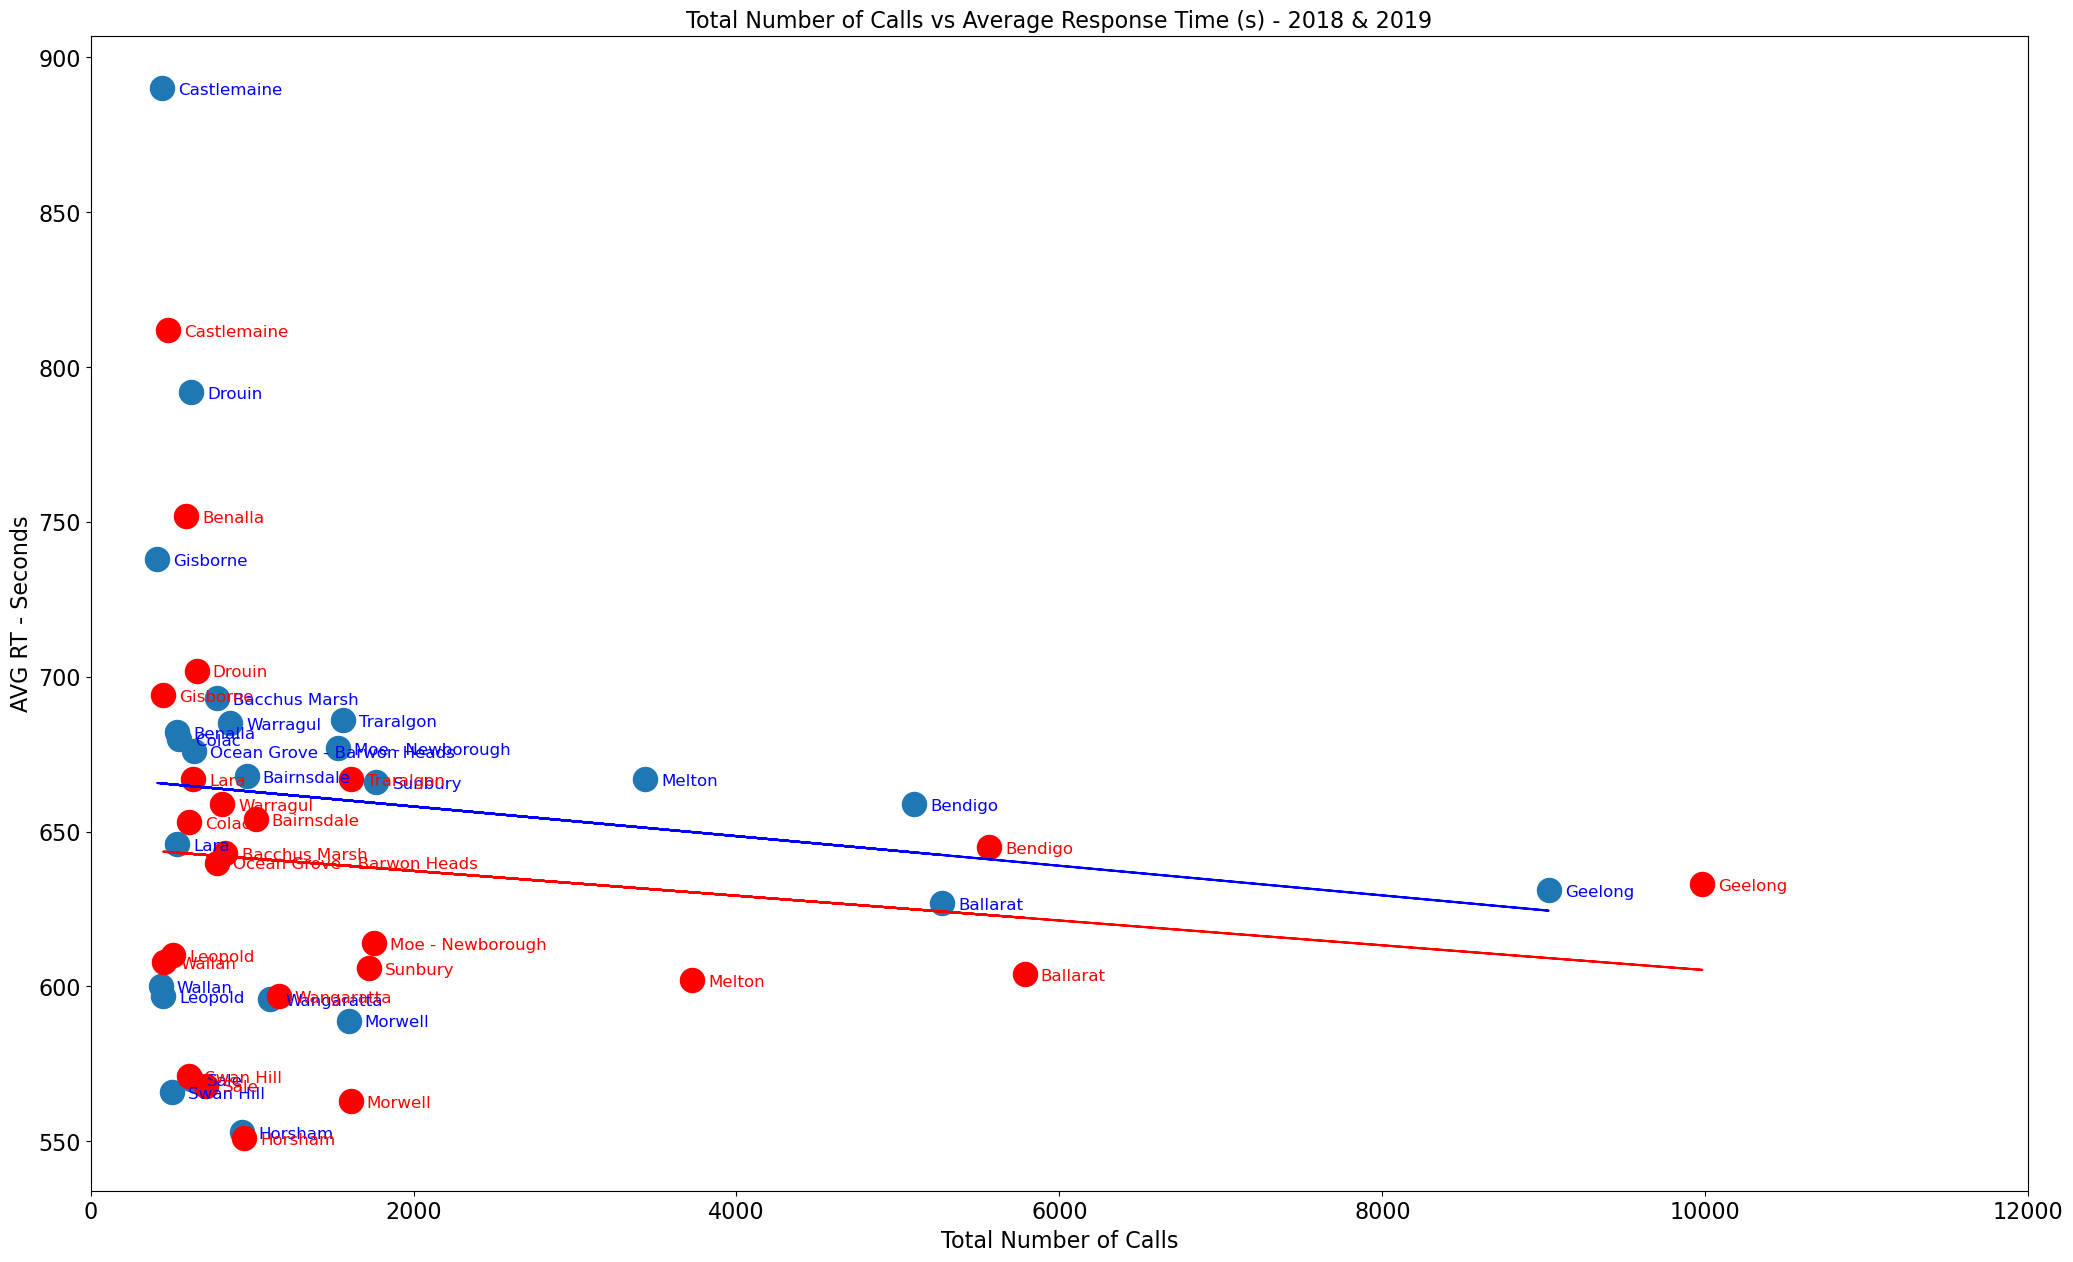

In [654]:
# Removing "Melbourne" outlier for regression analysis
outlier_2018 = merged_df_sorted_2018[merged_df_sorted_2018["UCL Name"] != "Melbourne"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(outlier_2018["Total Number"], outlier_2018["AVG RT - Seconds"])
regress_values = outlier_2018["Total Number"] * slope + intercept
plt.plot(outlier_2018["Total Number"],regress_values, color="b", clip_on=True)
plt.scatter(outlier_2018["Total Number"],outlier_2018["AVG RT - Seconds"], s=300)
for i, row in outlier_2018.iterrows():
    plt.text(row["Total Number"]+100, row["AVG RT - Seconds"]-3, row["UCL Name"], 
             fontsize=12, ha="left", verticalalignment="bottom", c="b")
(slope2, intercept2, rvalue2, pvalue2, stderr2) = st.linregress(merged_df_sorted_2019["Total Number"], merged_df_sorted_2019["AVG RT - Seconds"])
regress_values2 = merged_df_sorted_2019["Total Number"] * slope2 + intercept2
plt.plot(merged_df_sorted_2019["Total Number"],regress_values2, color="r", clip_on=True)
plt.scatter(merged_df_sorted_2019["Total Number"],merged_df_sorted_2019["AVG RT - Seconds"], s=300, c="r")
for i, row in merged_df_sorted_2019.iterrows():
    plt.text(row["Total Number"]+100, row["AVG RT - Seconds"]-3, row["UCL Name"], 
             fontsize=12, ha="left", verticalalignment="bottom", c="r")
plt.title("Total Number of Calls vs Average Response Time (s) - 2018 & 2019", fontsize = 16)
plt.xlabel("Total Number of Calls", fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylabel("AVG RT - Seconds", fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim([0, 12000])
plt.savefig("Data/TotalNumber.png")
plt.show()